In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "notebooks/output/benchmark/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(


In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   44.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:   58.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:   58.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  108.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  122.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  122.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  172.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  172.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  181.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  181.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  187.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  187.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  198.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 437|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 475|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 513|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 551|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 589|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 627|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 703|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 741|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 779|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 817|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 855|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 893|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 931|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 969|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 988|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:01||

Episode 1|Iteration 1045|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1083|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1121|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1159|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1197|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1235|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1273|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1311|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1349|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1387|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1425|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1463|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

Episode 1|Iteration 1500|reward:  198.0|last_reward_at:  183|Elapsed Time: 0:00:02||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/136 (0.01)
    explore-remote: 8/1119 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/234 (0.01)
  exploit deflected to exploration: 19
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:   42.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:   56.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:   56.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  106.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  106.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  112.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  112.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  112.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  112.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  123.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 130|reward:  123.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  123.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 198|reward:  137.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 2|Iteration 198|reward:  137.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 2|Iteration 202|reward:  187.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 2|Iteration 202|reward:  187.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:  187.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:  187.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 294|reward:  198.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 294|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 399|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 437|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 475|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 513|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 2|Iteration 551|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 589|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 627|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 665|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 722|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 760|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 874|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1064|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1102|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1178|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1216|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1235|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1292|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1330|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1349|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1368|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1387|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:02||

Episode 2|Iteration 1425|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:03||

Episode 2|Iteration 1463|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:03||

Episode 2|Iteration 1482|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:03||

Episode 2|Iteration 1500|reward:  198.0|last_reward_at:  294|Elapsed Time: 0:00:03||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/128 (0.01)
    explore-remote: 8/987 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/374 (0.01)
  exploit deflected to exploration: 4
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   47.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   47.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   97.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   97.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  103.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  103.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  114.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  114.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  123.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  123.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  123.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  123.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  123.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  123.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 253|reward:  137.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 253|reward:  137.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 3|Iteration 254|reward:  187.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 3|Iteration 254|reward:  187.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:  187.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 323|reward:  187.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 350|reward:  198.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 3|Iteration 350|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 3|Iteration 380|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 3|Iteration 418|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 3|Iteration 437|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 494|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 531|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 551|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 570|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 608|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 627|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 646|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 665|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 703|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 722|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 760|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 836|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:01||

Episode 3|Iteration 855|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 893|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 912|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 950|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 988|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1026|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1064|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1083|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1102|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1121|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1159|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1197|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1216|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1235|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:02||

Episode 3|Iteration 1254|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1292|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1311|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1349|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1368|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1405|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1425|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1444|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1482|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

Episode 3|Iteration 1500|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:03||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/108 (0.01)
    explore-remote: 8/880 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/501 (0.00)
  exploit deflected to exploration: 23
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:   58.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:   58.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:   67.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:   67.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  117.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  117.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  117.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  131.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  131.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  181.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  181.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  181.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 150|reward:  187.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 150|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 266|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 304|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 323|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 360|reward:  187.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 380|reward:  198.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 380|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 4|Iteration 418|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 494|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 513|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 532|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 551|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 589|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 627|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 646|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 683|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 703|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 722|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 741|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 760|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 779|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 4|Iteration 814|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 836|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 874|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 893|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 912|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 931|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 950|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 969|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 988|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1007|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1026|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1045|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1064|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1083|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1102|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1121|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:02||

Episode 4|Iteration 1159|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1178|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1212|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1235|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1268|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1292|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1311|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1349|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1368|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1405|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1444|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1463|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1482|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

Episode 4|Iteration 1500|reward:  198.0|last_reward_at:  380|Elapsed Time: 0:00:03||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/86 (0.01)
    explore-remote: 8/782 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/621 (0.00)
  exploit deflected to exploration: 15
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 88|reward:   53.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:   53.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 122|reward:   67.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 5|Iteration 122|reward:   67.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 5|Iteration 126|reward:  117.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 5|Iteration 126|reward:  117.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  117.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  117.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 5|Iteration 205|reward:  131.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 5|Iteration 205|reward:  131.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 5|Iteration 208|reward:  181.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 5|Iteration 208|reward:  181.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 5|Iteration 225|reward:  187.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 5|Iteration 225|reward:  187.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 5|Iteration 238|reward:  198.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 5|Iteration 238|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 323|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 361|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 380|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 434|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 475|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 511|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 532|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 551|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 570|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 589|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 608|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 646|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 684|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 722|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 5|Iteration 760|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 779|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 798|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 817|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 836|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 855|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 874|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 893|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 912|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 931|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 950|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 988|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 1007|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 1045|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 1064|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 1101|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 5|Iteration 1121|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1140|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1159|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1178|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1197|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1216|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1235|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1272|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1311|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1330|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1349|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1368|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1387|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1424|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1444|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:03||

Episode 5|Iteration 1482|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:04||

Episode 5|Iteration 1500|reward:  198.0|last_reward_at:  238|Elapsed Time: 0:00:04||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/89 (0.01)
    explore-remote: 8/675 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/725 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:   31.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward:   53.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward:   53.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:   67.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:   67.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 136|reward:  117.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 136|reward:  117.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  117.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:  117.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 208|reward:  117.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 244|reward:  117.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 250|reward:  131.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 250|reward:  131.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 6|Iteration 258|reward:  181.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 6|Iteration 258|reward:  181.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 6|Iteration 283|reward:  187.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 6|Iteration 283|reward:  187.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 6|Iteration 304|reward:  187.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 6|Iteration 337|reward:  187.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 6|Iteration 355|reward:  198.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 6|Iteration 355|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 399|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 437|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 456|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 475|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 513|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 532|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 551|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 570|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 589|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 608|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 646|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 681|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 6|Iteration 703|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 722|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 741|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 760|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 779|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 798|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 817|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 836|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 855|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 890|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 912|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 931|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 950|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 969|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 988|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:02||

Episode 6|Iteration 1007|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1026|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1045|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1064|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1083|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1102|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1121|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1140|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1159|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1196|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1216|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1235|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1254|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1273|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1292|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1311|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1330|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1349|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1368|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1387|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1406|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1425|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1444|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1463|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1482|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

Episode 6|Iteration 1500|reward:  198.0|last_reward_at:  355|Elapsed Time: 0:00:04||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/76 (0.01)
    explore-remote: 8/608 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/805 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   53.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:   53.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   53.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   67.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   67.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  117.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  117.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 98|reward:  128.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 98|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 132|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 266|reward:  128.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 277|reward:  142.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 277|reward:  142.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 7|Iteration 280|reward:  192.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 7|Iteration 280|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 7|Iteration 304|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 7|Iteration 323|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 7|Iteration 342|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 7|Iteration 361|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 380|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 399|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 418|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 437|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 456|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 475|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 494|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 513|reward:  192.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 528|reward:  198.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 528|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 551|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 570|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 589|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 608|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 627|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 646|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:01||

Episode 7|Iteration 678|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 703|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 722|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 756|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 779|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 798|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 817|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 836|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 855|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 874|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 893|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 912|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 931|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 950|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 7|Iteration 969|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 988|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1007|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1026|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1045|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1064|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1083|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1114|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1140|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1159|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1178|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1197|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1216|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1235|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1254|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:03||

Episode 7|Iteration 1273|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1292|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1311|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1330|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1349|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1368|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1387|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1406|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1425|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1444|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1463|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1482|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

Episode 7|Iteration 1500|reward:  198.0|last_reward_at:  528|Elapsed Time: 0:00:04||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/83 (0.01)
    explore-remote: 8/491 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/915 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:   47.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:   47.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:   97.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:   97.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:   97.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:   97.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:   97.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 154|reward:  106.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 154|reward:  106.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:  106.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 204|reward:  117.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 204|reward:  117.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 8|Iteration 206|reward:  131.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 8|Iteration 206|reward:  131.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 8|Iteration 208|reward:  181.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 8|Iteration 208|reward:  181.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:  181.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 232|reward:  192.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 8|Iteration 232|reward:  192.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 8|Iteration 262|reward:  192.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 8|Iteration 274|reward:  198.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 8|Iteration 274|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 8|Iteration 303|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 8|Iteration 342|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 361|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 380|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 418|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 437|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 456|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 475|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 494|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 513|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 532|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 551|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 570|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 589|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 608|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 627|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 8|Iteration 646|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 665|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 684|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 720|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 741|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 760|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 779|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 798|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 817|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 836|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 855|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 874|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 893|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 912|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 931|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 8|Iteration 950|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 969|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 988|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1007|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1039|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1064|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1083|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1102|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1121|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1140|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1159|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1178|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1197|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:03||

Episode 8|Iteration 1216|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1235|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1254|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1273|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1292|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1311|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1330|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1349|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1368|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1387|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1406|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1425|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1444|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1463|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1482|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:04||

Episode 8|Iteration 1500|reward:  198.0|last_reward_at:  274|Elapsed Time: 0:00:05||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/72 (0.01)
    explore-remote: 8/550 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/867 (0.00)
  exploit deflected to exploration: 88
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:   33.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:   47.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:   47.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:   97.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:   97.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  108.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  108.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 112|reward:  117.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 112|reward:  117.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  117.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:  117.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:  117.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:  117.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  128.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  128.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 209|reward:  128.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:  128.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 247|reward:  128.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 266|reward:  128.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 276|reward:  142.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 276|reward:  142.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 9|Iteration 281|reward:  192.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 9|Iteration 281|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 9|Iteration 304|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 9|Iteration 323|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 9|Iteration 380|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 9|Iteration 399|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  192.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  198.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 437|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 456|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 475|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 494|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 513|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 532|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 551|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 570|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 589|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 608|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 627|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 646|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 665|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 684|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 703|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 722|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 741|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 760|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 779|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 798|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 817|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 836|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 855|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 874|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:02||

Episode 9|Iteration 893|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 912|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 931|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 950|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 969|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 988|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1007|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1026|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1045|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1064|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1083|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1102|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1121|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1140|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:03||

Episode 9|Iteration 1159|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1178|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1197|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1216|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1235|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1254|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1273|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1292|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1311|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1330|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1349|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1368|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1387|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1406|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1425|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:04||

Episode 9|Iteration 1444|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:05||

Episode 9|Iteration 1463|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:05||

Episode 9|Iteration 1482|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:05||

Episode 9|Iteration 1500|reward:  198.0|last_reward_at:  418|Elapsed Time: 0:00:05||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/58 (0.02)
    explore-remote: 8/448 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/983 (0.00)
  exploit deflected to exploration: 66
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:   22.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:   47.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:   47.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   97.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   97.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:   97.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  108.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 84|reward:  117.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 84|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:  117.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 250|reward:  131.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 250|reward:  131.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 10|Iteration 251|reward:  181.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 10|Iteration 251|reward:  181.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 10|Iteration 279|reward:  192.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 10|Iteration 279|reward:  192.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 10|Iteration 304|reward:  192.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:  192.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 10|Iteration 328|reward:  198.0|last_reward_at:  279|Elapsed Time: 0:00:01||

Episode 10|Iteration 328|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 342|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 361|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 380|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 399|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 418|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 437|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 456|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 475|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 494|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 513|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 532|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 551|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 570|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 10|Iteration 589|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 608|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 627|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 646|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 665|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 684|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 703|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 722|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 741|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 760|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 779|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 798|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 817|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 836|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 855|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:02||

Episode 10|Iteration 874|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 893|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 912|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 931|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 950|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 969|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 988|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1007|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1026|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1045|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1064|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1083|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1102|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:03||

Episode 10|Iteration 1121|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1140|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1159|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1178|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1197|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1216|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1235|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1254|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1273|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1292|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1311|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1330|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1349|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1368|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:04||

Episode 10|Iteration 1386|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

Episode 10|Iteration 1406|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

Episode 10|Iteration 1425|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

Episode 10|Iteration 1442|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

Episode 10|Iteration 1463|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

Episode 10|Iteration 1482|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

Episode 10|Iteration 1500|reward:  198.0|last_reward_at:  328|Elapsed Time: 0:00:05||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/61 (0.02)
    explore-remote: 8/414 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/1014 (0.00)
  exploit deflected to exploration: 60
simulation ended


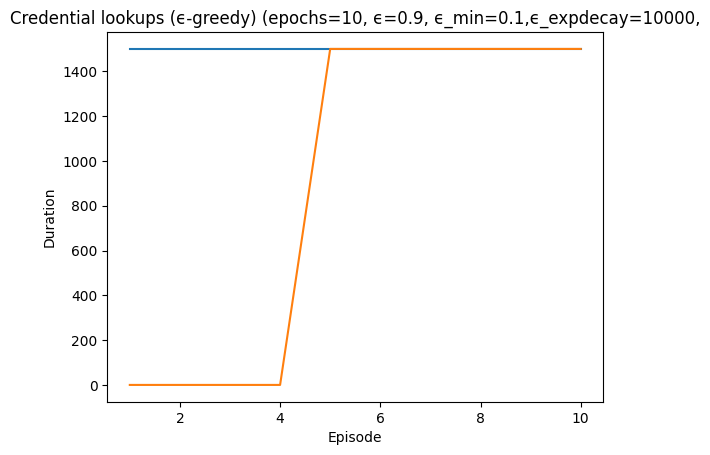

In [8]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [9]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:   31.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:   42.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:   42.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:   42.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:   42.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:   53.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:   53.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:   53.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 179|reward:  153.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 179|reward:  153.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 1|Iteration 192|reward:  167.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 1|Iteration 192|reward:  167.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 1|Iteration 208|reward:  181.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 1|Iteration 208|reward:  181.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 1|Iteration 216|reward:  231.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 1|Iteration 216|reward:  231.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  231.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  245.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  245.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 1|Iteration 268|reward:  295.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 1|Iteration 268|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 380|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 418|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:  295.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 1|Iteration 440|reward:  301.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 1|Iteration 440|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 475|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 494|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 589|reward:  301.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 592|reward:  312.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 1|Iteration 592|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 627|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 646|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 703|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 722|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:01||

Episode 1|Iteration 757|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 779|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 798|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 817|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 836|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 855|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 874|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 893|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 928|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 950|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 969|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 988|reward:  312.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 990|reward:  412.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 990|reward:  412.0|last_reward_at:  990|Elapsed Time: 0:00:02||

Episode 1|Iteration 1008|reward:  426.0|last_reward_at:  990|Elapsed Time: 0:00:02||

Episode 1|Iteration 1008|reward:  426.0|last_reward_at: 1008|Elapsed Time: 0:00:02||

Episode 1|Iteration 1012|reward:  476.0|last_reward_at: 1008|Elapsed Time: 0:00:02||

Episode 1|Iteration 1012|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 1|Iteration 1026|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 1|Iteration 1045|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 1|Iteration 1064|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1083|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1102|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1121|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1140|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1159|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1178|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1197|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1216|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1235|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1273|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:03||

Episode 1|Iteration 1292|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1309|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1330|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1349|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1368|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1387|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1406|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1425|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1444|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1463|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1482|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

Episode 1|Iteration 1500|reward:  476.0|last_reward_at: 1012|Elapsed Time: 0:00:04||

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/125 (0.02)
    explore-remote: 7/625 (0.01)
    explore-connect: 2/557 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 3/175 (0.02)
  exploit deflected to exploration: 156
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:   53.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  153.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  153.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  167.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  167.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  167.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  181.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  231.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  231.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  242.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 304|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 2|Iteration 380|reward:  242.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 2|Iteration 386|reward:  256.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 2|Iteration 386|reward:  256.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 389|reward:  306.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 2|Iteration 389|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 417|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 437|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 475|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 494|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 513|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 551|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:  306.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:  312.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 2|Iteration 589|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:01||

Episode 2|Iteration 608|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 627|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 646|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 665|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 684|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 703|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 722|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 741|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 760|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 779|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 798|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 817|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 836|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 855|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 874|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 893|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:02||

Episode 2|Iteration 912|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 931|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 950|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 969|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 988|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1007|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1026|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1045|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1064|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1083|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1102|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1121|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1140|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 2|Iteration 1159|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1178|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1197|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1216|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1235|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1254|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1273|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1292|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1311|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1330|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1349|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1368|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1387|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1406|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:04||

Episode 2|Iteration 1425|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:05||

Episode 2|Iteration 1444|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:05||

Episode 2|Iteration 1463|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:05||

Episode 2|Iteration 1482|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:05||

Episode 2|Iteration 1500|reward:  312.0|last_reward_at:  570|Elapsed Time: 0:00:05||

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/74 (0.01)
    explore-remote: 6/413 (0.01)
    explore-connect: 1/390 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 2/610 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   53.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   53.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  153.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  153.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  153.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  167.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  267.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  267.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 163|reward:  267.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  281.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 170|reward:  281.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 172|reward:  331.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 3|Iteration 172|reward:  331.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  331.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  331.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  331.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 233|reward:  345.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 233|reward:  345.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 3|Iteration 234|reward:  395.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 3|Iteration 234|reward:  395.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 3|Iteration 257|reward:  409.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 3|Iteration 257|reward:  409.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 3|Iteration 258|reward:  459.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 3|Iteration 258|reward:  459.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward:  470.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 297|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 322|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 361|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 437|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 475|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 494|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 513|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 532|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 551|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 570|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 588|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 608|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 627|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 646|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 649|reward:  476.0|last_reward_at:  274|Elapsed Time: 0:00:02||

Episode 3|Iteration 649|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:02||

Episode 3|Iteration 665|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:02||

Episode 3|Iteration 676|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:02||

Episode 3|Iteration 694|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 713|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 734|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 755|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 777|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 798|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 817|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 836|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 855|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 874|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 891|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 3|Iteration 911|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 931|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 950|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 969|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 988|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 1007|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 1026|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 1045|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 1064|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 1083|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 3|Iteration 1102|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1121|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1140|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1159|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1177|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1193|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1213|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1235|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1254|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1273|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1292|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:05||

Episode 3|Iteration 1311|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1330|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1348|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1366|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1386|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1406|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1425|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1443|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1463|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1481|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:06||

Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  649|Elapsed Time: 0:00:07||

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/100 (0.03)
    explore-remote: 5/562 (0.01)
    explore-connect: 2/530 (0.00)
    exploit-local: 0/15 (0.00)
    exploit-remote: 3/228 (0.01)
    exploit-connect: 3/49 (0.06)
  exploit deflected to exploration: 531
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:   47.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:   47.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:   97.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  106.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  106.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  106.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  106.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 266|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 285|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 304|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 323|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 361|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 380|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 399|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 418|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 437|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 456|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 475|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 494|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 513|reward:  112.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 521|reward:  123.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 4|Iteration 521|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:01||

Episode 4|Iteration 548|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 589|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 608|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 627|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 646|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 665|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 684|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 703|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 722|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 741|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 760|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 4|Iteration 779|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 798|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 817|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 836|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 855|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 874|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 893|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 912|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 931|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 950|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 969|reward:  123.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 987|reward:  137.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 987|reward:  137.0|last_reward_at:  987|Elapsed Time: 0:00:03||

Episode 4|Iteration 989|reward:  187.0|last_reward_at:  987|Elapsed Time: 0:00:03||

Episode 4|Iteration 989|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:03||

Episode 4|Iteration 1007|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:03||

Episode 4|Iteration 1026|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1045|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1064|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1083|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1102|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1121|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1140|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1159|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1178|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1197|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1216|reward:  187.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1217|reward:  198.0|last_reward_at:  989|Elapsed Time: 0:00:04||

Episode 4|Iteration 1217|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:04||

Episode 4|Iteration 1235|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:04||

Episode 4|Iteration 1254|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1273|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1292|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1311|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1330|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1349|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1368|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1387|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1406|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1425|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1444|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1463|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1482|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:05||

Episode 4|Iteration 1500|reward:  198.0|last_reward_at: 1217|Elapsed Time: 0:00:06||

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/30 (0.00)
    explore-remote: 8/221 (0.03)
    explore-connect: 0/223 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 0/18 (0.00)
    exploit-connect: 2/997 (0.00)
  exploit deflected to exploration: 17
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:   47.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:   97.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:   97.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  106.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  106.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  117.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 120|reward:  117.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  117.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  131.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  131.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  181.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 143|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 168|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 5|Iteration 247|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 266|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 285|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 303|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 316|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 342|reward:  181.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 360|reward:  187.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 5|Iteration 360|reward:  187.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 5|Iteration 380|reward:  187.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 5|Iteration 393|reward:  198.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 5|Iteration 393|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 5|Iteration 416|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 5|Iteration 437|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 5|Iteration 475|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 494|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 512|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 530|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 551|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 589|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 608|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 627|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 646|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 665|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:02||

Episode 5|Iteration 684|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 703|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 722|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 741|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 779|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 798|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 817|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 836|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 855|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 874|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 893|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:03||

Episode 5|Iteration 912|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 931|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 950|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 969|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 988|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1006|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1026|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1045|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1064|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1083|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1102|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:04||

Episode 5|Iteration 1121|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1140|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1159|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1178|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1197|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1216|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1235|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1251|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1270|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1289|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1311|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:05||

Episode 5|Iteration 1330|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:06||

Episode 5|Iteration 1349|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:06||

Episode 5|Iteration 1367|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:06||

Episode 5|Iteration 1384|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:06||

Episode 5|Iteration 1403|reward:  198.0|last_reward_at:  393|Elapsed Time: 0:00:06||

Episode 5|Iteration 1418|reward:  298.0|last_reward_at:  393|Elapsed Time: 0:00:06||

Episode 5|Iteration 1418|reward:  298.0|last_reward_at: 1418|Elapsed Time: 0:00:06||

Episode 5|Iteration 1421|reward:  312.0|last_reward_at: 1418|Elapsed Time: 0:00:06||

Episode 5|Iteration 1421|reward:  312.0|last_reward_at: 1421|Elapsed Time: 0:00:06||

Episode 5|Iteration 1441|reward:  312.0|last_reward_at: 1421|Elapsed Time: 0:00:06||

Episode 5|Iteration 1462|reward:  312.0|last_reward_at: 1421|Elapsed Time: 0:00:06||

Episode 5|Iteration 1482|reward:  312.0|last_reward_at: 1421|Elapsed Time: 0:00:06||

Episode 5|Iteration 1500|reward:  312.0|last_reward_at: 1421|Elapsed Time: 0:00:06||

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/35 (0.03)
    explore-remote: 6/170 (0.03)
    explore-connect: 1/154 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/57 (0.03)
    exploit-connect: 2/1071 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 203|reward:  131.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 203|reward:  131.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  145.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  145.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  145.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 247|reward:  145.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 266|reward:  145.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 285|reward:  145.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 304|reward:  145.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 314|reward:  245.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 314|reward:  245.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 6|Iteration 315|reward:  259.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 6|Iteration 315|reward:  259.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 316|reward:  309.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 316|reward:  309.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 6|Iteration 337|reward:  309.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 6|Iteration 359|reward:  309.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 6|Iteration 365|reward:  320.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 6|Iteration 365|reward:  320.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:  320.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 6|Iteration 398|reward:  320.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 6|Iteration 418|reward:  320.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 6|Iteration 437|reward:  320.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 6|Iteration 441|reward:  334.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 6|Iteration 441|reward:  334.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 6|Iteration 442|reward:  384.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 6|Iteration 442|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 6|Iteration 456|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 475|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 513|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 532|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 551|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 589|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 608|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 627|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 646|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 6|Iteration 665|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 684|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 703|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 722|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 741|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 760|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 779|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 798|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 817|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 836|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 855|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:03||

Episode 6|Iteration 874|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 893|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 912|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 931|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 949|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 969|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 988|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 1007|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 1025|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 1045|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 1063|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:04||

Episode 6|Iteration 1083|reward:  384.0|last_reward_at:  442|Elapsed Time: 0:00:05||

Episode 6|Iteration 1088|reward:  395.0|last_reward_at:  442|Elapsed Time: 0:00:05||

Episode 6|Iteration 1088|reward:  395.0|last_reward_at: 1088|Elapsed Time: 0:00:05||

Episode 6|Iteration 1093|reward:  406.0|last_reward_at: 1088|Elapsed Time: 0:00:05||

Episode 6|Iteration 1093|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1112|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1121|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1136|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1156|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1174|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1190|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1207|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1216|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1233|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:05||

Episode 6|Iteration 1252|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:06||

Episode 6|Iteration 1270|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:06||

Episode 6|Iteration 1286|reward:  406.0|last_reward_at: 1093|Elapsed Time: 0:00:06||

Episode 6|Iteration 1291|reward:  420.0|last_reward_at: 1093|Elapsed Time: 0:00:06||

Episode 6|Iteration 1291|reward:  420.0|last_reward_at: 1291|Elapsed Time: 0:00:06||

Episode 6|Iteration 1292|reward:  470.0|last_reward_at: 1291|Elapsed Time: 0:00:06||

Episode 6|Iteration 1292|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1310|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1330|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1349|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1367|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1387|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1405|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:06||

Episode 6|Iteration 1423|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:07||

Episode 6|Iteration 1443|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:07||

Episode 6|Iteration 1462|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:07||

Episode 6|Iteration 1482|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:07||

Episode 6|Iteration 1500|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:07||

Episode 6|Iteration 1500|reward:  470.0|last_reward_at: 1292|Elapsed Time: 0:00:07||

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/57 (0.02)
    explore-remote: 5/230 (0.02)
    explore-connect: 2/264 (0.01)
    exploit-local: 2/0 (1.00)
    exploit-remote: 2/705 (0.00)
    exploit-connect: 3/229 (0.01)
  exploit deflected to exploration: 293
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:   47.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:   47.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:   97.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:   97.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:   97.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  106.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  106.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  106.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  112.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 247|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 266|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 304|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 361|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 380|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 399|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 418|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 437|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 456|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 7|Iteration 475|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 494|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 513|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 532|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 551|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 570|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 571|reward:  123.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 571|reward:  123.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 589|reward:  123.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 608|reward:  123.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 627|reward:  123.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 645|reward:  137.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 7|Iteration 645|reward:  137.0|last_reward_at:  645|Elapsed Time: 0:00:02||

Episode 7|Iteration 650|reward:  187.0|last_reward_at:  645|Elapsed Time: 0:00:02||

Episode 7|Iteration 650|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:02||

Episode 7|Iteration 665|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:02||

Episode 7|Iteration 684|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:02||

Episode 7|Iteration 703|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 722|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 741|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 760|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 779|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 798|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 817|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 836|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 855|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 874|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 893|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 912|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 7|Iteration 931|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 950|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 969|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 988|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1007|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1026|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1045|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1064|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1083|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1102|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1121|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 7|Iteration 1140|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1159|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1178|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1197|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1216|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1235|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1254|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1273|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1292|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1311|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1330|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:05||

Episode 7|Iteration 1349|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1368|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1387|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1406|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1425|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1444|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1463|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1482|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

Episode 7|Iteration 1500|reward:  187.0|last_reward_at:  650|Elapsed Time: 0:00:06||

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/16 (0.00)
    explore-remote: 4/132 (0.03)
    explore-connect: 0/96 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/23 (0.12)
    exploit-connect: 2/1223 (0.00)
  exploit deflected to exploration: 24
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:   44.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:   53.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 247|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 285|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 304|reward:   53.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 317|reward:   67.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 317|reward:   67.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 8|Iteration 318|reward:  117.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 8|Iteration 318|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 341|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 361|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 380|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 418|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 437|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 456|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 8|Iteration 475|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 494|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 513|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 532|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 550|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 570|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 589|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 608|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 627|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 646|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 665|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 8|Iteration 684|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 703|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 722|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 741|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 760|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 779|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 798|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 817|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 836|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 855|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 874|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 893|reward:  117.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 8|Iteration 910|reward:  217.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 8|Iteration 910|reward:  217.0|last_reward_at:  910|Elapsed Time: 0:00:04||

Episode 8|Iteration 928|reward:  217.0|last_reward_at:  910|Elapsed Time: 0:00:04||

Episode 8|Iteration 930|reward:  231.0|last_reward_at:  910|Elapsed Time: 0:00:04||

Episode 8|Iteration 930|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 950|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 969|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 987|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1007|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1026|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1045|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1064|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1083|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1102|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:04||

Episode 8|Iteration 1121|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1140|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1159|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1178|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1197|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1216|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1235|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1254|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1273|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1292|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1311|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:05||

Episode 8|Iteration 1330|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1349|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1368|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1387|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1406|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1425|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1444|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1463|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1482|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

Episode 8|Iteration 1500|reward:  231.0|last_reward_at:  930|Elapsed Time: 0:00:06||

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 4/96 (0.04)
    explore-connect: 1/73 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/32 (0.03)
    exploit-connect: 1/1270 (0.00)
  exploit deflected to exploration: 39
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:   44.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 68|reward:   58.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 68|reward:   58.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:  108.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 81|reward:  117.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 81|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 209|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 9|Iteration 247|reward:  117.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 9|Iteration 251|reward:  131.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 9|Iteration 251|reward:  131.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 9|Iteration 253|reward:  181.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 9|Iteration 253|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 266|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 285|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 304|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 323|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 342|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 380|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 399|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 437|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 475|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 494|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 513|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 532|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 551|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 570|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 589|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 608|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 627|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 9|Iteration 646|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 9|Iteration 665|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 9|Iteration 684|reward:  181.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 9|Iteration 688|reward:  187.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 9|Iteration 688|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 703|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 722|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 741|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 760|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 779|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 798|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 817|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 836|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 855|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 9|Iteration 874|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 893|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 912|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 931|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 950|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 969|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 988|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 1007|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 1026|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 1045|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 1064|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 9|Iteration 1083|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:05||

Episode 9|Iteration 1102|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:05||

Episode 9|Iteration 1121|reward:  187.0|last_reward_at:  688|Elapsed Time: 0:00:05||

Episode 9|Iteration 1122|reward:  198.0|last_reward_at:  688|Elapsed Time: 0:00:05||

Episode 9|Iteration 1122|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1140|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1159|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1178|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1197|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1216|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1235|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1254|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1273|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:05||

Episode 9|Iteration 1292|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1311|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1330|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1349|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1368|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1387|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1406|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1425|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1444|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1463|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1482|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:06||

Episode 9|Iteration 1500|reward:  198.0|last_reward_at: 1122|Elapsed Time: 0:00:07||

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/12 (0.00)
    explore-remote: 6/92 (0.06)
    explore-connect: 0/50 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/25 (0.07)
    exploit-connect: 2/1310 (0.00)
  exploit deflected to exploration: 43
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:   58.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:   58.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  108.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  108.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 111|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 149|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 10|Iteration 247|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 10|Iteration 266|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 10|Iteration 285|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 10|Iteration 302|reward:  217.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 10|Iteration 302|reward:  217.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 10|Iteration 319|reward:  217.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 10|Iteration 325|reward:  228.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 10|Iteration 325|reward:  228.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 10|Iteration 339|reward:  242.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 10|Iteration 339|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 361|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 380|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 399|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 418|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 10|Iteration 437|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 456|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 475|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 513|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 551|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 570|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 589|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 608|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 627|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:02||

Episode 10|Iteration 646|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 665|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 684|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 703|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 722|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 741|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 760|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 779|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 798|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 817|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 836|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:03||

Episode 10|Iteration 855|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 874|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 893|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 912|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 931|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 950|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 969|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 988|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 1007|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 1026|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 1045|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:04||

Episode 10|Iteration 1064|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1083|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1102|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1121|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1140|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1159|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1178|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1197|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1216|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1235|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1254|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1273|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:05||

Episode 10|Iteration 1292|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1311|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1330|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1349|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1368|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1387|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1406|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1425|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1444|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1463|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1482|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 10|Iteration 1500|reward:  242.0|last_reward_at:  339|Elapsed Time: 0:00:07||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 4/94 (0.04)
    explore-connect: 1/66 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 1/1302 (0.00)
  exploit deflected to exploration: 90
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:   58.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:   58.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 63|reward:  122.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 11|Iteration 63|reward:  122.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 11|Iteration 64|reward:  172.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 11|Iteration 64|reward:  172.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 11|Iteration 76|reward:  172.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  183.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 95|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 114|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 133|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 152|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 171|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 190|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 209|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 228|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 247|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 266|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 285|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 304|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 323|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 342|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 361|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 380|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 11|Iteration 399|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 418|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 437|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 456|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 475|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 494|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 513|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 532|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 550|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 569|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 11|Iteration 587|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 605|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 623|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 642|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 659|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 677|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 694|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 712|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 722|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 739|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 11|Iteration 755|reward:  192.0|last_reward_at:   84|Elapsed Time: 0:00:04||

Episode 11|Iteration 755|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 778|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 798|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 817|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 836|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 855|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 874|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 893|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 912|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 931|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 950|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:04||

Episode 11|Iteration 969|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 988|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1007|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1026|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1045|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1064|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1083|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1102|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1121|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1140|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1159|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:05||

Episode 11|Iteration 1178|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1197|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1216|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1235|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1254|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1273|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1292|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1311|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1330|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1349|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1368|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:06||

Episode 11|Iteration 1387|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

Episode 11|Iteration 1406|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

Episode 11|Iteration 1425|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

Episode 11|Iteration 1444|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

Episode 11|Iteration 1463|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

Episode 11|Iteration 1482|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

Episode 11|Iteration 1500|reward:  192.0|last_reward_at:  755|Elapsed Time: 0:00:07||

  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 4/127 (0.03)
    explore-connect: 0/126 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/503 (0.01)
    exploit-connect: 2/719 (0.00)
  exploit deflected to exploration: 210
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:   58.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:   58.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:  108.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:  108.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  122.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  122.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  172.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  172.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  181.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 57|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 76|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 95|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 114|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 133|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 152|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 171|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 190|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 209|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 12|Iteration 228|reward:  181.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 12|Iteration 230|reward:  281.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 12|Iteration 230|reward:  281.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 12|Iteration 246|reward:  295.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 12|Iteration 246|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 266|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 285|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 304|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 323|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 342|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 361|reward:  295.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 371|reward:  306.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 12|Iteration 371|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 12|Iteration 392|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 12|Iteration 413|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 434|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 455|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 475|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 494|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 513|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 532|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 551|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 570|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 589|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 608|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:02||

Episode 12|Iteration 627|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 638|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 659|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 680|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 702|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 722|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 741|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 760|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 779|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 798|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:03||

Episode 12|Iteration 817|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 835|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 855|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 874|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 893|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 912|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 931|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 950|reward:  306.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 966|reward:  312.0|last_reward_at:  371|Elapsed Time: 0:00:04||

Episode 12|Iteration 966|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:04||

Episode 12|Iteration 987|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:04||

Episode 12|Iteration 1007|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:04||

Episode 12|Iteration 1026|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1045|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1064|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1083|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1102|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1121|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1140|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1159|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1178|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1197|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1216|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:05||

Episode 12|Iteration 1235|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1254|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1273|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1292|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1311|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1330|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1349|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1368|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1387|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1406|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:06||

Episode 12|Iteration 1425|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:07||

Episode 12|Iteration 1444|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:07||

Episode 12|Iteration 1463|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:07||

Episode 12|Iteration 1482|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:07||

Episode 12|Iteration 1500|reward:  312.0|last_reward_at:  966|Elapsed Time: 0:00:07||

  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 5/44 (0.10)
    explore-connect: 1/48 (0.02)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 2/1382 (0.00)
  exploit deflected to exploration: 45
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:   44.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 62|reward:   53.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 62|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 76|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 95|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 114|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 133|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 152|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 171|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 190|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 209|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 13|Iteration 228|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 247|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 266|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 285|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 304|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 323|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 342|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 361|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 380|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 399|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 418|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 437|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 456|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 475|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 494|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 513|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 532|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 551|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 570|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 589|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 608|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 627|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 646|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 13|Iteration 665|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 684|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 703|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 722|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 741|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 760|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 779|reward:   53.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 792|reward:   67.0|last_reward_at:   62|Elapsed Time: 0:00:03||

Episode 13|Iteration 792|reward:   67.0|last_reward_at:  792|Elapsed Time: 0:00:03||

Episode 13|Iteration 793|reward:  117.0|last_reward_at:  792|Elapsed Time: 0:00:03||

Episode 13|Iteration 793|reward:  117.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 13|Iteration 815|reward:  117.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 13|Iteration 836|reward:  117.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 13|Iteration 855|reward:  117.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 13|Iteration 874|reward:  117.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 13|Iteration 878|reward:  123.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 13|Iteration 878|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:03||

Episode 13|Iteration 893|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 912|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 931|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 950|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 969|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 988|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 1007|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 1026|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 1045|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 1064|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 1083|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:04||

Episode 13|Iteration 1102|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1121|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1140|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1159|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1178|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1197|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1216|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1235|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1254|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1273|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1292|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:05||

Episode 13|Iteration 1311|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 13|Iteration 1330|reward:  123.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 13|Iteration 1334|reward:  137.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 13|Iteration 1334|reward:  137.0|last_reward_at: 1334|Elapsed Time: 0:00:06||

Episode 13|Iteration 1337|reward:  187.0|last_reward_at: 1334|Elapsed Time: 0:00:06||

Episode 13|Iteration 1337|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1349|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1368|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1387|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1406|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1425|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1444|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1463|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1482|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

Episode 13|Iteration 1500|reward:  187.0|last_reward_at: 1337|Elapsed Time: 0:00:06||

  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/19 (0.00)
    explore-remote: 4/59 (0.06)
    explore-connect: 0/24 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 2/1388 (0.00)
  exploit deflected to exploration: 55
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:   53.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 57|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 76|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 95|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 114|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 133|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 152|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 171|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 190|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 190|reward:   67.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 190|reward:   67.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 14|Iteration 192|reward:  117.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 14|Iteration 192|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 14|Iteration 209|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 14|Iteration 228|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 247|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 266|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 285|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 304|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 323|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 342|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 361|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 380|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 399|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 418|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:01||

Episode 14|Iteration 437|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 456|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 475|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 494|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 513|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 532|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 551|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 570|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 589|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 608|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 627|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:02||

Episode 14|Iteration 646|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 665|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 684|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 703|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 722|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 741|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 760|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 779|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 798|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 817|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 836|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 855|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 14|Iteration 874|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 893|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 912|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 931|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 950|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 969|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 988|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 1007|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 1026|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 1045|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 1064|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:04||

Episode 14|Iteration 1083|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1102|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1121|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1140|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1159|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1178|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1197|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1216|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1235|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1254|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1273|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 14|Iteration 1292|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1311|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1330|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1349|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1368|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1387|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1406|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1425|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1444|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1463|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1482|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 14|Iteration 1500|reward:  117.0|last_reward_at:  192|Elapsed Time: 0:00:07||

  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 2/42 (0.05)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 1/1425 (0.00)
  exploit deflected to exploration: 30
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 36|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 36|reward:   58.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  108.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 53|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 70|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 87|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 104|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 114|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 126|reward:  122.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 126|reward:  122.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 15|Iteration 127|reward:  172.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 15|Iteration 127|reward:  172.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 15|Iteration 132|reward:  181.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 15|Iteration 132|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 15|Iteration 171|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 15|Iteration 180|reward:  187.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 15|Iteration 180|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 15|Iteration 201|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 222|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 243|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 265|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 285|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 304|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 323|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 342|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 361|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 380|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 15|Iteration 399|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 418|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 437|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 456|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 475|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 494|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 513|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 532|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 551|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 570|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 589|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 15|Iteration 608|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 627|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 646|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 665|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 684|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 703|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 722|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 741|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 760|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 779|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 798|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:03||

Episode 15|Iteration 817|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 836|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 855|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 874|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 893|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 912|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 931|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 950|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 969|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 988|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 1007|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 15|Iteration 1026|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1045|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1064|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1083|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1102|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1121|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1140|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1159|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1178|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1197|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1216|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 15|Iteration 1235|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1254|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1273|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1292|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1311|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1330|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1349|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1368|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1387|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1406|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1419|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:06||

Episode 15|Iteration 1441|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 15|Iteration 1462|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 15|Iteration 1482|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:07||

Episode 15|Iteration 1500|reward:  187.0|last_reward_at:  180|Elapsed Time: 0:00:07||

  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 3/75 (0.04)
    explore-connect: 0/59 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/4 (0.50)
    exploit-connect: 2/1339 (0.00)
  exploit deflected to exploration: 119
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   44.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:   58.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:   58.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  108.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  108.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 24|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 24|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 57|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 76|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 95|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 133|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 152|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 171|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 190|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 209|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 228|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 247|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 266|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 285|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 304|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 323|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 342|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 361|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 380|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 399|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 418|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 16|Iteration 437|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 456|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 475|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 494|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 513|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 532|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 551|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 570|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 589|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 608|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 627|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 16|Iteration 646|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 665|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 684|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 703|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 722|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 741|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 760|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 779|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 798|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 817|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 836|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 16|Iteration 855|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 874|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 893|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 912|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 931|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 950|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 969|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 988|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 1007|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 1026|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 1045|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 1064|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:04||

Episode 16|Iteration 1083|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1102|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1121|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1140|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1159|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1178|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1197|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1216|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1235|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1254|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1273|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:05||

Episode 16|Iteration 1292|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1311|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1330|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1349|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1368|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1387|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1406|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1425|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1444|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1463|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1482|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:06||

Episode 16|Iteration 1500|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:07||

  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/16 (0.20)
    exploit-connect: 1/1449 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:   58.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:   58.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 56|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 76|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 95|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 133|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 152|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 171|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 190|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 209|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 228|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 247|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 266|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 285|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 304|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 323|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 342|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 361|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 380|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 399|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 418|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 17|Iteration 437|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 456|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 475|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 494|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 513|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 532|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 551|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 570|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 589|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 608|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 627|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 17|Iteration 646|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 665|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 684|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 703|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 722|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 741|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 760|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 779|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 798|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 817|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 836|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 17|Iteration 855|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 874|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 893|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 912|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 931|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 950|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 969|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 988|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 1007|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 1026|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 1045|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 17|Iteration 1064|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1083|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1102|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1121|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1140|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1159|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1178|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1197|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1216|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1235|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1254|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 17|Iteration 1273|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1292|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1311|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1330|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1349|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1368|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1387|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1406|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1425|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1441|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1463|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 17|Iteration 1482|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 17|Iteration 1500|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:07||

  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/5 (0.50)
    exploit-connect: 1/1466 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   58.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  117.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 54|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 76|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 95|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 114|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 129|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 147|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 169|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 190|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 209|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 228|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 247|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 266|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 285|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 304|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 323|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 342|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 361|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 380|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 399|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 18|Iteration 418|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 437|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 456|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 475|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 494|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 513|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 532|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 551|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 570|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 589|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 608|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 18|Iteration 627|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 646|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 665|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 684|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 703|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 722|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 741|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 760|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 779|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 798|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 817|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 836|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:03||

Episode 18|Iteration 855|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 874|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 893|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 912|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 931|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 950|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 969|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 988|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 1007|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 1026|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 1045|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:04||

Episode 18|Iteration 1050|reward:  123.0|last_reward_at:   10|Elapsed Time: 0:00:05||

Episode 18|Iteration 1050|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1064|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1083|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1102|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1121|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1140|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1159|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1178|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1197|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1216|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1235|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1254|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:05||

Episode 18|Iteration 1273|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1292|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1311|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1330|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1349|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1368|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1387|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1406|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1425|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1444|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1463|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:06||

Episode 18|Iteration 1482|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:07||

Episode 18|Iteration 1500|reward:  123.0|last_reward_at: 1050|Elapsed Time: 0:00:07||

  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/5 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/3 (0.62)
    exploit-connect: 1/1472 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:   58.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:   58.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 19|reward:  108.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  117.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 57|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 76|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 95|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 114|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 133|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 152|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 171|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 190|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 209|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 228|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 247|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 266|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 285|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 304|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 323|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 342|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 361|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 380|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 399|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 418|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 19|Iteration 437|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 456|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 475|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 494|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 513|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 532|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 551|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 570|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 589|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 608|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 627|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 19|Iteration 646|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 665|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 680|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 701|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 722|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 741|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 760|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 779|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 798|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 817|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 836|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 19|Iteration 855|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 874|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 893|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 912|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 931|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 950|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 969|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 988|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 1007|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 1026|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 1045|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 19|Iteration 1064|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1083|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1102|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1121|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1140|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1159|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1178|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1197|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1216|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1235|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1254|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 19|Iteration 1273|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1292|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1311|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1330|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1349|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1368|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1387|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1406|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1425|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1444|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1463|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 19|Iteration 1482|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:07||

Episode 19|Iteration 1500|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:07||

  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/14 (0.00)
    explore-connect: 0/9 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/16 (0.24)
    exploit-connect: 1/1452 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:   44.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:   58.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:   58.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  117.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 57|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 76|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 95|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 114|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 133|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 152|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 171|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 190|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 209|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 228|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 247|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 266|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 285|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 304|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 323|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 342|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 361|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 380|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 399|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 418|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 20|Iteration 437|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 456|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 475|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 494|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 513|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 532|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 551|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 570|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 589|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 608|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 627|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:02||

Episode 20|Iteration 646|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 665|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 684|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 703|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 722|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 741|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 760|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 779|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 798|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 817|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 836|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:03||

Episode 20|Iteration 855|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 874|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 893|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 912|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 931|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 950|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 969|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 988|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 1007|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 1026|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 1045|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:04||

Episode 20|Iteration 1064|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1083|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1102|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1121|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1140|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1159|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1178|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1197|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1216|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1235|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1254|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:05||

Episode 20|Iteration 1273|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1292|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1311|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1330|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1349|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1368|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1387|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1406|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1425|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1444|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1463|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:06||

Episode 20|Iteration 1482|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:07||

Episode 20|Iteration 1500|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:07||

  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/10 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/15 (0.25)
    exploit-connect: 1/1459 (0.00)
  exploit deflected to exploration: 0
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:   36.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:   86.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:   86.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:   86.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:   86.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:   86.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:   86.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 176|reward:   92.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 176|reward:   92.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  103.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  103.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  112.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 206|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 228|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 247|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 266|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 285|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 304|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 323|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 361|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 380|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 399|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 437|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 456|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 475|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 494|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 513|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 551|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 589|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 608|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:02||

Episode 1|Iteration 627|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 646|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 665|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 684|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 703|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 722|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 741|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 760|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 779|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 798|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 817|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 1|Iteration 836|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 855|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 874|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 893|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 912|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 931|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 950|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 969|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 988|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 1007|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 1026|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 1|Iteration 1045|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1064|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1083|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1102|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1121|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1140|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1159|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1178|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1197|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1216|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1235|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 1|Iteration 1254|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1273|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1292|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1311|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1330|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1349|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1368|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1387|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1406|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1425|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1444|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1463|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 1|Iteration 1482|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 1|Iteration 1500|reward:  112.0|last_reward_at:  185|Elapsed Time: 0:00:07||

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 4/54 (0.07)
    explore-connect: 0/20 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/93 (0.01)
    exploit-connect: 1/1315 (0.00)
  exploit deflected to exploration: 90
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   44.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:   58.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:   58.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  108.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  108.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  117.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 171|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 209|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 228|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 247|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 266|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 285|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 304|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 323|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 361|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 380|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 399|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 2|Iteration 418|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 437|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 475|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 494|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 513|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 532|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 551|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 589|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 608|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 2|Iteration 627|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 646|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 665|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 684|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 703|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 722|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 741|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 760|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 779|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 798|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 817|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 2|Iteration 836|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 855|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 874|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 893|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 912|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 931|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 950|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 969|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 988|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 1007|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 1026|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 2|Iteration 1045|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1064|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1083|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1102|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1121|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1140|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1159|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1178|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1197|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1216|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1235|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 2|Iteration 1254|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1273|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1292|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1311|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1330|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1349|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1368|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1387|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1406|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1425|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1444|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 2|Iteration 1463|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:07||

Episode 2|Iteration 1482|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:07||

Episode 2|Iteration 1500|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:07||

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/12 (0.25)
    exploit-connect: 1/1474 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   58.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   58.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  108.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  108.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  108.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  119.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 110|reward:  119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 127|reward:  119.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  133.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 139|reward:  133.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  183.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  183.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 141|reward:  189.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 141|reward:  189.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  198.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 3|Iteration 166|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 3|Iteration 187|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 208|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 247|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 266|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 285|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 323|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 361|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 380|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 3|Iteration 399|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 418|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 437|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 456|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 475|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 494|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 513|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 532|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 551|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 570|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 589|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 3|Iteration 608|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 627|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 646|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 665|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 684|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 703|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 722|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 741|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 760|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 779|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 3|Iteration 798|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 817|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 836|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 855|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 874|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 893|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 912|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 931|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 950|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 969|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 988|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 3|Iteration 1007|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1026|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1045|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1064|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1083|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1102|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1121|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1140|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1159|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1178|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1197|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:05||

Episode 3|Iteration 1216|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1235|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1254|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1273|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1292|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1311|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1330|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1349|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1368|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1387|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1406|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:06||

Episode 3|Iteration 1425|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:07||

Episode 3|Iteration 1444|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:07||

Episode 3|Iteration 1463|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:07||

Episode 3|Iteration 1482|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:07||

Episode 3|Iteration 1500|reward:  198.0|last_reward_at:  145|Elapsed Time: 0:00:07||

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 5/28 (0.15)
    explore-connect: 0/36 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/62 (0.05)
    exploit-connect: 2/1355 (0.00)
  exploit deflected to exploration: 78
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   58.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  108.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  108.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  122.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  122.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  172.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  172.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  183.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  183.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  192.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 190|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 228|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 247|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 266|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 285|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 304|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 323|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 361|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 380|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 399|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 418|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 437|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 456|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 475|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 494|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 513|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 532|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 551|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 589|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 608|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 4|Iteration 627|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 646|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 665|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 684|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 703|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 722|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 741|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 760|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 779|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 798|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 4|Iteration 817|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 836|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 855|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 874|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 893|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 912|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 931|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 950|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 969|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 988|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 1007|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:04||

Episode 4|Iteration 1026|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1045|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1064|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1083|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1102|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1121|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1140|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1159|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1178|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1197|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1216|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:05||

Episode 4|Iteration 1235|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1254|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1273|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1292|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1311|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1330|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1349|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1368|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1387|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1406|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1425|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:06||

Episode 4|Iteration 1444|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:07||

Episode 4|Iteration 1463|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:07||

Episode 4|Iteration 1482|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:07||

Episode 4|Iteration 1500|reward:  192.0|last_reward_at:   26|Elapsed Time: 0:00:07||

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 3/9 (0.25)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 2/1474 (0.00)
  exploit deflected to exploration: 12
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:   58.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:   58.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  117.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 171|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 228|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 247|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 266|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 285|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 304|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 323|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 342|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 361|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 380|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 399|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 418|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 437|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 456|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 475|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 494|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 513|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 532|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 551|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 589|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 608|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:02||

Episode 5|Iteration 627|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 646|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 665|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 684|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 703|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 722|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 741|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 779|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 798|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 817|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 836|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:03||

Episode 5|Iteration 855|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 874|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 893|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 912|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 931|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 950|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 969|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 988|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 1007|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 1026|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 1045|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:04||

Episode 5|Iteration 1064|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1083|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1102|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1121|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1140|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1159|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1178|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1197|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1216|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1235|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1254|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:05||

Episode 5|Iteration 1273|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1292|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1311|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1330|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1349|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1368|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1387|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1406|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1425|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1444|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1463|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:06||

Episode 5|Iteration 1482|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:07||

Episode 5|Iteration 1500|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:00:07||

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/23 (0.18)
    exploit-connect: 1/1455 (0.00)
  exploit deflected to exploration: 15
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   44.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:   58.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:   58.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  108.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  117.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 49|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 228|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 247|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 266|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 285|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 304|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 323|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 361|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 380|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 399|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 415|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 437|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 456|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 475|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 494|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 513|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 532|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 551|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 589|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 608|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 6|Iteration 627|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 646|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 665|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 684|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 703|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 722|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 741|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 760|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 779|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 798|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 817|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:03||

Episode 6|Iteration 836|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 855|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 874|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 893|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 912|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 931|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 950|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 969|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 988|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 1007|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 1026|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:04||

Episode 6|Iteration 1045|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1064|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1083|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1102|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1121|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1140|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1159|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1178|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1197|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1216|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1235|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:05||

Episode 6|Iteration 1253|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1273|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1292|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1311|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1330|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1349|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1368|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1387|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1406|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1425|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1444|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:06||

Episode 6|Iteration 1463|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:07||

Episode 6|Iteration 1482|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:07||

Episode 6|Iteration 1500|reward:  117.0|last_reward_at:   28|Elapsed Time: 0:00:07||

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/7 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/14 (0.26)
    exploit-connect: 1/1472 (0.00)
  exploit deflected to exploration: 7
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   58.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:   58.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  108.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  117.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 228|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 247|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 266|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 304|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 361|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 380|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 399|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:01||

Episode 7|Iteration 418|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 437|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 456|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 475|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 494|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 513|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 532|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 551|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 570|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 589|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 608|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:02||

Episode 7|Iteration 627|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 646|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 665|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 684|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 703|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 722|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 741|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 760|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 779|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 798|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 817|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:03||

Episode 7|Iteration 836|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 855|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 874|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 893|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 912|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 931|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 950|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 969|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 988|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 1007|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 1026|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:04||

Episode 7|Iteration 1045|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1064|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1083|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1102|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1121|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1140|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1159|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1178|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1197|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1216|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1235|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:05||

Episode 7|Iteration 1254|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1273|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1292|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1311|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1330|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1349|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1368|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1387|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1406|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1425|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1444|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:06||

Episode 7|Iteration 1463|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:07||

Episode 7|Iteration 1482|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:07||

Episode 7|Iteration 1500|reward:  117.0|last_reward_at:   14|Elapsed Time: 0:00:07||

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/1 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/3 (0.57)
    exploit-connect: 1/1486 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:   58.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  108.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  108.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  117.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 228|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 247|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 285|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 304|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 323|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 342|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 361|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 380|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 8|Iteration 418|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 437|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 456|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 474|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 494|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 513|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 532|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 551|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 570|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 589|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 608|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:02||

Episode 8|Iteration 627|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 646|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 665|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 684|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 703|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 722|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 741|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 760|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 779|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 798|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 817|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:03||

Episode 8|Iteration 836|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 855|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 874|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 893|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 912|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 931|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 950|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 969|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 988|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 1007|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 1026|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:04||

Episode 8|Iteration 1045|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1064|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1083|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1102|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1121|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1140|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1159|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1178|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1197|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1216|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1235|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:05||

Episode 8|Iteration 1254|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1273|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1292|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1311|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1330|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1349|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1368|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1387|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1406|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1425|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1444|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:06||

Episode 8|Iteration 1463|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:07||

Episode 8|Iteration 1482|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:07||

Episode 8|Iteration 1500|reward:  117.0|last_reward_at:   32|Elapsed Time: 0:00:07||

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/9 (0.36)
    exploit-connect: 1/1468 (0.00)
  exploit deflected to exploration: 16
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   58.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   58.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  108.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  108.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  114.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  114.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  114.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  123.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 209|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 228|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 247|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 266|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 285|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 304|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 323|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 342|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 380|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 399|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 437|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 475|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 494|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 513|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 532|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 549|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 570|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 589|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 608|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:02||

Episode 9|Iteration 627|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 646|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 665|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 684|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 703|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 722|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 741|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 760|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 774|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 795|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 817|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 9|Iteration 836|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 855|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 874|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 893|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 912|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 931|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 950|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 969|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 988|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 1007|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 1026|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:04||

Episode 9|Iteration 1045|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1064|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1083|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1102|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1121|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1140|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1159|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1178|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1197|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1216|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1235|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:05||

Episode 9|Iteration 1254|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1273|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1292|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1311|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1330|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1349|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1368|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1387|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1406|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1425|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1444|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:06||

Episode 9|Iteration 1463|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 9|Iteration 1482|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:07||

Episode 9|Iteration 1500|reward:  123.0|last_reward_at:   38|Elapsed Time: 0:00:07||

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/9 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 1/1462 (0.00)
  exploit deflected to exploration: 13
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   58.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   58.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  108.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  117.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 51|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 228|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 247|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 266|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 285|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 304|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 323|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 342|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 361|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 380|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 399|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 10|Iteration 418|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 437|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 456|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 475|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 494|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 513|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 551|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 570|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 589|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 608|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:02||

Episode 10|Iteration 626|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 644|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 665|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 684|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 703|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 722|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 741|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 760|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 779|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 798|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 817|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:03||

Episode 10|Iteration 836|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 855|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 874|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 893|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 912|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 931|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 950|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 969|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 988|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 1007|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 1026|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:04||

Episode 10|Iteration 1045|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1064|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1083|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1102|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1121|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1140|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1159|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1178|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1197|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1216|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1235|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:05||

Episode 10|Iteration 1254|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1273|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1292|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1311|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1330|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1349|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1368|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1387|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1406|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1425|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1444|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:06||

Episode 10|Iteration 1463|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:07||

Episode 10|Iteration 1482|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:07||

Episode 10|Iteration 1500|reward:  117.0|last_reward_at:   30|Elapsed Time: 0:00:07||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/3 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 5/8 (0.38)
    exploit-connect: 1/1470 (0.00)
  exploit deflected to exploration: 16
simulation ended


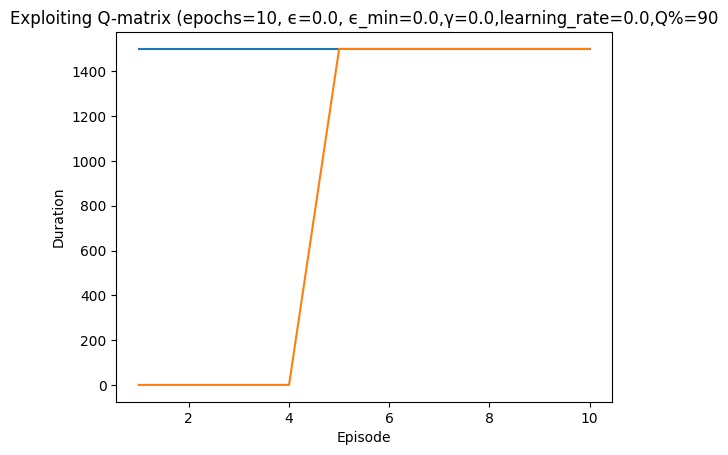

In [10]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [11]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 20|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   42.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:   53.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:   53.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  153.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  153.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  167.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  181.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  181.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  192.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  192.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  206.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  206.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  206.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  212.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  212.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  312.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 150|reward:  312.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  326.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  326.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  326.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  376.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  376.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  376.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  376.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  426.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  426.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  426.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  476.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 380|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 402|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 408|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 414|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 422|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 428|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 433|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 441|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 446|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 450|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 452|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 456|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 461|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 467|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 473|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 479|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 485|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 491|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:02||

Episode 1|Iteration 497|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 503|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 506|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 507|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 512|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 519|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 526|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 532|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:03||

Episode 1|Iteration 538|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 542|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 544|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 548|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 549|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 555|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 561|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 567|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:04||

Episode 1|Iteration 572|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 576|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 582|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 588|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 593|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 600|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 606|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 612|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 618|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 625|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:05||

Episode 1|Iteration 631|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 637|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 644|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 650|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 653|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 658|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 664|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 670|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 674|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:06||

Episode 1|Iteration 679|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 684|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 689|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 693|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 700|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 706|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 709|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 715|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 721|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:07||

Episode 1|Iteration 727|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 732|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 737|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 741|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 744|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 746|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 750|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 756|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 760|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 1|Iteration 762|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 768|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 771|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 777|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 782|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 785|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 787|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 789|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 1|Iteration 790|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 797|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 802|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 808|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 814|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 820|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 824|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 829|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:10||

Episode 1|Iteration 834|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 836|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 839|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 841|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 848|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 854|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 860|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 866|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:11||

Episode 1|Iteration 872|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 878|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 884|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 887|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 893|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 898|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 904|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 909|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 912|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 916|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:12||

Episode 1|Iteration 920|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 926|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 930|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 936|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 940|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 943|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 945|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 950|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:13||

Episode 1|Iteration 955|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 960|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 966|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 968|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 969|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 972|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 978|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 984|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 988|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:14||

Episode 1|Iteration 993|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 997|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1003|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1007|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1012|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1014|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1021|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1026|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1027|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:15||

Episode 1|Iteration 1030|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1036|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1042|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1048|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1054|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1060|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1063|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1064|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1070|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:16||

Episode 1|Iteration 1071|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1076|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1077|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1078|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1080|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1086|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1087|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1088|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1094|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:17||

Episode 1|Iteration 1100|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1102|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1108|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1112|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1116|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1121|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1125|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1131|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:18||

Episode 1|Iteration 1137|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1138|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1144|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1148|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1150|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1152|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1157|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1163|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:19||

Episode 1|Iteration 1169|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1173|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1178|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1183|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1189|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1195|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1201|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1203|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:20||

Episode 1|Iteration 1206|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1212|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1216|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1218|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1219|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1220|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1225|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1231|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1235|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:21||

Episode 1|Iteration 1240|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1241|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1247|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1253|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1258|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1263|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1266|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1272|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1273|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:22||

Episode 1|Iteration 1279|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1280|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1284|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1285|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1288|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1290|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1296|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1302|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:23||

Episode 1|Iteration 1308|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1313|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1319|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1322|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1328|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1334|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1340|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1343|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1349|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:24||

Episode 1|Iteration 1354|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1355|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1361|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1366|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1371|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1377|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1382|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1387|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:25||

Episode 1|Iteration 1392|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1396|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1402|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1406|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1411|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1417|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1419|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1425|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:26||

Episode 1|Iteration 1430|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1436|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1442|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1448|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1454|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1457|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1463|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1468|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1474|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:27||

Episode 1|Iteration 1477|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:28||

Episode 1|Iteration 1482|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:28||

Episode 1|Iteration 1487|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:28||

Episode 1|Iteration 1491|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:28||

Episode 1|Iteration 1497|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:28||

Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:00:28||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/118 (0.02)
    explore-remote: 8/575 (0.01)
    explore-connect: 5/565 (0.01)
    exploit-local: 0/29 (0.00)
    exploit-remote: 0/169 (0.00)
    exploit-connect: 0/28 (0.00)
  exploit deflected to exploration: 84
  ## Episode: 2/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 67|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 74|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 81|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 88|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 95|reward:   42.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 99|reward:   56.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 99|reward:   56.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 2|Iteration 106|reward:   56.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 2|Iteration 112|reward:   56.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 2|Iteration 115|reward:  156.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 2|Iteration 115|reward:  156.0|last_reward_at:  115|Elapsed Time: 0:00:01||

Episode 2|Iteration 119|reward:  170.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 2|Iteration 119|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 125|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 131|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 138|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 143|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 147|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 152|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 158|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 165|reward:  170.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 170|reward:  220.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 2|Iteration 170|reward:  220.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 2|Iteration 176|reward:  220.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 2|Iteration 181|reward:  220.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 2|Iteration 188|reward:  220.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 2|Iteration 194|reward:  220.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward:  226.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 2|Iteration 195|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 201|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 205|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 209|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 215|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 219|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 224|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 2|Iteration 228|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 234|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 240|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 246|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 253|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 259|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 265|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 271|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 275|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 2|Iteration 281|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 285|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 291|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 297|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 303|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 309|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 315|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 321|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 327|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 333|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 2|Iteration 339|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 345|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 352|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 359|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 364|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 370|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 376|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 380|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 384|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 390|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 2|Iteration 396|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 402|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 408|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 414|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 418|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 423|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 429|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 435|reward:  226.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 436|reward:  237.0|last_reward_at:  195|Elapsed Time: 0:00:07||

Episode 2|Iteration 436|reward:  237.0|last_reward_at:  436|Elapsed Time: 0:00:07||

Episode 2|Iteration 442|reward:  237.0|last_reward_at:  436|Elapsed Time: 0:00:07||

Episode 2|Iteration 448|reward:  237.0|last_reward_at:  436|Elapsed Time: 0:00:08||

Episode 2|Iteration 452|reward:  251.0|last_reward_at:  436|Elapsed Time: 0:00:08||

Episode 2|Iteration 452|reward:  251.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 456|reward:  251.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 461|reward:  251.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 468|reward:  251.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 474|reward:  251.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 480|reward:  251.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 482|reward:  301.0|last_reward_at:  452|Elapsed Time: 0:00:08||

Episode 2|Iteration 482|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:08||

Episode 2|Iteration 488|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:08||

Episode 2|Iteration 494|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:08||

Episode 2|Iteration 498|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:08||

Episode 2|Iteration 504|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 510|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 516|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 522|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 528|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 532|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 537|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 543|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 549|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 555|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:09||

Episode 2|Iteration 562|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 568|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 575|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 581|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 587|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 593|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 599|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 605|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 610|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:10||

Episode 2|Iteration 616|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 622|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 627|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 632|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 638|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 644|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 650|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 656|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 662|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 668|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:11||

Episode 2|Iteration 674|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 680|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 684|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 690|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 696|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 702|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 708|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 714|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 720|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:12||

Episode 2|Iteration 726|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 732|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 738|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 744|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 750|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 755|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 760|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 765|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 769|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 775|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:13||

Episode 2|Iteration 779|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 784|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 788|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 794|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 798|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 803|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 808|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 813|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 817|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 821|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:14||

Episode 2|Iteration 827|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 833|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 838|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 844|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 850|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 855|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 860|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 866|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 871|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 876|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:15||

Episode 2|Iteration 882|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 886|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 892|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 897|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 902|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 907|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 912|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 917|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 923|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 929|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:16||

Episode 2|Iteration 934|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:17||

Episode 2|Iteration 940|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:17||

Episode 2|Iteration 943|reward:  301.0|last_reward_at:  482|Elapsed Time: 0:00:17||

Episode 2|Iteration 947|reward:  312.0|last_reward_at:  482|Elapsed Time: 0:00:17||

Episode 2|Iteration 947|reward:  312.0|last_reward_at:  947|Elapsed Time: 0:00:17||

Episode 2|Iteration 951|reward:  312.0|last_reward_at:  947|Elapsed Time: 0:00:17||

Episode 2|Iteration 957|reward:  412.0|last_reward_at:  947|Elapsed Time: 0:00:17||

Episode 2|Iteration 957|reward:  412.0|last_reward_at:  957|Elapsed Time: 0:00:17||

Episode 2|Iteration 959|reward:  412.0|last_reward_at:  957|Elapsed Time: 0:00:17||

Episode 2|Iteration 960|reward:  426.0|last_reward_at:  957|Elapsed Time: 0:00:17||

Episode 2|Iteration 960|reward:  426.0|last_reward_at:  960|Elapsed Time: 0:00:17||

Episode 2|Iteration 966|reward:  426.0|last_reward_at:  960|Elapsed Time: 0:00:17||

Episode 2|Iteration 971|reward:  426.0|last_reward_at:  960|Elapsed Time: 0:00:18||

Episode 2|Iteration 976|reward:  426.0|last_reward_at:  960|Elapsed Time: 0:00:18||

Episode 2|Iteration 982|reward:  426.0|last_reward_at:  960|Elapsed Time: 0:00:18||

Episode 2|Iteration 987|reward:  476.0|last_reward_at:  960|Elapsed Time: 0:00:18||

Episode 2|Iteration 987|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:18||

Episode 2|Iteration 991|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:18||

Episode 2|Iteration 997|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:18||

Episode 2|Iteration 999|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:18||

Episode 2|Iteration 1004|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:18||

Episode 2|Iteration 1009|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1013|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1018|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1024|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1030|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1034|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1038|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1039|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:19||

Episode 2|Iteration 1042|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1047|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1048|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1049|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1053|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1055|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1060|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1064|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:20||

Episode 2|Iteration 1069|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1075|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1080|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1086|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1088|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1090|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1096|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1102|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1107|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:21||

Episode 2|Iteration 1110|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1116|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1121|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1126|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1132|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1138|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1144|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1147|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:22||

Episode 2|Iteration 1152|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1158|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1160|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1161|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1166|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1172|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1174|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1178|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:23||

Episode 2|Iteration 1182|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1188|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1194|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1200|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1201|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1206|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1211|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1216|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:24||

Episode 2|Iteration 1220|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1225|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1230|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1234|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1238|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1242|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1246|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:25||

Episode 2|Iteration 1249|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1254|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1259|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1265|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1269|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1273|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1278|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1281|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1282|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:26||

Episode 2|Iteration 1286|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1290|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1295|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1299|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1304|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1307|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1311|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:27||

Episode 2|Iteration 1315|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1321|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1327|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1328|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1330|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1334|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1340|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1345|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:28||

Episode 2|Iteration 1347|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1353|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1354|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1359|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1360|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1364|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1368|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1372|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:29||

Episode 2|Iteration 1374|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1379|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1384|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1386|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1388|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1393|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1396|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:30||

Episode 2|Iteration 1399|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1404|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1406|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1410|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1414|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1417|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1418|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1423|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:31||

Episode 2|Iteration 1428|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1432|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1434|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1437|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1440|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1444|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1448|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:32||

Episode 2|Iteration 1453|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1455|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1461|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1467|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1469|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1474|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1480|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:33||

Episode 2|Iteration 1485|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

Episode 2|Iteration 1486|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

Episode 2|Iteration 1488|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

Episode 2|Iteration 1490|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

Episode 2|Iteration 1493|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

Episode 2|Iteration 1498|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  987|Elapsed Time: 0:00:34||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/87 (0.03)
    explore-remote: 5/436 (0.01)
    explore-connect: 0/429 (0.00)
    exploit-local: 0/81 (0.00)
    exploit-remote: 3/406 (0.01)
    exploit-connect: 5/45 (0.10)
  exploit deflected to exploration: 51
  ## Episode: 3/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   53.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   53.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   67.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   67.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   67.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:   67.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:   67.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   81.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   81.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   81.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:   81.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 48|reward:   81.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:   92.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 3|Iteration 53|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 57|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 62|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 68|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 74|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 80|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 85|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 90|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 95|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 99|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 105|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 3|Iteration 111|reward:   98.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 3|Iteration 111|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 116|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 121|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 127|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 133|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 138|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 144|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 150|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 155|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 3|Iteration 160|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 165|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 171|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 176|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 182|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 188|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 194|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 200|reward:  148.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 3|Iteration 200|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 3|Iteration 205|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 3|Iteration 209|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 214|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 220|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 226|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 232|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 238|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 243|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 247|reward:  148.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 250|reward:  198.0|last_reward_at:  200|Elapsed Time: 0:00:04||

Episode 3|Iteration 250|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 3|Iteration 256|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 3|Iteration 262|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 266|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 271|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 277|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 283|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 289|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 294|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 300|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 304|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 309|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 3|Iteration 314|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 319|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 323|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 328|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 334|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 340|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 346|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 352|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 356|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 361|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 3|Iteration 366|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 373|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 379|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 383|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 388|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 394|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 399|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 403|reward:  198.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 3|Iteration 409|reward:  298.0|last_reward_at:  250|Elapsed Time: 0:00:08||

Episode 3|Iteration 409|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 414|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 418|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 419|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 424|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 428|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 434|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 438|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 440|reward:  298.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 441|reward:  312.0|last_reward_at:  409|Elapsed Time: 0:00:08||

Episode 3|Iteration 441|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:08||

Episode 3|Iteration 447|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 453|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 456|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 461|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 467|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 473|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 475|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 481|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 487|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:09||

Episode 3|Iteration 493|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 499|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 504|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 510|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 516|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 521|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 527|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 532|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 537|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 543|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:10||

Episode 3|Iteration 549|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 553|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 556|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 561|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 567|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 573|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 578|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 584|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:11||

Episode 3|Iteration 589|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 594|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 599|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 604|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 608|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 612|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 618|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 620|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 622|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:12||

Episode 3|Iteration 627|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 630|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 635|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 640|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 645|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 650|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 655|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 661|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 665|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 670|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:13||

Episode 3|Iteration 675|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 680|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 684|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 688|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 693|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 698|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 703|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 707|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 712|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:14||

Episode 3|Iteration 718|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 722|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 725|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 730|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 736|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 741|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 746|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 750|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 755|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 760|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:15||

Episode 3|Iteration 762|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 768|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 774|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 778|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 783|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 786|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 792|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 797|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 801|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:16||

Episode 3|Iteration 807|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 812|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 817|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 823|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 829|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 833|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 838|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 844|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 850|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:17||

Episode 3|Iteration 855|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 860|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 866|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 868|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 874|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 878|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 885|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 887|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 893|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 898|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:18||

Episode 3|Iteration 904|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 910|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 915|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 921|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 927|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 931|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 932|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 937|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 943|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:19||

Episode 3|Iteration 949|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 954|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 959|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 965|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 969|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 972|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 977|reward:  312.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 982|reward:  412.0|last_reward_at:  441|Elapsed Time: 0:00:20||

Episode 3|Iteration 982|reward:  412.0|last_reward_at:  982|Elapsed Time: 0:00:20||

Episode 3|Iteration 983|reward:  426.0|last_reward_at:  982|Elapsed Time: 0:00:20||

Episode 3|Iteration 983|reward:  426.0|last_reward_at:  983|Elapsed Time: 0:00:20||

Episode 3|Iteration 986|reward:  476.0|last_reward_at:  983|Elapsed Time: 0:00:20||

Episode 3|Iteration 986|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:20||

Episode 3|Iteration 987|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:20||

Episode 3|Iteration 992|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 998|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1004|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1008|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1009|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1010|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1013|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1014|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:21||

Episode 3|Iteration 1015|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1016|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1018|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1021|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1024|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1029|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1035|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:22||

Episode 3|Iteration 1040|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1045|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1046|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1047|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1052|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1058|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1062|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1068|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:23||

Episode 3|Iteration 1073|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1078|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1080|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1085|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1086|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1087|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1090|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:24||

Episode 3|Iteration 1095|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1097|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1102|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1103|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1109|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1114|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1117|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1121|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:25||

Episode 3|Iteration 1124|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1129|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1134|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1135|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1140|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1143|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1146|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:26||

Episode 3|Iteration 1151|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1156|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1162|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1168|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1173|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1178|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1183|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1187|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:27||

Episode 3|Iteration 1193|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1197|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1201|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1206|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1211|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1216|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1221|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1226|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:28||

Episode 3|Iteration 1227|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1228|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1231|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1235|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1235|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1241|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1244|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:29||

Episode 3|Iteration 1248|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1253|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1258|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1260|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1261|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1266|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1271|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1276|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:30||

Episode 3|Iteration 1281|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1286|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1287|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1292|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1296|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1301|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1306|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1307|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1310|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:31||

Episode 3|Iteration 1315|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1320|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1325|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1330|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1331|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1336|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1340|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:32||

Episode 3|Iteration 1343|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1346|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1351|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1356|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1361|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1365|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1370|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1373|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1375|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:33||

Episode 3|Iteration 1379|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1380|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1381|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1382|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1387|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1391|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1392|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:34||

Episode 3|Iteration 1395|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:35||

Episode 3|Iteration 1399|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:35||

Episode 3|Iteration 1400|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:35||

Episode 3|Iteration 1404|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:35||

Episode 3|Iteration 1407|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:35||

Episode 3|Iteration 1412|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:35||

Episode 3|Iteration 1416|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1421|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1422|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1427|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1431|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1436|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1437|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1443|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1444|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:36||

Episode 3|Iteration 1447|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1452|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1453|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1458|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1462|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1464|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1469|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:37||

Episode 3|Iteration 1474|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1478|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1482|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1484|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1488|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1492|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1497|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  986|Elapsed Time: 0:00:38||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/63 (0.02)
    explore-remote: 4/354 (0.01)
    explore-connect: 0/375 (0.00)
    exploit-local: 2/66 (0.03)
    exploit-remote: 4/558 (0.01)
    exploit-connect: 5/68 (0.07)
  exploit deflected to exploration: 74
  ## Episode: 4/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:   53.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:   53.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:   53.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:   64.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 4|Iteration 53|reward:   64.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 4|Iteration 57|reward:   64.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 4|Iteration 61|reward:  114.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 4|Iteration 61|reward:  114.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward:  123.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 71|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 76|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 80|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 86|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 90|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 94|reward:  123.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 4|Iteration 100|reward:  223.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 4|Iteration 100|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 105|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 111|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 116|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 122|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 127|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 133|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 135|reward:  237.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 4|Iteration 135|reward:  237.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 4|Iteration 140|reward:  237.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 4|Iteration 142|reward:  248.0|last_reward_at:  135|Elapsed Time: 0:00:03||

Episode 4|Iteration 142|reward:  248.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 4|Iteration 148|reward:  248.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 4|Iteration 152|reward:  248.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 4|Iteration 157|reward:  262.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 4|Iteration 157|reward:  262.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 4|Iteration 163|reward:  262.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 4|Iteration 169|reward:  262.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 4|Iteration 175|reward:  262.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 4|Iteration 181|reward:  262.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 4|Iteration 185|reward:  312.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 4|Iteration 185|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 4|Iteration 189|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 4|Iteration 195|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 200|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 205|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 209|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 213|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 218|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 224|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 227|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 231|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 4|Iteration 236|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 241|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 246|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 252|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 257|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 262|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 266|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 271|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 277|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 282|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 4|Iteration 284|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 287|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 292|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 297|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 302|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 307|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 312|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 317|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 322|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 4|Iteration 327|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 329|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 335|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 341|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 347|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 351|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 356|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 360|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 364|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:07||

Episode 4|Iteration 369|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 374|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 379|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 384|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 386|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 391|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 396|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 402|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 405|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:08||

Episode 4|Iteration 408|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 413|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 418|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 421|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 426|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 431|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 434|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 440|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 446|reward:  312.0|last_reward_at:  185|Elapsed Time: 0:00:09||

Episode 4|Iteration 449|reward:  412.0|last_reward_at:  185|Elapsed Time: 0:00:10||

Episode 4|Iteration 449|reward:  412.0|last_reward_at:  449|Elapsed Time: 0:00:10||

Episode 4|Iteration 450|reward:  426.0|last_reward_at:  449|Elapsed Time: 0:00:10||

Episode 4|Iteration 450|reward:  426.0|last_reward_at:  450|Elapsed Time: 0:00:10||

Episode 4|Iteration 454|reward:  426.0|last_reward_at:  450|Elapsed Time: 0:00:10||

Episode 4|Iteration 458|reward:  426.0|last_reward_at:  450|Elapsed Time: 0:00:10||

Episode 4|Iteration 463|reward:  426.0|last_reward_at:  450|Elapsed Time: 0:00:10||

Episode 4|Iteration 468|reward:  476.0|last_reward_at:  450|Elapsed Time: 0:00:10||

Episode 4|Iteration 468|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:10||

Episode 4|Iteration 473|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:10||

Episode 4|Iteration 476|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:10||

Episode 4|Iteration 478|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:10||

Episode 4|Iteration 479|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 484|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 489|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 494|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 497|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 501|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 502|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:11||

Episode 4|Iteration 503|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:12||

Episode 4|Iteration 508|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:12||

Episode 4|Iteration 510|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:12||

Episode 4|Iteration 512|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:12||

Episode 4|Iteration 515|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:12||

Episode 4|Iteration 519|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:12||

Episode 4|Iteration 524|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:13||

Episode 4|Iteration 527|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:13||

Episode 4|Iteration 529|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:13||

Episode 4|Iteration 532|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:13||

Episode 4|Iteration 536|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:13||

Episode 4|Iteration 540|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:13||

Episode 4|Iteration 545|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:14||

Episode 4|Iteration 549|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:14||

Episode 4|Iteration 553|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:14||

Episode 4|Iteration 558|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:14||

Episode 4|Iteration 562|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:14||

Episode 4|Iteration 567|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:14||

Episode 4|Iteration 571|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:15||

Episode 4|Iteration 576|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:15||

Episode 4|Iteration 577|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:15||

Episode 4|Iteration 580|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:15||

Episode 4|Iteration 585|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:15||

Episode 4|Iteration 589|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:15||

Episode 4|Iteration 589|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 592|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 593|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 596|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 598|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 600|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 604|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 608|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:16||

Episode 4|Iteration 608|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:17||

Episode 4|Iteration 613|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:17||

Episode 4|Iteration 616|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:17||

Episode 4|Iteration 620|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:17||

Episode 4|Iteration 625|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:17||

Episode 4|Iteration 629|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 631|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 633|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 638|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 640|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 643|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 648|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:18||

Episode 4|Iteration 653|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:19||

Episode 4|Iteration 658|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:19||

Episode 4|Iteration 663|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:19||

Episode 4|Iteration 664|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:19||

Episode 4|Iteration 669|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:19||

Episode 4|Iteration 673|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:19||

Episode 4|Iteration 674|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:20||

Episode 4|Iteration 679|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:20||

Episode 4|Iteration 683|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:20||

Episode 4|Iteration 687|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:20||

Episode 4|Iteration 690|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:20||

Episode 4|Iteration 693|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:20||

Episode 4|Iteration 694|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 696|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 697|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 702|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 704|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 709|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 711|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:21||

Episode 4|Iteration 713|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 717|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 718|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 719|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 722|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 724|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 726|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:22||

Episode 4|Iteration 730|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 732|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 737|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 739|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 744|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 747|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 751|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:23||

Episode 4|Iteration 752|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 753|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 757|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 762|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 767|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 772|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 777|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:24||

Episode 4|Iteration 781|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 782|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 787|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 792|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 796|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 800|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 803|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:25||

Episode 4|Iteration 806|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 811|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 816|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 821|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 823|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 825|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 826|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:26||

Episode 4|Iteration 831|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:27||

Episode 4|Iteration 832|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:27||

Episode 4|Iteration 835|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:27||

Episode 4|Iteration 839|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:27||

Episode 4|Iteration 843|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:27||

Episode 4|Iteration 844|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:27||

Episode 4|Iteration 848|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 852|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 857|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 860|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 865|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 869|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 874|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 877|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:28||

Episode 4|Iteration 882|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 884|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 885|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 887|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 889|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 893|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 897|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:29||

Episode 4|Iteration 902|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 904|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 908|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 912|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 913|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 914|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 919|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:30||

Episode 4|Iteration 924|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:31||

Episode 4|Iteration 927|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:31||

Episode 4|Iteration 928|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:31||

Episode 4|Iteration 931|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:31||

Episode 4|Iteration 934|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:31||

Episode 4|Iteration 937|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:31||

Episode 4|Iteration 941|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 945|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 949|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 950|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 954|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 959|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 962|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:32||

Episode 4|Iteration 964|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 968|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 972|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 977|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 978|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 981|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 985|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 988|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:33||

Episode 4|Iteration 992|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 995|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 999|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 1004|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 1007|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 1010|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 1012|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 1013|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:34||

Episode 4|Iteration 1017|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1021|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1023|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1026|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1026|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1027|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1030|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1035|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:35||

Episode 4|Iteration 1037|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1041|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1045|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1047|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1052|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1055|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1060|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:36||

Episode 4|Iteration 1061|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1064|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1065|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1066|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1071|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1073|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1078|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1082|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:37||

Episode 4|Iteration 1087|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:38||

Episode 4|Iteration 1092|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:38||

Episode 4|Iteration 1095|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:38||

Episode 4|Iteration 1099|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:38||

Episode 4|Iteration 1102|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:38||

Episode 4|Iteration 1106|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1107|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1112|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1117|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1121|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1122|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1126|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1129|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:39||

Episode 4|Iteration 1131|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:40||

Episode 4|Iteration 1136|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:40||

Episode 4|Iteration 1139|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:40||

Episode 4|Iteration 1143|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:40||

Episode 4|Iteration 1148|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:40||

Episode 4|Iteration 1152|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:40||

Episode 4|Iteration 1156|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:41||

Episode 4|Iteration 1160|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:41||

Episode 4|Iteration 1163|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:41||

Episode 4|Iteration 1168|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:41||

Episode 4|Iteration 1170|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:41||

Episode 4|Iteration 1173|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1178|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1181|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1182|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1187|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1192|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1196|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1199|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:42||

Episode 4|Iteration 1203|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1205|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1210|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1211|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1216|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1219|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1224|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1228|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:43||

Episode 4|Iteration 1233|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:44||

Episode 4|Iteration 1238|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:44||

Episode 4|Iteration 1239|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:44||

Episode 4|Iteration 1243|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:44||

Episode 4|Iteration 1248|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:44||

Episode 4|Iteration 1250|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:44||

Episode 4|Iteration 1254|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1258|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1262|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1265|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1267|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1268|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1272|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:45||

Episode 4|Iteration 1274|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:46||

Episode 4|Iteration 1279|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:46||

Episode 4|Iteration 1281|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:46||

Episode 4|Iteration 1284|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:46||

Episode 4|Iteration 1289|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:46||

Episode 4|Iteration 1294|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:46||

Episode 4|Iteration 1297|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1301|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1303|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1305|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1307|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1309|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1314|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:47||

Episode 4|Iteration 1317|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1322|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1327|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1330|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1334|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1339|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1343|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1346|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1348|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:48||

Episode 4|Iteration 1353|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1356|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1359|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1364|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1365|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1366|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1371|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:49||

Episode 4|Iteration 1373|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1377|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1379|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1384|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1389|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1391|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1394|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:50||

Episode 4|Iteration 1398|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1403|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1408|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1412|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1415|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1417|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1418|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:51||

Episode 4|Iteration 1423|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:52||

Episode 4|Iteration 1426|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:52||

Episode 4|Iteration 1431|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:52||

Episode 4|Iteration 1436|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:52||

Episode 4|Iteration 1441|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:52||

Episode 4|Iteration 1444|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:52||

Episode 4|Iteration 1448|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1453|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1458|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1463|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1467|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1468|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1471|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:53||

Episode 4|Iteration 1476|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1481|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1484|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1486|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1489|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1491|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1496|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1497|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:54||

Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:00:55||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/71 (0.03)
    explore-remote: 3/315 (0.01)
    explore-connect: 0/339 (0.00)
    exploit-local: 1/110 (0.01)
    exploit-remote: 5/610 (0.01)
    exploit-connect: 5/39 (0.11)
  exploit deflected to exploration: 148
  ## Episode: 5/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 49|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 54|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 60|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 65|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 66|reward:   44.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 66|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 70|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 75|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 80|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 5|Iteration 91|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 5|Iteration 95|reward:   44.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 5|Iteration 97|reward:   58.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 5|Iteration 97|reward:   58.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 5|Iteration 102|reward:   58.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 5|Iteration 107|reward:   58.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 5|Iteration 110|reward:  108.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 5|Iteration 110|reward:  108.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 5|Iteration 114|reward:  108.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 5|Iteration 116|reward:  108.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 5|Iteration 119|reward:  122.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 5|Iteration 119|reward:  122.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 5|Iteration 123|reward:  122.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 5|Iteration 128|reward:  122.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 5|Iteration 133|reward:  122.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 137|reward:  122.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 141|reward:  133.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 5|Iteration 141|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 146|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 151|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 156|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 161|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 166|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 169|reward:  133.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 5|Iteration 171|reward:  183.0|last_reward_at:  141|Elapsed Time: 0:00:04||

Episode 5|Iteration 171|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 177|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 181|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 186|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 188|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 191|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 194|reward:  183.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 198|reward:  189.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 5|Iteration 198|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:04||

Episode 5|Iteration 200|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:04||

Episode 5|Iteration 204|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 209|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 213|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 218|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 221|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 224|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 228|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 230|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 5|Iteration 234|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 239|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 241|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 246|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 249|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 252|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 254|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 259|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 5|Iteration 261|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 264|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 269|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 271|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 276|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 281|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 284|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 289|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 294|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:07||

Episode 5|Iteration 296|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 298|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 300|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 302|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 305|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 307|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 309|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 311|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:08||

Episode 5|Iteration 316|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 318|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 323|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 324|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 329|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 334|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 339|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 342|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:09||

Episode 5|Iteration 344|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 348|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 352|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 357|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 361|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 364|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 366|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 371|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 376|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:10||

Episode 5|Iteration 380|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 384|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 389|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 391|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 396|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 398|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 403|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 407|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 409|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:11||

Episode 5|Iteration 414|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 416|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 421|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 426|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 431|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 434|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 439|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 442|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 444|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:12||

Episode 5|Iteration 446|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 448|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 453|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 456|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 461|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 466|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 469|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 474|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:13||

Episode 5|Iteration 477|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 482|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 487|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 491|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 496|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 501|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 505|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:14||

Episode 5|Iteration 510|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 512|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 516|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 521|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 526|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 529|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 531|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 536|reward:  189.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 537|reward:  198.0|last_reward_at:  198|Elapsed Time: 0:00:15||

Episode 5|Iteration 537|reward:  198.0|last_reward_at:  537|Elapsed Time: 0:00:15||

Episode 5|Iteration 542|reward:  198.0|last_reward_at:  537|Elapsed Time: 0:00:16||

Episode 5|Iteration 547|reward:  198.0|last_reward_at:  537|Elapsed Time: 0:00:16||

Episode 5|Iteration 551|reward:  198.0|last_reward_at:  537|Elapsed Time: 0:00:16||

Episode 5|Iteration 555|reward:  198.0|last_reward_at:  537|Elapsed Time: 0:00:16||

Episode 5|Iteration 558|reward:  298.0|last_reward_at:  537|Elapsed Time: 0:00:16||

Episode 5|Iteration 558|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:16||

Episode 5|Iteration 559|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:16||

Episode 5|Iteration 560|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:16||

Episode 5|Iteration 565|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:16||

Episode 5|Iteration 569|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:16||

Episode 5|Iteration 574|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:16||

Episode 5|Iteration 577|reward:  298.0|last_reward_at:  558|Elapsed Time: 0:00:17||

Episode 5|Iteration 578|reward:  312.0|last_reward_at:  558|Elapsed Time: 0:00:17||

Episode 5|Iteration 578|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 583|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 588|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 590|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 595|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 600|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 602|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 607|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:17||

Episode 5|Iteration 612|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 617|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 621|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 625|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 630|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 635|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 639|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 644|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:18||

Episode 5|Iteration 649|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 654|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 656|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 660|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 663|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 668|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 673|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 678|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:19||

Episode 5|Iteration 682|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 685|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 690|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 695|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 700|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 705|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 710|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 715|reward:  312.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 717|reward:  412.0|last_reward_at:  578|Elapsed Time: 0:00:20||

Episode 5|Iteration 717|reward:  412.0|last_reward_at:  717|Elapsed Time: 0:00:20||

Episode 5|Iteration 718|reward:  426.0|last_reward_at:  717|Elapsed Time: 0:00:20||

Episode 5|Iteration 718|reward:  426.0|last_reward_at:  718|Elapsed Time: 0:00:20||

Episode 5|Iteration 722|reward:  426.0|last_reward_at:  718|Elapsed Time: 0:00:20||

Episode 5|Iteration 725|reward:  426.0|last_reward_at:  718|Elapsed Time: 0:00:21||

Episode 5|Iteration 730|reward:  426.0|last_reward_at:  718|Elapsed Time: 0:00:21||

Episode 5|Iteration 735|reward:  426.0|last_reward_at:  718|Elapsed Time: 0:00:21||

Episode 5|Iteration 740|reward:  426.0|last_reward_at:  718|Elapsed Time: 0:00:21||

Episode 5|Iteration 744|reward:  476.0|last_reward_at:  718|Elapsed Time: 0:00:21||

Episode 5|Iteration 744|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:21||

Episode 5|Iteration 745|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:21||

Episode 5|Iteration 750|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:21||

Episode 5|Iteration 754|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:22||

Episode 5|Iteration 757|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:22||

Episode 5|Iteration 762|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:22||

Episode 5|Iteration 767|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:22||

Episode 5|Iteration 769|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:22||

Episode 5|Iteration 771|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:22||

Episode 5|Iteration 776|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:23||

Episode 5|Iteration 778|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:23||

Episode 5|Iteration 781|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:23||

Episode 5|Iteration 785|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:23||

Episode 5|Iteration 789|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:23||

Episode 5|Iteration 792|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:23||

Episode 5|Iteration 794|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 798|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 801|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 805|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 807|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 808|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 810|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:24||

Episode 5|Iteration 815|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 819|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 824|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 827|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 831|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 833|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 836|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 839|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:25||

Episode 5|Iteration 844|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:26||

Episode 5|Iteration 849|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:26||

Episode 5|Iteration 853|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:26||

Episode 5|Iteration 856|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:26||

Episode 5|Iteration 860|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:26||

Episode 5|Iteration 865|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:26||

Episode 5|Iteration 870|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 873|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 877|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 882|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 887|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 892|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 897|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 901|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:27||

Episode 5|Iteration 906|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 909|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 914|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 919|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 920|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 922|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 926|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:28||

Episode 5|Iteration 927|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 928|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 931|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 935|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 940|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 945|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 950|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 954|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 958|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:29||

Episode 5|Iteration 959|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 964|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 966|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 971|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 975|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 978|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 983|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 988|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:30||

Episode 5|Iteration 992|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:31||

Episode 5|Iteration 993|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:31||

Episode 5|Iteration 995|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:31||

Episode 5|Iteration 1000|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:31||

Episode 5|Iteration 1001|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:31||

Episode 5|Iteration 1006|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:31||

Episode 5|Iteration 1009|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1013|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1015|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1016|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1018|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1023|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1025|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:32||

Episode 5|Iteration 1028|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:33||

Episode 5|Iteration 1033|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:33||

Episode 5|Iteration 1036|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:33||

Episode 5|Iteration 1039|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:33||

Episode 5|Iteration 1041|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:33||

Episode 5|Iteration 1042|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:33||

Episode 5|Iteration 1043|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1045|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1049|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1053|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1058|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1059|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1061|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:34||

Episode 5|Iteration 1064|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1069|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1070|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1075|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1080|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1083|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1086|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:35||

Episode 5|Iteration 1087|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1092|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1097|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1100|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1105|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1109|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1114|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1119|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:36||

Episode 5|Iteration 1124|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1129|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1133|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1136|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1140|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1144|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1149|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1153|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:37||

Episode 5|Iteration 1157|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1160|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1162|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1163|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1168|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1169|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1170|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:38||

Episode 5|Iteration 1175|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:39||

Episode 5|Iteration 1180|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:39||

Episode 5|Iteration 1185|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:39||

Episode 5|Iteration 1190|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:39||

Episode 5|Iteration 1195|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:39||

Episode 5|Iteration 1197|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:39||

Episode 5|Iteration 1201|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1206|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1209|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1214|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1219|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1221|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1225|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:40||

Episode 5|Iteration 1226|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1231|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1233|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1238|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1241|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1246|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1251|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:41||

Episode 5|Iteration 1254|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1254|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1258|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1259|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1261|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1265|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1270|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1273|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:42||

Episode 5|Iteration 1275|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:43||

Episode 5|Iteration 1277|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:43||

Episode 5|Iteration 1278|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:43||

Episode 5|Iteration 1280|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:43||

Episode 5|Iteration 1281|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:43||

Episode 5|Iteration 1286|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:43||

Episode 5|Iteration 1287|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1292|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1293|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1294|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1299|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1301|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1306|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:44||

Episode 5|Iteration 1311|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1314|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1316|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1318|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1320|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1324|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1328|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:45||

Episode 5|Iteration 1333|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:46||

Episode 5|Iteration 1336|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:46||

Episode 5|Iteration 1340|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:46||

Episode 5|Iteration 1342|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:46||

Episode 5|Iteration 1345|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:46||

Episode 5|Iteration 1348|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:46||

Episode 5|Iteration 1352|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1357|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1362|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1363|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1368|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1368|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1373|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1376|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:47||

Episode 5|Iteration 1380|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:48||

Episode 5|Iteration 1381|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:48||

Episode 5|Iteration 1386|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:48||

Episode 5|Iteration 1389|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:48||

Episode 5|Iteration 1390|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:48||

Episode 5|Iteration 1395|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:48||

Episode 5|Iteration 1397|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:49||

Episode 5|Iteration 1399|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:49||

Episode 5|Iteration 1401|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:49||

Episode 5|Iteration 1406|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:49||

Episode 5|Iteration 1409|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:49||

Episode 5|Iteration 1413|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:49||

Episode 5|Iteration 1417|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1421|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1424|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1428|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1433|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1436|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1438|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:50||

Episode 5|Iteration 1442|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1447|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1450|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1453|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1458|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1462|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1464|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:51||

Episode 5|Iteration 1465|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:52||

Episode 5|Iteration 1470|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:52||

Episode 5|Iteration 1474|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:52||

Episode 5|Iteration 1476|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:52||

Episode 5|Iteration 1478|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:52||

Episode 5|Iteration 1479|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:52||

Episode 5|Iteration 1483|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:53||

Episode 5|Iteration 1486|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:53||

Episode 5|Iteration 1487|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:53||

Episode 5|Iteration 1492|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:53||

Episode 5|Iteration 1497|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:53||

Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  744|Elapsed Time: 0:00:53||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/49 (0.02)
    explore-remote: 3/328 (0.01)
    explore-connect: 1/278 (0.00)
    exploit-local: 2/116 (0.02)
    exploit-remote: 5/697 (0.01)
    exploit-connect: 4/16 (0.20)
  exploit deflected to exploration: 163
  ## Episode: 6/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 42|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 45|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 48|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 51|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 54|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 57|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 60|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 64|reward:  145.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 6|Iteration 64|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 6|Iteration 69|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 74|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 76|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 79|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 83|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 88|reward:  145.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 92|reward:  156.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 92|reward:  156.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 6|Iteration 97|reward:  156.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 6|Iteration 102|reward:  156.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 6|Iteration 106|reward:  170.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 6|Iteration 106|reward:  170.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward:  170.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 6|Iteration 116|reward:  170.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 6|Iteration 120|reward:  170.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 6|Iteration 125|reward:  170.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 6|Iteration 126|reward:  176.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 6|Iteration 126|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 129|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 133|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 137|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 142|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 147|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 150|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:03||

Episode 6|Iteration 155|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 6|Iteration 160|reward:  176.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 6|Iteration 162|reward:  187.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 6|Iteration 162|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 165|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 170|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 175|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 180|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 185|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 186|reward:  237.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 6|Iteration 186|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:04||

Episode 6|Iteration 190|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:04||

Episode 6|Iteration 194|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 198|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 202|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 207|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 209|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 214|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 218|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 223|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 228|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:05||

Episode 6|Iteration 232|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 237|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 242|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 247|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 251|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 256|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 261|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 265|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 269|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:06||

Episode 6|Iteration 273|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 277|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 282|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 287|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 291|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 296|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 301|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 306|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:00:07||

Episode 6|Iteration 310|reward:  337.0|last_reward_at:  186|Elapsed Time: 0:00:08||

Episode 6|Iteration 310|reward:  337.0|last_reward_at:  310|Elapsed Time: 0:00:08||

Episode 6|Iteration 312|reward:  351.0|last_reward_at:  310|Elapsed Time: 0:00:08||

Episode 6|Iteration 312|reward:  351.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 6|Iteration 317|reward:  351.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 6|Iteration 318|reward:  401.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 6|Iteration 318|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 6|Iteration 320|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 6|Iteration 322|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 6|Iteration 324|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 6|Iteration 329|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 6|Iteration 333|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:08||

Episode 6|Iteration 337|reward:  401.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 6|Iteration 339|reward:  415.0|last_reward_at:  318|Elapsed Time: 0:00:09||

Episode 6|Iteration 339|reward:  415.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 6|Iteration 344|reward:  415.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 6|Iteration 346|reward:  465.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 6|Iteration 346|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:09||

Episode 6|Iteration 348|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:09||

Episode 6|Iteration 353|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:09||

Episode 6|Iteration 358|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:09||

Episode 6|Iteration 361|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:09||

Episode 6|Iteration 364|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:10||

Episode 6|Iteration 366|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:10||

Episode 6|Iteration 371|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:10||

Episode 6|Iteration 374|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:10||

Episode 6|Iteration 379|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:10||

Episode 6|Iteration 384|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:10||

Episode 6|Iteration 386|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 6|Iteration 390|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 6|Iteration 391|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 6|Iteration 393|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 6|Iteration 397|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 6|Iteration 402|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 6|Iteration 405|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 408|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 409|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 410|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 412|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 414|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 418|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 6|Iteration 421|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:13||

Episode 6|Iteration 422|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:13||

Episode 6|Iteration 427|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:13||

Episode 6|Iteration 430|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:13||

Episode 6|Iteration 432|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:13||

Episode 6|Iteration 435|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:13||

Episode 6|Iteration 437|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 441|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 446|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 451|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 455|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 457|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 459|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:14||

Episode 6|Iteration 464|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 469|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 473|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 476|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 477|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 479|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 482|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:15||

Episode 6|Iteration 487|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 492|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 497|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 502|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 505|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 508|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 512|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:16||

Episode 6|Iteration 517|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:17||

Episode 6|Iteration 520|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:17||

Episode 6|Iteration 521|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:17||

Episode 6|Iteration 526|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:17||

Episode 6|Iteration 530|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:17||

Episode 6|Iteration 534|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:17||

Episode 6|Iteration 537|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 539|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 540|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 543|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 547|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 551|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 555|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:18||

Episode 6|Iteration 560|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:19||

Episode 6|Iteration 564|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:19||

Episode 6|Iteration 569|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:19||

Episode 6|Iteration 573|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:19||

Episode 6|Iteration 578|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:19||

Episode 6|Iteration 579|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:19||

Episode 6|Iteration 582|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 584|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 585|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 586|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 591|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 593|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 598|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:20||

Episode 6|Iteration 599|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 603|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 606|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 611|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 616|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 618|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 622|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:21||

Episode 6|Iteration 623|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:22||

Episode 6|Iteration 627|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:22||

Episode 6|Iteration 631|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:22||

Episode 6|Iteration 633|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:22||

Episode 6|Iteration 637|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:22||

Episode 6|Iteration 639|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:22||

Episode 6|Iteration 642|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 646|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 648|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 653|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 655|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 656|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 661|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 665|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:23||

Episode 6|Iteration 667|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:24||

Episode 6|Iteration 672|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:24||

Episode 6|Iteration 677|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:24||

Episode 6|Iteration 678|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:24||

Episode 6|Iteration 681|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:24||

Episode 6|Iteration 682|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:24||

Episode 6|Iteration 684|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 687|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 692|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 695|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 700|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 705|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 706|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:25||

Episode 6|Iteration 711|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 712|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 713|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 714|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 715|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 717|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 720|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:26||

Episode 6|Iteration 721|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 726|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 729|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 732|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 737|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 741|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 744|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:27||

Episode 6|Iteration 746|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 751|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 754|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 757|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 758|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 760|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 763|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:28||

Episode 6|Iteration 767|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:29||

Episode 6|Iteration 769|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:29||

Episode 6|Iteration 773|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:29||

Episode 6|Iteration 778|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:29||

Episode 6|Iteration 779|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:29||

Episode 6|Iteration 782|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:29||

Episode 6|Iteration 787|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 792|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 797|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 801|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 806|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 807|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 810|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:30||

Episode 6|Iteration 815|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 819|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 823|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 828|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 831|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 832|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 834|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:31||

Episode 6|Iteration 839|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 842|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 845|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 850|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 852|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 854|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 859|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 864|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:32||

Episode 6|Iteration 865|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 870|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 871|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 876|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 879|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 883|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 884|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 888|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:33||

Episode 6|Iteration 893|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 896|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 901|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 906|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 907|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 910|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 911|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 915|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:34||

Episode 6|Iteration 918|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 920|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 921|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 923|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 928|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 933|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 936|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 940|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:35||

Episode 6|Iteration 944|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 948|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 951|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 956|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 960|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 961|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 966|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:36||

Episode 6|Iteration 971|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 976|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 981|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 984|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 985|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 990|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 992|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:37||

Episode 6|Iteration 996|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:38||

Episode 6|Iteration 999|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:38||

Episode 6|Iteration 1004|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:38||

Episode 6|Iteration 1008|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:38||

Episode 6|Iteration 1013|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:38||

Episode 6|Iteration 1015|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:38||

Episode 6|Iteration 1016|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1018|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1022|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1023|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1026|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1030|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1032|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:39||

Episode 6|Iteration 1037|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:40||

Episode 6|Iteration 1039|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:40||

Episode 6|Iteration 1044|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:40||

Episode 6|Iteration 1049|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:40||

Episode 6|Iteration 1051|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:40||

Episode 6|Iteration 1056|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:40||

Episode 6|Iteration 1061|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1066|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1071|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1073|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1077|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1078|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1079|reward:  465.0|last_reward_at:  346|Elapsed Time: 0:00:41||

Episode 6|Iteration 1082|reward:  476.0|last_reward_at:  346|Elapsed Time: 0:00:42||

Episode 6|Iteration 1082|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1086|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1088|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1093|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1098|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1101|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1106|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:42||

Episode 6|Iteration 1111|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1115|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1117|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1121|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1125|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1130|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1135|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1139|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1144|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:43||

Episode 6|Iteration 1147|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:44||

Episode 6|Iteration 1148|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:44||

Episode 6|Iteration 1151|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:44||

Episode 6|Iteration 1155|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:44||

Episode 6|Iteration 1158|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:44||

Episode 6|Iteration 1160|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:44||

Episode 6|Iteration 1165|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1166|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1168|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1172|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1177|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1178|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1183|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1187|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:45||

Episode 6|Iteration 1188|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1193|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1195|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1198|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1200|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1202|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1207|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:46||

Episode 6|Iteration 1209|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1214|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1216|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1219|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1220|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1225|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1230|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1233|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1237|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:47||

Episode 6|Iteration 1241|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1244|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1249|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1251|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1254|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1255|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1258|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:48||

Episode 6|Iteration 1263|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1267|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1268|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1269|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1273|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1275|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1280|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1284|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:49||

Episode 6|Iteration 1288|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1292|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1296|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1300|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1301|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1306|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1310|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:50||

Episode 6|Iteration 1314|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1316|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1318|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1322|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1323|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1327|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1329|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:51||

Episode 6|Iteration 1330|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1333|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1337|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1339|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1344|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1346|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1349|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1351|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:52||

Episode 6|Iteration 1354|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:53||

Episode 6|Iteration 1355|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:53||

Episode 6|Iteration 1357|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:53||

Episode 6|Iteration 1360|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:53||

Episode 6|Iteration 1361|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:53||

Episode 6|Iteration 1366|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:53||

Episode 6|Iteration 1367|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1370|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1371|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1375|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1380|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1384|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1389|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:54||

Episode 6|Iteration 1393|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1398|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1401|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1406|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1410|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1415|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1420|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:55||

Episode 6|Iteration 1425|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:56||

Episode 6|Iteration 1426|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:56||

Episode 6|Iteration 1428|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:56||

Episode 6|Iteration 1429|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:56||

Episode 6|Iteration 1434|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:56||

Episode 6|Iteration 1437|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:56||

Episode 6|Iteration 1440|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1443|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1444|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1448|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1452|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1457|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1459|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1463|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:57||

Episode 6|Iteration 1466|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:58||

Episode 6|Iteration 1470|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:58||

Episode 6|Iteration 1474|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:58||

Episode 6|Iteration 1477|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:58||

Episode 6|Iteration 1479|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:58||

Episode 6|Iteration 1481|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1483|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1485|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1487|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1490|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1494|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1499|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

Episode 6|Iteration 1500|reward:  476.0|last_reward_at: 1082|Elapsed Time: 0:00:59||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/56 (0.03)
    explore-remote: 1/243 (0.00)
    explore-connect: 1/225 (0.00)
    exploit-local: 1/164 (0.01)
    exploit-remote: 7/777 (0.01)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 161
  ## Episode: 7/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:   36.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   53.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 7|Iteration 51|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  103.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 59|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 66|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 73|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 76|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 79|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 82|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 85|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 89|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 92|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 97|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 102|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 107|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 7|Iteration 112|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 115|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 118|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 123|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 126|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 131|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 136|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 139|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 144|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:03||

Episode 7|Iteration 149|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:04||

Episode 7|Iteration 152|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:04||

Episode 7|Iteration 154|reward:  103.0|last_reward_at:   54|Elapsed Time: 0:00:04||

Episode 7|Iteration 156|reward:  114.0|last_reward_at:   54|Elapsed Time: 0:00:04||

Episode 7|Iteration 156|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 7|Iteration 160|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 7|Iteration 164|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 7|Iteration 169|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 7|Iteration 172|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 7|Iteration 177|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 7|Iteration 181|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:05||

Episode 7|Iteration 186|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:05||

Episode 7|Iteration 190|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:05||

Episode 7|Iteration 194|reward:  114.0|last_reward_at:  156|Elapsed Time: 0:00:05||

Episode 7|Iteration 195|reward:  123.0|last_reward_at:  156|Elapsed Time: 0:00:05||

Episode 7|Iteration 195|reward:  123.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 7|Iteration 200|reward:  123.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 7|Iteration 203|reward:  123.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 7|Iteration 204|reward:  137.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 7|Iteration 204|reward:  137.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 7|Iteration 209|reward:  137.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 7|Iteration 213|reward:  137.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 7|Iteration 217|reward:  148.0|last_reward_at:  204|Elapsed Time: 0:00:05||

Episode 7|Iteration 217|reward:  148.0|last_reward_at:  217|Elapsed Time: 0:00:05||

Episode 7|Iteration 222|reward:  148.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 7|Iteration 227|reward:  148.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 7|Iteration 232|reward:  148.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 7|Iteration 235|reward:  198.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 7|Iteration 235|reward:  198.0|last_reward_at:  235|Elapsed Time: 0:00:06||

Episode 7|Iteration 240|reward:  198.0|last_reward_at:  235|Elapsed Time: 0:00:06||

Episode 7|Iteration 243|reward:  298.0|last_reward_at:  235|Elapsed Time: 0:00:06||

Episode 7|Iteration 243|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:06||

Episode 7|Iteration 245|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:06||

Episode 7|Iteration 250|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:06||

Episode 7|Iteration 255|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:06||

Episode 7|Iteration 256|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 7|Iteration 259|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 7|Iteration 263|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 7|Iteration 264|reward:  312.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 7|Iteration 264|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:07||

Episode 7|Iteration 269|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:07||

Episode 7|Iteration 273|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:07||

Episode 7|Iteration 278|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:07||

Episode 7|Iteration 280|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:07||

Episode 7|Iteration 284|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 288|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 293|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 295|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 299|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 300|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 304|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 308|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:08||

Episode 7|Iteration 313|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 318|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 320|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 325|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 330|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 335|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 340|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 344|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:09||

Episode 7|Iteration 349|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 354|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 358|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 359|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 364|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 369|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 374|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 378|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 383|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:10||

Episode 7|Iteration 387|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:11||

Episode 7|Iteration 392|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:11||

Episode 7|Iteration 396|reward:  312.0|last_reward_at:  264|Elapsed Time: 0:00:11||

Episode 7|Iteration 397|reward:  412.0|last_reward_at:  264|Elapsed Time: 0:00:11||

Episode 7|Iteration 397|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:11||

Episode 7|Iteration 398|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:11||

Episode 7|Iteration 401|reward:  412.0|last_reward_at:  397|Elapsed Time: 0:00:11||

Episode 7|Iteration 402|reward:  426.0|last_reward_at:  397|Elapsed Time: 0:00:11||

Episode 7|Iteration 402|reward:  426.0|last_reward_at:  402|Elapsed Time: 0:00:11||

Episode 7|Iteration 407|reward:  426.0|last_reward_at:  402|Elapsed Time: 0:00:11||

Episode 7|Iteration 410|reward:  426.0|last_reward_at:  402|Elapsed Time: 0:00:11||

Episode 7|Iteration 415|reward:  426.0|last_reward_at:  402|Elapsed Time: 0:00:11||

Episode 7|Iteration 420|reward:  426.0|last_reward_at:  402|Elapsed Time: 0:00:12||

Episode 7|Iteration 425|reward:  426.0|last_reward_at:  402|Elapsed Time: 0:00:12||

Episode 7|Iteration 427|reward:  476.0|last_reward_at:  402|Elapsed Time: 0:00:12||

Episode 7|Iteration 427|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:12||

Episode 7|Iteration 432|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:12||

Episode 7|Iteration 437|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:12||

Episode 7|Iteration 438|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:12||

Episode 7|Iteration 439|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:12||

Episode 7|Iteration 440|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:12||

Episode 7|Iteration 445|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 447|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 450|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 452|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 456|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 457|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 462|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 463|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:13||

Episode 7|Iteration 464|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:14||

Episode 7|Iteration 466|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:14||

Episode 7|Iteration 469|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:14||

Episode 7|Iteration 473|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:14||

Episode 7|Iteration 476|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:14||

Episode 7|Iteration 481|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:14||

Episode 7|Iteration 484|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 485|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 490|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 499|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 500|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:15||

Episode 7|Iteration 502|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 507|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 511|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 516|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 520|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 523|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 528|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 530|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:16||

Episode 7|Iteration 534|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:17||

Episode 7|Iteration 536|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:17||

Episode 7|Iteration 541|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:17||

Episode 7|Iteration 546|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:17||

Episode 7|Iteration 548|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:17||

Episode 7|Iteration 553|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:17||

Episode 7|Iteration 558|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 563|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 568|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 572|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 577|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 578|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 582|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 585|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:18||

Episode 7|Iteration 588|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 592|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 597|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 601|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 603|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 607|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 611|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:19||

Episode 7|Iteration 615|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 620|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 623|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 627|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 631|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 636|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 638|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 643|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:20||

Episode 7|Iteration 644|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 647|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 649|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 654|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 657|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 658|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 663|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:21||

Episode 7|Iteration 667|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 671|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 674|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 676|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 677|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 681|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 686|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:22||

Episode 7|Iteration 688|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 690|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 694|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 698|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 702|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 706|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 707|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 709|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:23||

Episode 7|Iteration 711|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:24||

Episode 7|Iteration 713|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:24||

Episode 7|Iteration 715|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:24||

Episode 7|Iteration 719|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:24||

Episode 7|Iteration 720|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:24||

Episode 7|Iteration 721|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:24||

Episode 7|Iteration 726|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:25||

Episode 7|Iteration 730|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:25||

Episode 7|Iteration 733|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:25||

Episode 7|Iteration 738|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:25||

Episode 7|Iteration 740|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:25||

Episode 7|Iteration 744|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 748|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 751|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 753|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 757|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 760|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 765|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:26||

Episode 7|Iteration 770|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 773|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 774|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 776|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 781|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 786|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 791|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:27||

Episode 7|Iteration 796|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 800|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 805|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 809|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 813|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 817|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 821|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 826|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 831|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:28||

Episode 7|Iteration 833|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 835|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 839|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 842|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 847|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 852|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 857|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:29||

Episode 7|Iteration 861|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 865|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 869|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 873|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 874|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 879|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 882|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:30||

Episode 7|Iteration 886|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 891|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 896|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 901|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 905|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 908|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 912|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:31||

Episode 7|Iteration 916|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 919|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 920|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 921|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 926|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 930|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 935|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:32||

Episode 7|Iteration 937|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 939|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 942|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 943|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 947|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 952|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 954|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 959|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 964|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:33||

Episode 7|Iteration 965|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 969|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 973|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 976|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 978|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 980|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 983|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:34||

Episode 7|Iteration 988|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 988|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 993|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 994|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 998|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 1003|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 1005|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:35||

Episode 7|Iteration 1006|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:36||

Episode 7|Iteration 1008|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:36||

Episode 7|Iteration 1012|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:36||

Episode 7|Iteration 1014|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:36||

Episode 7|Iteration 1018|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:36||

Episode 7|Iteration 1023|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:36||

Episode 7|Iteration 1026|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1030|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1033|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1038|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1043|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1045|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1049|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1054|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:37||

Episode 7|Iteration 1058|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1061|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1064|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1066|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1071|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1073|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1077|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:38||

Episode 7|Iteration 1080|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1085|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1086|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1091|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1096|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1098|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1101|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:39||

Episode 7|Iteration 1103|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:40||

Episode 7|Iteration 1108|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:40||

Episode 7|Iteration 1113|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:40||

Episode 7|Iteration 1116|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:40||

Episode 7|Iteration 1119|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:40||

Episode 7|Iteration 1120|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:40||

Episode 7|Iteration 1125|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1130|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1134|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1136|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1138|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1141|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1145|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1150|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:41||

Episode 7|Iteration 1151|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:42||

Episode 7|Iteration 1152|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:42||

Episode 7|Iteration 1155|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:42||

Episode 7|Iteration 1159|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:42||

Episode 7|Iteration 1159|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:42||

Episode 7|Iteration 1161|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:42||

Episode 7|Iteration 1163|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1164|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1166|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1171|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1176|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1181|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1186|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1191|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:43||

Episode 7|Iteration 1192|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1197|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1199|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1204|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1206|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1209|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1214|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:44||

Episode 7|Iteration 1219|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1224|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1226|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1229|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1234|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1238|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1242|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:45||

Episode 7|Iteration 1246|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1247|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1250|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1254|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1254|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1257|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1258|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:46||

Episode 7|Iteration 1262|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:47||

Episode 7|Iteration 1266|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:47||

Episode 7|Iteration 1271|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:47||

Episode 7|Iteration 1273|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:47||

Episode 7|Iteration 1276|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:47||

Episode 7|Iteration 1278|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:47||

Episode 7|Iteration 1281|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1285|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1286|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1290|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1291|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1295|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1296|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1300|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1305|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:48||

Episode 7|Iteration 1310|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1315|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1316|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1318|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1323|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1328|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1329|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1332|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:49||

Episode 7|Iteration 1337|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1342|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1346|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1350|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1353|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1358|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1359|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:50||

Episode 7|Iteration 1363|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:51||

Episode 7|Iteration 1367|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:51||

Episode 7|Iteration 1370|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:51||

Episode 7|Iteration 1374|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:51||

Episode 7|Iteration 1377|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:51||

Episode 7|Iteration 1379|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:51||

Episode 7|Iteration 1380|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1384|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1386|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1390|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1394|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1399|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1401|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:52||

Episode 7|Iteration 1404|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1408|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1411|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1414|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1415|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1416|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1420|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:53||

Episode 7|Iteration 1422|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:54||

Episode 7|Iteration 1424|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:54||

Episode 7|Iteration 1429|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:54||

Episode 7|Iteration 1432|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:54||

Episode 7|Iteration 1434|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:54||

Episode 7|Iteration 1435|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1437|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1440|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1444|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1447|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1448|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1450|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1451|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:55||

Episode 7|Iteration 1452|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1456|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1459|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1462|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1467|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1472|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1475|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:56||

Episode 7|Iteration 1479|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:57||

Episode 7|Iteration 1480|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:57||

Episode 7|Iteration 1483|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:57||

Episode 7|Iteration 1486|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:57||

Episode 7|Iteration 1490|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:57||

Episode 7|Iteration 1491|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:57||

Episode 7|Iteration 1492|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:58||

Episode 7|Iteration 1497|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:58||

Episode 7|Iteration 1498|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:58||

Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  427|Elapsed Time: 0:00:58||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/30 (0.03)
    explore-remote: 1/209 (0.00)
    explore-connect: 1/214 (0.00)
    exploit-local: 2/152 (0.01)
    exploit-remote: 7/857 (0.01)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 144
  ## Episode: 8/20 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 39|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 43|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 47|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 51|reward:   44.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 53|reward:   58.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 53|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 57|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward:   72.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward:   72.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 8|Iteration 64|reward:   72.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 8|Iteration 66|reward:   81.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 8|Iteration 66|reward:   81.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 8|Iteration 70|reward:   81.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 8|Iteration 74|reward:  181.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 8|Iteration 74|reward:  181.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 8|Iteration 76|reward:  195.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 8|Iteration 76|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 79|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 84|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 88|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 93|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 98|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 103|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 106|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 8|Iteration 111|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:03||

Episode 8|Iteration 114|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:03||

Episode 8|Iteration 117|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:03||

Episode 8|Iteration 120|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:03||

Episode 8|Iteration 125|reward:  195.0|last_reward_at:   76|Elapsed Time: 0:00:03||

Episode 8|Iteration 127|reward:  245.0|last_reward_at:   76|Elapsed Time: 0:00:03||

Episode 8|Iteration 127|reward:  245.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 8|Iteration 132|reward:  245.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 8|Iteration 136|reward:  245.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 8|Iteration 140|reward:  245.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 8|Iteration 145|reward:  245.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 8|Iteration 150|reward:  245.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 8|Iteration 154|reward:  251.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 8|Iteration 154|reward:  251.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 8|Iteration 159|reward:  251.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 8|Iteration 163|reward:  251.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 8|Iteration 168|reward:  251.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 8|Iteration 169|reward:  301.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 8|Iteration 169|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:04||

Episode 8|Iteration 170|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:04||

Episode 8|Iteration 175|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:04||

Episode 8|Iteration 179|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:04||

Episode 8|Iteration 184|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 186|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 190|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 193|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 195|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 200|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 205|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 209|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 212|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 8|Iteration 213|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:06||

Episode 8|Iteration 215|reward:  401.0|last_reward_at:  169|Elapsed Time: 0:00:06||

Episode 8|Iteration 215|reward:  401.0|last_reward_at:  215|Elapsed Time: 0:00:06||

Episode 8|Iteration 217|reward:  415.0|last_reward_at:  215|Elapsed Time: 0:00:06||

Episode 8|Iteration 217|reward:  415.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 8|Iteration 222|reward:  415.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 8|Iteration 227|reward:  415.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 8|Iteration 230|reward:  465.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 8|Iteration 230|reward:  465.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 8|Iteration 232|reward:  476.0|last_reward_at:  230|Elapsed Time: 0:00:06||

Episode 8|Iteration 232|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 235|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 236|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 238|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:06||

Episode 8|Iteration 242|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 244|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 247|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 250|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 252|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 253|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 256|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 261|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:07||

Episode 8|Iteration 265|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 269|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 270|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 274|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 275|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 276|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 280|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:08||

Episode 8|Iteration 283|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 286|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 291|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 295|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 297|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 301|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 302|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:09||

Episode 8|Iteration 305|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 308|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 311|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 316|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 320|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 321|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:10||

Episode 8|Iteration 325|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 330|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 334|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 338|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 340|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 342|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 343|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 347|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:11||

Episode 8|Iteration 352|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 353|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 357|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 359|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 363|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 368|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:12||

Episode 8|Iteration 372|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 373|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 378|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 379|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 384|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 388|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 391|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:13||

Episode 8|Iteration 396|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 401|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 403|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 407|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 408|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 409|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 410|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:14||

Episode 8|Iteration 415|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 416|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 421|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 425|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 429|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 433|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:15||

Episode 8|Iteration 435|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 437|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 441|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 443|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 448|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 449|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 453|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:16||

Episode 8|Iteration 458|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 461|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 465|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 468|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 469|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 474|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 479|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:17||

Episode 8|Iteration 484|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 489|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 493|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 496|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 501|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 503|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 505|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:18||

Episode 8|Iteration 506|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 507|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 508|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 511|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 515|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 519|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 524|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:19||

Episode 8|Iteration 528|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 532|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 535|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 538|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 539|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 542|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 543|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:20||

Episode 8|Iteration 547|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 551|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 554|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 558|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 560|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 565|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 569|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 571|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:21||

Episode 8|Iteration 575|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 579|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 583|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 587|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 590|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 594|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 596|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:22||

Episode 8|Iteration 600|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:23||

Episode 8|Iteration 605|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:23||

Episode 8|Iteration 607|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:23||

Episode 8|Iteration 610|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:23||

Episode 8|Iteration 611|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:23||

Episode 8|Iteration 612|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:23||

Episode 8|Iteration 616|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 621|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 622|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 626|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 630|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 634|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 639|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 641|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:24||

Episode 8|Iteration 645|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 646|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 650|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 654|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 655|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 657|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 660|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:25||

Episode 8|Iteration 663|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 665|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 668|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 671|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 676|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 677|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 680|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:26||

Episode 8|Iteration 683|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 687|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 689|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 693|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 697|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 702|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 705|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:27||

Episode 8|Iteration 708|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 711|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 715|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 716|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 720|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 722|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 723|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:28||

Episode 8|Iteration 725|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 729|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 732|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 734|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 738|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 740|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 744|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 749|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:29||

Episode 8|Iteration 751|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 754|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 758|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 760|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 764|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 768|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 770|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:30||

Episode 8|Iteration 773|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:31||

Episode 8|Iteration 778|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:31||

Episode 8|Iteration 782|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:31||

Episode 8|Iteration 785|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:31||

Episode 8|Iteration 789|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:31||

Episode 8|Iteration 793|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:31||

Episode 8|Iteration 795|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 798|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 801|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 805|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 808|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 813|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 817|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 817|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:32||

Episode 8|Iteration 819|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 820|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 824|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 826|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 830|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 834|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 838|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:33||

Episode 8|Iteration 842|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 846|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 848|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 852|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 855|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 855|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 857|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 861|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 862|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:34||

Episode 8|Iteration 863|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 864|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 868|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 872|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 877|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 881|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 885|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:35||

Episode 8|Iteration 886|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:36||

Episode 8|Iteration 890|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:36||

Episode 8|Iteration 895|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:36||

Episode 8|Iteration 899|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:36||

Episode 8|Iteration 900|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:36||

Episode 8|Iteration 904|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:36||

Episode 8|Iteration 908|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 912|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 915|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 917|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 918|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 922|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 925|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:37||

Episode 8|Iteration 929|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 933|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 934|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 938|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 942|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 946|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 950|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:38||

Episode 8|Iteration 950|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:39||

Episode 8|Iteration 951|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:39||

Episode 8|Iteration 954|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:39||

Episode 8|Iteration 957|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:39||

Episode 8|Iteration 962|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:39||

Episode 8|Iteration 963|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:39||

Episode 8|Iteration 966|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 969|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 972|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 975|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 979|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 983|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 985|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 988|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:40||

Episode 8|Iteration 988|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:41||

Episode 8|Iteration 993|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:41||

Episode 8|Iteration 997|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:41||

Episode 8|Iteration 1000|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:41||

Episode 8|Iteration 1001|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:41||

Episode 8|Iteration 1002|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:41||

Episode 8|Iteration 1003|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:42||

Episode 8|Iteration 1007|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:42||

Episode 8|Iteration 1008|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:42||

Episode 8|Iteration 1011|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:42||

Episode 8|Iteration 1015|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:42||

Episode 8|Iteration 1017|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:42||

Episode 8|Iteration 1019|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1023|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1027|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1031|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1032|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1034|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1038|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:43||

Episode 8|Iteration 1041|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1045|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1046|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1047|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1051|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1055|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1059|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:44||

Episode 8|Iteration 1061|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1064|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1067|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1069|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1071|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1075|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1079|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1083|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:45||

Episode 8|Iteration 1084|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1086|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1090|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1094|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1098|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1102|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1105|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1106|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:46||

Episode 8|Iteration 1110|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:47||

Episode 8|Iteration 1114|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:47||

Episode 8|Iteration 1115|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:47||

Episode 8|Iteration 1119|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:47||

Episode 8|Iteration 1122|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:47||

Episode 8|Iteration 1126|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:47||

Episode 8|Iteration 1127|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1131|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1135|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1139|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1141|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1145|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1150|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:48||

Episode 8|Iteration 1155|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:49||

Episode 8|Iteration 1158|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:49||

Episode 8|Iteration 1160|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:49||

Episode 8|Iteration 1163|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:49||

Episode 8|Iteration 1166|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:49||

Episode 8|Iteration 1170|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:49||

Episode 8|Iteration 1173|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:50||

Episode 8|Iteration 1175|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:50||

Episode 8|Iteration 1179|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:50||

Episode 8|Iteration 1180|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:50||

Episode 8|Iteration 1184|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:50||

Episode 8|Iteration 1188|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:50||

Episode 8|Iteration 1192|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:51||

Episode 8|Iteration 1196|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:51||

Episode 8|Iteration 1200|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:51||

Episode 8|Iteration 1202|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:51||

Episode 8|Iteration 1206|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:51||

Episode 8|Iteration 1209|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:51||

Episode 8|Iteration 1210|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1212|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1215|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1219|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1223|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1227|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1231|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1234|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:52||

Episode 8|Iteration 1238|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1239|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1241|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1245|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1247|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1251|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1254|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1255|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1259|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:53||

Episode 8|Iteration 1260|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1264|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1265|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1269|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1270|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1273|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1276|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1280|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:54||

Episode 8|Iteration 1281|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:55||

Episode 8|Iteration 1284|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:55||

Episode 8|Iteration 1285|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:55||

Episode 8|Iteration 1289|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:55||

Episode 8|Iteration 1292|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:55||

Episode 8|Iteration 1295|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:55||

Episode 8|Iteration 1296|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:56||

Episode 8|Iteration 1298|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:56||

Episode 8|Iteration 1302|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:56||

Episode 8|Iteration 1304|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:56||

Episode 8|Iteration 1307|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:56||

Episode 8|Iteration 1310|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:56||

Episode 8|Iteration 1314|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1317|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1319|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1320|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1322|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1326|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1330|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:57||

Episode 8|Iteration 1333|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1337|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1340|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1344|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1347|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1351|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1354|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:58||

Episode 8|Iteration 1355|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1358|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1359|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1363|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1367|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1368|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1372|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:00:59||

Episode 8|Iteration 1373|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:00||

Episode 8|Iteration 1375|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:00||

Episode 8|Iteration 1376|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:00||

Episode 8|Iteration 1377|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:00||

Episode 8|Iteration 1381|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:00||

Episode 8|Iteration 1385|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:00||

Episode 8|Iteration 1388|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1390|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1394|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1398|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1399|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1404|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1406|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1406|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:01||

Episode 8|Iteration 1408|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:02||

Episode 8|Iteration 1412|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:02||

Episode 8|Iteration 1416|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:02||

Episode 8|Iteration 1419|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:02||

Episode 8|Iteration 1420|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:02||

Episode 8|Iteration 1423|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:02||

Episode 8|Iteration 1427|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1431|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1435|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1439|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1442|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1443|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1446|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1450|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:03||

Episode 8|Iteration 1455|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1458|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1459|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1463|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1464|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1468|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1472|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:04||

Episode 8|Iteration 1476|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:05||

Episode 8|Iteration 1478|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:05||

Episode 8|Iteration 1480|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:05||

Episode 8|Iteration 1483|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:05||

Episode 8|Iteration 1487|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:05||

Episode 8|Iteration 1488|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:05||

Episode 8|Iteration 1493|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:06||

Episode 8|Iteration 1498|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:06||

Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  232|Elapsed Time: 0:01:06||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 1/207 (0.00)
    explore-connect: 0/183 (0.00)
    exploit-local: 2/162 (0.01)
    exploit-remote: 7/884 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 166
  ## Episode: 9/20 'DQL' ϵ=0.1726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 9|Iteration 39|reward:  142.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 9|Iteration 39|reward:  142.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 9|Iteration 43|reward:  142.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward:  153.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward:  153.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:  167.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:  167.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 50|reward:  181.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 50|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 54|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 58|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 63|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 68|reward:  181.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward:  231.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward:  231.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 9|Iteration 72|reward:  245.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 9|Iteration 72|reward:  245.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 9|Iteration 74|reward:  295.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 9|Iteration 74|reward:  295.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 77|reward:  295.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 81|reward:  295.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 84|reward:  295.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 85|reward:  295.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 89|reward:  295.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 92|reward:  395.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 92|reward:  395.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 9|Iteration 93|reward:  395.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 9|Iteration 94|reward:  409.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 9|Iteration 94|reward:  409.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 9|Iteration 98|reward:  409.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 9|Iteration 101|reward:  415.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 9|Iteration 101|reward:  415.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 9|Iteration 106|reward:  415.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 9|Iteration 107|reward:  426.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 9|Iteration 107|reward:  426.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 9|Iteration 108|reward:  476.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 9|Iteration 108|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 112|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 114|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 115|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 117|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 118|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 9|Iteration 121|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:04||

Episode 9|Iteration 126|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:04||

Episode 9|Iteration 131|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:04||

Episode 9|Iteration 135|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:04||

Episode 9|Iteration 136|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:04||

Episode 9|Iteration 139|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:04||

Episode 9|Iteration 141|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:05||

Episode 9|Iteration 145|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:05||

Episode 9|Iteration 147|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:05||

Episode 9|Iteration 151|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:05||

Episode 9|Iteration 155|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:05||

Episode 9|Iteration 159|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:05||

Episode 9|Iteration 162|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 166|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 170|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 174|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 178|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 180|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 185|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:06||

Episode 9|Iteration 189|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 193|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 196|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 200|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 204|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 208|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 212|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:07||

Episode 9|Iteration 213|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:08||

Episode 9|Iteration 216|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:08||

Episode 9|Iteration 217|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:08||

Episode 9|Iteration 218|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:08||

Episode 9|Iteration 221|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:08||

Episode 9|Iteration 226|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:08||

Episode 9|Iteration 230|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 234|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 237|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 239|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 240|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 244|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 247|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:09||

Episode 9|Iteration 250|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 253|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 257|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 261|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 263|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 266|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 266|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 267|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:10||

Episode 9|Iteration 269|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:11||

Episode 9|Iteration 270|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:11||

Episode 9|Iteration 272|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:11||

Episode 9|Iteration 274|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:11||

Episode 9|Iteration 278|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:11||

Episode 9|Iteration 279|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:11||

Episode 9|Iteration 283|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 288|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 293|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 297|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 301|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 304|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 307|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 311|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 315|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:12||

Episode 9|Iteration 318|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:13||

Episode 9|Iteration 323|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:13||

Episode 9|Iteration 326|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:13||

Episode 9|Iteration 330|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:13||

Episode 9|Iteration 333|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:13||

Episode 9|Iteration 336|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:13||

Episode 9|Iteration 341|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:14||

Episode 9|Iteration 346|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:14||

Episode 9|Iteration 348|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:14||

Episode 9|Iteration 350|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:14||

Episode 9|Iteration 354|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:14||

Episode 9|Iteration 359|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:14||

Episode 9|Iteration 364|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 367|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 372|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 373|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 377|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 381|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 385|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:15||

Episode 9|Iteration 387|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 391|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 392|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 395|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 396|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 399|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 399|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 401|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 405|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:16||

Episode 9|Iteration 406|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 410|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 414|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 415|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 417|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 421|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 425|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:17||

Episode 9|Iteration 429|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 432|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 436|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 439|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 442|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 446|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 450|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 453|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:18||

Episode 9|Iteration 456|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:19||

Episode 9|Iteration 457|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:19||

Episode 9|Iteration 460|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:19||

Episode 9|Iteration 461|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:19||

Episode 9|Iteration 463|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:19||

Episode 9|Iteration 467|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:19||

Episode 9|Iteration 470|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 473|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 475|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 476|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 477|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 481|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 483|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:20||

Episode 9|Iteration 487|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 491|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 494|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 497|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 499|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 503|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 508|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 511|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:21||

Episode 9|Iteration 515|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 519|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 523|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 527|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 531|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 534|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 539|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:22||

Episode 9|Iteration 541|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 544|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 547|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 551|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 551|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 555|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 560|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:23||

Episode 9|Iteration 565|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 570|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 573|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 576|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 579|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 583|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 588|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 592|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:24||

Episode 9|Iteration 597|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 602|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 607|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 611|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 613|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 615|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 616|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 620|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:25||

Episode 9|Iteration 623|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 627|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 629|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 634|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 638|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 642|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 646|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 650|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 654|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:26||

Episode 9|Iteration 658|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 661|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 665|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 669|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 672|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 673|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 677|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:27||

Episode 9|Iteration 679|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 682|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 686|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 690|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 694|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 696|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 697|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:28||

Episode 9|Iteration 701|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 705|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 709|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 713|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 717|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 720|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 725|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:29||

Episode 9|Iteration 729|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:30||

Episode 9|Iteration 731|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:30||

Episode 9|Iteration 735|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:30||

Episode 9|Iteration 739|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:30||

Episode 9|Iteration 743|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:30||

Episode 9|Iteration 746|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:30||

Episode 9|Iteration 747|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:31||

Episode 9|Iteration 748|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:31||

Episode 9|Iteration 751|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:31||

Episode 9|Iteration 755|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:31||

Episode 9|Iteration 757|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:31||

Episode 9|Iteration 762|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:31||

Episode 9|Iteration 766|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 769|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 774|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 779|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 780|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 784|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 788|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:32||

Episode 9|Iteration 789|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 794|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 798|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 799|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 803|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 805|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 809|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:33||

Episode 9|Iteration 813|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 817|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 821|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 825|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 827|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 831|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 832|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:34||

Episode 9|Iteration 833|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 834|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 836|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 838|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 840|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 841|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 845|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:35||

Episode 9|Iteration 848|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:36||

Episode 9|Iteration 853|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:36||

Episode 9|Iteration 857|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:36||

Episode 9|Iteration 861|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:36||

Episode 9|Iteration 864|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:36||

Episode 9|Iteration 868|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:36||

Episode 9|Iteration 871|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 874|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 877|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 880|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 884|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 888|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 889|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 893|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:37||

Episode 9|Iteration 894|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 896|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 897|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 900|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 904|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 908|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 912|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:38||

Episode 9|Iteration 912|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 916|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 917|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 921|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 925|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 928|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 929|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:39||

Episode 9|Iteration 931|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 935|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 939|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 942|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 946|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 947|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 950|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 953|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:40||

Episode 9|Iteration 956|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 961|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 964|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 965|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 966|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 969|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 971|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:41||

Episode 9|Iteration 972|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 976|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 977|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 978|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 982|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 986|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 990|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 992|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:42||

Episode 9|Iteration 996|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1000|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1004|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1005|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1009|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1014|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1017|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:43||

Episode 9|Iteration 1018|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1021|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1023|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1025|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1029|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1031|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1033|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:44||

Episode 9|Iteration 1036|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:45||

Episode 9|Iteration 1040|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:45||

Episode 9|Iteration 1044|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:45||

Episode 9|Iteration 1048|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:45||

Episode 9|Iteration 1049|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:45||

Episode 9|Iteration 1052|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:45||

Episode 9|Iteration 1056|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1060|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1063|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1064|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1065|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1068|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1070|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1073|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:46||

Episode 9|Iteration 1075|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1077|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1080|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1082|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1083|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1088|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1092|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:47||

Episode 9|Iteration 1096|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1100|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1104|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1105|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1107|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1111|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1112|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1116|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:48||

Episode 9|Iteration 1120|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1124|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1126|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1129|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1133|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1137|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1138|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:49||

Episode 9|Iteration 1142|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:50||

Episode 9|Iteration 1143|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:50||

Episode 9|Iteration 1145|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:50||

Episode 9|Iteration 1147|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:50||

Episode 9|Iteration 1148|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:50||

Episode 9|Iteration 1152|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:50||

Episode 9|Iteration 1156|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1159|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1162|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1166|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1169|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1173|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1177|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1179|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:51||

Episode 9|Iteration 1180|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:52||

Episode 9|Iteration 1182|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:52||

Episode 9|Iteration 1185|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:52||

Episode 9|Iteration 1188|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:52||

Episode 9|Iteration 1189|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:52||

Episode 9|Iteration 1193|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1195|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1199|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1203|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1206|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1209|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1213|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1216|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:53||

Episode 9|Iteration 1217|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1218|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1219|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1222|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1226|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1229|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1233|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:54||

Episode 9|Iteration 1236|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:55||

Episode 9|Iteration 1240|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:55||

Episode 9|Iteration 1244|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:55||

Episode 9|Iteration 1248|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:55||

Episode 9|Iteration 1252|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1256|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1260|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1263|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1266|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1270|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1272|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1275|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:56||

Episode 9|Iteration 1277|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1281|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1282|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1283|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1287|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1292|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1295|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:57||

Episode 9|Iteration 1297|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1300|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1301|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1302|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1303|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1305|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1307|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1311|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:58||

Episode 9|Iteration 1312|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:59||

Episode 9|Iteration 1316|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:59||

Episode 9|Iteration 1320|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:59||

Episode 9|Iteration 1322|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:59||

Episode 9|Iteration 1326|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:59||

Episode 9|Iteration 1328|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:00:59||

Episode 9|Iteration 1331|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1335|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1339|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1341|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1344|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1349|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1349|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1353|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:00||

Episode 9|Iteration 1358|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1363|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1367|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1371|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1373|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1376|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1380|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:01||

Episode 9|Iteration 1381|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:02||

Episode 9|Iteration 1384|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:02||

Episode 9|Iteration 1387|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:02||

Episode 9|Iteration 1390|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:02||

Episode 9|Iteration 1392|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:02||

Episode 9|Iteration 1394|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:02||

Episode 9|Iteration 1397|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1401|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1405|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1407|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1411|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1415|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1418|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1422|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:03||

Episode 9|Iteration 1423|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:04||

Episode 9|Iteration 1425|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:04||

Episode 9|Iteration 1428|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:04||

Episode 9|Iteration 1431|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:04||

Episode 9|Iteration 1435|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:04||

Episode 9|Iteration 1436|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:04||

Episode 9|Iteration 1439|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1443|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1446|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1450|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1453|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1457|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1461|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:05||

Episode 9|Iteration 1464|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1469|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1470|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1471|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1476|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1480|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1483|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:06||

Episode 9|Iteration 1485|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

Episode 9|Iteration 1489|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

Episode 9|Iteration 1493|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

Episode 9|Iteration 1495|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

Episode 9|Iteration 1496|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  108|Elapsed Time: 0:01:07||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/35 (0.00)
    explore-remote: 1/195 (0.01)
    explore-connect: 1/191 (0.01)
    exploit-local: 3/150 (0.02)
    exploit-remote: 7/906 (0.01)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 172
  ## Episode: 10/20 'DQL' ϵ=0.1538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 34|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 38|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 46|reward:   36.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 10|Iteration 46|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 10|Iteration 49|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 10|Iteration 53|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 10|Iteration 61|reward:   36.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 10|Iteration 63|reward:   42.0|last_reward_at:   46|Elapsed Time: 0:00:02||

Episode 10|Iteration 63|reward:   42.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward:   92.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward:   92.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 70|reward:   92.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 73|reward:   92.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward:  103.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward:  103.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 78|reward:  103.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 81|reward:  103.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 83|reward:  103.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 87|reward:  103.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 88|reward:  114.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 88|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 93|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 10|Iteration 97|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 100|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 103|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 106|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 109|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 113|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 117|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 121|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:03||

Episode 10|Iteration 125|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 128|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 131|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 136|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 138|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 141|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 144|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 148|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:04||

Episode 10|Iteration 151|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:05||

Episode 10|Iteration 154|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:05||

Episode 10|Iteration 158|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:05||

Episode 10|Iteration 161|reward:  114.0|last_reward_at:   88|Elapsed Time: 0:00:05||

Episode 10|Iteration 163|reward:  128.0|last_reward_at:   88|Elapsed Time: 0:00:05||

Episode 10|Iteration 163|reward:  128.0|last_reward_at:  163|Elapsed Time: 0:00:05||

Episode 10|Iteration 168|reward:  128.0|last_reward_at:  163|Elapsed Time: 0:00:05||

Episode 10|Iteration 171|reward:  128.0|last_reward_at:  163|Elapsed Time: 0:00:05||

Episode 10|Iteration 171|reward:  139.0|last_reward_at:  163|Elapsed Time: 0:00:05||

Episode 10|Iteration 171|reward:  139.0|last_reward_at:  171|Elapsed Time: 0:00:05||

Episode 10|Iteration 173|reward:  139.0|last_reward_at:  171|Elapsed Time: 0:00:05||

Episode 10|Iteration 175|reward:  189.0|last_reward_at:  171|Elapsed Time: 0:00:05||

Episode 10|Iteration 175|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 177|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 182|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 186|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 190|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 194|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 198|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 202|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 204|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 208|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 212|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:06||

Episode 10|Iteration 216|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 221|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 223|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 227|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 232|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 234|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 236|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:07||

Episode 10|Iteration 240|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 242|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 247|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 251|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 255|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 259|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 261|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 263|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 268|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:08||

Episode 10|Iteration 273|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 275|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 279|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 282|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 284|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 286|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 289|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 291|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:09||

Episode 10|Iteration 294|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 297|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 299|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 303|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 307|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 309|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 311|reward:  189.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 315|reward:  198.0|last_reward_at:  175|Elapsed Time: 0:00:10||

Episode 10|Iteration 315|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:10||

Episode 10|Iteration 320|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:10||

Episode 10|Iteration 323|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 324|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 328|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 332|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 336|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 340|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 344|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 348|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 352|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:11||

Episode 10|Iteration 355|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:00:12||

Episode 10|Iteration 358|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:00:12||

Episode 10|Iteration 358|reward:  298.0|last_reward_at:  358|Elapsed Time: 0:00:12||

Episode 10|Iteration 360|reward:  298.0|last_reward_at:  358|Elapsed Time: 0:00:12||

Episode 10|Iteration 364|reward:  298.0|last_reward_at:  358|Elapsed Time: 0:00:12||

Episode 10|Iteration 366|reward:  312.0|last_reward_at:  358|Elapsed Time: 0:00:12||

Episode 10|Iteration 366|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 10|Iteration 370|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 10|Iteration 374|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 10|Iteration 378|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 10|Iteration 383|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 10|Iteration 385|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 389|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 392|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 396|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 401|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 402|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 407|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 412|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:13||

Episode 10|Iteration 416|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 420|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 424|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 428|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 433|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 437|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 439|reward:  312.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 443|reward:  412.0|last_reward_at:  366|Elapsed Time: 0:00:14||

Episode 10|Iteration 443|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 10|Iteration 444|reward:  426.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 10|Iteration 444|reward:  426.0|last_reward_at:  444|Elapsed Time: 0:00:14||

Episode 10|Iteration 449|reward:  426.0|last_reward_at:  444|Elapsed Time: 0:00:15||

Episode 10|Iteration 453|reward:  426.0|last_reward_at:  444|Elapsed Time: 0:00:15||

Episode 10|Iteration 458|reward:  426.0|last_reward_at:  444|Elapsed Time: 0:00:15||

Episode 10|Iteration 463|reward:  426.0|last_reward_at:  444|Elapsed Time: 0:00:15||

Episode 10|Iteration 467|reward:  426.0|last_reward_at:  444|Elapsed Time: 0:00:15||

Episode 10|Iteration 469|reward:  476.0|last_reward_at:  444|Elapsed Time: 0:00:15||

Episode 10|Iteration 469|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:15||

Episode 10|Iteration 473|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:15||

Episode 10|Iteration 477|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:15||

Episode 10|Iteration 480|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:15||

Episode 10|Iteration 482|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:16||

Episode 10|Iteration 485|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:16||

Episode 10|Iteration 489|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:16||

Episode 10|Iteration 491|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:16||

Episode 10|Iteration 494|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:16||

Episode 10|Iteration 494|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:16||

Episode 10|Iteration 498|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:17||

Episode 10|Iteration 502|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:17||

Episode 10|Iteration 503|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:17||

Episode 10|Iteration 507|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:17||

Episode 10|Iteration 510|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:17||

Episode 10|Iteration 511|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:17||

Episode 10|Iteration 514|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:18||

Episode 10|Iteration 516|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:18||

Episode 10|Iteration 517|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:18||

Episode 10|Iteration 521|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:18||

Episode 10|Iteration 523|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:18||

Episode 10|Iteration 527|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:18||

Episode 10|Iteration 530|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 534|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 538|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 539|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 540|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 541|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 545|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 550|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:19||

Episode 10|Iteration 551|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 554|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 559|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 561|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 563|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 567|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 568|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:20||

Episode 10|Iteration 572|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 575|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 577|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 581|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 582|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 586|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 589|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:21||

Episode 10|Iteration 591|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 595|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 599|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 603|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 604|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 605|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 608|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 608|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 612|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:22||

Episode 10|Iteration 616|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 618|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 623|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 627|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 629|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 630|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 634|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:23||

Episode 10|Iteration 636|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 638|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 641|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 644|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 647|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 652|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 656|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 659|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:24||

Episode 10|Iteration 662|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 664|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 668|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 671|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 675|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 678|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 682|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:25||

Episode 10|Iteration 684|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:26||

Episode 10|Iteration 688|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:26||

Episode 10|Iteration 690|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:26||

Episode 10|Iteration 691|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:26||

Episode 10|Iteration 695|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:26||

Episode 10|Iteration 698|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:26||

Episode 10|Iteration 700|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 703|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 706|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 711|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 714|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 718|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 720|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:27||

Episode 10|Iteration 724|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 728|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 732|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 735|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 737|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 741|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 744|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:28||

Episode 10|Iteration 749|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 750|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 754|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 758|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 762|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 766|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 770|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 774|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:29||

Episode 10|Iteration 777|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 781|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 783|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 787|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 791|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 795|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 798|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:30||

Episode 10|Iteration 801|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 805|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 809|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 813|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 817|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 818|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 821|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 825|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:31||

Episode 10|Iteration 827|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 828|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 832|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 833|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 836|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 837|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 838|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:32||

Episode 10|Iteration 839|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 842|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 847|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 851|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 852|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 855|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 857|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:33||

Episode 10|Iteration 858|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:34||

Episode 10|Iteration 859|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:34||

Episode 10|Iteration 863|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:34||

Episode 10|Iteration 867|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:34||

Episode 10|Iteration 868|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:34||

Episode 10|Iteration 869|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:34||

Episode 10|Iteration 872|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:35||

Episode 10|Iteration 876|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:35||

Episode 10|Iteration 879|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:35||

Episode 10|Iteration 882|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:35||

Episode 10|Iteration 886|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:35||

Episode 10|Iteration 888|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:36||

Episode 10|Iteration 892|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:36||

Episode 10|Iteration 894|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:36||

Episode 10|Iteration 898|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:36||

Episode 10|Iteration 900|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:36||

Episode 10|Iteration 901|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:36||

Episode 10|Iteration 902|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:37||

Episode 10|Iteration 903|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:37||

Episode 10|Iteration 905|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:37||

Episode 10|Iteration 907|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:37||

Episode 10|Iteration 909|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:37||

Episode 10|Iteration 911|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:37||

Episode 10|Iteration 914|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 915|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 919|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 922|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 926|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 930|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 934|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:38||

Episode 10|Iteration 937|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 941|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 946|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 950|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 953|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 957|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 960|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:39||

Episode 10|Iteration 964|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:40||

Episode 10|Iteration 966|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:40||

Episode 10|Iteration 969|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:40||

Episode 10|Iteration 970|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:40||

Episode 10|Iteration 974|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:40||

Episode 10|Iteration 976|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:40||

Episode 10|Iteration 978|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 979|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 984|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 986|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 989|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 990|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 994|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:41||

Episode 10|Iteration 998|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1002|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1006|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1007|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1009|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1010|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1014|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1017|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:42||

Episode 10|Iteration 1018|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1019|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1023|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1026|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1029|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1033|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1038|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:43||

Episode 10|Iteration 1042|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1045|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1047|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1050|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1051|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1052|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1053|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:44||

Episode 10|Iteration 1058|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:45||

Episode 10|Iteration 1059|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:45||

Episode 10|Iteration 1062|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:45||

Episode 10|Iteration 1063|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:45||

Episode 10|Iteration 1066|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:45||

Episode 10|Iteration 1070|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1075|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1076|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1080|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1083|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1086|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1091|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1095|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:46||

Episode 10|Iteration 1099|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:47||

Episode 10|Iteration 1101|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:47||

Episode 10|Iteration 1102|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:47||

Episode 10|Iteration 1106|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:47||

Episode 10|Iteration 1108|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:47||

Episode 10|Iteration 1110|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:47||

Episode 10|Iteration 1115|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1116|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1117|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1118|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1121|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1121|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1125|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1127|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:48||

Episode 10|Iteration 1130|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:49||

Episode 10|Iteration 1134|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:49||

Episode 10|Iteration 1135|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:49||

Episode 10|Iteration 1137|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:49||

Episode 10|Iteration 1140|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:49||

Episode 10|Iteration 1142|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:49||

Episode 10|Iteration 1143|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1147|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1148|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1152|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1156|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1161|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1165|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1169|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:50||

Episode 10|Iteration 1171|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1175|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1177|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1180|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1182|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1186|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1188|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:51||

Episode 10|Iteration 1192|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:52||

Episode 10|Iteration 1196|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:52||

Episode 10|Iteration 1200|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:52||

Episode 10|Iteration 1204|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:52||

Episode 10|Iteration 1207|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:52||

Episode 10|Iteration 1210|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1212|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1213|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1216|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1219|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1223|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1224|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1229|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:53||

Episode 10|Iteration 1233|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:54||

Episode 10|Iteration 1236|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:54||

Episode 10|Iteration 1241|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:54||

Episode 10|Iteration 1243|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:54||

Episode 10|Iteration 1247|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:54||

Episode 10|Iteration 1251|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:54||

Episode 10|Iteration 1252|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1253|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1257|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1261|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1264|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1266|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1270|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1271|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:55||

Episode 10|Iteration 1275|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1277|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1279|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1284|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1285|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1289|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1291|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:56||

Episode 10|Iteration 1294|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1295|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1300|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1304|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1307|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1311|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1315|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:57||

Episode 10|Iteration 1317|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1322|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1326|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1327|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1331|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1335|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1339|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:58||

Episode 10|Iteration 1343|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1348|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1349|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1353|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1355|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1359|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1363|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:00:59||

Episode 10|Iteration 1368|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1371|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1374|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1379|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1382|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1383|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1384|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:00||

Episode 10|Iteration 1387|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1391|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1392|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1396|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1400|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1404|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1408|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1411|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:01||

Episode 10|Iteration 1416|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:02||

Episode 10|Iteration 1421|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:02||

Episode 10|Iteration 1425|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:02||

Episode 10|Iteration 1428|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:02||

Episode 10|Iteration 1432|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:02||

Episode 10|Iteration 1435|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:02||

Episode 10|Iteration 1437|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1440|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1444|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1445|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1449|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1451|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1452|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:03||

Episode 10|Iteration 1453|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1456|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1459|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1462|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1466|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1468|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1469|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:04||

Episode 10|Iteration 1474|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1477|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1481|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1485|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1489|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1493|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1496|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  469|Elapsed Time: 0:01:05||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 2/205 (0.01)
    explore-connect: 0/183 (0.00)
    exploit-local: 2/135 (0.01)
    exploit-remote: 6/921 (0.01)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 211
  ## Episode: 11/20 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:   11.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 26|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 11|Iteration 30|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 11|Iteration 30|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 11|Iteration 34|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 11|Iteration 36|reward:   47.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 11|Iteration 36|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 41|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 46|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 51|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 55|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 59|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 62|reward:   97.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 11|Iteration 62|reward:   97.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 11|Iteration 64|reward:   97.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 11|Iteration 69|reward:   97.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 11|Iteration 72|reward:   97.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 11|Iteration 75|reward:  108.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 11|Iteration 75|reward:  108.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 11|Iteration 78|reward:  108.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 11|Iteration 83|reward:  108.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 11|Iteration 86|reward:  108.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 11|Iteration 90|reward:  108.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 11|Iteration 93|reward:  122.0|last_reward_at:   75|Elapsed Time: 0:00:03||

Episode 11|Iteration 93|reward:  122.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 11|Iteration 95|reward:  122.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 11|Iteration 97|reward:  122.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 11|Iteration 101|reward:  172.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 11|Iteration 101|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 103|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 105|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 109|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 111|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 114|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 11|Iteration 118|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 122|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 124|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 128|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 129|reward:  183.0|last_reward_at:  101|Elapsed Time: 0:00:04||

Episode 11|Iteration 129|reward:  183.0|last_reward_at:  129|Elapsed Time: 0:00:04||

Episode 11|Iteration 133|reward:  183.0|last_reward_at:  129|Elapsed Time: 0:00:04||

Episode 11|Iteration 136|reward:  183.0|last_reward_at:  129|Elapsed Time: 0:00:04||

Episode 11|Iteration 140|reward:  183.0|last_reward_at:  129|Elapsed Time: 0:00:04||

Episode 11|Iteration 144|reward:  192.0|last_reward_at:  129|Elapsed Time: 0:00:04||

Episode 11|Iteration 144|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 11|Iteration 148|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:04||

Episode 11|Iteration 152|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 155|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 157|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 159|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 163|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 168|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 171|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 175|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 180|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:05||

Episode 11|Iteration 184|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 187|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 190|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 191|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 195|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 200|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 204|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 208|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 210|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:06||

Episode 11|Iteration 214|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 218|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 222|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 225|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 230|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 234|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 238|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 242|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 246|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:07||

Episode 11|Iteration 251|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 253|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 257|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 262|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 266|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 267|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 271|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 275|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 279|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 283|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:08||

Episode 11|Iteration 285|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 290|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 295|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 299|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 303|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 306|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 310|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 312|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 316|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:09||

Episode 11|Iteration 320|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 323|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 327|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 332|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 337|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 341|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 345|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 348|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:10||

Episode 11|Iteration 352|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 354|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 356|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 360|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 362|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 367|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 371|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 376|reward:  192.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 377|reward:  292.0|last_reward_at:  144|Elapsed Time: 0:00:11||

Episode 11|Iteration 377|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:11||

Episode 11|Iteration 380|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 382|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 384|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 385|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 386|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 387|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 388|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 393|reward:  292.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 394|reward:  306.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 11|Iteration 394|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:12||

Episode 11|Iteration 398|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 403|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 405|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 410|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 415|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 418|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 421|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 422|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 427|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 431|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:13||

Episode 11|Iteration 435|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 437|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 442|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 444|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 449|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 453|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 456|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 459|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 463|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:14||

Episode 11|Iteration 467|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 471|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 475|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 479|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 484|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 487|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 491|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 495|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:15||

Episode 11|Iteration 499|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:16||

Episode 11|Iteration 504|reward:  306.0|last_reward_at:  394|Elapsed Time: 0:00:16||

Episode 11|Iteration 508|reward:  312.0|last_reward_at:  394|Elapsed Time: 0:00:16||

Episode 11|Iteration 508|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 512|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 517|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 521|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 526|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 531|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 535|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:16||

Episode 11|Iteration 539|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 544|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 549|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 553|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 557|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 561|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 565|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 569|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 571|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:17||

Episode 11|Iteration 576|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 580|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 584|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 588|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 590|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 595|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 598|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 602|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 606|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:18||

Episode 11|Iteration 611|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 614|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 617|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 622|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 625|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 629|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 634|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:19||

Episode 11|Iteration 638|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 642|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 646|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 648|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 652|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 656|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 660|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 664|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 668|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:20||

Episode 11|Iteration 672|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:21||

Episode 11|Iteration 675|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:21||

Episode 11|Iteration 680|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:21||

Episode 11|Iteration 684|reward:  312.0|last_reward_at:  508|Elapsed Time: 0:00:21||

Episode 11|Iteration 687|reward:  412.0|last_reward_at:  508|Elapsed Time: 0:00:21||

Episode 11|Iteration 687|reward:  412.0|last_reward_at:  687|Elapsed Time: 0:00:21||

Episode 11|Iteration 688|reward:  426.0|last_reward_at:  687|Elapsed Time: 0:00:21||

Episode 11|Iteration 688|reward:  426.0|last_reward_at:  688|Elapsed Time: 0:00:21||

Episode 11|Iteration 691|reward:  426.0|last_reward_at:  688|Elapsed Time: 0:00:21||

Episode 11|Iteration 695|reward:  426.0|last_reward_at:  688|Elapsed Time: 0:00:21||

Episode 11|Iteration 696|reward:  476.0|last_reward_at:  688|Elapsed Time: 0:00:21||

Episode 11|Iteration 696|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:21||

Episode 11|Iteration 699|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:21||

Episode 11|Iteration 701|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 703|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 708|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 713|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 717|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 720|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 723|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:22||

Episode 11|Iteration 725|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:23||

Episode 11|Iteration 727|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:23||

Episode 11|Iteration 731|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:23||

Episode 11|Iteration 735|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:23||

Episode 11|Iteration 739|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:23||

Episode 11|Iteration 743|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:23||

Episode 11|Iteration 747|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:24||

Episode 11|Iteration 750|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:24||

Episode 11|Iteration 754|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:24||

Episode 11|Iteration 758|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:24||

Episode 11|Iteration 762|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:24||

Episode 11|Iteration 766|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:24||

Episode 11|Iteration 770|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 774|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 775|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 779|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 782|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 785|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 789|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:25||

Episode 11|Iteration 793|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:26||

Episode 11|Iteration 797|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:26||

Episode 11|Iteration 798|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:26||

Episode 11|Iteration 802|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:26||

Episode 11|Iteration 804|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:26||

Episode 11|Iteration 807|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:26||

Episode 11|Iteration 808|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 811|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 815|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 817|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 819|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 822|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 823|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:27||

Episode 11|Iteration 825|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:28||

Episode 11|Iteration 826|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:28||

Episode 11|Iteration 829|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:28||

Episode 11|Iteration 833|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:28||

Episode 11|Iteration 835|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:28||

Episode 11|Iteration 839|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:28||

Episode 11|Iteration 842|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 846|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 850|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 851|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 854|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 858|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 860|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 861|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:29||

Episode 11|Iteration 865|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 867|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 871|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 873|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 877|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 881|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 882|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:30||

Episode 11|Iteration 886|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 890|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 893|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 896|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 900|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 904|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 906|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 910|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:31||

Episode 11|Iteration 913|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 914|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 918|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 920|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 925|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 929|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 933|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:32||

Episode 11|Iteration 938|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 942|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 947|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 952|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 956|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 957|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 962|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:33||

Episode 11|Iteration 966|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 969|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 972|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 976|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 978|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 979|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 984|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:34||

Episode 11|Iteration 985|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 988|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 988|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 992|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 997|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 1001|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 1003|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 1007|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 1010|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:35||

Episode 11|Iteration 1013|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1015|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1018|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1020|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1021|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1022|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1026|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:36||

Episode 11|Iteration 1029|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1032|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1037|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1040|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1042|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1044|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1048|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:37||

Episode 11|Iteration 1052|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1054|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1058|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1063|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1067|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1069|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1073|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:38||

Episode 11|Iteration 1077|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1081|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1083|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1087|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1091|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1095|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1096|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:39||

Episode 11|Iteration 1098|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1102|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1105|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1108|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1112|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1113|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1114|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1118|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:40||

Episode 11|Iteration 1120|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1124|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1125|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1129|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1134|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1138|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1139|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1143|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:41||

Episode 11|Iteration 1146|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1147|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1151|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1152|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1155|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1159|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1162|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:42||

Episode 11|Iteration 1164|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:43||

Episode 11|Iteration 1168|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:43||

Episode 11|Iteration 1173|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:43||

Episode 11|Iteration 1177|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:43||

Episode 11|Iteration 1180|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:43||

Episode 11|Iteration 1183|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:43||

Episode 11|Iteration 1187|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1191|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1193|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1197|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1200|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1203|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1204|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1208|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:44||

Episode 11|Iteration 1211|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1213|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1216|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1218|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1220|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1224|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1227|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1231|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:45||

Episode 11|Iteration 1234|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1237|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1242|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1245|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1250|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1254|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1256|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1260|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:46||

Episode 11|Iteration 1264|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1268|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1272|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1276|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1277|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1281|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1282|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:47||

Episode 11|Iteration 1285|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1287|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1291|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1295|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1299|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1300|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1303|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:48||

Episode 11|Iteration 1304|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:49||

Episode 11|Iteration 1308|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:49||

Episode 11|Iteration 1311|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:49||

Episode 11|Iteration 1314|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:49||

Episode 11|Iteration 1315|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:49||

Episode 11|Iteration 1317|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:49||

Episode 11|Iteration 1321|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1325|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1327|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1330|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1330|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1335|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1337|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1339|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:50||

Episode 11|Iteration 1340|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:51||

Episode 11|Iteration 1344|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:51||

Episode 11|Iteration 1345|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:51||

Episode 11|Iteration 1349|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:51||

Episode 11|Iteration 1349|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:51||

Episode 11|Iteration 1353|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:51||

Episode 11|Iteration 1357|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:52||

Episode 11|Iteration 1359|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:52||

Episode 11|Iteration 1363|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:52||

Episode 11|Iteration 1367|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:52||

Episode 11|Iteration 1370|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:52||

Episode 11|Iteration 1372|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1375|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1377|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1382|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1383|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1387|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1390|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:53||

Episode 11|Iteration 1394|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1398|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1402|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1406|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1406|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1407|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1408|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:54||

Episode 11|Iteration 1413|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1417|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1420|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1424|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1426|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1428|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1429|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1433|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:55||

Episode 11|Iteration 1434|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:56||

Episode 11|Iteration 1435|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:56||

Episode 11|Iteration 1437|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:56||

Episode 11|Iteration 1439|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:56||

Episode 11|Iteration 1443|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:56||

Episode 11|Iteration 1445|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:56||

Episode 11|Iteration 1450|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1454|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1458|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1462|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1466|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1469|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1470|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:57||

Episode 11|Iteration 1474|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1478|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1482|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1485|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1490|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1493|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1496|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1500|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

Episode 11|Iteration 1500|reward:  476.0|last_reward_at:  696|Elapsed Time: 0:00:58||

  Episode 11 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 1/180 (0.01)
    explore-connect: 0/135 (0.00)
    exploit-local: 2/123 (0.02)
    exploit-remote: 7/959 (0.01)
    exploit-connect: 5/63 (0.07)
  exploit deflected to exploration: 152
  ## Episode: 12/20 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 12|Iteration 33|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 12|Iteration 36|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 12|Iteration 36|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 12|Iteration 40|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 12|Iteration 45|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 12|Iteration 50|reward:   42.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 12|Iteration 53|reward:   53.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 12|Iteration 53|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 57|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 60|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 65|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 69|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 74|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 78|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 82|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 87|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 92|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 95|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 98|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 102|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 12|Iteration 106|reward:   53.0|last_reward_at:   53|Elapsed Time: 0:00:03||

Episode 12|Iteration 110|reward:   67.0|last_reward_at:   53|Elapsed Time: 0:00:03||

Episode 12|Iteration 110|reward:   67.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 114|reward:   67.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 117|reward:   67.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 122|reward:   67.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 127|reward:   67.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 131|reward:   67.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 133|reward:  117.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 12|Iteration 133|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 12|Iteration 137|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 12|Iteration 141|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 144|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 148|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 152|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 156|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 160|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 164|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 168|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 171|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 174|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 12|Iteration 178|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 12|Iteration 181|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 12|Iteration 185|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 12|Iteration 189|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 12|Iteration 193|reward:  117.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 12|Iteration 195|reward:  131.0|last_reward_at:  133|Elapsed Time: 0:00:05||

Episode 12|Iteration 195|reward:  131.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 12|Iteration 197|reward:  131.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 12|Iteration 201|reward:  131.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 12|Iteration 206|reward:  131.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 12|Iteration 209|reward:  131.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 12|Iteration 212|reward:  231.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 12|Iteration 212|reward:  231.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 12|Iteration 216|reward:  231.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 12|Iteration 219|reward:  281.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 12|Iteration 219|reward:  281.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 12|Iteration 222|reward:  281.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 12|Iteration 226|reward:  281.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 12|Iteration 230|reward:  281.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 12|Iteration 234|reward:  281.0|last_reward_at:  219|Elapsed Time: 0:00:06||

Episode 12|Iteration 238|reward:  287.0|last_reward_at:  219|Elapsed Time: 0:00:07||

Episode 12|Iteration 238|reward:  287.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 240|reward:  287.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 244|reward:  287.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 245|reward:  287.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 249|reward:  287.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 252|reward:  287.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 256|reward:  298.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 12|Iteration 256|reward:  298.0|last_reward_at:  256|Elapsed Time: 0:00:07||

Episode 12|Iteration 261|reward:  298.0|last_reward_at:  256|Elapsed Time: 0:00:07||

Episode 12|Iteration 266|reward:  298.0|last_reward_at:  256|Elapsed Time: 0:00:08||

Episode 12|Iteration 268|reward:  298.0|last_reward_at:  256|Elapsed Time: 0:00:08||

Episode 12|Iteration 269|reward:  298.0|last_reward_at:  256|Elapsed Time: 0:00:08||

Episode 12|Iteration 273|reward:  298.0|last_reward_at:  256|Elapsed Time: 0:00:08||

Episode 12|Iteration 274|reward:  312.0|last_reward_at:  256|Elapsed Time: 0:00:08||

Episode 12|Iteration 274|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 12|Iteration 277|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 12|Iteration 281|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 12|Iteration 285|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 12|Iteration 288|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 12|Iteration 292|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 296|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 299|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 303|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 307|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 310|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 311|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 315|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 319|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 12|Iteration 323|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 327|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 331|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 333|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 338|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 342|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 344|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 348|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 351|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 12|Iteration 353|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 358|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 363|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 368|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 371|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 375|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 379|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 383|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 384|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:11||

Episode 12|Iteration 388|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 393|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 398|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 403|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 407|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 412|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 416|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 418|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 420|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:12||

Episode 12|Iteration 425|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 427|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 432|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 436|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 440|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 444|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 448|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 452|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 456|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:13||

Episode 12|Iteration 459|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 462|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 466|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 470|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 474|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 479|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 483|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 486|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 488|reward:  412.0|last_reward_at:  274|Elapsed Time: 0:00:14||

Episode 12|Iteration 488|reward:  412.0|last_reward_at:  488|Elapsed Time: 0:00:14||

Episode 12|Iteration 490|reward:  426.0|last_reward_at:  488|Elapsed Time: 0:00:14||

Episode 12|Iteration 490|reward:  426.0|last_reward_at:  490|Elapsed Time: 0:00:14||

Episode 12|Iteration 492|reward:  426.0|last_reward_at:  490|Elapsed Time: 0:00:15||

Episode 12|Iteration 496|reward:  426.0|last_reward_at:  490|Elapsed Time: 0:00:15||

Episode 12|Iteration 500|reward:  426.0|last_reward_at:  490|Elapsed Time: 0:00:15||

Episode 12|Iteration 502|reward:  476.0|last_reward_at:  490|Elapsed Time: 0:00:15||

Episode 12|Iteration 502|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:15||

Episode 12|Iteration 505|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:15||

Episode 12|Iteration 508|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:15||

Episode 12|Iteration 512|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:15||

Episode 12|Iteration 516|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:15||

Episode 12|Iteration 517|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 520|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 523|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 524|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 528|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 532|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 534|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 12|Iteration 535|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 539|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 544|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 549|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 550|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 552|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 556|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 560|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 12|Iteration 564|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 568|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 572|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 573|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 577|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 581|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 583|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:18||

Episode 12|Iteration 587|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 588|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 592|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 596|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 600|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 601|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 603|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 604|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:19||

Episode 12|Iteration 605|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 608|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 611|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 612|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 617|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 621|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 622|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:20||

Episode 12|Iteration 623|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 624|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 629|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 633|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 637|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 641|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 642|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:21||

Episode 12|Iteration 645|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 647|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 650|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 654|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 658|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 659|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 660|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:22||

Episode 12|Iteration 664|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 668|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 671|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 672|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 676|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 679|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 680|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:23||

Episode 12|Iteration 682|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 685|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 686|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 690|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 692|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 694|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 695|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:24||

Episode 12|Iteration 697|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 700|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 701|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 703|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 704|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 708|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 712|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:25||

Episode 12|Iteration 716|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 720|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 724|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 726|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 727|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 730|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 734|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:26||

Episode 12|Iteration 737|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 740|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 743|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 745|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 749|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 752|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 753|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:27||

Episode 12|Iteration 754|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 756|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 760|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 763|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 764|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 767|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 771|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:28||

Episode 12|Iteration 773|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:29||

Episode 12|Iteration 777|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:29||

Episode 12|Iteration 778|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:29||

Episode 12|Iteration 782|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:29||

Episode 12|Iteration 783|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:29||

Episode 12|Iteration 784|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:29||

Episode 12|Iteration 785|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 789|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 794|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 798|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 799|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 802|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 806|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 807|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:30||

Episode 12|Iteration 811|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 813|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 815|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 816|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 820|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 822|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 824|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:31||

Episode 12|Iteration 828|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 832|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 833|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 834|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 836|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 840|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 844|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:32||

Episode 12|Iteration 848|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:33||

Episode 12|Iteration 851|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:33||

Episode 12|Iteration 852|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:33||

Episode 12|Iteration 854|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:33||

Episode 12|Iteration 858|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:33||

Episode 12|Iteration 862|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:33||

Episode 12|Iteration 865|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 868|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 872|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 877|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 882|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 883|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 885|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:34||

Episode 12|Iteration 889|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 893|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 896|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 900|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 904|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 908|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 911|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 913|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:35||

Episode 12|Iteration 916|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 917|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 921|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 923|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 927|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 931|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 935|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:36||

Episode 12|Iteration 938|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 942|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 946|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 950|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 951|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 954|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 959|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 963|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:37||

Episode 12|Iteration 968|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 973|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 977|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 980|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 985|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 988|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 988|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:38||

Episode 12|Iteration 989|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 993|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 994|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 998|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 999|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 1000|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 1004|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:39||

Episode 12|Iteration 1008|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:40||

Episode 12|Iteration 1009|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:40||

Episode 12|Iteration 1011|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:40||

Episode 12|Iteration 1014|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:40||

Episode 12|Iteration 1018|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:40||

Episode 12|Iteration 1020|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:40||

Episode 12|Iteration 1023|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:41||

Episode 12|Iteration 1025|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:41||

Episode 12|Iteration 1027|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:41||

Episode 12|Iteration 1031|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:41||

Episode 12|Iteration 1035|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:41||

Episode 12|Iteration 1038|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:41||

Episode 12|Iteration 1042|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1045|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1046|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1051|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1056|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1061|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1065|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1069|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1074|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:42||

Episode 12|Iteration 1078|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1082|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1086|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1090|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1091|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1093|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1096|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:43||

Episode 12|Iteration 1098|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1102|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1105|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1109|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1110|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1114|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1115|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:44||

Episode 12|Iteration 1117|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1120|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1124|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1125|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1129|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1133|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1137|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:45||

Episode 12|Iteration 1139|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1141|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1145|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1146|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1150|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1151|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1152|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1156|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1159|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:46||

Episode 12|Iteration 1159|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1163|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1167|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1170|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1171|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1172|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1174|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:47||

Episode 12|Iteration 1178|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1181|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1184|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1186|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1190|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1194|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1197|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:48||

Episode 12|Iteration 1197|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1200|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1205|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1210|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1214|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1215|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1218|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:49||

Episode 12|Iteration 1221|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1225|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1228|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1230|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1231|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1235|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1238|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:50||

Episode 12|Iteration 1242|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:51||

Episode 12|Iteration 1243|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:51||

Episode 12|Iteration 1247|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:51||

Episode 12|Iteration 1251|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:51||

Episode 12|Iteration 1253|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:51||

Episode 12|Iteration 1254|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:51||

Episode 12|Iteration 1259|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1263|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1266|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1267|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1271|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1276|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1280|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1285|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:52||

Episode 12|Iteration 1288|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:53||

Episode 12|Iteration 1290|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:53||

Episode 12|Iteration 1291|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:53||

Episode 12|Iteration 1292|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:53||

Episode 12|Iteration 1294|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:53||

Episode 12|Iteration 1296|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:53||

Episode 12|Iteration 1299|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1303|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1307|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1308|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1312|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1316|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1320|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1323|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:54||

Episode 12|Iteration 1325|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1327|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1330|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1333|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1337|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1339|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1342|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1346|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:55||

Episode 12|Iteration 1347|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1351|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1356|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1360|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1361|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1363|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1366|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:56||

Episode 12|Iteration 1367|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1369|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1374|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1379|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1381|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1385|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1389|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:57||

Episode 12|Iteration 1393|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:58||

Episode 12|Iteration 1397|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:58||

Episode 12|Iteration 1399|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:58||

Episode 12|Iteration 1403|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:58||

Episode 12|Iteration 1406|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:58||

Episode 12|Iteration 1410|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:58||

Episode 12|Iteration 1414|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1417|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1421|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1422|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1425|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1428|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1429|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:59||

Episode 12|Iteration 1433|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1435|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1436|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1440|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1441|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1444|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1446|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1447|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:00||

Episode 12|Iteration 1451|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:01||

Episode 12|Iteration 1455|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:01||

Episode 12|Iteration 1456|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:01||

Episode 12|Iteration 1457|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:01||

Episode 12|Iteration 1458|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:01||

Episode 12|Iteration 1461|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:01||

Episode 12|Iteration 1465|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1466|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1470|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1474|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1476|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1481|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1486|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1488|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:02||

Episode 12|Iteration 1492|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:03||

Episode 12|Iteration 1496|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:03||

Episode 12|Iteration 1498|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:03||

Episode 12|Iteration 1500|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:01:03||

  Episode 12 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 1/162 (0.01)
    explore-connect: 0/153 (0.00)
    exploit-local: 2/143 (0.01)
    exploit-remote: 7/964 (0.01)
    exploit-connect: 5/35 (0.12)
  exploit deflected to exploration: 155
  ## Episode: 13/20 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 15|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  142.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  142.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  153.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  153.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  153.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 13|Iteration 32|reward:  167.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 13|Iteration 32|reward:  167.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 35|reward:  167.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 38|reward:  167.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 41|reward:  167.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 44|reward:  167.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 48|reward:  167.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 52|reward:  173.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 13|Iteration 52|reward:  173.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 13|Iteration 54|reward:  187.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 13|Iteration 54|reward:  187.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 13|Iteration 57|reward:  201.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 13|Iteration 57|reward:  201.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 13|Iteration 60|reward:  251.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 13|Iteration 60|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 13|Iteration 64|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 68|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 73|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 76|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 80|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 85|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 89|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 93|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 97|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 13|Iteration 101|reward:  251.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 13|Iteration 104|reward:  301.0|last_reward_at:   60|Elapsed Time: 0:00:03||

Episode 13|Iteration 104|reward:  301.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 13|Iteration 108|reward:  301.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 13|Iteration 111|reward:  301.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 13|Iteration 114|reward:  312.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 13|Iteration 114|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 13|Iteration 119|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 13|Iteration 123|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 13|Iteration 126|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 13|Iteration 130|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 13|Iteration 133|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 136|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 141|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 145|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 149|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 152|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 154|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 157|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 161|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 163|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:04||

Episode 13|Iteration 165|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 170|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 174|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 177|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 181|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 185|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 189|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 193|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:05||

Episode 13|Iteration 198|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 202|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 207|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 211|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 215|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 219|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 223|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 227|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:06||

Episode 13|Iteration 229|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 231|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 236|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 240|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 245|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 247|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 249|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 253|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 256|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:07||

Episode 13|Iteration 261|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 263|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 266|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 268|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 272|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 274|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 278|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 282|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 285|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:08||

Episode 13|Iteration 289|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 293|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 297|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 301|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 304|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 306|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 311|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 314|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 318|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 323|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:09||

Episode 13|Iteration 326|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 329|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 333|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 335|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 339|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 342|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 345|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 349|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 352|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:10||

Episode 13|Iteration 356|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 357|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 359|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 363|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 368|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 373|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 375|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 379|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:11||

Episode 13|Iteration 382|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 386|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 390|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 394|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 397|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 401|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 404|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 408|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 412|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:12||

Episode 13|Iteration 417|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 421|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 424|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 429|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 434|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 437|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 440|reward:  312.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 443|reward:  412.0|last_reward_at:  114|Elapsed Time: 0:00:13||

Episode 13|Iteration 443|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 13|Iteration 447|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:13||

Episode 13|Iteration 449|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 453|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 455|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 457|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 458|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 462|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 464|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:14||

Episode 13|Iteration 466|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 469|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 470|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 474|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 478|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 480|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 484|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 485|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:15||

Episode 13|Iteration 488|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 13|Iteration 491|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 13|Iteration 493|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 13|Iteration 497|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 13|Iteration 498|reward:  412.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 13|Iteration 502|reward:  426.0|last_reward_at:  443|Elapsed Time: 0:00:16||

Episode 13|Iteration 502|reward:  426.0|last_reward_at:  502|Elapsed Time: 0:00:16||

Episode 13|Iteration 506|reward:  426.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 13|Iteration 510|reward:  476.0|last_reward_at:  502|Elapsed Time: 0:00:17||

Episode 13|Iteration 510|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:17||

Episode 13|Iteration 514|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:17||

Episode 13|Iteration 515|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:17||

Episode 13|Iteration 517|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:17||

Episode 13|Iteration 519|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:17||

Episode 13|Iteration 523|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:17||

Episode 13|Iteration 525|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 529|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 532|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 535|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 538|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 542|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 545|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 549|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:18||

Episode 13|Iteration 553|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:19||

Episode 13|Iteration 557|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:19||

Episode 13|Iteration 560|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:19||

Episode 13|Iteration 564|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:19||

Episode 13|Iteration 568|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:19||

Episode 13|Iteration 572|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:19||

Episode 13|Iteration 574|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:20||

Episode 13|Iteration 578|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:20||

Episode 13|Iteration 580|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:20||

Episode 13|Iteration 581|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:20||

Episode 13|Iteration 585|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:20||

Episode 13|Iteration 589|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:20||

Episode 13|Iteration 592|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:21||

Episode 13|Iteration 593|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:21||

Episode 13|Iteration 597|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:21||

Episode 13|Iteration 599|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:21||

Episode 13|Iteration 603|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:21||

Episode 13|Iteration 604|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:21||

Episode 13|Iteration 606|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 610|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 611|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 615|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 619|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 623|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 625|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:22||

Episode 13|Iteration 629|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:23||

Episode 13|Iteration 633|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:23||

Episode 13|Iteration 636|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:23||

Episode 13|Iteration 640|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:23||

Episode 13|Iteration 642|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:23||

Episode 13|Iteration 645|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 649|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 653|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 655|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 659|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 662|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 665|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:24||

Episode 13|Iteration 667|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 668|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 672|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 676|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 679|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 683|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 684|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 687|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:25||

Episode 13|Iteration 691|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:26||

Episode 13|Iteration 692|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:26||

Episode 13|Iteration 696|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:26||

Episode 13|Iteration 698|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:26||

Episode 13|Iteration 700|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:26||

Episode 13|Iteration 703|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:26||

Episode 13|Iteration 704|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:27||

Episode 13|Iteration 708|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:27||

Episode 13|Iteration 711|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:27||

Episode 13|Iteration 715|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:27||

Episode 13|Iteration 718|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:27||

Episode 13|Iteration 720|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:27||

Episode 13|Iteration 724|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:28||

Episode 13|Iteration 728|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:28||

Episode 13|Iteration 732|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:28||

Episode 13|Iteration 735|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:28||

Episode 13|Iteration 739|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:28||

Episode 13|Iteration 743|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:28||

Episode 13|Iteration 747|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 751|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 755|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 757|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 760|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 760|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 763|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 767|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:29||

Episode 13|Iteration 771|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:30||

Episode 13|Iteration 774|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:30||

Episode 13|Iteration 775|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:30||

Episode 13|Iteration 778|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:30||

Episode 13|Iteration 782|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:30||

Episode 13|Iteration 785|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:30||

Episode 13|Iteration 788|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 792|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 793|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 797|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 800|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 801|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 804|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:31||

Episode 13|Iteration 808|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 812|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 815|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 816|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 818|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 819|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 823|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:32||

Episode 13|Iteration 826|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:33||

Episode 13|Iteration 829|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:33||

Episode 13|Iteration 831|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:33||

Episode 13|Iteration 835|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:33||

Episode 13|Iteration 840|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:33||

Episode 13|Iteration 842|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:33||

Episode 13|Iteration 844|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:34||

Episode 13|Iteration 846|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:34||

Episode 13|Iteration 849|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:34||

Episode 13|Iteration 852|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:34||

Episode 13|Iteration 855|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:34||

Episode 13|Iteration 858|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:34||

Episode 13|Iteration 863|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 868|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 873|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 876|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 877|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 881|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 882|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:35||

Episode 13|Iteration 884|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 886|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 888|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 891|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 892|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 896|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 900|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:36||

Episode 13|Iteration 905|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 909|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 912|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 915|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 920|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 925|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 930|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:37||

Episode 13|Iteration 935|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 939|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 943|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 945|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 947|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 950|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 953|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 957|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 961|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:38||

Episode 13|Iteration 963|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:39||

Episode 13|Iteration 967|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:39||

Episode 13|Iteration 969|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:39||

Episode 13|Iteration 973|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:39||

Episode 13|Iteration 977|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:39||

Episode 13|Iteration 981|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:39||

Episode 13|Iteration 983|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 987|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 990|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 994|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 996|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 998|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 1002|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:40||

Episode 13|Iteration 1006|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1010|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1013|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1017|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1021|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1022|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1024|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:41||

Episode 13|Iteration 1025|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1029|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1030|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1034|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1038|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1042|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1045|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1048|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1053|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:42||

Episode 13|Iteration 1057|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:43||

Episode 13|Iteration 1062|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:43||

Episode 13|Iteration 1066|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:43||

Episode 13|Iteration 1067|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:43||

Episode 13|Iteration 1071|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:43||

Episode 13|Iteration 1075|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:43||

Episode 13|Iteration 1077|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1081|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1084|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1085|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1089|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1091|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1094|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1098|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:44||

Episode 13|Iteration 1102|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1104|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1108|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1112|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1116|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1117|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1121|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:45||

Episode 13|Iteration 1124|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1128|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1129|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1130|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1134|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1136|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1138|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:46||

Episode 13|Iteration 1139|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:47||

Episode 13|Iteration 1141|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:47||

Episode 13|Iteration 1143|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:47||

Episode 13|Iteration 1144|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:47||

Episode 13|Iteration 1148|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:47||

Episode 13|Iteration 1149|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:47||

Episode 13|Iteration 1153|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1156|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1159|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1161|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1165|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1169|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1169|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1170|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:48||

Episode 13|Iteration 1173|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1177|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1181|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1186|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1190|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1195|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1196|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:49||

Episode 13|Iteration 1200|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1202|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1203|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1206|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1210|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1214|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1217|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:50||

Episode 13|Iteration 1219|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:51||

Episode 13|Iteration 1220|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:51||

Episode 13|Iteration 1223|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:51||

Episode 13|Iteration 1224|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:51||

Episode 13|Iteration 1226|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:51||

Episode 13|Iteration 1229|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:51||

Episode 13|Iteration 1230|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1235|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1238|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1240|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1245|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1249|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1254|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:52||

Episode 13|Iteration 1255|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1258|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1262|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1266|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1270|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1271|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1275|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1280|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:53||

Episode 13|Iteration 1285|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1287|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1288|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1289|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1292|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1293|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1297|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:54||

Episode 13|Iteration 1301|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1303|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1307|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1311|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1312|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1314|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1317|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:55||

Episode 13|Iteration 1319|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1324|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1326|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1328|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1329|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1331|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1335|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:56||

Episode 13|Iteration 1337|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:57||

Episode 13|Iteration 1339|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:57||

Episode 13|Iteration 1340|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:57||

Episode 13|Iteration 1344|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:57||

Episode 13|Iteration 1347|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:57||

Episode 13|Iteration 1351|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1355|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1357|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1358|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1361|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1364|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1368|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:58||

Episode 13|Iteration 1371|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1373|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1374|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1377|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1382|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1386|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1388|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:00:59||

Episode 13|Iteration 1392|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:00||

Episode 13|Iteration 1394|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:00||

Episode 13|Iteration 1397|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:00||

Episode 13|Iteration 1398|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:00||

Episode 13|Iteration 1400|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:00||

Episode 13|Iteration 1401|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1405|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1406|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1410|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1412|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1413|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1415|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1419|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:01||

Episode 13|Iteration 1423|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1425|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1426|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1427|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1428|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1432|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1436|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:02||

Episode 13|Iteration 1440|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1443|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1447|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1448|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1453|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1457|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1459|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:03||

Episode 13|Iteration 1463|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1466|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1470|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1471|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1472|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1473|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1478|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:04||

Episode 13|Iteration 1482|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1485|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1486|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1490|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1494|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1496|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1500|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

Episode 13|Iteration 1500|reward:  476.0|last_reward_at:  510|Elapsed Time: 0:01:05||

  Episode 13 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/32 (0.06)
    explore-remote: 2/166 (0.01)
    explore-connect: 0/133 (0.00)
    exploit-local: 1/154 (0.01)
    exploit-remote: 6/956 (0.01)
    exploit-connect: 5/43 (0.10)
  exploit deflected to exploration: 164
  ## Episode: 14/20 'DQL' ϵ=0.1162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 38|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 41|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 44|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 44|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 48|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 52|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 56|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 60|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 63|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 14|Iteration 67|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 71|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 75|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 78|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 82|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 87|reward:   33.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 89|reward:   42.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 14|Iteration 89|reward:   42.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 14|Iteration 94|reward:   53.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 14|Iteration 94|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 14|Iteration 98|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 14|Iteration 102|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 106|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 110|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 113|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 116|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 119|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 124|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 128|reward:   53.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 129|reward:  153.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 14|Iteration 129|reward:  153.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 14|Iteration 132|reward:  167.0|last_reward_at:  129|Elapsed Time: 0:00:04||

Episode 14|Iteration 132|reward:  167.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 14|Iteration 134|reward:  267.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 14|Iteration 134|reward:  267.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 14|Iteration 135|reward:  281.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 14|Iteration 135|reward:  281.0|last_reward_at:  135|Elapsed Time: 0:00:04||

Episode 14|Iteration 140|reward:  281.0|last_reward_at:  135|Elapsed Time: 0:00:04||

Episode 14|Iteration 143|reward:  331.0|last_reward_at:  135|Elapsed Time: 0:00:04||

Episode 14|Iteration 143|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 14|Iteration 145|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 14|Iteration 147|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 14|Iteration 151|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 14|Iteration 153|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:04||

Episode 14|Iteration 154|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 158|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 163|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 167|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 169|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 170|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 173|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 177|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:05||

Episode 14|Iteration 181|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 14|Iteration 182|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 14|Iteration 184|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 14|Iteration 188|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 14|Iteration 192|reward:  331.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 14|Iteration 193|reward:  345.0|last_reward_at:  143|Elapsed Time: 0:00:06||

Episode 14|Iteration 193|reward:  345.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 14|Iteration 196|reward:  345.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 14|Iteration 199|reward:  395.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 14|Iteration 199|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 14|Iteration 201|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 14|Iteration 204|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 14|Iteration 206|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 208|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 212|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 214|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 218|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 219|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 221|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 14|Iteration 225|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 228|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 230|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 234|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 238|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 239|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 241|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:08||

Episode 14|Iteration 244|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 247|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 248|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 249|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 253|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 257|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 261|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 263|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 266|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:09||

Episode 14|Iteration 266|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 271|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 275|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 280|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 283|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 287|reward:  395.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 288|reward:  401.0|last_reward_at:  199|Elapsed Time: 0:00:10||

Episode 14|Iteration 288|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:10||

Episode 14|Iteration 293|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:10||

Episode 14|Iteration 297|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 298|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 302|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 306|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 310|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 314|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 319|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 321|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:11||

Episode 14|Iteration 326|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 330|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 331|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 336|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 340|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 342|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 345|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 349|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:12||

Episode 14|Iteration 350|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 351|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 355|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 359|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 360|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 361|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 366|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:13||

Episode 14|Iteration 370|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 373|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 377|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 379|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 382|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 385|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 386|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 390|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:14||

Episode 14|Iteration 395|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 397|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 401|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 403|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 405|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 407|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 410|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:15||

Episode 14|Iteration 413|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 415|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 418|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 419|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 420|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 424|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 428|reward:  401.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 429|reward:  415.0|last_reward_at:  288|Elapsed Time: 0:00:16||

Episode 14|Iteration 429|reward:  415.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 14|Iteration 434|reward:  415.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 14|Iteration 437|reward:  415.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 14|Iteration 440|reward:  415.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 14|Iteration 441|reward:  415.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 14|Iteration 442|reward:  426.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 14|Iteration 442|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 446|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 450|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 454|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 458|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 462|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 466|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:17||

Episode 14|Iteration 471|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 14|Iteration 475|reward:  426.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 14|Iteration 478|reward:  476.0|last_reward_at:  442|Elapsed Time: 0:00:18||

Episode 14|Iteration 478|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 483|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 486|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 490|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 491|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 492|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 496|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:18||

Episode 14|Iteration 497|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 498|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 500|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 503|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 504|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 508|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 509|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:19||

Episode 14|Iteration 513|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:20||

Episode 14|Iteration 516|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:20||

Episode 14|Iteration 520|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:20||

Episode 14|Iteration 524|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:20||

Episode 14|Iteration 527|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:20||

Episode 14|Iteration 528|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:20||

Episode 14|Iteration 529|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 532|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 535|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 536|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 539|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 543|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 547|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 551|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 554|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:21||

Episode 14|Iteration 555|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 556|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 557|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 559|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 562|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 566|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 570|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:22||

Episode 14|Iteration 572|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 573|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 575|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 579|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 581|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 583|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 584|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:23||

Episode 14|Iteration 587|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 590|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 592|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 597|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 599|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 603|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 607|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:24||

Episode 14|Iteration 609|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:25||

Episode 14|Iteration 611|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:25||

Episode 14|Iteration 615|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:25||

Episode 14|Iteration 617|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:25||

Episode 14|Iteration 621|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:25||

Episode 14|Iteration 623|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:25||

Episode 14|Iteration 625|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:26||

Episode 14|Iteration 627|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:26||

Episode 14|Iteration 630|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:26||

Episode 14|Iteration 632|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:26||

Episode 14|Iteration 633|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:26||

Episode 14|Iteration 634|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:26||

Episode 14|Iteration 635|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 636|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 639|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 643|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 646|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 649|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 653|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 656|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:27||

Episode 14|Iteration 658|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 662|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 665|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 668|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 670|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 672|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 673|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 677|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:28||

Episode 14|Iteration 679|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 681|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 684|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 687|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 691|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 693|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 695|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:29||

Episode 14|Iteration 700|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 703|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 703|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 707|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 711|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 715|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 719|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 724|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:30||

Episode 14|Iteration 728|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 729|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 733|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 737|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 738|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 739|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 741|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:31||

Episode 14|Iteration 741|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 745|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 748|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 752|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 755|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 757|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 760|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 762|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:32||

Episode 14|Iteration 765|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:33||

Episode 14|Iteration 769|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:33||

Episode 14|Iteration 770|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:33||

Episode 14|Iteration 771|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:33||

Episode 14|Iteration 775|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:33||

Episode 14|Iteration 779|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:33||

Episode 14|Iteration 782|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 786|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 790|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 793|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 794|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 797|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 802|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:34||

Episode 14|Iteration 806|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 809|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 813|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 817|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 818|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 820|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 824|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 825|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:35||

Episode 14|Iteration 827|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 831|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 833|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 836|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 839|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 843|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 846|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 850|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:36||

Episode 14|Iteration 852|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 855|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 855|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 859|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 860|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 864|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 866|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 868|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:37||

Episode 14|Iteration 872|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 873|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 878|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 882|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 886|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 888|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 892|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:38||

Episode 14|Iteration 895|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 897|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 898|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 902|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 903|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 907|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 911|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:39||

Episode 14|Iteration 916|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:40||

Episode 14|Iteration 920|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:40||

Episode 14|Iteration 921|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:40||

Episode 14|Iteration 924|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:40||

Episode 14|Iteration 927|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:40||

Episode 14|Iteration 930|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:40||

Episode 14|Iteration 934|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:41||

Episode 14|Iteration 938|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:41||

Episode 14|Iteration 942|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:41||

Episode 14|Iteration 946|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:41||

Episode 14|Iteration 949|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:41||

Episode 14|Iteration 951|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:41||

Episode 14|Iteration 956|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 958|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 962|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 963|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 966|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 970|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 971|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:42||

Episode 14|Iteration 975|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 979|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 983|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 984|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 987|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 990|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 994|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:43||

Episode 14|Iteration 998|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1001|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1005|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1006|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1008|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1012|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1016|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:44||

Episode 14|Iteration 1019|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1023|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1026|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1029|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1033|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1034|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1035|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1036|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:45||

Episode 14|Iteration 1040|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1044|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1045|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1047|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1050|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1054|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1056|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:46||

Episode 14|Iteration 1060|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:47||

Episode 14|Iteration 1064|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:47||

Episode 14|Iteration 1066|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:47||

Episode 14|Iteration 1068|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:47||

Episode 14|Iteration 1071|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:47||

Episode 14|Iteration 1074|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:47||

Episode 14|Iteration 1076|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1080|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1081|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1085|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1089|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1094|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1095|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:48||

Episode 14|Iteration 1098|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1102|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1102|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1107|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1111|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1115|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1119|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:49||

Episode 14|Iteration 1123|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1124|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1126|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1130|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1132|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1133|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1136|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1140|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:50||

Episode 14|Iteration 1144|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:51||

Episode 14|Iteration 1148|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:51||

Episode 14|Iteration 1150|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:51||

Episode 14|Iteration 1154|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:51||

Episode 14|Iteration 1158|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:51||

Episode 14|Iteration 1162|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:51||

Episode 14|Iteration 1164|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:52||

Episode 14|Iteration 1169|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:52||

Episode 14|Iteration 1172|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:52||

Episode 14|Iteration 1176|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:52||

Episode 14|Iteration 1180|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:52||

Episode 14|Iteration 1182|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:52||

Episode 14|Iteration 1186|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1189|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1193|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1194|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1195|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1196|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1198|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:53||

Episode 14|Iteration 1203|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1207|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1212|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1216|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1218|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1220|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1224|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:54||

Episode 14|Iteration 1227|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1231|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1235|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1237|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1242|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1246|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1251|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:55||

Episode 14|Iteration 1252|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1255|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1259|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1260|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1261|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1265|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1270|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:56||

Episode 14|Iteration 1272|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1275|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1277|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1278|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1282|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1286|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1288|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:57||

Episode 14|Iteration 1292|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1294|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1295|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1298|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1300|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1305|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1310|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:58||

Episode 14|Iteration 1312|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:59||

Episode 14|Iteration 1314|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:59||

Episode 14|Iteration 1318|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:59||

Episode 14|Iteration 1321|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:59||

Episode 14|Iteration 1323|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:59||

Episode 14|Iteration 1325|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:00:59||

Episode 14|Iteration 1327|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:00||

Episode 14|Iteration 1329|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:00||

Episode 14|Iteration 1333|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:00||

Episode 14|Iteration 1335|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:00||

Episode 14|Iteration 1340|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:00||

Episode 14|Iteration 1344|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:00||

Episode 14|Iteration 1346|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1349|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1351|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1356|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1360|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1362|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1366|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:01||

Episode 14|Iteration 1367|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1369|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1371|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1375|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1379|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1383|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1386|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:02||

Episode 14|Iteration 1391|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:03||

Episode 14|Iteration 1395|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:03||

Episode 14|Iteration 1396|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:03||

Episode 14|Iteration 1397|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:03||

Episode 14|Iteration 1401|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:03||

Episode 14|Iteration 1404|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:03||

Episode 14|Iteration 1408|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1412|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1416|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1418|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1422|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1423|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1426|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:04||

Episode 14|Iteration 1431|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:05||

Episode 14|Iteration 1435|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:05||

Episode 14|Iteration 1438|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:05||

Episode 14|Iteration 1442|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:05||

Episode 14|Iteration 1446|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:05||

Episode 14|Iteration 1449|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1450|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1455|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1458|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1460|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1461|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1465|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:06||

Episode 14|Iteration 1469|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1473|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1477|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1481|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1483|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1487|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1491|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1495|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:07||

Episode 14|Iteration 1498|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:08||

Episode 14|Iteration 1500|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:08||

Episode 14|Iteration 1500|reward:  476.0|last_reward_at:  478|Elapsed Time: 0:01:08||

  Episode 14 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/30 (0.00)
    explore-remote: 1/181 (0.01)
    explore-connect: 0/138 (0.00)
    exploit-local: 3/191 (0.02)
    exploit-remote: 7/942 (0.01)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 186
  ## Episode: 15/20 'DQL' ϵ=0.1120, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:   11.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 22|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 15|Iteration 31|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 15|Iteration 35|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 15|Iteration 36|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 15|Iteration 36|reward:   36.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 15|Iteration 37|reward:   86.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 15|Iteration 37|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 40|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 43|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 48|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 51|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 54|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 15|Iteration 57|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:02||

Episode 15|Iteration 59|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:02||

Episode 15|Iteration 63|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:02||

Episode 15|Iteration 63|reward:   97.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 15|Iteration 67|reward:   97.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 15|Iteration 70|reward:   97.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 15|Iteration 71|reward:  108.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 15|Iteration 71|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 15|Iteration 73|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 15|Iteration 76|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 15|Iteration 79|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 15|Iteration 84|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 15|Iteration 88|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:03||

Episode 15|Iteration 91|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:03||

Episode 15|Iteration 95|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:03||

Episode 15|Iteration 96|reward:  114.0|last_reward_at:   71|Elapsed Time: 0:00:03||

Episode 15|Iteration 96|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 99|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 104|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 107|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 110|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 114|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 116|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 15|Iteration 119|reward:  123.0|last_reward_at:   96|Elapsed Time: 0:00:04||

Episode 15|Iteration 119|reward:  123.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 15|Iteration 123|reward:  123.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 15|Iteration 126|reward:  223.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 15|Iteration 126|reward:  223.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 15|Iteration 130|reward:  223.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 15|Iteration 131|reward:  237.0|last_reward_at:  126|Elapsed Time: 0:00:04||

Episode 15|Iteration 131|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:04||

Episode 15|Iteration 135|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:04||

Episode 15|Iteration 137|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:04||

Episode 15|Iteration 140|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:04||

Episode 15|Iteration 144|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:04||

Episode 15|Iteration 149|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 153|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 157|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 161|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 165|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 170|reward:  237.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 174|reward:  251.0|last_reward_at:  131|Elapsed Time: 0:00:05||

Episode 15|Iteration 174|reward:  251.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 15|Iteration 178|reward:  251.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 15|Iteration 182|reward:  251.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 15|Iteration 185|reward:  251.0|last_reward_at:  174|Elapsed Time: 0:00:06||

Episode 15|Iteration 187|reward:  301.0|last_reward_at:  174|Elapsed Time: 0:00:06||

Episode 15|Iteration 187|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 190|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 193|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 197|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 202|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 206|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 211|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 215|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 219|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 15|Iteration 223|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 227|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 230|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 234|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 239|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 242|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 247|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 250|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:07||

Episode 15|Iteration 254|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:08||

Episode 15|Iteration 258|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:08||

Episode 15|Iteration 262|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:08||

Episode 15|Iteration 266|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:08||

Episode 15|Iteration 269|reward:  401.0|last_reward_at:  187|Elapsed Time: 0:00:08||

Episode 15|Iteration 269|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 15|Iteration 271|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 15|Iteration 272|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 15|Iteration 276|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 15|Iteration 280|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 15|Iteration 285|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:09||

Episode 15|Iteration 288|reward:  401.0|last_reward_at:  269|Elapsed Time: 0:00:09||

Episode 15|Iteration 290|reward:  415.0|last_reward_at:  269|Elapsed Time: 0:00:09||

Episode 15|Iteration 290|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:09||

Episode 15|Iteration 294|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:09||

Episode 15|Iteration 298|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:09||

Episode 15|Iteration 302|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:09||

Episode 15|Iteration 306|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:09||

Episode 15|Iteration 310|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:09||

Episode 15|Iteration 314|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:10||

Episode 15|Iteration 318|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:10||

Episode 15|Iteration 322|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:10||

Episode 15|Iteration 327|reward:  415.0|last_reward_at:  290|Elapsed Time: 0:00:10||

Episode 15|Iteration 332|reward:  465.0|last_reward_at:  290|Elapsed Time: 0:00:10||

Episode 15|Iteration 332|reward:  465.0|last_reward_at:  332|Elapsed Time: 0:00:10||

Episode 15|Iteration 333|reward:  476.0|last_reward_at:  332|Elapsed Time: 0:00:10||

Episode 15|Iteration 333|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:10||

Episode 15|Iteration 335|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:10||

Episode 15|Iteration 336|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:10||

Episode 15|Iteration 337|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 339|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 342|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 346|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 350|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 352|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 356|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 360|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:11||

Episode 15|Iteration 364|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:12||

Episode 15|Iteration 368|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:12||

Episode 15|Iteration 371|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:12||

Episode 15|Iteration 374|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:12||

Episode 15|Iteration 376|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:12||

Episode 15|Iteration 380|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:12||

Episode 15|Iteration 383|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 387|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 391|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 393|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 396|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 399|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 401|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 406|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:13||

Episode 15|Iteration 407|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 410|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 411|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 414|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 415|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 418|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 421|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 425|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:14||

Episode 15|Iteration 429|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 433|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 435|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 437|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 441|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 445|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 449|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 452|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:15||

Episode 15|Iteration 454|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 458|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 461|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 465|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 470|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 472|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 475|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 478|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:16||

Episode 15|Iteration 480|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:17||

Episode 15|Iteration 484|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:17||

Episode 15|Iteration 487|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:17||

Episode 15|Iteration 488|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:17||

Episode 15|Iteration 490|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:17||

Episode 15|Iteration 494|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:17||

Episode 15|Iteration 495|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 496|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 499|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 501|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 505|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 506|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 508|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:18||

Episode 15|Iteration 511|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 515|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 518|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 522|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 524|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 529|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 532|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 535|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:19||

Episode 15|Iteration 539|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 543|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 544|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 546|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 549|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 554|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 555|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:20||

Episode 15|Iteration 558|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 562|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 566|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 567|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 572|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 573|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 578|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:21||

Episode 15|Iteration 581|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 583|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 587|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 588|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 592|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 593|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 598|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 601|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:22||

Episode 15|Iteration 605|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 609|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 613|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 617|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 621|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 624|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 627|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 628|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:23||

Episode 15|Iteration 632|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 636|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 640|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 642|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 646|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 646|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 648|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:24||

Episode 15|Iteration 652|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:25||

Episode 15|Iteration 656|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:25||

Episode 15|Iteration 658|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:25||

Episode 15|Iteration 662|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:25||

Episode 15|Iteration 663|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:25||

Episode 15|Iteration 667|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:25||

Episode 15|Iteration 671|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 675|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 676|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 679|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 683|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 687|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 691|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:26||

Episode 15|Iteration 692|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 693|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 697|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 701|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 704|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 708|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 712|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:27||

Episode 15|Iteration 716|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 720|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 724|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 726|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 731|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 735|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 739|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:28||

Episode 15|Iteration 740|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 743|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 746|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 750|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 751|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 755|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 758|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:29||

Episode 15|Iteration 762|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:30||

Episode 15|Iteration 765|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:30||

Episode 15|Iteration 768|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:30||

Episode 15|Iteration 770|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:30||

Episode 15|Iteration 771|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:30||

Episode 15|Iteration 772|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:30||

Episode 15|Iteration 777|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 780|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 783|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 786|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 790|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 795|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 798|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:31||

Episode 15|Iteration 801|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 802|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 806|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 811|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 816|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 819|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 823|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 825|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:32||

Episode 15|Iteration 830|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 834|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 838|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 842|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 846|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 847|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 850|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:33||

Episode 15|Iteration 852|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 855|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 855|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 859|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 862|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 866|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 870|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:34||

Episode 15|Iteration 873|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 877|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 880|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 884|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 888|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 892|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 896|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 900|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:35||

Episode 15|Iteration 901|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 905|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 908|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 912|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 916|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 917|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 920|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 924|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:36||

Episode 15|Iteration 928|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:37||

Episode 15|Iteration 930|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:37||

Episode 15|Iteration 933|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:37||

Episode 15|Iteration 936|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:37||

Episode 15|Iteration 939|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:37||

Episode 15|Iteration 940|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 943|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 947|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 950|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 954|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 957|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 961|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 965|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 966|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:38||

Episode 15|Iteration 968|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 972|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 977|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 979|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 982|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 986|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 990|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 992|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:39||

Episode 15|Iteration 995|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 999|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 1003|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 1007|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 1011|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 1015|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 1019|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:40||

Episode 15|Iteration 1020|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1023|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1026|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1029|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1034|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1037|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1041|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:41||

Episode 15|Iteration 1045|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1049|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1050|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1052|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1056|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1060|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1061|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1064|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:42||

Episode 15|Iteration 1065|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:43||

Episode 15|Iteration 1067|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:43||

Episode 15|Iteration 1068|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:43||

Episode 15|Iteration 1069|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:43||

Episode 15|Iteration 1070|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:43||

Episode 15|Iteration 1072|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:43||

Episode 15|Iteration 1076|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:44||

Episode 15|Iteration 1080|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:44||

Episode 15|Iteration 1082|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:44||

Episode 15|Iteration 1086|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:44||

Episode 15|Iteration 1090|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:44||

Episode 15|Iteration 1092|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:44||

Episode 15|Iteration 1094|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1098|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1101|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1104|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1107|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1110|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1112|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1115|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:45||

Episode 15|Iteration 1118|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:46||

Episode 15|Iteration 1121|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:46||

Episode 15|Iteration 1121|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:46||

Episode 15|Iteration 1124|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:46||

Episode 15|Iteration 1125|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:46||

Episode 15|Iteration 1129|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:46||

Episode 15|Iteration 1130|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1133|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1134|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1135|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1136|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1137|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1140|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:47||

Episode 15|Iteration 1141|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1143|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1146|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1150|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1154|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1158|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1159|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:48||

Episode 15|Iteration 1160|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1164|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1165|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1169|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1174|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1177|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1181|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:49||

Episode 15|Iteration 1184|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:50||

Episode 15|Iteration 1188|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:50||

Episode 15|Iteration 1191|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:50||

Episode 15|Iteration 1196|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:50||

Episode 15|Iteration 1197|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:50||

Episode 15|Iteration 1202|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:50||

Episode 15|Iteration 1207|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1208|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1212|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1215|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1219|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1221|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1226|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:51||

Episode 15|Iteration 1229|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:52||

Episode 15|Iteration 1230|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:52||

Episode 15|Iteration 1233|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:52||

Episode 15|Iteration 1235|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:52||

Episode 15|Iteration 1237|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:52||

Episode 15|Iteration 1241|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:52||

Episode 15|Iteration 1243|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1247|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1252|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1255|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1256|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1261|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1265|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:53||

Episode 15|Iteration 1266|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:54||

Episode 15|Iteration 1268|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:54||

Episode 15|Iteration 1273|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:54||

Episode 15|Iteration 1274|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:54||

Episode 15|Iteration 1278|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:54||

Episode 15|Iteration 1281|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:54||

Episode 15|Iteration 1285|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1287|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1291|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1292|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1295|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1299|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1300|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1304|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:55||

Episode 15|Iteration 1309|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1314|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1317|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1319|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1323|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1327|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1330|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:56||

Episode 15|Iteration 1331|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1333|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1336|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1337|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1341|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1346|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1349|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:57||

Episode 15|Iteration 1352|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1355|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1357|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1359|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1364|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1365|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1368|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:58||

Episode 15|Iteration 1370|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1371|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1375|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1379|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1380|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1382|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1387|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1391|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:00:59||

Episode 15|Iteration 1396|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:00||

Episode 15|Iteration 1400|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:00||

Episode 15|Iteration 1403|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:00||

Episode 15|Iteration 1404|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:00||

Episode 15|Iteration 1407|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:00||

Episode 15|Iteration 1410|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:00||

Episode 15|Iteration 1415|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1417|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1421|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1425|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1425|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1430|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1433|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1438|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:01||

Episode 15|Iteration 1442|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1443|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1445|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1449|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1450|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1454|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1455|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:02||

Episode 15|Iteration 1458|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1462|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1465|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1468|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1470|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1472|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1476|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:03||

Episode 15|Iteration 1479|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:04||

Episode 15|Iteration 1482|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:04||

Episode 15|Iteration 1482|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:04||

Episode 15|Iteration 1484|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:04||

Episode 15|Iteration 1487|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:04||

Episode 15|Iteration 1490|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:04||

Episode 15|Iteration 1494|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:05||

Episode 15|Iteration 1497|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:05||

Episode 15|Iteration 1500|reward:  476.0|last_reward_at:  333|Elapsed Time: 0:01:05||

  Episode 15 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/29 (0.06)
    explore-remote: 1/152 (0.01)
    explore-connect: 0/145 (0.00)
    exploit-local: 1/149 (0.01)
    exploit-remote: 7/987 (0.01)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 172
  ## Episode: 16/20 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 11|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 16|Iteration 39|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 16|Iteration 43|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 16|Iteration 46|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 16|Iteration 46|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 49|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 55|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 59|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 62|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 63|reward:  106.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 63|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 16|Iteration 67|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 72|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 76|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 78|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 81|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 85|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 90|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 92|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 16|Iteration 92|reward:  117.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 16|Iteration 95|reward:  117.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 16|Iteration 98|reward:  117.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 16|Iteration 101|reward:  117.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 16|Iteration 105|reward:  117.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 16|Iteration 108|reward:  217.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 16|Iteration 108|reward:  217.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 16|Iteration 110|reward:  217.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 16|Iteration 112|reward:  231.0|last_reward_at:  108|Elapsed Time: 0:00:03||

Episode 16|Iteration 112|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 16|Iteration 116|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 16|Iteration 120|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 16|Iteration 123|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 16|Iteration 127|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 16|Iteration 131|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 135|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 139|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 143|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 145|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 148|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 152|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 155|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:04||

Episode 16|Iteration 159|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 16|Iteration 163|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 16|Iteration 167|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 16|Iteration 170|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 16|Iteration 174|reward:  231.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 16|Iteration 177|reward:  331.0|last_reward_at:  112|Elapsed Time: 0:00:05||

Episode 16|Iteration 177|reward:  331.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 16|Iteration 178|reward:  345.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 16|Iteration 178|reward:  345.0|last_reward_at:  178|Elapsed Time: 0:00:05||

Episode 16|Iteration 182|reward:  345.0|last_reward_at:  178|Elapsed Time: 0:00:05||

Episode 16|Iteration 186|reward:  345.0|last_reward_at:  178|Elapsed Time: 0:00:05||

Episode 16|Iteration 190|reward:  345.0|last_reward_at:  178|Elapsed Time: 0:00:05||

Episode 16|Iteration 192|reward:  395.0|last_reward_at:  178|Elapsed Time: 0:00:06||

Episode 16|Iteration 192|reward:  395.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 16|Iteration 196|reward:  395.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 16|Iteration 200|reward:  395.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 16|Iteration 201|reward:  409.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 16|Iteration 201|reward:  409.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 16|Iteration 205|reward:  409.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 16|Iteration 209|reward:  409.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 16|Iteration 212|reward:  420.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 16|Iteration 212|reward:  420.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 16|Iteration 216|reward:  420.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 16|Iteration 217|reward:  470.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 16|Iteration 217|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 16|Iteration 221|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:06||

Episode 16|Iteration 225|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 16|Iteration 226|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 16|Iteration 229|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 16|Iteration 231|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 16|Iteration 235|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 16|Iteration 237|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:07||

Episode 16|Iteration 239|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 243|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 244|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 247|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 250|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 255|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 260|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 265|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 266|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:08||

Episode 16|Iteration 270|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 274|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 279|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 283|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 287|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 289|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 292|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 296|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:09||

Episode 16|Iteration 300|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:10||

Episode 16|Iteration 301|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:10||

Episode 16|Iteration 304|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:10||

Episode 16|Iteration 305|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:10||

Episode 16|Iteration 309|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:10||

Episode 16|Iteration 314|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:10||

Episode 16|Iteration 318|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:11||

Episode 16|Iteration 322|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:11||

Episode 16|Iteration 323|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:11||

Episode 16|Iteration 327|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:11||

Episode 16|Iteration 329|reward:  470.0|last_reward_at:  217|Elapsed Time: 0:00:11||

Episode 16|Iteration 331|reward:  476.0|last_reward_at:  217|Elapsed Time: 0:00:11||

Episode 16|Iteration 331|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:11||

Episode 16|Iteration 333|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:11||

Episode 16|Iteration 337|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:11||

Episode 16|Iteration 338|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 340|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 344|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 348|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 350|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 353|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 356|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:12||

Episode 16|Iteration 361|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 364|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 367|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 368|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 369|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 372|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 376|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:13||

Episode 16|Iteration 377|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 380|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 383|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 386|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 389|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 393|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 396|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 399|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:14||

Episode 16|Iteration 402|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 403|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 406|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 408|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 409|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 410|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 414|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:15||

Episode 16|Iteration 417|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:16||

Episode 16|Iteration 421|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:16||

Episode 16|Iteration 424|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:16||

Episode 16|Iteration 427|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:16||

Episode 16|Iteration 432|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:16||

Episode 16|Iteration 436|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:16||

Episode 16|Iteration 438|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:17||

Episode 16|Iteration 441|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:17||

Episode 16|Iteration 446|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:17||

Episode 16|Iteration 447|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:17||

Episode 16|Iteration 449|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:17||

Episode 16|Iteration 451|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:17||

Episode 16|Iteration 455|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 458|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 463|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 467|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 471|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 473|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 476|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 480|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:18||

Episode 16|Iteration 482|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 486|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 490|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 494|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 498|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 500|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 503|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 507|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:19||

Episode 16|Iteration 512|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 516|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 518|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 522|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 526|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 529|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 532|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:20||

Episode 16|Iteration 533|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 537|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 542|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 546|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 550|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 554|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 556|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 560|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:21||

Episode 16|Iteration 563|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 564|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 566|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 569|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 570|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 572|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 576|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:22||

Episode 16|Iteration 579|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 581|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 582|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 586|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 589|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 591|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 595|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 598|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 602|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:23||

Episode 16|Iteration 605|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 608|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 611|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 615|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 618|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 619|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 622|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:24||

Episode 16|Iteration 624|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 627|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 629|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 633|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 637|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 642|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 646|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 646|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 648|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:25||

Episode 16|Iteration 650|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 651|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 652|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 655|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 659|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 660|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 664|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:26||

Episode 16|Iteration 666|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 670|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 673|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 677|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 681|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 682|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 685|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:27||

Episode 16|Iteration 689|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 693|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 697|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 700|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 701|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 703|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 705|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:28||

Episode 16|Iteration 707|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:29||

Episode 16|Iteration 710|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:29||

Episode 16|Iteration 714|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:29||

Episode 16|Iteration 718|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:29||

Episode 16|Iteration 721|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:29||

Episode 16|Iteration 724|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:29||

Episode 16|Iteration 726|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:30||

Episode 16|Iteration 730|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:30||

Episode 16|Iteration 731|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:30||

Episode 16|Iteration 733|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:30||

Episode 16|Iteration 737|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:30||

Episode 16|Iteration 739|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:30||

Episode 16|Iteration 742|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:31||

Episode 16|Iteration 745|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:31||

Episode 16|Iteration 750|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:31||

Episode 16|Iteration 753|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:31||

Episode 16|Iteration 757|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:31||

Episode 16|Iteration 758|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 762|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 763|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 767|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 770|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 773|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 777|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:32||

Episode 16|Iteration 781|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:33||

Episode 16|Iteration 784|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:33||

Episode 16|Iteration 785|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:33||

Episode 16|Iteration 789|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:33||

Episode 16|Iteration 792|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:33||

Episode 16|Iteration 795|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:33||

Episode 16|Iteration 798|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 802|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 806|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 807|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 811|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 815|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 819|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:34||

Episode 16|Iteration 820|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 824|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 828|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 833|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 836|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 839|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 843|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:35||

Episode 16|Iteration 844|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 848|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 852|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 855|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 858|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 863|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 867|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 871|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:36||

Episode 16|Iteration 874|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:37||

Episode 16|Iteration 876|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:37||

Episode 16|Iteration 877|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:37||

Episode 16|Iteration 880|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:37||

Episode 16|Iteration 884|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:37||

Episode 16|Iteration 888|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:37||

Episode 16|Iteration 889|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 890|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 893|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 894|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 898|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 902|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 905|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 906|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:38||

Episode 16|Iteration 910|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 915|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 919|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 923|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 927|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 931|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 934|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 938|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:39||

Episode 16|Iteration 942|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 946|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 950|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 953|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 955|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 959|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 963|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:40||

Episode 16|Iteration 967|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 969|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 970|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 974|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 977|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 980|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 984|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 988|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:41||

Episode 16|Iteration 990|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 991|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 992|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 996|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 997|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 1001|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 1002|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:42||

Episode 16|Iteration 1005|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1009|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1010|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1014|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1018|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1022|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1024|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:43||

Episode 16|Iteration 1026|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1027|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1031|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1034|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1035|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1039|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1042|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1045|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1046|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:44||

Episode 16|Iteration 1050|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1054|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1055|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1059|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1061|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1062|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1064|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1067|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:45||

Episode 16|Iteration 1071|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:46||

Episode 16|Iteration 1072|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:46||

Episode 16|Iteration 1076|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:46||

Episode 16|Iteration 1080|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:46||

Episode 16|Iteration 1081|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:46||

Episode 16|Iteration 1085|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:46||

Episode 16|Iteration 1088|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1093|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1094|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1099|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1104|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1108|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1111|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1115|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:47||

Episode 16|Iteration 1119|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1123|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1125|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1129|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1133|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1136|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1137|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:48||

Episode 16|Iteration 1140|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1142|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1144|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1145|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1148|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1152|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1156|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:49||

Episode 16|Iteration 1157|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1161|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1162|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1166|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1168|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1172|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1176|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:50||

Episode 16|Iteration 1178|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1181|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1182|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1185|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1190|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1193|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1194|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:51||

Episode 16|Iteration 1195|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:52||

Episode 16|Iteration 1199|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:52||

Episode 16|Iteration 1203|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:52||

Episode 16|Iteration 1206|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:52||

Episode 16|Iteration 1210|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:52||

Episode 16|Iteration 1212|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:52||

Episode 16|Iteration 1216|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:53||

Episode 16|Iteration 1216|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:53||

Episode 16|Iteration 1220|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:53||

Episode 16|Iteration 1224|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:53||

Episode 16|Iteration 1226|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:53||

Episode 16|Iteration 1227|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:53||

Episode 16|Iteration 1231|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1235|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1238|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1242|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1246|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1247|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1250|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1252|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:54||

Episode 16|Iteration 1253|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1257|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1261|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1263|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1267|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1271|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1276|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:55||

Episode 16|Iteration 1279|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1283|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1285|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1289|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1293|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1295|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1299|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:56||

Episode 16|Iteration 1302|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:57||

Episode 16|Iteration 1306|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:57||

Episode 16|Iteration 1308|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:57||

Episode 16|Iteration 1311|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:57||

Episode 16|Iteration 1314|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:57||

Episode 16|Iteration 1319|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:57||

Episode 16|Iteration 1324|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1326|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1330|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1330|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1334|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1338|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1342|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1344|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:58||

Episode 16|Iteration 1348|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1351|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1356|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1361|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1364|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1368|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1371|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:00:59||

Episode 16|Iteration 1374|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:00||

Episode 16|Iteration 1379|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:00||

Episode 16|Iteration 1384|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:00||

Episode 16|Iteration 1386|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:00||

Episode 16|Iteration 1390|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:00||

Episode 16|Iteration 1393|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:00||

Episode 16|Iteration 1396|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1401|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1404|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1406|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1408|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1410|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1412|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:01||

Episode 16|Iteration 1416|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:02||

Episode 16|Iteration 1420|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:02||

Episode 16|Iteration 1424|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:02||

Episode 16|Iteration 1426|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:02||

Episode 16|Iteration 1431|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:02||

Episode 16|Iteration 1435|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:02||

Episode 16|Iteration 1436|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1440|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1442|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1446|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1451|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1454|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1458|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:03||

Episode 16|Iteration 1460|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1463|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1463|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1467|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1470|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1474|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1476|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:04||

Episode 16|Iteration 1480|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1482|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1484|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1489|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1491|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1492|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1493|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:05||

Episode 16|Iteration 1497|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:06||

Episode 16|Iteration 1498|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:06||

Episode 16|Iteration 1500|reward:  476.0|last_reward_at:  331|Elapsed Time: 0:01:06||

  Episode 16 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/27 (0.07)
    explore-remote: 2/147 (0.01)
    explore-connect: 1/166 (0.01)
    exploit-local: 1/158 (0.01)
    exploit-remote: 6/974 (0.01)
    exploit-connect: 4/12 (0.25)
  exploit deflected to exploration: 167
  ## Episode: 17/20 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 17|Iteration 32|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 36|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 40|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 43|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 47|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 51|reward:   44.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 17|Iteration 51|reward:   44.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 17|Iteration 55|reward:   44.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 17|Iteration 58|reward:   44.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 17|Iteration 62|reward:   58.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 17|Iteration 62|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 17|Iteration 66|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 17|Iteration 70|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 17|Iteration 73|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 17|Iteration 74|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 17|Iteration 74|reward:   72.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 17|Iteration 76|reward:  122.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 17|Iteration 76|reward:  122.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 79|reward:  122.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 82|reward:  122.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 85|reward:  122.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 88|reward:  122.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 93|reward:  122.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 94|reward:  172.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 17|Iteration 94|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 17|Iteration 99|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 101|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 105|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 107|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 111|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 114|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 117|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 121|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 125|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 17|Iteration 130|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:04||

Episode 17|Iteration 133|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:04||

Episode 17|Iteration 135|reward:  172.0|last_reward_at:   94|Elapsed Time: 0:00:04||

Episode 17|Iteration 137|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:00:04||

Episode 17|Iteration 137|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 17|Iteration 141|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 17|Iteration 145|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 17|Iteration 148|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 17|Iteration 152|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 17|Iteration 155|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 17|Iteration 160|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:05||

Episode 17|Iteration 162|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:05||

Episode 17|Iteration 164|reward:  178.0|last_reward_at:  137|Elapsed Time: 0:00:05||

Episode 17|Iteration 166|reward:  187.0|last_reward_at:  137|Elapsed Time: 0:00:05||

Episode 17|Iteration 166|reward:  187.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 17|Iteration 170|reward:  187.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 17|Iteration 174|reward:  187.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 17|Iteration 176|reward:  187.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 17|Iteration 181|reward:  187.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 17|Iteration 183|reward:  187.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 17|Iteration 187|reward:  287.0|last_reward_at:  166|Elapsed Time: 0:00:06||

Episode 17|Iteration 187|reward:  287.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 17|Iteration 190|reward:  287.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 17|Iteration 193|reward:  287.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 17|Iteration 194|reward:  287.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 17|Iteration 198|reward:  287.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 17|Iteration 201|reward:  301.0|last_reward_at:  187|Elapsed Time: 0:00:06||

Episode 17|Iteration 201|reward:  301.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 17|Iteration 203|reward:  312.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 17|Iteration 203|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 17|Iteration 206|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 17|Iteration 209|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 17|Iteration 212|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 17|Iteration 216|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 220|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 223|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 226|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 228|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 232|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 236|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 240|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 244|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 247|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 17|Iteration 250|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 253|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 257|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 260|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 263|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 266|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 269|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 273|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 278|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 17|Iteration 282|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 285|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 288|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 293|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 298|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 302|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 306|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 307|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 312|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 17|Iteration 317|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 322|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 326|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 330|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 335|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 339|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 340|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 344|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 349|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 17|Iteration 353|reward:  312.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 17|Iteration 354|reward:  412.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 17|Iteration 354|reward:  412.0|last_reward_at:  354|Elapsed Time: 0:00:11||

Episode 17|Iteration 358|reward:  412.0|last_reward_at:  354|Elapsed Time: 0:00:11||

Episode 17|Iteration 362|reward:  412.0|last_reward_at:  354|Elapsed Time: 0:00:11||

Episode 17|Iteration 365|reward:  412.0|last_reward_at:  354|Elapsed Time: 0:00:11||

Episode 17|Iteration 369|reward:  412.0|last_reward_at:  354|Elapsed Time: 0:00:11||

Episode 17|Iteration 372|reward:  426.0|last_reward_at:  354|Elapsed Time: 0:00:11||

Episode 17|Iteration 372|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:00:11||

Episode 17|Iteration 375|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:00:11||

Episode 17|Iteration 376|reward:  476.0|last_reward_at:  372|Elapsed Time: 0:00:11||

Episode 17|Iteration 376|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 17|Iteration 378|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 17|Iteration 379|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 383|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 386|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 389|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 390|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 392|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 396|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:12||

Episode 17|Iteration 397|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 401|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 404|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 409|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 413|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 416|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 419|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 421|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:13||

Episode 17|Iteration 425|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 429|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 433|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 435|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 437|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 437|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 441|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 443|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:14||

Episode 17|Iteration 445|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 449|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 450|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 454|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 457|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 458|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 459|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 464|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:15||

Episode 17|Iteration 468|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 473|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 478|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 479|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 483|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 485|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 489|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:16||

Episode 17|Iteration 492|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 496|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 500|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 503|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 507|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 512|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 517|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:17||

Episode 17|Iteration 520|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 17|Iteration 522|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 17|Iteration 524|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 17|Iteration 528|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 17|Iteration 532|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 17|Iteration 533|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:18||

Episode 17|Iteration 535|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 17|Iteration 538|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 17|Iteration 539|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 17|Iteration 541|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 17|Iteration 544|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 17|Iteration 548|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:19||

Episode 17|Iteration 550|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 553|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 555|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 558|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 562|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 564|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 568|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:20||

Episode 17|Iteration 571|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 576|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 580|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 582|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 586|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 589|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 592|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 595|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:21||

Episode 17|Iteration 597|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 599|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 603|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 607|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 611|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 615|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 618|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:22||

Episode 17|Iteration 623|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 627|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 630|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 631|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 636|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 640|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 642|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 646|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:23||

Episode 17|Iteration 648|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 17|Iteration 653|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 17|Iteration 656|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 17|Iteration 659|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 17|Iteration 662|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:24||

Episode 17|Iteration 664|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 17|Iteration 667|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 17|Iteration 671|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 17|Iteration 672|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 17|Iteration 676|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 17|Iteration 679|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:25||

Episode 17|Iteration 683|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 17|Iteration 687|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 17|Iteration 689|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 17|Iteration 693|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 17|Iteration 695|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 17|Iteration 696|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:26||

Episode 17|Iteration 700|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 702|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 705|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 706|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 709|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 714|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 717|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 722|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:27||

Episode 17|Iteration 724|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 727|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 729|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 730|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 734|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 738|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 741|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:28||

Episode 17|Iteration 742|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 746|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 750|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 754|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 756|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 760|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 760|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 761|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:29||

Episode 17|Iteration 765|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 766|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 767|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 770|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 771|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 773|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 778|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:30||

Episode 17|Iteration 783|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 17|Iteration 785|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 17|Iteration 788|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 17|Iteration 792|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 17|Iteration 793|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 17|Iteration 798|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:31||

Episode 17|Iteration 801|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 802|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 804|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 808|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 812|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 816|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 821|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:32||

Episode 17|Iteration 826|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 831|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 834|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 835|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 838|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 842|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 845|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:33||

Episode 17|Iteration 849|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 17|Iteration 851|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 17|Iteration 854|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 17|Iteration 857|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 17|Iteration 862|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 17|Iteration 864|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:34||

Episode 17|Iteration 869|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 873|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 875|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 879|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 883|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 886|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 889|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:35||

Episode 17|Iteration 893|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 896|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 900|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 903|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 906|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 909|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 912|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 914|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:36||

Episode 17|Iteration 918|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 922|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 926|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 931|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 934|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 938|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 940|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 945|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 949|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:37||

Episode 17|Iteration 950|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 17|Iteration 952|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 17|Iteration 953|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 17|Iteration 954|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 17|Iteration 957|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 17|Iteration 958|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:38||

Episode 17|Iteration 961|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 966|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 967|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 971|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 975|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 979|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 981|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 982|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 986|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:39||

Episode 17|Iteration 991|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 993|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 995|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 999|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 1003|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 1004|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 1005|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:40||

Episode 17|Iteration 1006|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 17|Iteration 1011|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 17|Iteration 1015|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 17|Iteration 1016|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 17|Iteration 1020|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 17|Iteration 1024|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:41||

Episode 17|Iteration 1028|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1033|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1037|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1039|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1042|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1045|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1048|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1052|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:42||

Episode 17|Iteration 1054|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1057|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1061|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1063|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1065|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1067|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1068|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:43||

Episode 17|Iteration 1070|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1074|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1078|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1079|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1083|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1083|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1085|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:44||

Episode 17|Iteration 1089|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1092|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1096|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1100|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1104|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1106|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1111|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:45||

Episode 17|Iteration 1115|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1119|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1121|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1125|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1128|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1129|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1131|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:46||

Episode 17|Iteration 1134|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1135|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1137|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1140|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1143|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1147|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1151|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1155|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1159|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1161|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:47||

Episode 17|Iteration 1165|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1169|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1171|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1175|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1178|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1181|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1185|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:48||

Episode 17|Iteration 1189|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1192|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1194|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1196|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1197|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1201|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1203|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:49||

Episode 17|Iteration 1208|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1210|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1212|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1215|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1219|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1224|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1229|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:50||

Episode 17|Iteration 1230|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1232|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1235|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1235|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1239|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1242|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1247|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1250|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:51||

Episode 17|Iteration 1254|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1257|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1260|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1261|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1263|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1265|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1267|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:52||

Episode 17|Iteration 1271|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1274|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1277|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1279|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1284|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1289|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1290|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:53||

Episode 17|Iteration 1295|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 17|Iteration 1300|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 17|Iteration 1303|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 17|Iteration 1307|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 17|Iteration 1309|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 17|Iteration 1312|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:54||

Episode 17|Iteration 1316|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1319|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1323|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1327|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1328|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1329|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1333|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1337|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:55||

Episode 17|Iteration 1341|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1344|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1345|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1346|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1349|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1352|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1357|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:56||

Episode 17|Iteration 1360|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 17|Iteration 1364|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 17|Iteration 1367|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 17|Iteration 1369|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 17|Iteration 1371|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 17|Iteration 1373|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:57||

Episode 17|Iteration 1377|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1382|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1386|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1389|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1393|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1397|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1401|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1403|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1406|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:58||

Episode 17|Iteration 1407|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 17|Iteration 1410|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 17|Iteration 1412|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 17|Iteration 1415|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 17|Iteration 1416|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:00:59||

Episode 17|Iteration 1420|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:00||

Episode 17|Iteration 1423|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:00||

Episode 17|Iteration 1427|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:00||

Episode 17|Iteration 1430|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:00||

Episode 17|Iteration 1431|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:00||

Episode 17|Iteration 1435|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:00||

Episode 17|Iteration 1436|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1438|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1442|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1443|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1447|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1451|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1454|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:01||

Episode 17|Iteration 1457|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:02||

Episode 17|Iteration 1461|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:02||

Episode 17|Iteration 1464|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:02||

Episode 17|Iteration 1467|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:02||

Episode 17|Iteration 1468|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:02||

Episode 17|Iteration 1471|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1475|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1480|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1481|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1485|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1489|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1490|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1491|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:03||

Episode 17|Iteration 1493|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:04||

Episode 17|Iteration 1498|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:04||

Episode 17|Iteration 1500|reward:  476.0|last_reward_at:  376|Elapsed Time: 0:01:04||

  Episode 17 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 1/143 (0.01)
    explore-connect: 0/142 (0.00)
    exploit-local: 2/178 (0.01)
    exploit-remote: 7/983 (0.01)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 158
  ## Episode: 18/20 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 35|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 38|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 41|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 45|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 50|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 53|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 57|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 61|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 65|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 18|Iteration 68|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 18|Iteration 71|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 18|Iteration 76|reward:   22.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 18|Iteration 77|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 18|Iteration 77|reward:   33.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 18|Iteration 82|reward:   33.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 18|Iteration 84|reward:   44.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 18|Iteration 84|reward:   44.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 18|Iteration 89|reward:   44.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 18|Iteration 94|reward:   44.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 18|Iteration 98|reward:   44.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 18|Iteration 102|reward:   44.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 18|Iteration 104|reward:   58.0|last_reward_at:   84|Elapsed Time: 0:00:03||

Episode 18|Iteration 104|reward:   58.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 18|Iteration 106|reward:  108.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 18|Iteration 106|reward:  108.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 18|Iteration 109|reward:  108.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 18|Iteration 114|reward:  108.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 18|Iteration 117|reward:  117.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 18|Iteration 117|reward:  117.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 18|Iteration 119|reward:  131.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 18|Iteration 119|reward:  131.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 18|Iteration 124|reward:  131.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 18|Iteration 128|reward:  131.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 18|Iteration 131|reward:  131.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 18|Iteration 133|reward:  142.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 18|Iteration 133|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 18|Iteration 137|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 141|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 145|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 149|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 152|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 156|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 158|reward:  142.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 160|reward:  192.0|last_reward_at:  133|Elapsed Time: 0:00:04||

Episode 18|Iteration 160|reward:  192.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 18|Iteration 164|reward:  192.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 18|Iteration 168|reward:  192.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 18|Iteration 170|reward:  292.0|last_reward_at:  160|Elapsed Time: 0:00:04||

Episode 18|Iteration 170|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:04||

Episode 18|Iteration 173|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 177|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 181|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 185|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 189|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 192|reward:  292.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 196|reward:  306.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 18|Iteration 196|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:05||

Episode 18|Iteration 199|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 18|Iteration 203|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 18|Iteration 207|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 18|Iteration 211|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 18|Iteration 215|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 18|Iteration 219|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 18|Iteration 220|reward:  306.0|last_reward_at:  196|Elapsed Time: 0:00:07||

Episode 18|Iteration 223|reward:  312.0|last_reward_at:  196|Elapsed Time: 0:00:07||

Episode 18|Iteration 223|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 227|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 232|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 236|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 241|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 246|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 250|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 254|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:07||

Episode 18|Iteration 258|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 262|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 266|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 270|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 274|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 279|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 284|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 288|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:08||

Episode 18|Iteration 291|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 295|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 299|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 303|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 307|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 309|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 314|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 315|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:09||

Episode 18|Iteration 319|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 323|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 326|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 330|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 331|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 332|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 337|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 341|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 345|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:10||

Episode 18|Iteration 350|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 355|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 359|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 363|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 367|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 370|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 374|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 378|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 382|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:11||

Episode 18|Iteration 386|reward:  312.0|last_reward_at:  223|Elapsed Time: 0:00:12||

Episode 18|Iteration 390|reward:  412.0|last_reward_at:  223|Elapsed Time: 0:00:12||

Episode 18|Iteration 390|reward:  412.0|last_reward_at:  390|Elapsed Time: 0:00:12||

Episode 18|Iteration 392|reward:  426.0|last_reward_at:  390|Elapsed Time: 0:00:12||

Episode 18|Iteration 392|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 394|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 398|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 402|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 406|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 411|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 412|reward:  476.0|last_reward_at:  392|Elapsed Time: 0:00:12||

Episode 18|Iteration 412|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:12||

Episode 18|Iteration 416|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:13||

Episode 18|Iteration 420|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:13||

Episode 18|Iteration 424|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:13||

Episode 18|Iteration 426|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:13||

Episode 18|Iteration 428|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:13||

Episode 18|Iteration 432|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:13||

Episode 18|Iteration 436|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 438|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 441|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 445|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 448|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 452|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 454|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 455|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:14||

Episode 18|Iteration 456|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:15||

Episode 18|Iteration 460|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:15||

Episode 18|Iteration 464|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:15||

Episode 18|Iteration 467|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:15||

Episode 18|Iteration 470|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:15||

Episode 18|Iteration 472|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 473|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 477|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 478|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 482|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 485|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 489|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:16||

Episode 18|Iteration 491|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 492|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 496|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 500|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 504|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 506|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 510|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 513|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:17||

Episode 18|Iteration 516|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 520|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 523|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 527|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 530|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 531|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 532|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:18||

Episode 18|Iteration 536|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:19||

Episode 18|Iteration 538|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:19||

Episode 18|Iteration 542|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:19||

Episode 18|Iteration 544|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:19||

Episode 18|Iteration 547|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:19||

Episode 18|Iteration 549|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:19||

Episode 18|Iteration 552|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 553|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 558|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 561|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 565|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 569|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 572|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:20||

Episode 18|Iteration 573|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 576|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 580|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 584|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 587|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 591|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 593|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 594|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:21||

Episode 18|Iteration 599|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 604|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 606|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 608|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 609|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 612|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 617|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:22||

Episode 18|Iteration 618|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:23||

Episode 18|Iteration 621|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:23||

Episode 18|Iteration 626|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:23||

Episode 18|Iteration 628|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:23||

Episode 18|Iteration 632|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:23||

Episode 18|Iteration 637|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:23||

Episode 18|Iteration 641|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 645|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 649|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 653|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 654|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 655|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 659|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:24||

Episode 18|Iteration 663|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 666|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 667|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 671|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 676|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 680|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 683|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:25||

Episode 18|Iteration 686|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 690|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 694|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 698|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 702|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 706|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 709|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 711|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:26||

Episode 18|Iteration 715|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:27||

Episode 18|Iteration 717|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:27||

Episode 18|Iteration 720|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:27||

Episode 18|Iteration 723|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:27||

Episode 18|Iteration 727|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:27||

Episode 18|Iteration 728|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:27||

Episode 18|Iteration 733|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 737|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 740|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 744|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 748|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 752|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 756|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 757|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:28||

Episode 18|Iteration 762|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:29||

Episode 18|Iteration 766|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:29||

Episode 18|Iteration 771|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:29||

Episode 18|Iteration 775|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:29||

Episode 18|Iteration 777|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:29||

Episode 18|Iteration 780|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:29||

Episode 18|Iteration 785|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 790|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 794|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 798|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 798|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 802|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 806|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 807|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:30||

Episode 18|Iteration 812|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 816|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 820|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 824|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 826|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 830|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 831|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:31||

Episode 18|Iteration 835|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||

Episode 18|Iteration 839|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||

Episode 18|Iteration 841|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||

Episode 18|Iteration 842|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||

Episode 18|Iteration 844|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||

Episode 18|Iteration 848|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:32||

Episode 18|Iteration 852|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:33||

Episode 18|Iteration 856|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:33||

Episode 18|Iteration 859|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:33||

Episode 18|Iteration 860|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:33||

Episode 18|Iteration 863|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:33||

Episode 18|Iteration 866|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:33||

Episode 18|Iteration 867|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 868|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 872|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 874|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 875|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 877|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 882|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:34||

Episode 18|Iteration 887|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:35||

Episode 18|Iteration 891|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:35||

Episode 18|Iteration 895|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:35||

Episode 18|Iteration 897|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:35||

Episode 18|Iteration 899|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:35||

Episode 18|Iteration 900|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:35||

Episode 18|Iteration 904|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 908|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 910|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 914|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 918|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 919|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 920|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 922|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:36||

Episode 18|Iteration 926|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 931|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 934|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 938|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 939|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 941|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 944|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:37||

Episode 18|Iteration 947|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 950|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 951|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 955|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 958|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 963|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 968|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 973|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:38||

Episode 18|Iteration 977|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 981|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 984|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 985|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 988|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 991|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 995|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 999|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 1003|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:39||

Episode 18|Iteration 1004|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1007|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1010|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1014|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1018|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1020|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1024|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1026|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:40||

Episode 18|Iteration 1029|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1030|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1034|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1038|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1041|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1042|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1045|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1045|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:41||

Episode 18|Iteration 1046|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1047|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1051|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1054|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1055|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1060|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1064|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:42||

Episode 18|Iteration 1068|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1072|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1076|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1079|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1083|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1083|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1086|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1090|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:43||

Episode 18|Iteration 1093|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:44||

Episode 18|Iteration 1095|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:44||

Episode 18|Iteration 1099|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:44||

Episode 18|Iteration 1102|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:44||

Episode 18|Iteration 1105|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:44||

Episode 18|Iteration 1108|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:44||

Episode 18|Iteration 1109|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:45||

Episode 18|Iteration 1112|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:45||

Episode 18|Iteration 1114|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:46||

Episode 18|Iteration 1115|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:46||

Episode 18|Iteration 1116|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:47||

Episode 18|Iteration 1117|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:47||

Episode 18|Iteration 1119|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:47||

Episode 18|Iteration 1120|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:47||

Episode 18|Iteration 1121|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:48||

Episode 18|Iteration 1123|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:48||

Episode 18|Iteration 1125|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:48||

Episode 18|Iteration 1127|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:48||

Episode 18|Iteration 1131|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:48||

Episode 18|Iteration 1133|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1136|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1137|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1140|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1142|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1143|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1146|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1150|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:49||

Episode 18|Iteration 1152|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:50||

Episode 18|Iteration 1156|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:50||

Episode 18|Iteration 1158|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:50||

Episode 18|Iteration 1162|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:50||

Episode 18|Iteration 1165|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:50||

Episode 18|Iteration 1166|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:51||

Episode 18|Iteration 1168|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:51||

Episode 18|Iteration 1170|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:51||

Episode 18|Iteration 1174|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:51||

Episode 18|Iteration 1177|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:51||

Episode 18|Iteration 1181|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:51||

Episode 18|Iteration 1182|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:52||

Episode 18|Iteration 1184|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:52||

Episode 18|Iteration 1188|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:52||

Episode 18|Iteration 1190|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:52||

Episode 18|Iteration 1192|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:52||

Episode 18|Iteration 1193|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:52||

Episode 18|Iteration 1197|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1200|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1202|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1204|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1205|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1209|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1213|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1216|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:53||

Episode 18|Iteration 1218|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:54||

Episode 18|Iteration 1219|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:54||

Episode 18|Iteration 1223|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:54||

Episode 18|Iteration 1226|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:54||

Episode 18|Iteration 1230|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:54||

Episode 18|Iteration 1234|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:55||

Episode 18|Iteration 1238|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:55||

Episode 18|Iteration 1240|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:55||

Episode 18|Iteration 1244|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:55||

Episode 18|Iteration 1245|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:55||

Episode 18|Iteration 1248|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:55||

Episode 18|Iteration 1249|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1251|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1254|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1257|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1261|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1265|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1269|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1272|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:56||

Episode 18|Iteration 1273|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:57||

Episode 18|Iteration 1274|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:57||

Episode 18|Iteration 1275|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:57||

Episode 18|Iteration 1278|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:57||

Episode 18|Iteration 1282|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:57||

Episode 18|Iteration 1286|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1287|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1290|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1294|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1298|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1300|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1305|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1306|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:58||

Episode 18|Iteration 1310|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:59||

Episode 18|Iteration 1313|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:59||

Episode 18|Iteration 1318|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:59||

Episode 18|Iteration 1321|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:59||

Episode 18|Iteration 1325|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:59||

Episode 18|Iteration 1329|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:00:59||

Episode 18|Iteration 1334|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1339|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1343|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1344|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1348|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1352|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1356|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1360|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:00||

Episode 18|Iteration 1364|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1368|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1371|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1375|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1378|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1381|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1384|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1387|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:01||

Episode 18|Iteration 1390|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:02||

Episode 18|Iteration 1391|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:02||

Episode 18|Iteration 1396|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:02||

Episode 18|Iteration 1400|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:02||

Episode 18|Iteration 1403|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:02||

Episode 18|Iteration 1407|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:02||

Episode 18|Iteration 1411|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1415|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1418|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1419|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1422|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1425|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1426|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:03||

Episode 18|Iteration 1427|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:04||

Episode 18|Iteration 1429|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:04||

Episode 18|Iteration 1433|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:04||

Episode 18|Iteration 1436|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:04||

Episode 18|Iteration 1439|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:04||

Episode 18|Iteration 1440|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:04||

Episode 18|Iteration 1444|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1444|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1447|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1451|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1455|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1456|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1459|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:05||

Episode 18|Iteration 1463|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1463|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1466|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1470|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1474|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1477|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1478|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:06||

Episode 18|Iteration 1480|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1484|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1488|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1491|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1492|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1493|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1495|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:07||

Episode 18|Iteration 1497|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:08||

Episode 18|Iteration 1500|reward:  476.0|last_reward_at:  412|Elapsed Time: 0:01:08||

  Episode 18 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 0/157 (0.00)
    explore-connect: 0/141 (0.00)
    exploit-local: 2/155 (0.01)
    exploit-remote: 8/962 (0.01)
    exploit-connect: 5/26 (0.16)
  exploit deflected to exploration: 172
  ## Episode: 19/20 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:   36.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:   36.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 19|Iteration 35|reward:   47.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 19|Iteration 35|reward:   47.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 19|Iteration 38|reward:   47.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 19|Iteration 41|reward:   47.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 19|Iteration 45|reward:   97.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 19|Iteration 45|reward:   97.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 19|Iteration 48|reward:  106.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 19|Iteration 48|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 19|Iteration 52|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 19|Iteration 55|reward:  112.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 19|Iteration 55|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 19|Iteration 60|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 19|Iteration 64|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 19|Iteration 68|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 72|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 76|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 79|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 82|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 86|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 90|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 95|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 97|reward:  112.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 19|Iteration 100|reward:  123.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 19|Iteration 100|reward:  123.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 19|Iteration 103|reward:  123.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 19|Iteration 107|reward:  223.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 19|Iteration 107|reward:  223.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 19|Iteration 110|reward:  223.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 19|Iteration 113|reward:  237.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 19|Iteration 113|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 19|Iteration 117|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 19|Iteration 121|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 19|Iteration 125|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 19|Iteration 129|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:03||

Episode 19|Iteration 133|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 135|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 139|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 143|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 147|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 151|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 155|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 160|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 165|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:04||

Episode 19|Iteration 169|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 173|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 177|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 182|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 187|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 190|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 193|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 198|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 200|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:05||

Episode 19|Iteration 204|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 207|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 211|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 215|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 219|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 223|reward:  237.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 226|reward:  251.0|last_reward_at:  113|Elapsed Time: 0:00:06||

Episode 19|Iteration 226|reward:  251.0|last_reward_at:  226|Elapsed Time: 0:00:06||

Episode 19|Iteration 228|reward:  301.0|last_reward_at:  226|Elapsed Time: 0:00:06||

Episode 19|Iteration 228|reward:  301.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 19|Iteration 232|reward:  301.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 19|Iteration 236|reward:  301.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 19|Iteration 237|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 19|Iteration 237|reward:  401.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 19|Iteration 239|reward:  412.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 19|Iteration 239|reward:  412.0|last_reward_at:  239|Elapsed Time: 0:00:07||

Episode 19|Iteration 241|reward:  412.0|last_reward_at:  239|Elapsed Time: 0:00:07||

Episode 19|Iteration 245|reward:  412.0|last_reward_at:  239|Elapsed Time: 0:00:07||

Episode 19|Iteration 246|reward:  426.0|last_reward_at:  239|Elapsed Time: 0:00:07||

Episode 19|Iteration 246|reward:  426.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 19|Iteration 248|reward:  476.0|last_reward_at:  246|Elapsed Time: 0:00:07||

Episode 19|Iteration 248|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:07||

Episode 19|Iteration 252|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:07||

Episode 19|Iteration 256|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:07||

Episode 19|Iteration 257|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:07||

Episode 19|Iteration 260|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:08||

Episode 19|Iteration 262|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:08||

Episode 19|Iteration 264|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:08||

Episode 19|Iteration 269|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:08||

Episode 19|Iteration 273|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:08||

Episode 19|Iteration 275|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:08||

Episode 19|Iteration 279|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 282|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 283|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 287|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 291|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 295|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 297|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:09||

Episode 19|Iteration 301|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 19|Iteration 304|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 19|Iteration 305|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 19|Iteration 309|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 19|Iteration 312|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 19|Iteration 317|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:10||

Episode 19|Iteration 318|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 322|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 326|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 328|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 332|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 336|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 339|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:11||

Episode 19|Iteration 342|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 344|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 347|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 349|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 352|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 354|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 358|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 361|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:12||

Episode 19|Iteration 364|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 19|Iteration 365|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 19|Iteration 367|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 19|Iteration 369|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 19|Iteration 374|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 19|Iteration 378|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:13||

Episode 19|Iteration 382|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 384|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 387|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 389|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 391|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 395|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 399|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:14||

Episode 19|Iteration 401|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 404|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 409|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 410|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 412|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 416|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 418|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:15||

Episode 19|Iteration 421|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 19|Iteration 424|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 19|Iteration 425|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 19|Iteration 427|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 19|Iteration 430|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 19|Iteration 434|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:16||

Episode 19|Iteration 437|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 439|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 442|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 446|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 450|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 454|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 455|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:17||

Episode 19|Iteration 456|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 460|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 464|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 465|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 470|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 474|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 475|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 479|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:18||

Episode 19|Iteration 483|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 486|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 490|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 493|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 498|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 501|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 503|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:19||

Episode 19|Iteration 504|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 19|Iteration 505|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 19|Iteration 507|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 19|Iteration 510|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 19|Iteration 513|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 19|Iteration 517|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:20||

Episode 19|Iteration 518|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 522|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 525|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 527|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 528|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 530|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 534|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:21||

Episode 19|Iteration 537|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 538|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 542|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 545|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 547|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 550|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 554|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:22||

Episode 19|Iteration 555|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 556|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 558|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 560|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 564|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 568|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 571|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:23||

Episode 19|Iteration 574|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 578|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 582|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 584|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 585|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 587|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 591|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 595|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:24||

Episode 19|Iteration 599|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 19|Iteration 601|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 19|Iteration 603|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 19|Iteration 604|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 19|Iteration 608|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 19|Iteration 610|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:25||

Episode 19|Iteration 612|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 616|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 621|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 624|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 627|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 630|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 634|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:26||

Episode 19|Iteration 636|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 640|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 642|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 646|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 646|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 649|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 650|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 654|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:27||

Episode 19|Iteration 657|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 661|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 663|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 665|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 670|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 672|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 673|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 677|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:28||

Episode 19|Iteration 681|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 19|Iteration 683|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 19|Iteration 687|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 19|Iteration 691|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 19|Iteration 695|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:29||

Episode 19|Iteration 698|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 702|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 703|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 705|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 708|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 712|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 715|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:30||

Episode 19|Iteration 719|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 720|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 723|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 726|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 727|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 731|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 733|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:31||

Episode 19|Iteration 737|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 741|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 743|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 746|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 747|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 752|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 753|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:32||

Episode 19|Iteration 755|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 759|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 763|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 767|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 768|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 772|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 774|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:33||

Episode 19|Iteration 777|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 779|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 782|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 785|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 787|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 788|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 792|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:34||

Episode 19|Iteration 795|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 19|Iteration 797|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 19|Iteration 799|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 19|Iteration 804|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 19|Iteration 808|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 19|Iteration 809|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:35||

Episode 19|Iteration 813|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 817|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 819|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 822|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 826|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 827|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 829|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 833|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:36||

Episode 19|Iteration 834|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 838|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 840|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 843|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 846|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 849|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 853|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:37||

Episode 19|Iteration 857|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 861|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 863|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 867|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 871|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 874|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 877|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 881|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:38||

Episode 19|Iteration 883|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 884|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 888|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 893|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 896|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 900|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 904|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 908|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 912|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:39||

Episode 19|Iteration 913|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 917|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 921|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 923|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 926|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 928|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 929|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:40||

Episode 19|Iteration 933|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 19|Iteration 935|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 19|Iteration 939|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 19|Iteration 943|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 19|Iteration 944|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 19|Iteration 945|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:41||

Episode 19|Iteration 946|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 950|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 953|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 957|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 959|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 963|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 966|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:42||

Episode 19|Iteration 967|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 971|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 975|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 980|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 982|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 986|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 991|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 995|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:43||

Episode 19|Iteration 999|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1002|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1006|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1010|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1012|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1015|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1018|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:44||

Episode 19|Iteration 1019|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 19|Iteration 1022|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 19|Iteration 1023|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 19|Iteration 1024|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 19|Iteration 1028|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 19|Iteration 1031|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:45||

Episode 19|Iteration 1035|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1039|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1043|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1047|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1049|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1050|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1054|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:46||

Episode 19|Iteration 1058|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1059|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1060|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1064|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1066|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1069|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1072|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:47||

Episode 19|Iteration 1074|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1078|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1080|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1085|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1088|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1092|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1095|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:48||

Episode 19|Iteration 1099|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1102|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1103|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1106|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1110|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1114|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1115|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:49||

Episode 19|Iteration 1119|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 19|Iteration 1122|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 19|Iteration 1123|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 19|Iteration 1127|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 19|Iteration 1131|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 19|Iteration 1132|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:50||

Episode 19|Iteration 1136|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1140|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1143|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1147|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1150|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1153|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1157|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:51||

Episode 19|Iteration 1160|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1163|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1166|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1170|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1174|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1178|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1179|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:52||

Episode 19|Iteration 1182|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1186|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1188|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1189|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1193|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1195|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1197|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:53||

Episode 19|Iteration 1201|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1205|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1208|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1212|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1216|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1219|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1223|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1225|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:54||

Episode 19|Iteration 1228|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1231|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1233|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1235|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1237|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1238|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1240|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:55||

Episode 19|Iteration 1244|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1248|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1250|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1254|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1257|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1260|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1261|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:56||

Episode 19|Iteration 1262|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1267|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1271|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1273|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1278|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1279|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1283|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:57||

Episode 19|Iteration 1287|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 19|Iteration 1291|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 19|Iteration 1294|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 19|Iteration 1298|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 19|Iteration 1300|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 19|Iteration 1301|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:58||

Episode 19|Iteration 1305|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1308|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1311|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1314|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1318|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1320|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1322|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:00:59||

Episode 19|Iteration 1324|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1328|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1332|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1335|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1338|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1343|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1345|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:00||

Episode 19|Iteration 1349|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1350|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1353|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1357|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1361|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1365|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1368|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:01||

Episode 19|Iteration 1369|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1372|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1375|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1378|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1379|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1380|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1384|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:02||

Episode 19|Iteration 1387|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 19|Iteration 1391|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 19|Iteration 1394|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 19|Iteration 1395|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 19|Iteration 1398|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 19|Iteration 1399|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:03||

Episode 19|Iteration 1400|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1404|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1407|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1409|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1413|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1415|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1416|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:04||

Episode 19|Iteration 1418|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1420|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1423|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1427|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1428|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1432|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1433|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:05||

Episode 19|Iteration 1434|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1438|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1442|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1443|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1448|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1449|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1453|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:06||

Episode 19|Iteration 1456|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1460|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1461|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1462|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1466|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1470|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1475|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1480|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:07||

Episode 19|Iteration 1484|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 19|Iteration 1486|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 19|Iteration 1490|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 19|Iteration 1492|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 19|Iteration 1497|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

Episode 19|Iteration 1500|reward:  476.0|last_reward_at:  248|Elapsed Time: 0:01:08||

  Episode 19 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 0/154 (0.00)
    explore-connect: 0/119 (0.00)
    exploit-local: 2/187 (0.01)
    exploit-remote: 8/984 (0.01)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 163
  ## Episode: 20/20 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 20|Iteration 40|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 20|Iteration 42|reward:  145.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 20|Iteration 42|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 46|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 50|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 54|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 57|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 59|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 64|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 67|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 20|Iteration 71|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 20|Iteration 75|reward:  145.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 20|Iteration 76|reward:  245.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 20|Iteration 76|reward:  245.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 20|Iteration 77|reward:  259.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 20|Iteration 77|reward:  259.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 82|reward:  259.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 86|reward:  259.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 90|reward:  259.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 93|reward:  259.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 97|reward:  259.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 101|reward:  270.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 20|Iteration 101|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 20|Iteration 105|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 109|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 113|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 117|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 122|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 126|reward:  270.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 127|reward:  320.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 20|Iteration 127|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 20|Iteration 130|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 20|Iteration 135|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 20|Iteration 139|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 143|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 144|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 147|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 151|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 153|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 157|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 162|reward:  320.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 166|reward:  334.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 20|Iteration 166|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:04||

Episode 20|Iteration 171|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 174|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 178|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 181|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 184|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 187|reward:  334.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 189|reward:  340.0|last_reward_at:  166|Elapsed Time: 0:00:05||

Episode 20|Iteration 189|reward:  340.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 20|Iteration 192|reward:  390.0|last_reward_at:  189|Elapsed Time: 0:00:05||

Episode 20|Iteration 192|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 20|Iteration 196|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:05||

Episode 20|Iteration 200|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 201|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 204|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 208|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 212|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 217|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 221|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 222|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 20|Iteration 227|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:07||

Episode 20|Iteration 230|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:07||

Episode 20|Iteration 232|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:07||

Episode 20|Iteration 233|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:07||

Episode 20|Iteration 235|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:07||

Episode 20|Iteration 238|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:07||

Episode 20|Iteration 240|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 244|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 247|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 250|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 253|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 254|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 256|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 261|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:08||

Episode 20|Iteration 263|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 264|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 265|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 269|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 273|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 276|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 279|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:09||

Episode 20|Iteration 283|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 287|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 288|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 292|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 297|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 301|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 303|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 308|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:10||

Episode 20|Iteration 310|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:11||

Episode 20|Iteration 315|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:11||

Episode 20|Iteration 318|reward:  390.0|last_reward_at:  192|Elapsed Time: 0:00:11||

Episode 20|Iteration 322|reward:  401.0|last_reward_at:  192|Elapsed Time: 0:00:11||

Episode 20|Iteration 322|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:11||

Episode 20|Iteration 326|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:11||

Episode 20|Iteration 327|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:11||

Episode 20|Iteration 331|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:11||

Episode 20|Iteration 336|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:11||

Episode 20|Iteration 340|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 341|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 344|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 346|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 350|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 354|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 355|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 357|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:12||

Episode 20|Iteration 358|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:13||

Episode 20|Iteration 360|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:13||

Episode 20|Iteration 364|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:13||

Episode 20|Iteration 367|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:13||

Episode 20|Iteration 368|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:13||

Episode 20|Iteration 370|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:13||

Episode 20|Iteration 374|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 376|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 380|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 383|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 387|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 391|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 394|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:14||

Episode 20|Iteration 396|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 401|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 405|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 410|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 412|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 415|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 416|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 420|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:15||

Episode 20|Iteration 425|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 427|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 431|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 436|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 440|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 444|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 448|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 452|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:16||

Episode 20|Iteration 453|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:17||

Episode 20|Iteration 456|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:17||

Episode 20|Iteration 457|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:17||

Episode 20|Iteration 460|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:17||

Episode 20|Iteration 465|reward:  401.0|last_reward_at:  322|Elapsed Time: 0:00:17||

Episode 20|Iteration 466|reward:  415.0|last_reward_at:  322|Elapsed Time: 0:00:17||

Episode 20|Iteration 466|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:17||

Episode 20|Iteration 471|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:17||

Episode 20|Iteration 475|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:17||

Episode 20|Iteration 478|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:17||

Episode 20|Iteration 480|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:18||

Episode 20|Iteration 483|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:18||

Episode 20|Iteration 487|reward:  415.0|last_reward_at:  466|Elapsed Time: 0:00:18||

Episode 20|Iteration 492|reward:  465.0|last_reward_at:  466|Elapsed Time: 0:00:18||

Episode 20|Iteration 492|reward:  465.0|last_reward_at:  492|Elapsed Time: 0:00:18||

Episode 20|Iteration 493|reward:  476.0|last_reward_at:  492|Elapsed Time: 0:00:18||

Episode 20|Iteration 493|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:18||

Episode 20|Iteration 498|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:18||

Episode 20|Iteration 502|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:18||

Episode 20|Iteration 506|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:18||

Episode 20|Iteration 510|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:18||

Episode 20|Iteration 513|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:18||

Episode 20|Iteration 514|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:19||

Episode 20|Iteration 518|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:19||

Episode 20|Iteration 522|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:19||

Episode 20|Iteration 524|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:19||

Episode 20|Iteration 526|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:19||

Episode 20|Iteration 531|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 533|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 535|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 538|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 541|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 546|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 551|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:20||

Episode 20|Iteration 553|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 556|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 558|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 562|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 566|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 570|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 571|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:21||

Episode 20|Iteration 572|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 576|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 579|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 583|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 586|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 591|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 593|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:22||

Episode 20|Iteration 594|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 595|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 599|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 603|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 604|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 606|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 607|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:23||

Episode 20|Iteration 611|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 615|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 618|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 620|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 624|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 627|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 630|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:24||

Episode 20|Iteration 634|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:25||

Episode 20|Iteration 639|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:25||

Episode 20|Iteration 640|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:25||

Episode 20|Iteration 645|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:25||

Episode 20|Iteration 649|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:25||

Episode 20|Iteration 650|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:25||

Episode 20|Iteration 655|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 659|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 660|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 661|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 662|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 663|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 667|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:26||

Episode 20|Iteration 668|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 671|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 675|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 677|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 678|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 681|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 686|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:27||

Episode 20|Iteration 689|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:28||

Episode 20|Iteration 690|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:28||

Episode 20|Iteration 692|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:28||

Episode 20|Iteration 696|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:28||

Episode 20|Iteration 699|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:28||

Episode 20|Iteration 700|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:28||

Episode 20|Iteration 701|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:29||

Episode 20|Iteration 704|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:29||

Episode 20|Iteration 707|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:29||

Episode 20|Iteration 712|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:29||

Episode 20|Iteration 717|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:29||

Episode 20|Iteration 721|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:29||

Episode 20|Iteration 724|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 727|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 731|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 733|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 737|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 739|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 744|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:30||

Episode 20|Iteration 747|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 751|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 753|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 755|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 760|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 760|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 764|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:31||

Episode 20|Iteration 767|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 770|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 773|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 776|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 779|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 782|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 786|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:32||

Episode 20|Iteration 789|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:33||

Episode 20|Iteration 793|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:33||

Episode 20|Iteration 795|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:33||

Episode 20|Iteration 800|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:33||

Episode 20|Iteration 804|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:33||

Episode 20|Iteration 806|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:33||

Episode 20|Iteration 807|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:34||

Episode 20|Iteration 811|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:34||

Episode 20|Iteration 815|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:34||

Episode 20|Iteration 819|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:34||

Episode 20|Iteration 820|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:34||

Episode 20|Iteration 821|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:34||

Episode 20|Iteration 825|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 827|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 832|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 835|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 838|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 842|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 846|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:35||

Episode 20|Iteration 849|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:36||

Episode 20|Iteration 853|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:36||

Episode 20|Iteration 855|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:36||

Episode 20|Iteration 858|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:36||

Episode 20|Iteration 859|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:36||

Episode 20|Iteration 862|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:36||

Episode 20|Iteration 866|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 870|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 874|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 877|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 881|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 884|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 885|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 888|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:37||

Episode 20|Iteration 892|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:38||

Episode 20|Iteration 896|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:38||

Episode 20|Iteration 899|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:38||

Episode 20|Iteration 902|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:38||

Episode 20|Iteration 903|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:38||

Episode 20|Iteration 906|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:38||

Episode 20|Iteration 911|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 912|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 917|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 922|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 924|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 926|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 927|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:39||

Episode 20|Iteration 930|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:40||

Episode 20|Iteration 931|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:40||

Episode 20|Iteration 934|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:40||

Episode 20|Iteration 938|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:40||

Episode 20|Iteration 942|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:40||

Episode 20|Iteration 945|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 949|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 951|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 955|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 959|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 963|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 967|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 972|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:41||

Episode 20|Iteration 975|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 979|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 980|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 981|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 985|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 987|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 990|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:42||

Episode 20|Iteration 992|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 996|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 998|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 1002|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 1006|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 1010|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 1014|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:43||

Episode 20|Iteration 1016|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1018|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1019|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1020|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1022|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1026|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1029|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:44||

Episode 20|Iteration 1031|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1034|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1038|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1040|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1045|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1049|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1053|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1057|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:45||

Episode 20|Iteration 1060|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1064|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1066|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1070|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1074|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1078|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1081|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1084|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:46||

Episode 20|Iteration 1088|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1092|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1093|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1097|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1102|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1105|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1110|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:47||

Episode 20|Iteration 1115|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1118|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1121|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1121|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1126|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1130|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1131|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1134|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:48||

Episode 20|Iteration 1136|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1140|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1140|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1141|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1142|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1146|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1150|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1154|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:49||

Episode 20|Iteration 1155|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:50||

Episode 20|Iteration 1157|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:50||

Episode 20|Iteration 1161|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:50||

Episode 20|Iteration 1166|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:50||

Episode 20|Iteration 1169|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:50||

Episode 20|Iteration 1170|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:50||

Episode 20|Iteration 1174|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1177|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1181|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1185|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1187|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1189|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1192|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1194|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:51||

Episode 20|Iteration 1197|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1200|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1204|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1205|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1209|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1210|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1212|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:52||

Episode 20|Iteration 1213|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1216|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1219|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1223|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1227|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1231|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1235|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1238|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:53||

Episode 20|Iteration 1242|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1244|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1248|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1253|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1257|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1261|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1265|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:54||

Episode 20|Iteration 1269|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1272|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1276|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1278|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1279|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1282|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1283|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:55||

Episode 20|Iteration 1287|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1290|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1293|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1296|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1297|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1301|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1305|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:56||

Episode 20|Iteration 1309|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1313|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1317|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1318|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1323|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1324|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1327|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1330|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1333|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:57||

Episode 20|Iteration 1335|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1339|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1343|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1347|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1351|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1354|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1356|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1358|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:58||

Episode 20|Iteration 1362|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1364|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1368|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1372|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1376|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1379|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1380|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:00:59||

Episode 20|Iteration 1382|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1386|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1390|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1394|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1398|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1403|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1404|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:00||

Episode 20|Iteration 1409|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1411|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1413|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1417|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1421|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1422|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1426|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:01||

Episode 20|Iteration 1429|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:02||

Episode 20|Iteration 1430|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:02||

Episode 20|Iteration 1433|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:02||

Episode 20|Iteration 1435|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:02||

Episode 20|Iteration 1439|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:02||

Episode 20|Iteration 1440|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:02||

Episode 20|Iteration 1442|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1443|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1444|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1448|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1452|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1454|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1455|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:03||

Episode 20|Iteration 1458|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:04||

Episode 20|Iteration 1462|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:04||

Episode 20|Iteration 1466|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:04||

Episode 20|Iteration 1467|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:04||

Episode 20|Iteration 1471|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:04||

Episode 20|Iteration 1474|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:04||

Episode 20|Iteration 1478|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:05||

Episode 20|Iteration 1481|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:05||

Episode 20|Iteration 1482|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:05||

Episode 20|Iteration 1487|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:05||

Episode 20|Iteration 1489|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:05||

Episode 20|Iteration 1490|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:05||

Episode 20|Iteration 1493|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:06||

Episode 20|Iteration 1494|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:06||

Episode 20|Iteration 1498|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:06||

Episode 20|Iteration 1500|reward:  476.0|last_reward_at:  493|Elapsed Time: 0:01:06||

  Episode 20 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/34 (0.03)
    explore-remote: 1/145 (0.01)
    explore-connect: 0/136 (0.00)
    exploit-local: 2/176 (0.01)
    exploit-remote: 7/986 (0.01)
    exploit-connect: 5/7 (0.42)
  exploit deflected to exploration: 160
simulation ended


In [12]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 1|Iteration 38|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 1|Iteration 41|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 1|Iteration 42|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 1|Iteration 42|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 46|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 51|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 52|reward:   47.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 52|reward:   47.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 56|reward:   47.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 60|reward:   47.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 62|reward:   97.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 62|reward:   97.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 1|Iteration 67|reward:   97.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 1|Iteration 70|reward:  106.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 1|Iteration 70|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 74|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 78|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 82|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 87|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 91|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 94|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 99|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 1|Iteration 104|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 1|Iteration 109|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 1|Iteration 113|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 1|Iteration 117|reward:  106.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 1|Iteration 120|reward:  206.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 1|Iteration 120|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 1|Iteration 122|reward:  206.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 1|Iteration 124|reward:  217.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 1|Iteration 124|reward:  217.0|last_reward_at:  124|Elapsed Time: 0:00:03||

Episode 1|Iteration 128|reward:  223.0|last_reward_at:  124|Elapsed Time: 0:00:03||

Episode 1|Iteration 128|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 1|Iteration 131|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 1|Iteration 136|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 1|Iteration 139|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 143|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 145|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 149|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 151|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 155|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 157|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:04||

Episode 1|Iteration 160|reward:  223.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 164|reward:  237.0|last_reward_at:  128|Elapsed Time: 0:00:05||

Episode 1|Iteration 164|reward:  237.0|last_reward_at:  164|Elapsed Time: 0:00:05||

Episode 1|Iteration 168|reward:  237.0|last_reward_at:  164|Elapsed Time: 0:00:05||

Episode 1|Iteration 169|reward:  251.0|last_reward_at:  164|Elapsed Time: 0:00:05||

Episode 1|Iteration 169|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 1|Iteration 174|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 1|Iteration 179|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 1|Iteration 183|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 1|Iteration 186|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 1|Iteration 189|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:05||

Episode 1|Iteration 193|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:06||

Episode 1|Iteration 197|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:06||

Episode 1|Iteration 201|reward:  251.0|last_reward_at:  169|Elapsed Time: 0:00:06||

Episode 1|Iteration 205|reward:  301.0|last_reward_at:  169|Elapsed Time: 0:00:06||

Episode 1|Iteration 205|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 206|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 210|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 214|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 218|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 222|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 226|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 1|Iteration 230|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 1|Iteration 233|reward:  301.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 1|Iteration 235|reward:  312.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 1|Iteration 235|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 240|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 245|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 249|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 253|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 256|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 259|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:07||

Episode 1|Iteration 263|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 266|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 269|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 272|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 275|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 279|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 283|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 287|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 291|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:08||

Episode 1|Iteration 295|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 299|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 302|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 306|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 310|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 312|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 314|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 318|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 322|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:09||

Episode 1|Iteration 326|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 330|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 334|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 337|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 338|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 342|reward:  312.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 344|reward:  412.0|last_reward_at:  235|Elapsed Time: 0:00:10||

Episode 1|Iteration 344|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:10||

Episode 1|Iteration 346|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:10||

Episode 1|Iteration 347|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:10||

Episode 1|Iteration 352|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 1|Iteration 355|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 1|Iteration 358|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 1|Iteration 361|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 1|Iteration 361|reward:  412.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 1|Iteration 366|reward:  426.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 1|Iteration 366|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:11||

Episode 1|Iteration 371|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:11||

Episode 1|Iteration 375|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 379|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 384|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 389|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 393|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 395|reward:  426.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 397|reward:  476.0|last_reward_at:  366|Elapsed Time: 0:00:12||

Episode 1|Iteration 397|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:12||

Episode 1|Iteration 399|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 400|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 404|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 406|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 409|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 412|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 415|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 418|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 1|Iteration 421|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 424|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 425|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 428|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 432|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 434|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 435|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:14||

Episode 1|Iteration 440|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 445|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 449|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 453|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 456|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 457|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 461|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 464|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:15||

Episode 1|Iteration 468|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:16||

Episode 1|Iteration 469|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:16||

Episode 1|Iteration 471|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:16||

Episode 1|Iteration 475|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:16||

Episode 1|Iteration 475|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:16||

Episode 1|Iteration 479|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:16||

Episode 1|Iteration 484|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:17||

Episode 1|Iteration 487|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:17||

Episode 1|Iteration 491|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:17||

Episode 1|Iteration 494|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:17||

Episode 1|Iteration 495|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:17||

Episode 1|Iteration 499|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:17||

Episode 1|Iteration 502|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 506|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 510|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 514|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 517|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 521|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 524|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:18||

Episode 1|Iteration 527|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:19||

Episode 1|Iteration 531|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:19||

Episode 1|Iteration 534|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:19||

Episode 1|Iteration 537|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:19||

Episode 1|Iteration 538|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:19||

Episode 1|Iteration 539|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:19||

Episode 1|Iteration 542|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:20||

Episode 1|Iteration 546|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:20||

Episode 1|Iteration 550|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:20||

Episode 1|Iteration 553|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:20||

Episode 1|Iteration 557|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:20||

Episode 1|Iteration 561|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:20||

Episode 1|Iteration 562|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 566|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 570|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 570|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 574|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 578|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 582|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 584|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 588|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:21||

Episode 1|Iteration 591|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 592|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 595|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 599|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 603|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 607|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 608|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:22||

Episode 1|Iteration 612|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 616|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 621|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 623|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 624|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 627|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 630|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 631|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:23||

Episode 1|Iteration 634|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 638|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 643|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 644|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 647|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 648|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 652|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:24||

Episode 1|Iteration 653|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 657|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 660|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 662|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 665|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 668|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 673|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 674|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 678|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:25||

Episode 1|Iteration 682|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:26||

Episode 1|Iteration 684|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:26||

Episode 1|Iteration 688|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:26||

Episode 1|Iteration 692|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:26||

Episode 1|Iteration 695|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:26||

Episode 1|Iteration 700|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:26||

Episode 1|Iteration 703|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 705|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 706|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 708|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 712|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 717|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 722|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:27||

Episode 1|Iteration 725|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 726|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 728|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 730|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 731|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 734|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 737|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 738|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:28||

Episode 1|Iteration 740|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 741|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 743|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 747|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 750|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 752|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 756|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:29||

Episode 1|Iteration 760|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 763|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 766|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 770|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 771|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 775|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 778|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:30||

Episode 1|Iteration 780|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 781|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 782|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 785|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 788|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 791|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 793|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:31||

Episode 1|Iteration 794|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:32||

Episode 1|Iteration 797|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:32||

Episode 1|Iteration 800|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:32||

Episode 1|Iteration 801|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:32||

Episode 1|Iteration 804|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:32||

Episode 1|Iteration 807|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:32||

Episode 1|Iteration 811|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 812|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 814|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 817|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 818|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 822|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 826|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:33||

Episode 1|Iteration 830|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 831|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 835|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 839|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 842|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 846|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 850|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:34||

Episode 1|Iteration 852|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 855|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 855|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 857|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 858|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 860|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 862|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:35||

Episode 1|Iteration 866|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 867|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 868|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 872|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 873|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 877|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 881|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:36||

Episode 1|Iteration 885|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:37||

Episode 1|Iteration 888|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:37||

Episode 1|Iteration 892|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:37||

Episode 1|Iteration 896|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:37||

Episode 1|Iteration 900|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:37||

Episode 1|Iteration 901|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:37||

Episode 1|Iteration 905|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 909|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 910|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 914|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 915|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 916|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 920|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:38||

Episode 1|Iteration 924|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 928|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 931|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 931|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 933|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 937|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 938|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:39||

Episode 1|Iteration 943|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 947|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 949|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 950|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 954|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 957|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 961|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:40||

Episode 1|Iteration 963|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 964|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 965|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 968|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 970|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 974|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 977|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 981|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 982|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:41||

Episode 1|Iteration 987|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:42||

Episode 1|Iteration 991|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:42||

Episode 1|Iteration 993|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:42||

Episode 1|Iteration 994|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:42||

Episode 1|Iteration 998|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:42||

Episode 1|Iteration 999|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:42||

Episode 1|Iteration 1004|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1006|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1008|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1012|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1016|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1020|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1023|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:43||

Episode 1|Iteration 1025|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1026|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1030|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1035|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1040|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1043|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1047|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:44||

Episode 1|Iteration 1051|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:45||

Episode 1|Iteration 1052|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:45||

Episode 1|Iteration 1056|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:45||

Episode 1|Iteration 1058|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:45||

Episode 1|Iteration 1062|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:45||

Episode 1|Iteration 1065|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:45||

Episode 1|Iteration 1067|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:46||

Episode 1|Iteration 1070|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:46||

Episode 1|Iteration 1074|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:46||

Episode 1|Iteration 1076|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:46||

Episode 1|Iteration 1079|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:46||

Episode 1|Iteration 1080|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1083|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1084|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1088|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1090|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1091|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1094|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:47||

Episode 1|Iteration 1097|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:48||

Episode 1|Iteration 1101|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:48||

Episode 1|Iteration 1103|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:48||

Episode 1|Iteration 1107|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:48||

Episode 1|Iteration 1111|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:48||

Episode 1|Iteration 1112|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:48||

Episode 1|Iteration 1113|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:49||

Episode 1|Iteration 1117|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:49||

Episode 1|Iteration 1119|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:49||

Episode 1|Iteration 1121|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:49||

Episode 1|Iteration 1123|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:49||

Episode 1|Iteration 1126|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1131|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1133|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1136|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1139|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1143|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1145|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1149|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1153|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:50||

Episode 1|Iteration 1157|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:51||

Episode 1|Iteration 1161|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:51||

Episode 1|Iteration 1164|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:51||

Episode 1|Iteration 1168|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:51||

Episode 1|Iteration 1169|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:51||

Episode 1|Iteration 1172|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:51||

Episode 1|Iteration 1173|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:52||

Episode 1|Iteration 1175|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:52||

Episode 1|Iteration 1179|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:52||

Episode 1|Iteration 1180|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:52||

Episode 1|Iteration 1182|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:52||

Episode 1|Iteration 1185|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:52||

Episode 1|Iteration 1186|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:53||

Episode 1|Iteration 1190|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:53||

Episode 1|Iteration 1191|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:53||

Episode 1|Iteration 1192|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:53||

Episode 1|Iteration 1195|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:53||

Episode 1|Iteration 1196|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:53||

Episode 1|Iteration 1199|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:54||

Episode 1|Iteration 1203|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:54||

Episode 1|Iteration 1207|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:54||

Episode 1|Iteration 1211|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:54||

Episode 1|Iteration 1212|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:54||

Episode 1|Iteration 1215|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:54||

Episode 1|Iteration 1219|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:55||

Episode 1|Iteration 1223|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:55||

Episode 1|Iteration 1227|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:55||

Episode 1|Iteration 1228|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:55||

Episode 1|Iteration 1230|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:55||

Episode 1|Iteration 1233|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:55||

Episode 1|Iteration 1236|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1240|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1244|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1248|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1252|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1256|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1260|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:56||

Episode 1|Iteration 1263|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1267|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1270|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1275|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1277|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1279|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1283|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:57||

Episode 1|Iteration 1285|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1290|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1293|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1297|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1300|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1304|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1306|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:58||

Episode 1|Iteration 1310|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1311|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1315|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1318|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1321|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1322|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1326|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1329|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:00:59||

Episode 1|Iteration 1333|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:00||

Episode 1|Iteration 1337|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:00||

Episode 1|Iteration 1340|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:00||

Episode 1|Iteration 1341|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:00||

Episode 1|Iteration 1345|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:00||

Episode 1|Iteration 1348|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1352|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1356|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1359|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1361|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1364|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1365|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1368|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:01||

Episode 1|Iteration 1368|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1369|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1370|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1374|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1378|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1382|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1385|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:02||

Episode 1|Iteration 1389|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1391|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1394|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1398|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1399|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1402|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1406|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1406|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:03||

Episode 1|Iteration 1410|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1413|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1417|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1421|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1422|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1425|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1428|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1432|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1436|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:04||

Episode 1|Iteration 1440|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1444|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1446|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1449|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1450|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1454|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1458|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:05||

Episode 1|Iteration 1459|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1460|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1463|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1465|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1469|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1470|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1474|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1478|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:06||

Episode 1|Iteration 1481|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:07||

Episode 1|Iteration 1485|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:07||

Episode 1|Iteration 1489|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:07||

Episode 1|Iteration 1493|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:07||

Episode 1|Iteration 1497|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:07||

Episode 1|Iteration 1500|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:01:07||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/12 (0.08)
    explore-remote: 0/83 (0.00)
    explore-connect: 0/61 (0.00)
    exploit-local: 2/208 (0.01)
    exploit-remote: 8/1090 (0.01)
    exploit-connect: 5/30 (0.14)
  exploit deflected to exploration: 157
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   44.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   53.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 2|Iteration 39|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 2|Iteration 43|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 2|Iteration 47|reward:   53.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 2|Iteration 49|reward:  153.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 2|Iteration 49|reward:  153.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 2|Iteration 52|reward:  153.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 2|Iteration 54|reward:  153.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 2|Iteration 55|reward:  167.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 2|Iteration 55|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 2|Iteration 59|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 2|Iteration 62|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 2|Iteration 67|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 72|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 76|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 78|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 83|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 88|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 92|reward:  181.0|last_reward_at:   55|Elapsed Time: 0:00:02||

Episode 2|Iteration 92|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 2|Iteration 95|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 2|Iteration 98|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 2|Iteration 100|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 2|Iteration 105|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 2|Iteration 110|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 2|Iteration 114|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 2|Iteration 117|reward:  181.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 2|Iteration 121|reward:  195.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 2|Iteration 121|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 2|Iteration 126|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 2|Iteration 130|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 2|Iteration 132|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 2|Iteration 136|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:04||

Episode 2|Iteration 140|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:04||

Episode 2|Iteration 145|reward:  195.0|last_reward_at:  121|Elapsed Time: 0:00:04||

Episode 2|Iteration 150|reward:  206.0|last_reward_at:  121|Elapsed Time: 0:00:04||

Episode 2|Iteration 150|reward:  206.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 2|Iteration 154|reward:  206.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 2|Iteration 159|reward:  206.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 2|Iteration 163|reward:  206.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 2|Iteration 164|reward:  256.0|last_reward_at:  150|Elapsed Time: 0:00:04||

Episode 2|Iteration 164|reward:  256.0|last_reward_at:  164|Elapsed Time: 0:00:04||

Episode 2|Iteration 168|reward:  256.0|last_reward_at:  164|Elapsed Time: 0:00:04||

Episode 2|Iteration 171|reward:  256.0|last_reward_at:  164|Elapsed Time: 0:00:04||

Episode 2|Iteration 173|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:00:05||

Episode 2|Iteration 173|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 178|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 182|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 186|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 187|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 189|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 194|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 198|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 202|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:05||

Episode 2|Iteration 206|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 208|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 212|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 217|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 221|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 226|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 231|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 236|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:06||

Episode 2|Iteration 239|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 243|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 246|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 250|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 254|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 258|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 262|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 266|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:07||

Episode 2|Iteration 269|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:08||

Episode 2|Iteration 271|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:08||

Episode 2|Iteration 275|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:08||

Episode 2|Iteration 277|reward:  306.0|last_reward_at:  173|Elapsed Time: 0:00:08||

Episode 2|Iteration 279|reward:  406.0|last_reward_at:  173|Elapsed Time: 0:00:08||

Episode 2|Iteration 279|reward:  406.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 2|Iteration 280|reward:  412.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 2|Iteration 280|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:08||

Episode 2|Iteration 282|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:08||

Episode 2|Iteration 285|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:08||

Episode 2|Iteration 287|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:08||

Episode 2|Iteration 292|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:09||

Episode 2|Iteration 293|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:09||

Episode 2|Iteration 297|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:09||

Episode 2|Iteration 301|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:09||

Episode 2|Iteration 305|reward:  412.0|last_reward_at:  280|Elapsed Time: 0:00:09||

Episode 2|Iteration 309|reward:  426.0|last_reward_at:  280|Elapsed Time: 0:00:09||

Episode 2|Iteration 309|reward:  426.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 2|Iteration 311|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:00:09||

Episode 2|Iteration 311|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:09||

Episode 2|Iteration 316|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:09||

Episode 2|Iteration 318|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:09||

Episode 2|Iteration 322|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 326|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 328|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 330|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 335|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 339|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 342|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:10||

Episode 2|Iteration 344|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 345|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 348|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 350|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 354|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 358|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 361|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:11||

Episode 2|Iteration 362|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 364|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 368|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 370|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 371|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 373|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 377|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:12||

Episode 2|Iteration 382|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 2|Iteration 386|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 2|Iteration 390|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 2|Iteration 392|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 2|Iteration 393|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 2|Iteration 397|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:13||

Episode 2|Iteration 402|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 405|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 409|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 413|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 416|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 417|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 420|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:14||

Episode 2|Iteration 422|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 423|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 425|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 429|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 433|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 437|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 440|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 444|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:15||

Episode 2|Iteration 448|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 452|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 455|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 460|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 465|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 469|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 473|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 475|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:16||

Episode 2|Iteration 480|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:17||

Episode 2|Iteration 482|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:17||

Episode 2|Iteration 484|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:17||

Episode 2|Iteration 486|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:17||

Episode 2|Iteration 490|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:17||

Episode 2|Iteration 492|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:17||

Episode 2|Iteration 494|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 496|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 499|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 503|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 506|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 510|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 513|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 514|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:18||

Episode 2|Iteration 517|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 521|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 525|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 527|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 530|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 535|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 539|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:19||

Episode 2|Iteration 543|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 547|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 550|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 554|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 558|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 562|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 564|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 565|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:20||

Episode 2|Iteration 570|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 573|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 578|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 582|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 583|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 584|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 585|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 586|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 589|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:21||

Episode 2|Iteration 589|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 593|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 597|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 599|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 601|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 602|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 606|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:22||

Episode 2|Iteration 610|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:23||

Episode 2|Iteration 614|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:23||

Episode 2|Iteration 618|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:23||

Episode 2|Iteration 621|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:23||

Episode 2|Iteration 623|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:23||

Episode 2|Iteration 625|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:23||

Episode 2|Iteration 629|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 632|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 633|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 634|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 636|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 640|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 642|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:24||

Episode 2|Iteration 646|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 649|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 653|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 657|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 661|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 665|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 665|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:25||

Episode 2|Iteration 667|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 669|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 673|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 674|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 679|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 684|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 686|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:26||

Episode 2|Iteration 690|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:27||

Episode 2|Iteration 693|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:27||

Episode 2|Iteration 695|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:27||

Episode 2|Iteration 699|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:27||

Episode 2|Iteration 702|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:27||

Episode 2|Iteration 706|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:27||

Episode 2|Iteration 711|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 712|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 715|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 720|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 724|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 727|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 731|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 733|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 737|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:28||

Episode 2|Iteration 741|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:29||

Episode 2|Iteration 742|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:29||

Episode 2|Iteration 744|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:29||

Episode 2|Iteration 747|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:29||

Episode 2|Iteration 750|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:29||

Episode 2|Iteration 753|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:29||

Episode 2|Iteration 756|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 758|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 763|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 768|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 772|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 775|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 779|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:30||

Episode 2|Iteration 781|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 785|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 789|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 793|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 794|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 795|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 798|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 801|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:31||

Episode 2|Iteration 806|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:32||

Episode 2|Iteration 811|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:32||

Episode 2|Iteration 813|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:32||

Episode 2|Iteration 817|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:32||

Episode 2|Iteration 818|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:32||

Episode 2|Iteration 819|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:32||

Episode 2|Iteration 822|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 823|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 827|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 828|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 830|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 833|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 836|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:33||

Episode 2|Iteration 839|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 840|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 843|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 846|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 848|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 852|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 854|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:34||

Episode 2|Iteration 855|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:35||

Episode 2|Iteration 859|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:35||

Episode 2|Iteration 863|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:35||

Episode 2|Iteration 868|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:35||

Episode 2|Iteration 869|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:35||

Episode 2|Iteration 872|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:35||

Episode 2|Iteration 873|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 874|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 878|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 881|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 883|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 887|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 892|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 893|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:36||

Episode 2|Iteration 898|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 901|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 906|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 908|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 912|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 915|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 920|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:37||

Episode 2|Iteration 922|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 925|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 929|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 933|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 934|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 938|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 940|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:38||

Episode 2|Iteration 944|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:39||

Episode 2|Iteration 948|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:39||

Episode 2|Iteration 953|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:39||

Episode 2|Iteration 956|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:39||

Episode 2|Iteration 960|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:39||

Episode 2|Iteration 965|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:39||

Episode 2|Iteration 966|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:40||

Episode 2|Iteration 969|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:40||

Episode 2|Iteration 971|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:40||

Episode 2|Iteration 974|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:40||

Episode 2|Iteration 976|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:40||

Episode 2|Iteration 980|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:40||

Episode 2|Iteration 981|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 984|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 988|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 990|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 994|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 998|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 999|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 1000|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:41||

Episode 2|Iteration 1002|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1004|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1006|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1008|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1009|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1013|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1015|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:42||

Episode 2|Iteration 1020|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1022|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1026|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1027|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1029|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1031|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1034|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:43||

Episode 2|Iteration 1039|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1043|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1045|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1049|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1052|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1056|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1058|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:44||

Episode 2|Iteration 1062|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1064|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1066|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1068|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1071|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1076|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1080|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:45||

Episode 2|Iteration 1081|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1082|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1086|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1090|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1094|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1097|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1099|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:46||

Episode 2|Iteration 1101|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1104|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1108|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1109|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1113|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1117|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1118|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:47||

Episode 2|Iteration 1121|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1124|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1126|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1127|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1128|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1132|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1133|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:48||

Episode 2|Iteration 1136|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1140|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1141|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1146|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1147|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1149|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1153|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1157|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:49||

Episode 2|Iteration 1161|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:50||

Episode 2|Iteration 1162|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:50||

Episode 2|Iteration 1165|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:50||

Episode 2|Iteration 1166|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:50||

Episode 2|Iteration 1170|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:50||

Episode 2|Iteration 1172|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:51||

Episode 2|Iteration 1174|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:51||

Episode 2|Iteration 1176|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:51||

Episode 2|Iteration 1178|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:51||

Episode 2|Iteration 1182|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:51||

Episode 2|Iteration 1184|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:51||

Episode 2|Iteration 1188|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1189|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1191|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1196|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1199|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1200|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1204|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:52||

Episode 2|Iteration 1206|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1207|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1212|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1216|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1219|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1222|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1226|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:53||

Episode 2|Iteration 1231|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1234|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1238|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1239|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1243|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1245|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1249|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:54||

Episode 2|Iteration 1251|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:55||

Episode 2|Iteration 1252|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:55||

Episode 2|Iteration 1253|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:55||

Episode 2|Iteration 1255|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:55||

Episode 2|Iteration 1259|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:55||

Episode 2|Iteration 1262|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:55||

Episode 2|Iteration 1267|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1268|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1270|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1273|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1274|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1278|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1280|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1284|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:56||

Episode 2|Iteration 1289|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:57||

Episode 2|Iteration 1292|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:57||

Episode 2|Iteration 1294|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:57||

Episode 2|Iteration 1297|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:57||

Episode 2|Iteration 1301|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:57||

Episode 2|Iteration 1302|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:57||

Episode 2|Iteration 1304|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1307|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1311|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1312|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1316|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1320|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1324|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:58||

Episode 2|Iteration 1328|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1332|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1333|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1337|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1338|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1341|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1342|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:00:59||

Episode 2|Iteration 1343|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1344|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1349|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1349|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1354|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1358|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1361|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:00||

Episode 2|Iteration 1363|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1367|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1371|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1372|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1373|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1377|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1380|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1384|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1387|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:01||

Episode 2|Iteration 1389|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1392|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1396|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1400|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1405|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1410|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1415|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:02||

Episode 2|Iteration 1416|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1417|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1420|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1425|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1429|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1434|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1437|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:03||

Episode 2|Iteration 1440|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:04||

Episode 2|Iteration 1444|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:04||

Episode 2|Iteration 1447|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:04||

Episode 2|Iteration 1452|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:04||

Episode 2|Iteration 1453|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:04||

Episode 2|Iteration 1456|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:04||

Episode 2|Iteration 1460|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1465|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1466|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1470|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1474|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1475|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1479|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:05||

Episode 2|Iteration 1481|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:06||

Episode 2|Iteration 1485|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:06||

Episode 2|Iteration 1490|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:06||

Episode 2|Iteration 1493|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:06||

Episode 2|Iteration 1496|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:06||

Episode 2|Iteration 1497|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:07||

Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:07||

Episode 2|Iteration 1500|reward:  476.0|last_reward_at:  311|Elapsed Time: 0:01:07||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 2/91 (0.02)
    explore-connect: 0/71 (0.00)
    exploit-local: 1/180 (0.01)
    exploit-remote: 6/1111 (0.01)
    exploit-connect: 5/24 (0.17)
  exploit deflected to exploration: 173
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:   56.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:   56.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:   56.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   56.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 3|Iteration 36|reward:  106.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 3|Iteration 36|reward:  106.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 40|reward:  106.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 44|reward:  106.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 48|reward:  106.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 50|reward:  106.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 55|reward:  106.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 56|reward:  117.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 3|Iteration 56|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 3|Iteration 60|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 70|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 73|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 76|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 79|reward:  117.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 82|reward:  217.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 82|reward:  217.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 3|Iteration 86|reward:  217.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 3|Iteration 90|reward:  217.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 3|Iteration 95|reward:  217.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 3|Iteration 98|reward:  217.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 3|Iteration 101|reward:  231.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 3|Iteration 101|reward:  231.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 3|Iteration 105|reward:  231.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 3|Iteration 109|reward:  231.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 3|Iteration 112|reward:  237.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 3|Iteration 112|reward:  237.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 3|Iteration 116|reward:  237.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 3|Iteration 118|reward:  337.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 3|Iteration 118|reward:  337.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 3|Iteration 119|reward:  351.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 3|Iteration 119|reward:  351.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 3|Iteration 123|reward:  351.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 3|Iteration 126|reward:  351.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 3|Iteration 131|reward:  351.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 3|Iteration 134|reward:  401.0|last_reward_at:  119|Elapsed Time: 0:00:04||

Episode 3|Iteration 134|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 135|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 139|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 143|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 146|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:04||

Episode 3|Iteration 149|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 152|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 154|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 157|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 159|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 161|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 163|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:05||

Episode 3|Iteration 167|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 171|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 174|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 175|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 179|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 181|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 183|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 184|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 188|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:06||

Episode 3|Iteration 191|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:07||

Episode 3|Iteration 194|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:07||

Episode 3|Iteration 199|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:07||

Episode 3|Iteration 202|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:07||

Episode 3|Iteration 207|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:07||

Episode 3|Iteration 211|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:07||

Episode 3|Iteration 216|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:08||

Episode 3|Iteration 220|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:08||

Episode 3|Iteration 224|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:08||

Episode 3|Iteration 226|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:08||

Episode 3|Iteration 230|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:08||

Episode 3|Iteration 232|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:08||

Episode 3|Iteration 234|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 239|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 242|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 246|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 248|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 253|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 254|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 259|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 263|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 268|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 273|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 277|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 280|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 282|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 284|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 285|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 287|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 292|reward:  401.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 295|reward:  415.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 295|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 3|Iteration 299|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 3|Iteration 303|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 3|Iteration 307|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 3|Iteration 311|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:11||

Episode 3|Iteration 316|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 321|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 325|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 330|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 332|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 336|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 339|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 342|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 346|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:12||

Episode 3|Iteration 351|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 3|Iteration 356|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 3|Iteration 360|reward:  415.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 3|Iteration 363|reward:  465.0|last_reward_at:  295|Elapsed Time: 0:00:13||

Episode 3|Iteration 363|reward:  465.0|last_reward_at:  363|Elapsed Time: 0:00:13||

Episode 3|Iteration 364|reward:  465.0|last_reward_at:  363|Elapsed Time: 0:00:13||

Episode 3|Iteration 368|reward:  465.0|last_reward_at:  363|Elapsed Time: 0:00:13||

Episode 3|Iteration 371|reward:  476.0|last_reward_at:  363|Elapsed Time: 0:00:13||

Episode 3|Iteration 371|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:13||

Episode 3|Iteration 374|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:13||

Episode 3|Iteration 376|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:14||

Episode 3|Iteration 379|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:14||

Episode 3|Iteration 380|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:14||

Episode 3|Iteration 384|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:14||

Episode 3|Iteration 388|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:14||

Episode 3|Iteration 392|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:14||

Episode 3|Iteration 395|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 399|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 400|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 404|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 406|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 410|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 414|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 417|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:15||

Episode 3|Iteration 418|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:16||

Episode 3|Iteration 421|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:16||

Episode 3|Iteration 422|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:16||

Episode 3|Iteration 426|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:16||

Episode 3|Iteration 428|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:16||

Episode 3|Iteration 432|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:16||

Episode 3|Iteration 434|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:17||

Episode 3|Iteration 437|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:17||

Episode 3|Iteration 440|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:17||

Episode 3|Iteration 443|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:17||

Episode 3|Iteration 447|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:17||

Episode 3|Iteration 449|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:17||

Episode 3|Iteration 452|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 455|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 460|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 465|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 467|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 469|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 473|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:18||

Episode 3|Iteration 477|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 481|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 486|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 489|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 490|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 494|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 495|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 500|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:19||

Episode 3|Iteration 504|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 508|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 513|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 513|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 517|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 520|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 523|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:20||

Episode 3|Iteration 528|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:21||

Episode 3|Iteration 530|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:21||

Episode 3|Iteration 532|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:21||

Episode 3|Iteration 532|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:21||

Episode 3|Iteration 533|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:21||

Episode 3|Iteration 537|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:22||

Episode 3|Iteration 542|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:22||

Episode 3|Iteration 547|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:22||

Episode 3|Iteration 548|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:22||

Episode 3|Iteration 549|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:22||

Episode 3|Iteration 554|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:22||

Episode 3|Iteration 558|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 559|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 561|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 566|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 570|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 572|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 576|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:23||

Episode 3|Iteration 579|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:24||

Episode 3|Iteration 580|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:24||

Episode 3|Iteration 584|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:24||

Episode 3|Iteration 588|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:24||

Episode 3|Iteration 592|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:24||

Episode 3|Iteration 596|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:24||

Episode 3|Iteration 598|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 602|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 603|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 604|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 607|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 609|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 611|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:25||

Episode 3|Iteration 614|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 617|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 621|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 625|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 626|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 627|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 631|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:26||

Episode 3|Iteration 632|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 635|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 639|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 643|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 646|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 648|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 650|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:27||

Episode 3|Iteration 652|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:28||

Episode 3|Iteration 656|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:28||

Episode 3|Iteration 659|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:28||

Episode 3|Iteration 660|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:28||

Episode 3|Iteration 662|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:28||

Episode 3|Iteration 665|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:28||

Episode 3|Iteration 668|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 670|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 675|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 679|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 682|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 686|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 687|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 691|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:29||

Episode 3|Iteration 692|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 694|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 698|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 701|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 705|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 708|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 712|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 716|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:30||

Episode 3|Iteration 718|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:31||

Episode 3|Iteration 719|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:31||

Episode 3|Iteration 721|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:31||

Episode 3|Iteration 722|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:31||

Episode 3|Iteration 726|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:31||

Episode 3|Iteration 727|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:31||

Episode 3|Iteration 731|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 732|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 735|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 739|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 741|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 742|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 746|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 750|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:32||

Episode 3|Iteration 751|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 753|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 754|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 758|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 762|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 764|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 766|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:33||

Episode 3|Iteration 769|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 773|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 776|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 779|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 781|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 783|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 787|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:34||

Episode 3|Iteration 789|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:35||

Episode 3|Iteration 793|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:35||

Episode 3|Iteration 797|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:35||

Episode 3|Iteration 800|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:35||

Episode 3|Iteration 801|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:35||

Episode 3|Iteration 802|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:35||

Episode 3|Iteration 806|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 810|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 814|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 817|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 820|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 824|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 828|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 832|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 835|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:36||

Episode 3|Iteration 836|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:37||

Episode 3|Iteration 838|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:37||

Episode 3|Iteration 841|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:37||

Episode 3|Iteration 843|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:37||

Episode 3|Iteration 847|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:37||

Episode 3|Iteration 850|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:37||

Episode 3|Iteration 853|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:38||

Episode 3|Iteration 855|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:38||

Episode 3|Iteration 856|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:38||

Episode 3|Iteration 861|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:38||

Episode 3|Iteration 865|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:38||

Episode 3|Iteration 868|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:38||

Episode 3|Iteration 873|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 876|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 879|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 883|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 887|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 891|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 895|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:39||

Episode 3|Iteration 897|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:40||

Episode 3|Iteration 901|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:40||

Episode 3|Iteration 903|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:40||

Episode 3|Iteration 904|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:40||

Episode 3|Iteration 907|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:40||

Episode 3|Iteration 908|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:40||

Episode 3|Iteration 911|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 915|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 918|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 922|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 923|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 924|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 928|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 931|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:41||

Episode 3|Iteration 931|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:42||

Episode 3|Iteration 934|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:42||

Episode 3|Iteration 936|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:42||

Episode 3|Iteration 941|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:42||

Episode 3|Iteration 944|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:42||

Episode 3|Iteration 947|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:42||

Episode 3|Iteration 950|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 953|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 955|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 957|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 960|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 964|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 969|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 973|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:43||

Episode 3|Iteration 978|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 983|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 987|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 991|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 993|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 996|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 997|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:44||

Episode 3|Iteration 998|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:45||

Episode 3|Iteration 1002|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:45||

Episode 3|Iteration 1006|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:45||

Episode 3|Iteration 1010|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:45||

Episode 3|Iteration 1013|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:45||

Episode 3|Iteration 1018|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1020|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1022|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1024|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1028|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1033|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1035|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:46||

Episode 3|Iteration 1036|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1040|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1041|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1042|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1045|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1045|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1050|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:47||

Episode 3|Iteration 1055|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1059|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1064|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1067|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1071|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1073|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1078|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:48||

Episode 3|Iteration 1081|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1084|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1086|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1087|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1088|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1092|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1094|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:49||

Episode 3|Iteration 1096|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:50||

Episode 3|Iteration 1100|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:50||

Episode 3|Iteration 1105|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:50||

Episode 3|Iteration 1108|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:50||

Episode 3|Iteration 1111|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:50||

Episode 3|Iteration 1113|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:50||

Episode 3|Iteration 1116|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1119|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1123|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1124|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1128|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1130|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1134|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:51||

Episode 3|Iteration 1137|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1140|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1143|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1147|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1151|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1155|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1159|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:52||

Episode 3|Iteration 1162|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1165|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1170|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1174|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1175|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1179|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1181|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:53||

Episode 3|Iteration 1186|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1191|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1192|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1197|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1199|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1201|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1204|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:54||

Episode 3|Iteration 1206|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1207|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1211|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1213|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1218|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1222|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1225|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:55||

Episode 3|Iteration 1227|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:56||

Episode 3|Iteration 1231|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:56||

Episode 3|Iteration 1232|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:56||

Episode 3|Iteration 1233|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:56||

Episode 3|Iteration 1236|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:56||

Episode 3|Iteration 1238|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:56||

Episode 3|Iteration 1241|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1246|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1248|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1249|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1253|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1258|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1263|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:57||

Episode 3|Iteration 1264|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1266|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1270|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1271|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1272|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1275|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1276|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:58||

Episode 3|Iteration 1280|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1284|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1288|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1290|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1294|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1298|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1302|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1306|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:00:59||

Episode 3|Iteration 1310|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:00||

Episode 3|Iteration 1313|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:00||

Episode 3|Iteration 1317|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:00||

Episode 3|Iteration 1321|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:00||

Episode 3|Iteration 1325|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:00||

Episode 3|Iteration 1326|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:00||

Episode 3|Iteration 1330|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1332|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1336|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1337|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1341|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1342|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1343|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:01||

Episode 3|Iteration 1344|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1345|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1349|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1353|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1357|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1361|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1365|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1368|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:02||

Episode 3|Iteration 1370|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1371|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1376|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1379|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1383|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1384|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1387|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1390|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:03||

Episode 3|Iteration 1392|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1393|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1397|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1401|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1402|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1406|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1407|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1411|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1416|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:04||

Episode 3|Iteration 1420|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1423|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1427|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1431|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1432|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1433|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1438|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1442|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:05||

Episode 3|Iteration 1446|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1448|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1452|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1454|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1457|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1461|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1466|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1470|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:06||

Episode 3|Iteration 1473|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1474|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1476|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1477|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1481|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1484|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1485|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:07||

Episode 3|Iteration 1486|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

Episode 3|Iteration 1487|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

Episode 3|Iteration 1489|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

Episode 3|Iteration 1490|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

Episode 3|Iteration 1494|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

Episode 3|Iteration 1498|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

Episode 3|Iteration 1500|reward:  476.0|last_reward_at:  371|Elapsed Time: 0:01:08||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 2/93 (0.02)
    explore-connect: 0/72 (0.00)
    exploit-local: 2/182 (0.01)
    exploit-remote: 6/1108 (0.01)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 181
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 35|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 38|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 42|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 46|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 51|reward:  106.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 4|Iteration 51|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 4|Iteration 56|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 4|Iteration 60|reward:  117.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 4|Iteration 60|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 4|Iteration 65|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 4|Iteration 67|reward:  217.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 4|Iteration 67|reward:  217.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 4|Iteration 71|reward:  217.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 4|Iteration 72|reward:  231.0|last_reward_at:   67|Elapsed Time: 0:00:02||

Episode 4|Iteration 72|reward:  231.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 4|Iteration 75|reward:  281.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 4|Iteration 75|reward:  281.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 76|reward:  295.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 4|Iteration 76|reward:  295.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 78|reward:  295.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 82|reward:  295.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 86|reward:  295.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 90|reward:  295.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 94|reward:  295.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 95|reward:  306.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 4|Iteration 95|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 4|Iteration 99|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 4|Iteration 104|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 108|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 112|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 116|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 120|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 125|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 129|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 133|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:03||

Episode 4|Iteration 134|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 139|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 141|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 145|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 149|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 154|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 158|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 162|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 166|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:04||

Episode 4|Iteration 168|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 171|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 175|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 179|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 182|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 186|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 189|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 191|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:05||

Episode 4|Iteration 194|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 198|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 201|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 205|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 209|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 213|reward:  306.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 214|reward:  406.0|last_reward_at:   95|Elapsed Time: 0:00:06||

Episode 4|Iteration 214|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:06||

Episode 4|Iteration 218|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:06||

Episode 4|Iteration 222|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:06||

Episode 4|Iteration 226|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:06||

Episode 4|Iteration 228|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 229|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 233|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 238|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 241|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 245|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 249|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:07||

Episode 4|Iteration 252|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:08||

Episode 4|Iteration 257|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:08||

Episode 4|Iteration 258|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:08||

Episode 4|Iteration 263|reward:  406.0|last_reward_at:  214|Elapsed Time: 0:00:08||

Episode 4|Iteration 265|reward:  420.0|last_reward_at:  214|Elapsed Time: 0:00:08||

Episode 4|Iteration 265|reward:  420.0|last_reward_at:  265|Elapsed Time: 0:00:08||

Episode 4|Iteration 269|reward:  420.0|last_reward_at:  265|Elapsed Time: 0:00:08||

Episode 4|Iteration 273|reward:  420.0|last_reward_at:  265|Elapsed Time: 0:00:08||

Episode 4|Iteration 274|reward:  470.0|last_reward_at:  265|Elapsed Time: 0:00:08||

Episode 4|Iteration 274|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 4|Iteration 275|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 4|Iteration 280|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 4|Iteration 283|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 4|Iteration 284|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 4|Iteration 288|reward:  470.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 4|Iteration 289|reward:  476.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 4|Iteration 289|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:09||

Episode 4|Iteration 291|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:09||

Episode 4|Iteration 292|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 294|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 296|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 298|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 302|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 306|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 307|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:10||

Episode 4|Iteration 312|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 315|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 319|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 323|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 324|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 328|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 332|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 333|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:11||

Episode 4|Iteration 335|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:12||

Episode 4|Iteration 337|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:12||

Episode 4|Iteration 339|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:12||

Episode 4|Iteration 340|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:12||

Episode 4|Iteration 343|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:12||

Episode 4|Iteration 344|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 346|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 350|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 354|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 356|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 359|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 363|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 364|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:13||

Episode 4|Iteration 368|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:14||

Episode 4|Iteration 369|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:14||

Episode 4|Iteration 370|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:14||

Episode 4|Iteration 374|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:14||

Episode 4|Iteration 376|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:14||

Episode 4|Iteration 377|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:14||

Episode 4|Iteration 379|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 381|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 384|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 386|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 390|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 391|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 395|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 399|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:15||

Episode 4|Iteration 402|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 406|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 410|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 414|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 418|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 420|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 421|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:16||

Episode 4|Iteration 423|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 427|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 432|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 436|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 440|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 444|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 448|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 452|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 456|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:17||

Episode 4|Iteration 459|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:18||

Episode 4|Iteration 460|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:18||

Episode 4|Iteration 465|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:18||

Episode 4|Iteration 469|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:18||

Episode 4|Iteration 473|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:18||

Episode 4|Iteration 475|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:18||

Episode 4|Iteration 476|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:19||

Episode 4|Iteration 480|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:19||

Episode 4|Iteration 483|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:19||

Episode 4|Iteration 485|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:19||

Episode 4|Iteration 489|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:19||

Episode 4|Iteration 493|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:19||

Episode 4|Iteration 497|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:20||

Episode 4|Iteration 501|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:20||

Episode 4|Iteration 505|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:20||

Episode 4|Iteration 509|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:20||

Episode 4|Iteration 511|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:20||

Episode 4|Iteration 512|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:20||

Episode 4|Iteration 516|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 520|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 524|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 528|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 530|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 531|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 533|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 534|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:21||

Episode 4|Iteration 538|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:22||

Episode 4|Iteration 542|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:22||

Episode 4|Iteration 544|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:22||

Episode 4|Iteration 548|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:22||

Episode 4|Iteration 549|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:22||

Episode 4|Iteration 553|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:22||

Episode 4|Iteration 556|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:23||

Episode 4|Iteration 560|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:23||

Episode 4|Iteration 564|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:23||

Episode 4|Iteration 568|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:23||

Episode 4|Iteration 572|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:23||

Episode 4|Iteration 573|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:23||

Episode 4|Iteration 578|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 581|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 583|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 587|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 591|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 595|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 599|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:24||

Episode 4|Iteration 602|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 606|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 607|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 611|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 616|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 620|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 624|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 627|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 630|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:25||

Episode 4|Iteration 631|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 635|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 636|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 637|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 638|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 639|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 640|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:26||

Episode 4|Iteration 643|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 644|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 646|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 651|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 655|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 656|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 658|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:27||

Episode 4|Iteration 659|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 660|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 664|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 667|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 671|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 674|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 676|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 680|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:28||

Episode 4|Iteration 682|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 687|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 688|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 689|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 691|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 693|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 697|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:29||

Episode 4|Iteration 699|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:30||

Episode 4|Iteration 702|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:30||

Episode 4|Iteration 705|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:30||

Episode 4|Iteration 709|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:30||

Episode 4|Iteration 713|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:30||

Episode 4|Iteration 716|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:30||

Episode 4|Iteration 719|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 722|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 725|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 729|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 733|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 737|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 741|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 741|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 746|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:31||

Episode 4|Iteration 749|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:32||

Episode 4|Iteration 751|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:32||

Episode 4|Iteration 756|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:32||

Episode 4|Iteration 760|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:32||

Episode 4|Iteration 763|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:32||

Episode 4|Iteration 766|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:32||

Episode 4|Iteration 769|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:33||

Episode 4|Iteration 771|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:33||

Episode 4|Iteration 775|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:33||

Episode 4|Iteration 777|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:33||

Episode 4|Iteration 781|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:33||

Episode 4|Iteration 786|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:33||

Episode 4|Iteration 787|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 792|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 795|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 797|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 798|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 801|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 805|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:34||

Episode 4|Iteration 807|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:35||

Episode 4|Iteration 812|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:35||

Episode 4|Iteration 813|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:35||

Episode 4|Iteration 815|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:35||

Episode 4|Iteration 816|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:35||

Episode 4|Iteration 820|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:35||

Episode 4|Iteration 824|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:36||

Episode 4|Iteration 829|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:36||

Episode 4|Iteration 833|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:36||

Episode 4|Iteration 836|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:36||

Episode 4|Iteration 840|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:36||

Episode 4|Iteration 844|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:36||

Episode 4|Iteration 847|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 849|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 853|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 856|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 860|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 864|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 868|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 872|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:37||

Episode 4|Iteration 873|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 877|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 881|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 884|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 887|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 889|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 893|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:38||

Episode 4|Iteration 894|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 898|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 902|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 903|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 905|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 909|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 912|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:39||

Episode 4|Iteration 915|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:40||

Episode 4|Iteration 916|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:40||

Episode 4|Iteration 917|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:40||

Episode 4|Iteration 920|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:40||

Episode 4|Iteration 921|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:40||

Episode 4|Iteration 924|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:40||

Episode 4|Iteration 926|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:41||

Episode 4|Iteration 927|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:41||

Episode 4|Iteration 929|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:41||

Episode 4|Iteration 932|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:41||

Episode 4|Iteration 933|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:41||

Episode 4|Iteration 937|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:41||

Episode 4|Iteration 941|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 945|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 949|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 953|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 956|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 960|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 964|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 968|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 973|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:42||

Episode 4|Iteration 977|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 979|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 980|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 984|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 985|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 988|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 991|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 995|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:43||

Episode 4|Iteration 998|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1002|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1003|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1005|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1006|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1007|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1008|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:44||

Episode 4|Iteration 1012|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1015|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1016|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1020|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1024|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1028|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1032|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:45||

Episode 4|Iteration 1036|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:46||

Episode 4|Iteration 1040|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:46||

Episode 4|Iteration 1043|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:46||

Episode 4|Iteration 1046|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:46||

Episode 4|Iteration 1050|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:46||

Episode 4|Iteration 1051|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:46||

Episode 4|Iteration 1054|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1055|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1059|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1064|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1067|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1071|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1075|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:47||

Episode 4|Iteration 1078|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:48||

Episode 4|Iteration 1083|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:48||

Episode 4|Iteration 1086|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:48||

Episode 4|Iteration 1091|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:48||

Episode 4|Iteration 1095|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:48||

Episode 4|Iteration 1099|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:48||

Episode 4|Iteration 1101|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:49||

Episode 4|Iteration 1105|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:49||

Episode 4|Iteration 1109|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:49||

Episode 4|Iteration 1112|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:49||

Episode 4|Iteration 1116|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:49||

Episode 4|Iteration 1120|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:49||

Episode 4|Iteration 1122|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:50||

Episode 4|Iteration 1126|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:50||

Episode 4|Iteration 1130|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:50||

Episode 4|Iteration 1131|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:50||

Episode 4|Iteration 1132|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:50||

Episode 4|Iteration 1134|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:51||

Episode 4|Iteration 1137|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:51||

Episode 4|Iteration 1140|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:51||

Episode 4|Iteration 1142|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:51||

Episode 4|Iteration 1144|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:51||

Episode 4|Iteration 1148|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1151|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1153|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1157|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1161|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1166|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1170|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:52||

Episode 4|Iteration 1171|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:53||

Episode 4|Iteration 1175|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:53||

Episode 4|Iteration 1180|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:53||

Episode 4|Iteration 1184|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:53||

Episode 4|Iteration 1186|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:53||

Episode 4|Iteration 1190|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:53||

Episode 4|Iteration 1194|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1197|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1200|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1204|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1209|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1210|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1211|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1215|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:54||

Episode 4|Iteration 1218|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:55||

Episode 4|Iteration 1221|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:55||

Episode 4|Iteration 1225|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:55||

Episode 4|Iteration 1228|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:55||

Episode 4|Iteration 1232|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:55||

Episode 4|Iteration 1234|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1239|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1243|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1244|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1245|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1248|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1253|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:56||

Episode 4|Iteration 1257|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1259|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1260|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1263|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1267|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1271|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1275|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:57||

Episode 4|Iteration 1278|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1281|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1282|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1286|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1287|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1290|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1293|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1296|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:58||

Episode 4|Iteration 1297|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:59||

Episode 4|Iteration 1300|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:59||

Episode 4|Iteration 1305|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:59||

Episode 4|Iteration 1306|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:59||

Episode 4|Iteration 1309|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:59||

Episode 4|Iteration 1314|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:00:59||

Episode 4|Iteration 1318|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:00||

Episode 4|Iteration 1320|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:00||

Episode 4|Iteration 1322|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:00||

Episode 4|Iteration 1324|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:00||

Episode 4|Iteration 1328|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:00||

Episode 4|Iteration 1329|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:00||

Episode 4|Iteration 1332|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:01||

Episode 4|Iteration 1334|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:01||

Episode 4|Iteration 1338|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:01||

Episode 4|Iteration 1339|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:01||

Episode 4|Iteration 1341|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:01||

Episode 4|Iteration 1342|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:01||

Episode 4|Iteration 1345|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1349|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1349|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1350|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1354|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1356|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1360|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1362|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:02||

Episode 4|Iteration 1364|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:03||

Episode 4|Iteration 1367|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:03||

Episode 4|Iteration 1368|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:03||

Episode 4|Iteration 1373|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:03||

Episode 4|Iteration 1374|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:03||

Episode 4|Iteration 1377|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:03||

Episode 4|Iteration 1379|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1382|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1386|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1388|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1393|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1396|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1400|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1404|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:04||

Episode 4|Iteration 1406|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1409|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1411|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1416|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1420|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1422|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1425|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:05||

Episode 4|Iteration 1426|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1430|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1434|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1437|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1441|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1444|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1447|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:06||

Episode 4|Iteration 1451|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1455|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1459|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1461|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1465|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1469|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1473|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1477|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:07||

Episode 4|Iteration 1479|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1482|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1483|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1484|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1486|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1488|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1490|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1494|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:08||

Episode 4|Iteration 1498|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:09||

Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:09||

Episode 4|Iteration 1500|reward:  476.0|last_reward_at:  289|Elapsed Time: 0:01:09||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 0/82 (0.00)
    explore-connect: 0/85 (0.00)
    exploit-local: 1/185 (0.01)
    exploit-remote: 8/1094 (0.01)
    exploit-connect: 5/20 (0.20)
  exploit deflected to exploration: 187
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   86.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 5|Iteration 35|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 38|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 42|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 45|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 49|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 52|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 52|reward:   92.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 5|Iteration 55|reward:   92.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 5|Iteration 60|reward:   92.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 5|Iteration 64|reward:   92.0|last_reward_at:   52|Elapsed Time: 0:00:02||

Episode 5|Iteration 68|reward:   92.0|last_reward_at:   52|Elapsed Time: 0:00:02||

Episode 5|Iteration 73|reward:   92.0|last_reward_at:   52|Elapsed Time: 0:00:02||

Episode 5|Iteration 77|reward:  103.0|last_reward_at:   52|Elapsed Time: 0:00:02||

Episode 5|Iteration 77|reward:  103.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 5|Iteration 81|reward:  103.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 5|Iteration 82|reward:  114.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 5|Iteration 82|reward:  114.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 5|Iteration 86|reward:  114.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 5|Iteration 88|reward:  123.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 5|Iteration 88|reward:  123.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 93|reward:  123.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 96|reward:  123.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 100|reward:  137.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 5|Iteration 100|reward:  137.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 5|Iteration 104|reward:  137.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 5|Iteration 109|reward:  137.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 5|Iteration 111|reward:  187.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 5|Iteration 111|reward:  187.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 5|Iteration 113|reward:  187.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 5|Iteration 116|reward:  187.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 5|Iteration 121|reward:  187.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 5|Iteration 126|reward:  187.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 5|Iteration 127|reward:  287.0|last_reward_at:  111|Elapsed Time: 0:00:03||

Episode 5|Iteration 127|reward:  287.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 5|Iteration 132|reward:  287.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 5|Iteration 137|reward:  287.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 5|Iteration 140|reward:  287.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 5|Iteration 145|reward:  287.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 5|Iteration 146|reward:  287.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 5|Iteration 151|reward:  298.0|last_reward_at:  127|Elapsed Time: 0:00:04||

Episode 5|Iteration 151|reward:  298.0|last_reward_at:  151|Elapsed Time: 0:00:04||

Episode 5|Iteration 154|reward:  312.0|last_reward_at:  151|Elapsed Time: 0:00:04||

Episode 5|Iteration 154|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 5|Iteration 159|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 5|Iteration 163|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:04||

Episode 5|Iteration 164|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 168|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 170|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 174|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 178|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 183|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 188|reward:  312.0|last_reward_at:  154|Elapsed Time: 0:00:05||

Episode 5|Iteration 192|reward:  412.0|last_reward_at:  154|Elapsed Time: 0:00:06||

Episode 5|Iteration 192|reward:  412.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 5|Iteration 193|reward:  426.0|last_reward_at:  192|Elapsed Time: 0:00:06||

Episode 5|Iteration 193|reward:  426.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 5|Iteration 198|reward:  426.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 5|Iteration 202|reward:  426.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 5|Iteration 203|reward:  476.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 5|Iteration 203|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 5|Iteration 207|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 5|Iteration 211|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 5|Iteration 215|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:06||

Episode 5|Iteration 218|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 221|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 225|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 227|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 231|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 232|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 236|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:07||

Episode 5|Iteration 239|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 5|Iteration 243|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 5|Iteration 247|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 5|Iteration 247|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 5|Iteration 249|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 5|Iteration 253|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:08||

Episode 5|Iteration 255|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 259|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 262|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 265|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 269|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 273|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 275|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:09||

Episode 5|Iteration 279|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 5|Iteration 281|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 5|Iteration 283|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 5|Iteration 287|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 5|Iteration 290|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 5|Iteration 291|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:10||

Episode 5|Iteration 293|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 297|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 299|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 302|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 305|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 310|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 314|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:11||

Episode 5|Iteration 318|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 321|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 326|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 327|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 331|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 333|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 334|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 338|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:12||

Episode 5|Iteration 341|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 345|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 349|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 352|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 355|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 359|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 360|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:13||

Episode 5|Iteration 364|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 368|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 372|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 375|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 379|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 383|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 385|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 388|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:14||

Episode 5|Iteration 392|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 393|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 394|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 398|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 399|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 401|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 402|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:15||

Episode 5|Iteration 404|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 406|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 410|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 414|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 417|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 422|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 424|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:16||

Episode 5|Iteration 426|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:17||

Episode 5|Iteration 427|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:17||

Episode 5|Iteration 431|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:17||

Episode 5|Iteration 434|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:17||

Episode 5|Iteration 435|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:17||

Episode 5|Iteration 438|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:17||

Episode 5|Iteration 442|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 443|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 448|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 452|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 454|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 457|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 461|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 465|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:18||

Episode 5|Iteration 467|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 470|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 474|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 475|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 476|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 479|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 481|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 483|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:19||

Episode 5|Iteration 488|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:20||

Episode 5|Iteration 492|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:20||

Episode 5|Iteration 493|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:20||

Episode 5|Iteration 495|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:20||

Episode 5|Iteration 497|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:20||

Episode 5|Iteration 502|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:20||

Episode 5|Iteration 505|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 510|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 513|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 514|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 518|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 519|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 523|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:21||

Episode 5|Iteration 527|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:22||

Episode 5|Iteration 528|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:22||

Episode 5|Iteration 531|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:22||

Episode 5|Iteration 532|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:22||

Episode 5|Iteration 533|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:22||

Episode 5|Iteration 535|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:22||

Episode 5|Iteration 539|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 544|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 545|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 547|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 551|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 553|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 555|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:23||

Episode 5|Iteration 559|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 562|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 567|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 568|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 572|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 575|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 578|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:24||

Episode 5|Iteration 583|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:25||

Episode 5|Iteration 584|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:25||

Episode 5|Iteration 587|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:25||

Episode 5|Iteration 589|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:25||

Episode 5|Iteration 590|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:25||

Episode 5|Iteration 595|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:25||

Episode 5|Iteration 598|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 602|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 606|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 610|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 614|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 619|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 623|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 626|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:26||

Episode 5|Iteration 630|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 634|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 638|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 640|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 644|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 647|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 651|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:27||

Episode 5|Iteration 653|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:28||

Episode 5|Iteration 656|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:28||

Episode 5|Iteration 660|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:28||

Episode 5|Iteration 663|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:28||

Episode 5|Iteration 666|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:28||

Episode 5|Iteration 669|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:28||

Episode 5|Iteration 673|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 677|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 679|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 683|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 686|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 691|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 695|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:29||

Episode 5|Iteration 698|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:30||

Episode 5|Iteration 702|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:30||

Episode 5|Iteration 707|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:30||

Episode 5|Iteration 712|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:30||

Episode 5|Iteration 715|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:30||

Episode 5|Iteration 716|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:30||

Episode 5|Iteration 718|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:31||

Episode 5|Iteration 720|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:31||

Episode 5|Iteration 723|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:31||

Episode 5|Iteration 725|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:31||

Episode 5|Iteration 730|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:31||

Episode 5|Iteration 731|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:31||

Episode 5|Iteration 736|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:32||

Episode 5|Iteration 740|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:32||

Episode 5|Iteration 744|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:32||

Episode 5|Iteration 745|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:32||

Episode 5|Iteration 748|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:32||

Episode 5|Iteration 751|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:32||

Episode 5|Iteration 753|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:33||

Episode 5|Iteration 757|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:33||

Episode 5|Iteration 759|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:33||

Episode 5|Iteration 762|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:33||

Episode 5|Iteration 764|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:33||

Episode 5|Iteration 767|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:34||

Episode 5|Iteration 768|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:34||

Episode 5|Iteration 771|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:34||

Episode 5|Iteration 774|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:34||

Episode 5|Iteration 778|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:34||

Episode 5|Iteration 781|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:34||

Episode 5|Iteration 785|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:35||

Episode 5|Iteration 787|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:35||

Episode 5|Iteration 790|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:35||

Episode 5|Iteration 793|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:35||

Episode 5|Iteration 796|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:35||

Episode 5|Iteration 800|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 804|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 805|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 808|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 811|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 812|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 814|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:36||

Episode 5|Iteration 815|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 817|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 822|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 824|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 827|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 828|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 833|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:37||

Episode 5|Iteration 838|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:38||

Episode 5|Iteration 842|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:38||

Episode 5|Iteration 844|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:38||

Episode 5|Iteration 846|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:38||

Episode 5|Iteration 850|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:38||

Episode 5|Iteration 853|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:38||

Episode 5|Iteration 857|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 861|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 864|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 865|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 868|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 872|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 877|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:39||

Episode 5|Iteration 882|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 884|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 885|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 887|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 888|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 892|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 896|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 898|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:40||

Episode 5|Iteration 903|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:41||

Episode 5|Iteration 908|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:41||

Episode 5|Iteration 910|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:41||

Episode 5|Iteration 914|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:41||

Episode 5|Iteration 916|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:41||

Episode 5|Iteration 919|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:41||

Episode 5|Iteration 923|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 927|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 931|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 934|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 936|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 940|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 941|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:42||

Episode 5|Iteration 944|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 947|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 950|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 950|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 954|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 958|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 963|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 966|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 969|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:43||

Episode 5|Iteration 971|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 974|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 975|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 976|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 980|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 985|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 988|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 992|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:44||

Episode 5|Iteration 996|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 999|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 1000|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 1003|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 1005|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 1010|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 1014|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:45||

Episode 5|Iteration 1017|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1020|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1022|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1025|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1026|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1029|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1034|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:46||

Episode 5|Iteration 1039|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1043|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1048|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1052|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1054|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1059|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1061|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:47||

Episode 5|Iteration 1064|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1068|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1069|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1070|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1074|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1075|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1077|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:48||

Episode 5|Iteration 1078|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:49||

Episode 5|Iteration 1083|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:49||

Episode 5|Iteration 1086|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:49||

Episode 5|Iteration 1088|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:49||

Episode 5|Iteration 1091|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:49||

Episode 5|Iteration 1095|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:49||

Episode 5|Iteration 1099|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1101|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1104|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1109|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1114|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1116|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1119|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:50||

Episode 5|Iteration 1121|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1123|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1128|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1129|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1132|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1135|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1139|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:51||

Episode 5|Iteration 1143|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:52||

Episode 5|Iteration 1146|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:52||

Episode 5|Iteration 1149|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:52||

Episode 5|Iteration 1153|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:52||

Episode 5|Iteration 1157|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:52||

Episode 5|Iteration 1161|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:52||

Episode 5|Iteration 1164|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:53||

Episode 5|Iteration 1166|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:53||

Episode 5|Iteration 1168|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:53||

Episode 5|Iteration 1169|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:53||

Episode 5|Iteration 1173|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:53||

Episode 5|Iteration 1176|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:53||

Episode 5|Iteration 1180|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:54||

Episode 5|Iteration 1181|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:54||

Episode 5|Iteration 1182|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:54||

Episode 5|Iteration 1184|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:54||

Episode 5|Iteration 1188|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:54||

Episode 5|Iteration 1192|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:54||

Episode 5|Iteration 1193|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1197|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1201|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1205|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1209|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1210|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1214|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:55||

Episode 5|Iteration 1215|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:56||

Episode 5|Iteration 1220|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:56||

Episode 5|Iteration 1223|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:56||

Episode 5|Iteration 1225|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:56||

Episode 5|Iteration 1227|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:56||

Episode 5|Iteration 1231|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:57||

Episode 5|Iteration 1234|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:57||

Episode 5|Iteration 1238|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:57||

Episode 5|Iteration 1242|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:57||

Episode 5|Iteration 1245|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:57||

Episode 5|Iteration 1246|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:57||

Episode 5|Iteration 1250|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1254|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1256|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1258|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1260|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1261|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1265|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:58||

Episode 5|Iteration 1268|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1272|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1276|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1278|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1282|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1286|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1291|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:00:59||

Episode 5|Iteration 1296|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1300|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1303|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1308|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1311|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1313|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1317|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1321|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:00||

Episode 5|Iteration 1324|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1326|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1330|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1332|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1335|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1340|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1343|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:01||

Episode 5|Iteration 1347|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1349|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1352|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1356|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1359|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1364|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1367|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1371|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:02||

Episode 5|Iteration 1373|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1374|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1376|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1379|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1382|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1383|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1386|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:03||

Episode 5|Iteration 1388|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1392|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1394|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1398|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1401|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1402|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1405|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:04||

Episode 5|Iteration 1406|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1411|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1413|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1414|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1415|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1419|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1423|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:05||

Episode 5|Iteration 1427|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1431|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1434|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1438|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1442|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1446|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1447|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1451|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1455|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:06||

Episode 5|Iteration 1459|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1460|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1462|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1466|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1467|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1469|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1473|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:07||

Episode 5|Iteration 1477|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:08||

Episode 5|Iteration 1479|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:08||

Episode 5|Iteration 1482|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:08||

Episode 5|Iteration 1484|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:08||

Episode 5|Iteration 1488|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:08||

Episode 5|Iteration 1491|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:08||

Episode 5|Iteration 1496|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:09||

Episode 5|Iteration 1499|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:09||

Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  203|Elapsed Time: 0:01:09||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 0/97 (0.00)
    explore-connect: 0/74 (0.00)
    exploit-local: 2/185 (0.01)
    exploit-remote: 8/1108 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 182
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 6|Iteration 36|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 6|Iteration 39|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 6|Iteration 40|reward:   44.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 6|Iteration 40|reward:   44.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 44|reward:   44.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 47|reward:   44.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 52|reward:   44.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:   58.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 57|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 61|reward:   58.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:   72.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 67|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 71|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 76|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 79|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 84|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 89|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 92|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 95|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 98|reward:   72.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 101|reward:  122.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 6|Iteration 101|reward:  122.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 6|Iteration 105|reward:  172.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 6|Iteration 105|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 107|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 112|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 115|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 118|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 120|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 124|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 126|reward:  172.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 130|reward:  178.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 6|Iteration 130|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:03||

Episode 6|Iteration 135|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 139|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 143|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 145|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 147|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 149|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 154|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 159|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:04||

Episode 6|Iteration 161|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 166|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 168|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 170|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 172|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 176|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 181|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 183|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 185|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:05||

Episode 6|Iteration 189|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 6|Iteration 193|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 6|Iteration 198|reward:  178.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 6|Iteration 199|reward:  187.0|last_reward_at:  130|Elapsed Time: 0:00:06||

Episode 6|Iteration 199|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 6|Iteration 203|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 6|Iteration 207|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 6|Iteration 211|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 6|Iteration 216|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:06||

Episode 6|Iteration 221|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 6|Iteration 225|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 6|Iteration 228|reward:  187.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 6|Iteration 228|reward:  287.0|last_reward_at:  199|Elapsed Time: 0:00:07||

Episode 6|Iteration 228|reward:  287.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 6|Iteration 233|reward:  301.0|last_reward_at:  228|Elapsed Time: 0:00:07||

Episode 6|Iteration 233|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 6|Iteration 236|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 6|Iteration 237|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 6|Iteration 241|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 6|Iteration 245|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 6|Iteration 250|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 254|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 258|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 262|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 266|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 269|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 273|reward:  301.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 274|reward:  312.0|last_reward_at:  233|Elapsed Time: 0:00:08||

Episode 6|Iteration 274|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 6|Iteration 275|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 6|Iteration 279|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 6|Iteration 281|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 285|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 288|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 290|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 295|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 300|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 304|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 306|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 308|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:09||

Episode 6|Iteration 312|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 316|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 321|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 326|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 327|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 331|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 334|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 338|reward:  312.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 339|reward:  412.0|last_reward_at:  274|Elapsed Time: 0:00:10||

Episode 6|Iteration 339|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 6|Iteration 340|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 6|Iteration 344|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 6|Iteration 345|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 6|Iteration 349|reward:  426.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 6|Iteration 349|reward:  426.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 6|Iteration 350|reward:  426.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 6|Iteration 354|reward:  426.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 6|Iteration 358|reward:  426.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 6|Iteration 360|reward:  476.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 6|Iteration 360|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:11||

Episode 6|Iteration 364|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:11||

Episode 6|Iteration 368|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 372|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 375|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 377|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 380|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 380|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 384|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 388|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 390|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:12||

Episode 6|Iteration 394|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 397|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 401|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 403|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 408|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 411|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 412|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:13||

Episode 6|Iteration 414|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 418|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 419|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 423|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 426|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 430|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 435|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:14||

Episode 6|Iteration 437|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 438|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 442|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 446|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 450|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 455|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 456|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 460|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:15||

Episode 6|Iteration 462|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:16||

Episode 6|Iteration 466|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:16||

Episode 6|Iteration 470|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:16||

Episode 6|Iteration 471|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:16||

Episode 6|Iteration 472|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:16||

Episode 6|Iteration 474|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:16||

Episode 6|Iteration 478|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 483|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 486|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 491|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 494|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 496|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 499|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 501|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:17||

Episode 6|Iteration 504|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:18||

Episode 6|Iteration 507|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:18||

Episode 6|Iteration 512|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:18||

Episode 6|Iteration 516|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:18||

Episode 6|Iteration 518|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:18||

Episode 6|Iteration 521|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:18||

Episode 6|Iteration 524|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 528|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 531|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 532|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 536|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 540|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 541|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 544|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:19||

Episode 6|Iteration 548|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 551|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 552|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 555|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 556|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 560|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 563|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 568|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:20||

Episode 6|Iteration 571|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 573|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 574|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 575|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 576|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 578|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 581|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:21||

Episode 6|Iteration 583|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 584|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 585|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 589|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 590|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 591|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 592|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:22||

Episode 6|Iteration 596|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 598|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 599|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 601|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 606|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 610|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 614|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 617|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:23||

Episode 6|Iteration 618|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 621|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 622|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 626|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 627|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 631|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 632|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 634|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:24||

Episode 6|Iteration 638|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 640|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 644|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 647|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 649|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 653|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 658|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:25||

Episode 6|Iteration 662|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 665|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 665|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 667|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 672|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 674|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 676|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 681|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 684|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:26||

Episode 6|Iteration 687|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:27||

Episode 6|Iteration 691|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:27||

Episode 6|Iteration 693|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:27||

Episode 6|Iteration 697|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:27||

Episode 6|Iteration 701|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:27||

Episode 6|Iteration 704|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:27||

Episode 6|Iteration 705|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 709|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 713|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 715|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 716|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 720|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 725|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 729|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 731|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:28||

Episode 6|Iteration 732|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 736|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 738|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 739|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 741|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 745|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 746|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:29||

Episode 6|Iteration 748|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 749|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 752|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 754|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 757|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 760|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 763|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:30||

Episode 6|Iteration 766|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 769|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 771|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 775|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 779|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 782|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 786|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 787|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:31||

Episode 6|Iteration 789|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 793|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 795|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 796|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 798|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 800|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 805|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:32||

Episode 6|Iteration 807|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:33||

Episode 6|Iteration 808|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:33||

Episode 6|Iteration 809|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:33||

Episode 6|Iteration 813|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:33||

Episode 6|Iteration 815|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:33||

Episode 6|Iteration 816|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 820|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 824|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 825|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 827|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 831|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 832|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:34||

Episode 6|Iteration 833|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 835|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 837|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 839|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 841|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 842|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 847|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:35||

Episode 6|Iteration 849|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 853|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 857|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 861|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 864|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 866|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 870|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:36||

Episode 6|Iteration 873|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:37||

Episode 6|Iteration 876|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:37||

Episode 6|Iteration 879|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:37||

Episode 6|Iteration 881|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:37||

Episode 6|Iteration 882|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:37||

Episode 6|Iteration 886|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:37||

Episode 6|Iteration 889|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 893|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 894|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 898|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 902|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 906|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 907|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 908|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:38||

Episode 6|Iteration 912|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 915|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 919|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 921|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 924|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 926|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 928|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:39||

Episode 6|Iteration 929|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:40||

Episode 6|Iteration 930|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:40||

Episode 6|Iteration 931|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:40||

Episode 6|Iteration 932|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:40||

Episode 6|Iteration 933|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:40||

Episode 6|Iteration 937|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:40||

Episode 6|Iteration 941|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 942|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 944|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 946|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 950|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 952|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 955|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 958|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:41||

Episode 6|Iteration 962|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 966|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 969|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 971|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 974|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 978|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 983|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 985|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:42||

Episode 6|Iteration 986|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 988|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 993|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 998|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 1002|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 1004|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 1007|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:43||

Episode 6|Iteration 1007|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:44||

Episode 6|Iteration 1010|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:44||

Episode 6|Iteration 1012|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:44||

Episode 6|Iteration 1017|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:44||

Episode 6|Iteration 1021|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:44||

Episode 6|Iteration 1022|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:44||

Episode 6|Iteration 1026|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:45||

Episode 6|Iteration 1030|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:45||

Episode 6|Iteration 1035|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:45||

Episode 6|Iteration 1036|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:45||

Episode 6|Iteration 1040|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:45||

Episode 6|Iteration 1043|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:45||

Episode 6|Iteration 1044|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1048|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1052|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1054|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1056|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1059|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1064|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1067|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1071|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:46||

Episode 6|Iteration 1075|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1076|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1080|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1081|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1083|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1087|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1090|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:47||

Episode 6|Iteration 1091|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1093|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1097|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1100|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1103|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1104|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1108|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:48||

Episode 6|Iteration 1109|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:49||

Episode 6|Iteration 1113|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:49||

Episode 6|Iteration 1116|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:49||

Episode 6|Iteration 1119|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:49||

Episode 6|Iteration 1123|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:49||

Episode 6|Iteration 1125|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1129|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1133|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1136|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1140|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1143|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1148|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1150|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:50||

Episode 6|Iteration 1155|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1158|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1160|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1161|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1165|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1167|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1169|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:51||

Episode 6|Iteration 1173|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:52||

Episode 6|Iteration 1177|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:52||

Episode 6|Iteration 1178|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:52||

Episode 6|Iteration 1183|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:52||

Episode 6|Iteration 1187|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:52||

Episode 6|Iteration 1191|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:52||

Episode 6|Iteration 1195|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:53||

Episode 6|Iteration 1199|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:53||

Episode 6|Iteration 1204|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:53||

Episode 6|Iteration 1209|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:53||

Episode 6|Iteration 1212|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:53||

Episode 6|Iteration 1216|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:53||

Episode 6|Iteration 1219|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:54||

Episode 6|Iteration 1223|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:54||

Episode 6|Iteration 1228|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:54||

Episode 6|Iteration 1230|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:54||

Episode 6|Iteration 1234|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:54||

Episode 6|Iteration 1236|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1237|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1240|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1241|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1246|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1250|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1254|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:55||

Episode 6|Iteration 1257|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1258|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1260|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1262|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1266|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1271|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1275|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:56||

Episode 6|Iteration 1276|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:57||

Episode 6|Iteration 1279|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:57||

Episode 6|Iteration 1283|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:57||

Episode 6|Iteration 1286|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:57||

Episode 6|Iteration 1287|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:57||

Episode 6|Iteration 1291|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:57||

Episode 6|Iteration 1295|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1299|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1301|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1305|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1306|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1311|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1314|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1318|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:58||

Episode 6|Iteration 1322|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1326|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1330|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1332|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1336|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1340|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1341|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:00:59||

Episode 6|Iteration 1344|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:00||

Episode 6|Iteration 1346|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:00||

Episode 6|Iteration 1349|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:00||

Episode 6|Iteration 1349|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:00||

Episode 6|Iteration 1351|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:00||

Episode 6|Iteration 1356|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:00||

Episode 6|Iteration 1360|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1364|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1365|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1368|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1371|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1375|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1377|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1379|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1382|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:01||

Episode 6|Iteration 1384|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1387|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1389|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1393|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1398|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1400|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1404|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1406|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:02||

Episode 6|Iteration 1410|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1412|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1413|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1414|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1417|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1418|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1422|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1425|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:03||

Episode 6|Iteration 1428|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:04||

Episode 6|Iteration 1431|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:04||

Episode 6|Iteration 1435|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:04||

Episode 6|Iteration 1439|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:04||

Episode 6|Iteration 1441|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:04||

Episode 6|Iteration 1444|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1447|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1448|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1452|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1454|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1458|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1462|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:05||

Episode 6|Iteration 1465|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:06||

Episode 6|Iteration 1467|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:06||

Episode 6|Iteration 1471|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:06||

Episode 6|Iteration 1473|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:06||

Episode 6|Iteration 1475|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:06||

Episode 6|Iteration 1478|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1482|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1484|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1485|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1489|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1490|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1494|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:07||

Episode 6|Iteration 1497|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:08||

Episode 6|Iteration 1500|reward:  476.0|last_reward_at:  360|Elapsed Time: 0:01:08||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 2/90 (0.02)
    explore-connect: 0/69 (0.00)
    exploit-local: 1/182 (0.01)
    exploit-remote: 6/1105 (0.01)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 179
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:   56.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:   56.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:   62.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:   62.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:   62.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:   62.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 7|Iteration 34|reward:  162.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 7|Iteration 34|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 37|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 41|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 45|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 49|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 52|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 56|reward:  162.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward:  176.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward:  176.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 7|Iteration 62|reward:  226.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 7|Iteration 62|reward:  226.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 7|Iteration 66|reward:  226.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward:  226.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 7|Iteration 73|reward:  226.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 7|Iteration 76|reward:  226.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 7|Iteration 79|reward:  226.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 7|Iteration 81|reward:  326.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 7|Iteration 81|reward:  326.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 7|Iteration 82|reward:  340.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 7|Iteration 82|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 7|Iteration 86|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 7|Iteration 90|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 7|Iteration 94|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 7|Iteration 98|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 7|Iteration 102|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 7|Iteration 106|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 7|Iteration 110|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 7|Iteration 114|reward:  340.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 7|Iteration 117|reward:  390.0|last_reward_at:   82|Elapsed Time: 0:00:03||

Episode 7|Iteration 117|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 7|Iteration 118|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 7|Iteration 120|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 7|Iteration 123|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:03||

Episode 7|Iteration 126|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 130|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 133|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 136|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 139|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 143|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 145|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 147|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 148|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:04||

Episode 7|Iteration 152|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 153|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 154|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 155|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 156|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 159|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 160|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:05||

Episode 7|Iteration 163|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 167|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 169|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 170|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 171|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 172|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 176|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:06||

Episode 7|Iteration 180|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 7|Iteration 183|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 7|Iteration 187|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 7|Iteration 190|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 7|Iteration 192|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 7|Iteration 195|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:07||

Episode 7|Iteration 199|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 200|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 204|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 205|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 207|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 208|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 213|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:08||

Episode 7|Iteration 218|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:09||

Episode 7|Iteration 223|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:09||

Episode 7|Iteration 225|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:09||

Episode 7|Iteration 227|reward:  390.0|last_reward_at:  117|Elapsed Time: 0:00:09||

Episode 7|Iteration 230|reward:  401.0|last_reward_at:  117|Elapsed Time: 0:00:09||

Episode 7|Iteration 230|reward:  401.0|last_reward_at:  230|Elapsed Time: 0:00:09||

Episode 7|Iteration 235|reward:  401.0|last_reward_at:  230|Elapsed Time: 0:00:09||

Episode 7|Iteration 236|reward:  401.0|last_reward_at:  230|Elapsed Time: 0:00:09||

Episode 7|Iteration 240|reward:  401.0|last_reward_at:  230|Elapsed Time: 0:00:09||

Episode 7|Iteration 241|reward:  415.0|last_reward_at:  230|Elapsed Time: 0:00:10||

Episode 7|Iteration 241|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 246|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 251|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 255|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 259|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 263|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 266|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 269|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 274|reward:  415.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 275|reward:  465.0|last_reward_at:  241|Elapsed Time: 0:00:10||

Episode 7|Iteration 275|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:10||

Episode 7|Iteration 280|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 284|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 287|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 290|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 291|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 296|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 299|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:11||

Episode 7|Iteration 302|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 306|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 309|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 314|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 316|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 320|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 323|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 323|reward:  465.0|last_reward_at:  275|Elapsed Time: 0:00:12||

Episode 7|Iteration 324|reward:  476.0|last_reward_at:  275|Elapsed Time: 0:00:13||

Episode 7|Iteration 324|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 328|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 329|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 331|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 336|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 339|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 342|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:13||

Episode 7|Iteration 344|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 348|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 353|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 355|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 357|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 361|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 363|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 367|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:14||

Episode 7|Iteration 368|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 373|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 378|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 383|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 385|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 390|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 394|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:15||

Episode 7|Iteration 397|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 399|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 403|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 404|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 408|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 412|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 416|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:16||

Episode 7|Iteration 420|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 421|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 425|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 429|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 432|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 436|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 437|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 441|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:17||

Episode 7|Iteration 445|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 446|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 451|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 455|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 457|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 461|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 463|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 466|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:18||

Episode 7|Iteration 470|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 473|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 475|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 478|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 480|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 481|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 485|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:19||

Episode 7|Iteration 486|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 490|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 499|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 501|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 505|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 509|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 513|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:20||

Episode 7|Iteration 516|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:21||

Episode 7|Iteration 517|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:21||

Episode 7|Iteration 522|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:21||

Episode 7|Iteration 523|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:21||

Episode 7|Iteration 526|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:21||

Episode 7|Iteration 527|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:21||

Episode 7|Iteration 531|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 535|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 538|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 542|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 544|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 549|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 552|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 556|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:22||

Episode 7|Iteration 560|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 564|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 566|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 567|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 570|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 573|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 577|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:23||

Episode 7|Iteration 582|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 586|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 587|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 588|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 590|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 595|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 598|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:24||

Episode 7|Iteration 601|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:25||

Episode 7|Iteration 603|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:25||

Episode 7|Iteration 607|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:25||

Episode 7|Iteration 611|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:25||

Episode 7|Iteration 614|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:25||

Episode 7|Iteration 618|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:25||

Episode 7|Iteration 622|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 624|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 627|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 629|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 632|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 635|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 639|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:26||

Episode 7|Iteration 644|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:27||

Episode 7|Iteration 646|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:27||

Episode 7|Iteration 648|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:27||

Episode 7|Iteration 650|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:27||

Episode 7|Iteration 654|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:27||

Episode 7|Iteration 658|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:27||

Episode 7|Iteration 662|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 665|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 669|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 673|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 677|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 678|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 682|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 683|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:28||

Episode 7|Iteration 687|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 690|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 694|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 695|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 698|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 700|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 703|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:29||

Episode 7|Iteration 706|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:30||

Episode 7|Iteration 711|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:30||

Episode 7|Iteration 713|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:30||

Episode 7|Iteration 716|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:30||

Episode 7|Iteration 718|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:30||

Episode 7|Iteration 722|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:30||

Episode 7|Iteration 722|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:31||

Episode 7|Iteration 725|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:31||

Episode 7|Iteration 728|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:31||

Episode 7|Iteration 729|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:31||

Episode 7|Iteration 733|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:31||

Episode 7|Iteration 737|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:31||

Episode 7|Iteration 738|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 741|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 744|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 745|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 749|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 753|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 755|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 759|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:32||

Episode 7|Iteration 763|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:33||

Episode 7|Iteration 767|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:33||

Episode 7|Iteration 769|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:33||

Episode 7|Iteration 773|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:33||

Episode 7|Iteration 778|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:33||

Episode 7|Iteration 781|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:33||

Episode 7|Iteration 784|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 788|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 793|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 796|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 799|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 801|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 804|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:34||

Episode 7|Iteration 809|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 814|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 817|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 820|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 824|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 825|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 830|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 834|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:35||

Episode 7|Iteration 838|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 842|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 843|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 844|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 849|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 852|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 853|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:36||

Episode 7|Iteration 856|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 858|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 859|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 861|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 866|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 870|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 871|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:37||

Episode 7|Iteration 873|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 877|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 881|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 885|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 886|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 888|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 892|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:38||

Episode 7|Iteration 894|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 899|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 904|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 908|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 912|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 912|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 915|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:39||

Episode 7|Iteration 916|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:40||

Episode 7|Iteration 918|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:40||

Episode 7|Iteration 922|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:40||

Episode 7|Iteration 925|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:40||

Episode 7|Iteration 928|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:40||

Episode 7|Iteration 931|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:40||

Episode 7|Iteration 932|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 935|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 936|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 940|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 944|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 948|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 949|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:41||

Episode 7|Iteration 953|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 958|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 960|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 961|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 963|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 964|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 968|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:42||

Episode 7|Iteration 972|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:43||

Episode 7|Iteration 976|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:43||

Episode 7|Iteration 978|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:43||

Episode 7|Iteration 980|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:43||

Episode 7|Iteration 983|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:43||

Episode 7|Iteration 987|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:43||

Episode 7|Iteration 989|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 991|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 994|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 998|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 1002|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 1006|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 1011|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:44||

Episode 7|Iteration 1014|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1015|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1016|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1018|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1021|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1025|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1026|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:45||

Episode 7|Iteration 1028|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:46||

Episode 7|Iteration 1030|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:46||

Episode 7|Iteration 1031|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:46||

Episode 7|Iteration 1033|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:46||

Episode 7|Iteration 1034|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:46||

Episode 7|Iteration 1038|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:46||

Episode 7|Iteration 1040|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1045|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1045|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1050|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1053|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1056|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1060|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1064|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:47||

Episode 7|Iteration 1066|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:48||

Episode 7|Iteration 1069|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:48||

Episode 7|Iteration 1070|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:48||

Episode 7|Iteration 1073|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:48||

Episode 7|Iteration 1075|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:48||

Episode 7|Iteration 1079|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:48||

Episode 7|Iteration 1081|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1086|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1091|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1095|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1098|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1102|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1105|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:49||

Episode 7|Iteration 1109|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:50||

Episode 7|Iteration 1114|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:50||

Episode 7|Iteration 1115|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:50||

Episode 7|Iteration 1116|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:50||

Episode 7|Iteration 1118|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:50||

Episode 7|Iteration 1119|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:50||

Episode 7|Iteration 1121|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1123|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1128|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1133|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1137|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1140|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1143|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:51||

Episode 7|Iteration 1144|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1145|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1148|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1152|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1153|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1157|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1158|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1162|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:52||

Episode 7|Iteration 1166|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1170|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1175|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1178|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1178|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1179|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1181|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1186|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1190|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:53||

Episode 7|Iteration 1194|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1197|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1198|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1202|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1207|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1210|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1213|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:54||

Episode 7|Iteration 1215|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1217|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1221|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1224|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1227|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1228|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1229|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:55||

Episode 7|Iteration 1232|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:56||

Episode 7|Iteration 1236|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:56||

Episode 7|Iteration 1237|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:56||

Episode 7|Iteration 1242|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:56||

Episode 7|Iteration 1246|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:56||

Episode 7|Iteration 1250|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:56||

Episode 7|Iteration 1253|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1258|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1260|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1262|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1267|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1268|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1273|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:57||

Episode 7|Iteration 1275|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1276|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1280|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1282|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1285|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1289|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1292|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:58||

Episode 7|Iteration 1295|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1300|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1305|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1309|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1313|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1317|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1321|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1322|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:00:59||

Episode 7|Iteration 1323|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1327|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1330|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1330|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1332|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1335|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1338|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1342|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:00||

Episode 7|Iteration 1346|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1349|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1352|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1354|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1358|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1360|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1365|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1368|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:01||

Episode 7|Iteration 1370|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:02||

Episode 7|Iteration 1373|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:02||

Episode 7|Iteration 1378|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:02||

Episode 7|Iteration 1382|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:02||

Episode 7|Iteration 1385|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:02||

Episode 7|Iteration 1387|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:02||

Episode 7|Iteration 1391|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1396|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1397|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1399|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1400|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1404|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1406|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:03||

Episode 7|Iteration 1407|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1408|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1413|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1417|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1421|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1423|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1426|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:04||

Episode 7|Iteration 1428|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1433|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1438|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1442|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1443|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1445|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1448|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:05||

Episode 7|Iteration 1452|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1453|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1457|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1459|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1463|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1466|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1470|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1473|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:06||

Episode 7|Iteration 1477|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:07||

Episode 7|Iteration 1479|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:07||

Episode 7|Iteration 1480|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:07||

Episode 7|Iteration 1482|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:07||

Episode 7|Iteration 1485|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:07||

Episode 7|Iteration 1489|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:07||

Episode 7|Iteration 1493|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:08||

Episode 7|Iteration 1497|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:08||

Episode 7|Iteration 1499|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:08||

Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:08||

Episode 7|Iteration 1500|reward:  476.0|last_reward_at:  324|Elapsed Time: 0:01:08||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/16 (0.06)
    explore-remote: 1/76 (0.01)
    explore-connect: 0/86 (0.00)
    exploit-local: 2/171 (0.01)
    exploit-remote: 7/1122 (0.01)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 180
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 8|Iteration 36|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 8|Iteration 37|reward:   97.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 8|Iteration 37|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 8|Iteration 42|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 8|Iteration 45|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 8|Iteration 48|reward:   97.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 8|Iteration 51|reward:  108.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 8|Iteration 51|reward:  108.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 8|Iteration 55|reward:  108.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 8|Iteration 60|reward:  114.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 8|Iteration 60|reward:  114.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 8|Iteration 65|reward:  114.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 8|Iteration 68|reward:  114.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 8|Iteration 72|reward:  114.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 8|Iteration 76|reward:  114.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 8|Iteration 77|reward:  123.0|last_reward_at:   60|Elapsed Time: 0:00:02||

Episode 8|Iteration 77|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 8|Iteration 81|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 8|Iteration 85|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 8|Iteration 88|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 8|Iteration 91|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 8|Iteration 95|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 8|Iteration 99|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 103|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 107|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 111|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 114|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 116|reward:  123.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 118|reward:  137.0|last_reward_at:   77|Elapsed Time: 0:00:03||

Episode 8|Iteration 118|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 8|Iteration 123|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 8|Iteration 128|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 8|Iteration 132|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 8|Iteration 137|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 8|Iteration 140|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 8|Iteration 144|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 8|Iteration 149|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 8|Iteration 152|reward:  137.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 8|Iteration 153|reward:  187.0|last_reward_at:  118|Elapsed Time: 0:00:04||

Episode 8|Iteration 153|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 8|Iteration 158|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 8|Iteration 162|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 8|Iteration 164|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 8|Iteration 169|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 172|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 174|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 178|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 182|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 187|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 191|reward:  187.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 194|reward:  287.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 8|Iteration 194|reward:  287.0|last_reward_at:  194|Elapsed Time: 0:00:05||

Episode 8|Iteration 198|reward:  287.0|last_reward_at:  194|Elapsed Time: 0:00:05||

Episode 8|Iteration 200|reward:  287.0|last_reward_at:  194|Elapsed Time: 0:00:06||

Episode 8|Iteration 201|reward:  287.0|last_reward_at:  194|Elapsed Time: 0:00:06||

Episode 8|Iteration 202|reward:  298.0|last_reward_at:  194|Elapsed Time: 0:00:06||

Episode 8|Iteration 202|reward:  298.0|last_reward_at:  202|Elapsed Time: 0:00:06||

Episode 8|Iteration 206|reward:  298.0|last_reward_at:  202|Elapsed Time: 0:00:06||

Episode 8|Iteration 209|reward:  298.0|last_reward_at:  202|Elapsed Time: 0:00:06||

Episode 8|Iteration 209|reward:  298.0|last_reward_at:  202|Elapsed Time: 0:00:06||

Episode 8|Iteration 210|reward:  312.0|last_reward_at:  202|Elapsed Time: 0:00:06||

Episode 8|Iteration 210|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:06||

Episode 8|Iteration 214|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:06||

Episode 8|Iteration 216|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:06||

Episode 8|Iteration 221|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:06||

Episode 8|Iteration 226|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 231|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 236|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 240|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 245|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 247|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 251|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 255|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:07||

Episode 8|Iteration 257|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 258|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 260|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 264|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 268|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 273|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 278|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 281|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 285|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:08||

Episode 8|Iteration 288|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 292|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 296|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 299|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 303|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 306|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 310|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 314|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:09||

Episode 8|Iteration 319|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 323|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 327|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 329|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 333|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 334|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 335|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 337|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 341|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:10||

Episode 8|Iteration 344|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 347|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 351|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 355|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 360|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 365|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 368|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 373|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:11||

Episode 8|Iteration 377|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 379|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 383|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 388|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 392|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 396|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 399|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 400|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 402|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:12||

Episode 8|Iteration 407|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 411|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 416|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 419|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 423|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 426|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 430|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 434|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 438|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:13||

Episode 8|Iteration 442|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 446|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 448|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 452|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 456|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 458|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 460|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 463|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 467|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:14||

Episode 8|Iteration 472|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 477|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 480|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 482|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 487|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 489|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 494|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 498|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:15||

Episode 8|Iteration 501|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 506|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 509|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 513|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 516|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 517|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 519|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 522|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:16||

Episode 8|Iteration 526|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 529|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 532|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 535|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 539|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 543|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 548|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 553|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:17||

Episode 8|Iteration 555|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 559|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 564|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 569|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 571|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 575|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 576|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 578|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 582|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:18||

Episode 8|Iteration 585|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 588|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 593|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 597|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 601|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 606|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 610|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:19||

Episode 8|Iteration 612|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:20||

Episode 8|Iteration 617|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:00:20||

Episode 8|Iteration 618|reward:  412.0|last_reward_at:  210|Elapsed Time: 0:00:20||

Episode 8|Iteration 618|reward:  412.0|last_reward_at:  618|Elapsed Time: 0:00:20||

Episode 8|Iteration 619|reward:  426.0|last_reward_at:  618|Elapsed Time: 0:00:20||

Episode 8|Iteration 619|reward:  426.0|last_reward_at:  619|Elapsed Time: 0:00:20||

Episode 8|Iteration 623|reward:  476.0|last_reward_at:  619|Elapsed Time: 0:00:20||

Episode 8|Iteration 623|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:20||

Episode 8|Iteration 626|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:20||

Episode 8|Iteration 628|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:20||

Episode 8|Iteration 632|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:20||

Episode 8|Iteration 633|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:20||

Episode 8|Iteration 634|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:20||

Episode 8|Iteration 638|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 642|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 645|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 649|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 653|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 656|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 661|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:21||

Episode 8|Iteration 663|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 668|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 673|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 677|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 682|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 687|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 691|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 695|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:22||

Episode 8|Iteration 696|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:23||

Episode 8|Iteration 699|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:23||

Episode 8|Iteration 702|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:23||

Episode 8|Iteration 704|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:23||

Episode 8|Iteration 705|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:23||

Episode 8|Iteration 707|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:23||

Episode 8|Iteration 711|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 713|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 718|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 722|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 726|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 731|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 735|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 739|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:24||

Episode 8|Iteration 742|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 743|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 746|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 749|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 752|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 756|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 758|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 762|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:25||

Episode 8|Iteration 763|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 767|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 769|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 770|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 771|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 775|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 776|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:26||

Episode 8|Iteration 781|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:27||

Episode 8|Iteration 783|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:27||

Episode 8|Iteration 784|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:27||

Episode 8|Iteration 785|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:27||

Episode 8|Iteration 788|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:27||

Episode 8|Iteration 792|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:27||

Episode 8|Iteration 797|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 801|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 802|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 806|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 807|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 809|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 812|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:28||

Episode 8|Iteration 813|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 817|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 820|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 822|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 823|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 827|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 831|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:29||

Episode 8|Iteration 835|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 836|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 840|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 844|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 848|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 853|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 857|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:30||

Episode 8|Iteration 859|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 860|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 864|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 868|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 871|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 873|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 874|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:31||

Episode 8|Iteration 876|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:32||

Episode 8|Iteration 880|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:32||

Episode 8|Iteration 881|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:32||

Episode 8|Iteration 884|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:32||

Episode 8|Iteration 888|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:32||

Episode 8|Iteration 891|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:32||

Episode 8|Iteration 893|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 894|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 896|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 900|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 904|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 907|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 911|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:33||

Episode 8|Iteration 912|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:34||

Episode 8|Iteration 914|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:34||

Episode 8|Iteration 918|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:34||

Episode 8|Iteration 919|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:34||

Episode 8|Iteration 922|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:34||

Episode 8|Iteration 924|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 928|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 931|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 931|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 935|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 938|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 942|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 944|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:35||

Episode 8|Iteration 948|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:36||

Episode 8|Iteration 950|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:36||

Episode 8|Iteration 952|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:36||

Episode 8|Iteration 955|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:36||

Episode 8|Iteration 957|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:36||

Episode 8|Iteration 961|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:36||

Episode 8|Iteration 965|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 969|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 972|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 975|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 979|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 983|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 987|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 989|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:37||

Episode 8|Iteration 990|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:38||

Episode 8|Iteration 993|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:38||

Episode 8|Iteration 994|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:38||

Episode 8|Iteration 996|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:38||

Episode 8|Iteration 999|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:38||

Episode 8|Iteration 1001|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:38||

Episode 8|Iteration 1003|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1004|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1007|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1007|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1009|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1013|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1014|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1017|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:39||

Episode 8|Iteration 1022|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1026|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1029|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1034|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1038|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1042|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1043|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:40||

Episode 8|Iteration 1047|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:41||

Episode 8|Iteration 1048|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:41||

Episode 8|Iteration 1051|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:41||

Episode 8|Iteration 1054|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:41||

Episode 8|Iteration 1058|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:41||

Episode 8|Iteration 1062|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:41||

Episode 8|Iteration 1064|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:42||

Episode 8|Iteration 1067|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:42||

Episode 8|Iteration 1070|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:42||

Episode 8|Iteration 1072|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:42||

Episode 8|Iteration 1074|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:42||

Episode 8|Iteration 1079|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:42||

Episode 8|Iteration 1081|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1082|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1085|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1088|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1092|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1096|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1101|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1104|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:43||

Episode 8|Iteration 1108|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1112|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1116|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1120|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1121|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1125|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1129|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:44||

Episode 8|Iteration 1133|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1136|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1139|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1142|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1146|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1150|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1152|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:45||

Episode 8|Iteration 1155|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1158|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1160|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1161|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1165|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1167|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1171|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1176|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:46||

Episode 8|Iteration 1180|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1184|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1188|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1191|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1192|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1196|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1199|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1203|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:47||

Episode 8|Iteration 1207|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1209|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1213|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1216|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1216|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1217|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1220|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:48||

Episode 8|Iteration 1221|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1222|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1227|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1231|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1235|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1238|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1242|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1247|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:49||

Episode 8|Iteration 1250|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:50||

Episode 8|Iteration 1251|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:50||

Episode 8|Iteration 1252|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:50||

Episode 8|Iteration 1256|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:50||

Episode 8|Iteration 1260|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:50||

Episode 8|Iteration 1263|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1268|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1269|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1273|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1276|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1280|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1285|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:51||

Episode 8|Iteration 1289|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:52||

Episode 8|Iteration 1291|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:52||

Episode 8|Iteration 1292|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:52||

Episode 8|Iteration 1294|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:52||

Episode 8|Iteration 1298|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:52||

Episode 8|Iteration 1300|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:52||

Episode 8|Iteration 1301|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1304|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1308|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1311|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1314|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1318|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1323|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1327|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:53||

Episode 8|Iteration 1330|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1331|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1333|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1337|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1340|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1344|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1345|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:54||

Episode 8|Iteration 1349|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:55||

Episode 8|Iteration 1352|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:55||

Episode 8|Iteration 1357|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:55||

Episode 8|Iteration 1359|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:55||

Episode 8|Iteration 1360|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:55||

Episode 8|Iteration 1363|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:55||

Episode 8|Iteration 1366|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1367|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1369|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1373|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1377|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1381|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1384|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:56||

Episode 8|Iteration 1387|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1390|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1394|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1398|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1400|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1403|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1404|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:57||

Episode 8|Iteration 1406|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1410|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1415|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1417|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1421|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1422|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1427|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1430|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:58||

Episode 8|Iteration 1435|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:59||

Episode 8|Iteration 1438|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:59||

Episode 8|Iteration 1442|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:59||

Episode 8|Iteration 1443|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:59||

Episode 8|Iteration 1445|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:59||

Episode 8|Iteration 1447|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:00:59||

Episode 8|Iteration 1452|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:00||

Episode 8|Iteration 1453|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:00||

Episode 8|Iteration 1457|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:00||

Episode 8|Iteration 1461|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:00||

Episode 8|Iteration 1464|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:00||

Episode 8|Iteration 1468|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:00||

Episode 8|Iteration 1472|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1475|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1479|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1480|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1482|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1483|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1487|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:01||

Episode 8|Iteration 1488|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:02||

Episode 8|Iteration 1491|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:02||

Episode 8|Iteration 1494|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:02||

Episode 8|Iteration 1498|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:02||

Episode 8|Iteration 1500|reward:  476.0|last_reward_at:  623|Elapsed Time: 0:01:02||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 1/80 (0.01)
    explore-connect: 0/70 (0.00)
    exploit-local: 2/149 (0.01)
    exploit-remote: 7/1120 (0.01)
    exploit-connect: 5/56 (0.08)
  exploit deflected to exploration: 161
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:   36.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   86.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:   92.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 9|Iteration 35|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 40|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 44|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 51|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 54|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 57|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 60|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 64|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 9|Iteration 68|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:00:02||

Episode 9|Iteration 71|reward:  103.0|last_reward_at:   35|Elapsed Time: 0:00:02||

Episode 9|Iteration 71|reward:  103.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 9|Iteration 75|reward:  103.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 9|Iteration 78|reward:  112.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 9|Iteration 78|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 83|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 87|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 92|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 95|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 99|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 104|reward:  112.0|last_reward_at:   78|Elapsed Time: 0:00:03||

Episode 9|Iteration 106|reward:  212.0|last_reward_at:   78|Elapsed Time: 0:00:03||

Episode 9|Iteration 106|reward:  212.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 9|Iteration 109|reward:  212.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 9|Iteration 110|reward:  226.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 9|Iteration 110|reward:  226.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 114|reward:  226.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 117|reward:  226.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 120|reward:  226.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 125|reward:  226.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 127|reward:  226.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 132|reward:  237.0|last_reward_at:  110|Elapsed Time: 0:00:03||

Episode 9|Iteration 132|reward:  237.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 9|Iteration 136|reward:  237.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 9|Iteration 141|reward:  237.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 9|Iteration 146|reward:  337.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 9|Iteration 146|reward:  337.0|last_reward_at:  146|Elapsed Time: 0:00:04||

Episode 9|Iteration 148|reward:  337.0|last_reward_at:  146|Elapsed Time: 0:00:04||

Episode 9|Iteration 149|reward:  351.0|last_reward_at:  146|Elapsed Time: 0:00:04||

Episode 9|Iteration 149|reward:  351.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 9|Iteration 152|reward:  351.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 9|Iteration 153|reward:  401.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 9|Iteration 153|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 9|Iteration 155|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 9|Iteration 159|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 9|Iteration 163|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:04||

Episode 9|Iteration 167|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 9|Iteration 171|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 9|Iteration 174|reward:  401.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 9|Iteration 176|reward:  415.0|last_reward_at:  153|Elapsed Time: 0:00:05||

Episode 9|Iteration 176|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 181|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 185|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 189|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 193|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 197|reward:  415.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 198|reward:  426.0|last_reward_at:  176|Elapsed Time: 0:00:05||

Episode 9|Iteration 198|reward:  426.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 9|Iteration 201|reward:  426.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 9|Iteration 205|reward:  476.0|last_reward_at:  198|Elapsed Time: 0:00:06||

Episode 9|Iteration 205|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 9|Iteration 206|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 9|Iteration 209|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 9|Iteration 211|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 9|Iteration 212|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 9|Iteration 214|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 9|Iteration 216|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 218|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 222|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 226|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 228|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 231|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 232|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:07||

Episode 9|Iteration 235|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:08||

Episode 9|Iteration 240|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:08||

Episode 9|Iteration 245|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:08||

Episode 9|Iteration 249|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:08||

Episode 9|Iteration 254|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:08||

Episode 9|Iteration 255|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:08||

Episode 9|Iteration 256|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 257|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 259|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 264|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 267|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 272|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 273|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 277|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:09||

Episode 9|Iteration 281|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:10||

Episode 9|Iteration 284|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:10||

Episode 9|Iteration 286|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:10||

Episode 9|Iteration 291|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:10||

Episode 9|Iteration 292|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:10||

Episode 9|Iteration 295|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:10||

Episode 9|Iteration 300|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 302|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 307|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 310|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 311|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 314|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 318|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:11||

Episode 9|Iteration 322|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 327|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 331|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 336|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 341|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 345|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 349|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 353|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:12||

Episode 9|Iteration 354|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 358|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 362|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 365|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 369|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 372|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 373|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 376|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:13||

Episode 9|Iteration 379|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:14||

Episode 9|Iteration 380|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:14||

Episode 9|Iteration 381|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:14||

Episode 9|Iteration 383|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:14||

Episode 9|Iteration 387|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:14||

Episode 9|Iteration 389|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:14||

Episode 9|Iteration 392|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:15||

Episode 9|Iteration 394|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:15||

Episode 9|Iteration 395|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:15||

Episode 9|Iteration 398|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:15||

Episode 9|Iteration 402|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:15||

Episode 9|Iteration 403|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:15||

Episode 9|Iteration 404|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 408|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 411|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 414|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 415|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 418|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 419|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:16||

Episode 9|Iteration 424|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 426|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 429|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 434|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 437|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 440|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 442|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:17||

Episode 9|Iteration 444|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:18||

Episode 9|Iteration 447|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:18||

Episode 9|Iteration 448|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:18||

Episode 9|Iteration 450|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:18||

Episode 9|Iteration 452|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:18||

Episode 9|Iteration 453|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:18||

Episode 9|Iteration 456|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 458|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 462|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 465|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 466|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 470|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 472|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 475|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:19||

Episode 9|Iteration 478|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:20||

Episode 9|Iteration 482|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:20||

Episode 9|Iteration 484|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:20||

Episode 9|Iteration 487|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:20||

Episode 9|Iteration 490|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:20||

Episode 9|Iteration 493|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 497|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 501|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 504|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 507|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 511|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 512|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 516|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:21||

Episode 9|Iteration 521|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 523|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 525|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 527|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 530|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 532|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 536|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:22||

Episode 9|Iteration 537|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 541|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 544|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 545|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 549|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 553|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 555|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:23||

Episode 9|Iteration 558|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 561|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 565|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 567|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 570|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 573|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 577|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:24||

Episode 9|Iteration 581|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 583|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 584|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 585|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 587|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 590|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 592|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:25||

Episode 9|Iteration 595|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 596|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 597|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 601|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 606|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 609|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 614|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 618|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:26||

Episode 9|Iteration 622|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 623|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 627|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 627|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 632|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 634|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 638|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:27||

Episode 9|Iteration 640|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:28||

Episode 9|Iteration 644|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:28||

Episode 9|Iteration 649|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:28||

Episode 9|Iteration 650|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:28||

Episode 9|Iteration 653|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:28||

Episode 9|Iteration 657|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:28||

Episode 9|Iteration 658|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:29||

Episode 9|Iteration 661|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:29||

Episode 9|Iteration 662|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:29||

Episode 9|Iteration 663|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:29||

Episode 9|Iteration 664|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:29||

Episode 9|Iteration 668|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:29||

Episode 9|Iteration 672|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 675|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 677|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 681|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 684|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 684|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 686|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:30||

Episode 9|Iteration 688|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:31||

Episode 9|Iteration 692|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:31||

Episode 9|Iteration 696|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:31||

Episode 9|Iteration 697|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:31||

Episode 9|Iteration 701|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:31||

Episode 9|Iteration 704|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 705|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 707|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 709|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 710|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 713|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 717|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:32||

Episode 9|Iteration 722|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 723|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 725|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 728|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 729|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 733|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 734|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:33||

Episode 9|Iteration 739|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 743|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 745|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 750|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 754|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 757|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 760|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:34||

Episode 9|Iteration 765|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:35||

Episode 9|Iteration 766|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:35||

Episode 9|Iteration 769|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:35||

Episode 9|Iteration 773|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:35||

Episode 9|Iteration 774|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:35||

Episode 9|Iteration 778|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:35||

Episode 9|Iteration 783|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 786|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 788|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 790|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 795|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 798|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 801|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:36||

Episode 9|Iteration 802|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:37||

Episode 9|Iteration 806|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:37||

Episode 9|Iteration 809|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:37||

Episode 9|Iteration 811|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:37||

Episode 9|Iteration 815|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:37||

Episode 9|Iteration 819|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:37||

Episode 9|Iteration 821|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 822|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 826|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 831|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 833|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 838|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 842|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:38||

Episode 9|Iteration 847|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 849|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 851|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 855|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 855|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 859|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 863|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 867|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:39||

Episode 9|Iteration 870|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 871|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 874|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 877|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 878|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 882|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 887|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:40||

Episode 9|Iteration 891|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:41||

Episode 9|Iteration 894|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:41||

Episode 9|Iteration 898|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:41||

Episode 9|Iteration 899|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:41||

Episode 9|Iteration 901|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:41||

Episode 9|Iteration 905|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:41||

Episode 9|Iteration 906|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:42||

Episode 9|Iteration 910|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:42||

Episode 9|Iteration 913|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:42||

Episode 9|Iteration 918|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:42||

Episode 9|Iteration 921|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:42||

Episode 9|Iteration 926|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:42||

Episode 9|Iteration 927|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 928|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 931|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 932|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 934|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 935|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 940|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:43||

Episode 9|Iteration 945|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 949|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 952|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 954|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 955|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 959|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 962|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:44||

Episode 9|Iteration 964|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 968|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 969|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 971|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 975|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 979|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 983|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:45||

Episode 9|Iteration 987|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 989|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 990|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 993|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 994|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 999|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 1003|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:46||

Episode 9|Iteration 1007|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1010|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1014|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1018|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1023|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1026|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1027|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1031|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:47||

Episode 9|Iteration 1034|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1036|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1038|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1041|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1045|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1048|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1050|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:48||

Episode 9|Iteration 1053|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1056|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1059|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1061|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1062|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1066|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1069|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:49||

Episode 9|Iteration 1073|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:50||

Episode 9|Iteration 1075|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:50||

Episode 9|Iteration 1078|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:50||

Episode 9|Iteration 1080|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:50||

Episode 9|Iteration 1084|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:50||

Episode 9|Iteration 1086|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:50||

Episode 9|Iteration 1089|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1092|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1096|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1098|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1099|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1102|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1105|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:51||

Episode 9|Iteration 1108|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1112|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1116|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1118|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1121|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1124|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1125|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:52||

Episode 9|Iteration 1128|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1129|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1131|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1135|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1138|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1142|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1143|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:53||

Episode 9|Iteration 1145|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:54||

Episode 9|Iteration 1149|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:54||

Episode 9|Iteration 1150|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:54||

Episode 9|Iteration 1151|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:54||

Episode 9|Iteration 1154|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:54||

Episode 9|Iteration 1158|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:54||

Episode 9|Iteration 1162|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1165|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1166|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1167|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1171|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1172|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1173|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1177|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:55||

Episode 9|Iteration 1180|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1181|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1185|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1189|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1193|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1197|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1198|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:56||

Episode 9|Iteration 1200|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:57||

Episode 9|Iteration 1204|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:57||

Episode 9|Iteration 1208|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:57||

Episode 9|Iteration 1212|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:57||

Episode 9|Iteration 1214|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:57||

Episode 9|Iteration 1216|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:57||

Episode 9|Iteration 1219|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:58||

Episode 9|Iteration 1223|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:58||

Episode 9|Iteration 1226|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:58||

Episode 9|Iteration 1228|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:58||

Episode 9|Iteration 1231|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:58||

Episode 9|Iteration 1232|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:58||

Episode 9|Iteration 1233|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:59||

Episode 9|Iteration 1236|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:59||

Episode 9|Iteration 1239|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:59||

Episode 9|Iteration 1241|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:59||

Episode 9|Iteration 1244|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:59||

Episode 9|Iteration 1245|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:00:59||

Episode 9|Iteration 1249|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1253|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1257|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1261|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1265|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1267|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1271|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:00||

Episode 9|Iteration 1275|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1277|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1278|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1282|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1284|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1288|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1292|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:01||

Episode 9|Iteration 1295|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:02||

Episode 9|Iteration 1297|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:02||

Episode 9|Iteration 1300|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:02||

Episode 9|Iteration 1304|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:02||

Episode 9|Iteration 1309|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:02||

Episode 9|Iteration 1313|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:02||

Episode 9|Iteration 1318|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:03||

Episode 9|Iteration 1321|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:03||

Episode 9|Iteration 1324|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:03||

Episode 9|Iteration 1328|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:03||

Episode 9|Iteration 1331|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:03||

Episode 9|Iteration 1333|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:03||

Episode 9|Iteration 1334|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:04||

Episode 9|Iteration 1338|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:04||

Episode 9|Iteration 1343|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:04||

Episode 9|Iteration 1348|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:04||

Episode 9|Iteration 1351|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:04||

Episode 9|Iteration 1355|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1359|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1360|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1361|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1365|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1368|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1371|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1375|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:05||

Episode 9|Iteration 1379|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1382|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1386|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1390|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1391|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1395|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1399|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:06||

Episode 9|Iteration 1402|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:07||

Episode 9|Iteration 1404|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:07||

Episode 9|Iteration 1406|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:07||

Episode 9|Iteration 1409|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:07||

Episode 9|Iteration 1413|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:07||

Episode 9|Iteration 1415|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:07||

Episode 9|Iteration 1419|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1423|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1425|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1427|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1431|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1436|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1438|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1440|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:08||

Episode 9|Iteration 1441|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1445|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1447|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1449|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1450|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1454|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1458|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:09||

Episode 9|Iteration 1460|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1463|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1463|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1465|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1466|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1468|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1472|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:10||

Episode 9|Iteration 1476|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1479|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1482|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1484|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1485|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1486|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1490|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:11||

Episode 9|Iteration 1493|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:12||

Episode 9|Iteration 1496|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:12||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:12||

Episode 9|Iteration 1500|reward:  476.0|last_reward_at:  205|Elapsed Time: 0:01:12||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 1/99 (0.01)
    explore-connect: 0/82 (0.00)
    exploit-local: 2/207 (0.01)
    exploit-remote: 7/1073 (0.01)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 197
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   11.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 33|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 10|Iteration 33|reward:   44.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 37|reward:   44.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward:   44.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 45|reward:   53.0|last_reward_at:   33|Elapsed Time: 0:00:01||

Episode 10|Iteration 45|reward:   53.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 10|Iteration 49|reward:  153.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 10|Iteration 49|reward:  153.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 53|reward:  153.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  167.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 60|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 64|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 67|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 80|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 85|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 89|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 94|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 98|reward:  167.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 101|reward:  267.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 10|Iteration 101|reward:  267.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 10|Iteration 102|reward:  281.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 10|Iteration 102|reward:  281.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 106|reward:  295.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 106|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 110|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 114|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 118|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 123|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 127|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 132|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 135|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 140|reward:  295.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 145|reward:  309.0|last_reward_at:  106|Elapsed Time: 0:00:04||

Episode 10|Iteration 145|reward:  309.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 149|reward:  309.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 152|reward:  309.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 154|reward:  309.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 158|reward:  309.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 161|reward:  309.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 163|reward:  315.0|last_reward_at:  145|Elapsed Time: 0:00:04||

Episode 10|Iteration 163|reward:  315.0|last_reward_at:  163|Elapsed Time: 0:00:04||

Episode 10|Iteration 167|reward:  315.0|last_reward_at:  163|Elapsed Time: 0:00:04||

Episode 10|Iteration 171|reward:  315.0|last_reward_at:  163|Elapsed Time: 0:00:04||

Episode 10|Iteration 175|reward:  315.0|last_reward_at:  163|Elapsed Time: 0:00:04||

Episode 10|Iteration 177|reward:  326.0|last_reward_at:  163|Elapsed Time: 0:00:05||

Episode 10|Iteration 177|reward:  326.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 10|Iteration 181|reward:  326.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 10|Iteration 185|reward:  376.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 10|Iteration 185|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 190|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 193|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 197|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 201|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 205|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 209|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:05||

Episode 10|Iteration 213|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 10|Iteration 217|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 10|Iteration 222|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 10|Iteration 226|reward:  376.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 10|Iteration 228|reward:  426.0|last_reward_at:  185|Elapsed Time: 0:00:06||

Episode 10|Iteration 228|reward:  426.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 10|Iteration 230|reward:  426.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 10|Iteration 234|reward:  426.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 10|Iteration 237|reward:  476.0|last_reward_at:  228|Elapsed Time: 0:00:06||

Episode 10|Iteration 237|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:06||

Episode 10|Iteration 242|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:06||

Episode 10|Iteration 247|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 10|Iteration 249|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 10|Iteration 252|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 10|Iteration 257|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 10|Iteration 261|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 10|Iteration 263|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:07||

Episode 10|Iteration 266|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 271|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 275|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 276|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 278|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 282|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 285|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:08||

Episode 10|Iteration 287|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 288|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 293|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 295|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 300|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 304|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 304|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 306|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:09||

Episode 10|Iteration 310|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:10||

Episode 10|Iteration 313|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:10||

Episode 10|Iteration 314|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:10||

Episode 10|Iteration 315|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:10||

Episode 10|Iteration 320|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:10||

Episode 10|Iteration 322|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:10||

Episode 10|Iteration 324|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:11||

Episode 10|Iteration 326|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:11||

Episode 10|Iteration 330|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:11||

Episode 10|Iteration 333|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:11||

Episode 10|Iteration 336|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:11||

Episode 10|Iteration 340|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:11||

Episode 10|Iteration 344|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 346|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 348|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 353|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 357|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 360|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 361|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 364|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:12||

Episode 10|Iteration 367|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 371|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 375|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 379|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 381|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 385|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 389|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:13||

Episode 10|Iteration 393|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 394|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 395|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 399|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 402|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 404|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 409|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:14||

Episode 10|Iteration 414|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:15||

Episode 10|Iteration 418|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:15||

Episode 10|Iteration 421|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:15||

Episode 10|Iteration 426|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:15||

Episode 10|Iteration 430|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:15||

Episode 10|Iteration 431|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:15||

Episode 10|Iteration 432|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 434|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 435|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 440|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 444|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 448|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 453|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 456|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:16||

Episode 10|Iteration 460|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 461|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 465|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 468|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 471|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 473|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 478|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:17||

Episode 10|Iteration 482|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:18||

Episode 10|Iteration 483|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:18||

Episode 10|Iteration 484|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:18||

Episode 10|Iteration 488|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:18||

Episode 10|Iteration 489|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:18||

Episode 10|Iteration 491|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:18||

Episode 10|Iteration 494|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 495|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 500|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 501|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 505|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 509|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 512|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:19||

Episode 10|Iteration 515|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 520|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 522|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 526|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 530|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 534|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 537|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:20||

Episode 10|Iteration 539|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 543|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 544|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 548|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 553|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 557|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 561|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 562|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:21||

Episode 10|Iteration 563|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 565|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 566|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 568|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 573|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 577|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 581|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 582|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 586|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:22||

Episode 10|Iteration 590|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 592|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 597|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 600|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 604|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 608|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 611|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:23||

Episode 10|Iteration 615|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 619|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 623|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 627|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 629|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 632|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 633|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 637|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:24||

Episode 10|Iteration 638|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 640|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 643|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 647|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 651|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 653|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 654|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:25||

Episode 10|Iteration 659|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:26||

Episode 10|Iteration 662|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:26||

Episode 10|Iteration 664|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:26||

Episode 10|Iteration 668|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:26||

Episode 10|Iteration 673|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:26||

Episode 10|Iteration 676|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:26||

Episode 10|Iteration 681|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 684|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 685|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 689|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 693|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 697|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 702|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:27||

Episode 10|Iteration 704|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 709|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 713|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 717|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 721|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 726|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 727|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 728|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:28||

Episode 10|Iteration 732|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:29||

Episode 10|Iteration 733|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:29||

Episode 10|Iteration 738|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:29||

Episode 10|Iteration 739|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:29||

Episode 10|Iteration 743|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:29||

Episode 10|Iteration 745|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:29||

Episode 10|Iteration 748|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 751|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 756|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 760|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 760|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 764|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 768|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 771|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:30||

Episode 10|Iteration 773|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:31||

Episode 10|Iteration 777|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:31||

Episode 10|Iteration 781|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:31||

Episode 10|Iteration 785|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:31||

Episode 10|Iteration 789|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:31||

Episode 10|Iteration 791|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:31||

Episode 10|Iteration 794|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:32||

Episode 10|Iteration 798|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:32||

Episode 10|Iteration 800|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:32||

Episode 10|Iteration 803|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:32||

Episode 10|Iteration 807|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:32||

Episode 10|Iteration 811|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:32||

Episode 10|Iteration 812|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 817|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 820|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 824|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 825|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 829|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 830|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 834|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:33||

Episode 10|Iteration 836|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:34||

Episode 10|Iteration 838|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:34||

Episode 10|Iteration 840|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:34||

Episode 10|Iteration 843|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:34||

Episode 10|Iteration 847|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:34||

Episode 10|Iteration 852|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:34||

Episode 10|Iteration 855|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 856|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 858|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 863|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 865|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 866|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 867|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:35||

Episode 10|Iteration 870|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:36||

Episode 10|Iteration 873|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:36||

Episode 10|Iteration 878|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:36||

Episode 10|Iteration 882|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:36||

Episode 10|Iteration 883|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:36||

Episode 10|Iteration 887|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:36||

Episode 10|Iteration 889|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 890|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 893|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 893|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 895|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 896|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 900|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:37||

Episode 10|Iteration 905|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 909|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 912|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 913|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 917|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 921|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 925|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 928|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 931|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:38||

Episode 10|Iteration 931|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 933|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 938|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 942|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 946|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 950|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 953|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:39||

Episode 10|Iteration 954|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:40||

Episode 10|Iteration 958|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:40||

Episode 10|Iteration 960|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:40||

Episode 10|Iteration 964|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:40||

Episode 10|Iteration 965|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:40||

Episode 10|Iteration 968|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:40||

Episode 10|Iteration 970|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 974|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 979|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 981|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 984|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 985|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 988|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 989|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:41||

Episode 10|Iteration 994|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 997|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 1000|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 1004|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 1007|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 1011|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 1014|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:42||

Episode 10|Iteration 1015|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1017|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1022|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1026|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1030|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1035|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1039|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1044|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:43||

Episode 10|Iteration 1045|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1046|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1050|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1051|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1055|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1059|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1063|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:44||

Episode 10|Iteration 1068|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:45||

Episode 10|Iteration 1072|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:45||

Episode 10|Iteration 1073|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:45||

Episode 10|Iteration 1076|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:45||

Episode 10|Iteration 1079|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:45||

Episode 10|Iteration 1082|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:45||

Episode 10|Iteration 1084|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1089|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1093|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1097|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1099|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1102|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1105|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1107|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1109|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:46||

Episode 10|Iteration 1113|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:47||

Episode 10|Iteration 1117|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:47||

Episode 10|Iteration 1121|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:47||

Episode 10|Iteration 1124|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:47||

Episode 10|Iteration 1126|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:47||

Episode 10|Iteration 1131|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:47||

Episode 10|Iteration 1135|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1140|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1142|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1146|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1149|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1153|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1154|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:48||

Episode 10|Iteration 1157|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1160|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1164|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1168|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1170|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1174|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1178|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:49||

Episode 10|Iteration 1179|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1183|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1187|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1189|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1191|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1194|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1197|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:50||

Episode 10|Iteration 1201|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1205|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1209|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1213|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1215|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1217|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1218|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:51||

Episode 10|Iteration 1222|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:52||

Episode 10|Iteration 1223|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:52||

Episode 10|Iteration 1226|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:52||

Episode 10|Iteration 1230|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:52||

Episode 10|Iteration 1231|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:52||

Episode 10|Iteration 1235|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:52||

Episode 10|Iteration 1238|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1240|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1243|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1246|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1247|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1248|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1251|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:53||

Episode 10|Iteration 1253|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1254|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1256|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1258|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1262|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1263|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1265|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1270|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:54||

Episode 10|Iteration 1271|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:55||

Episode 10|Iteration 1275|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:55||

Episode 10|Iteration 1279|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:55||

Episode 10|Iteration 1283|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:55||

Episode 10|Iteration 1284|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:55||

Episode 10|Iteration 1286|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:55||

Episode 10|Iteration 1290|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1292|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1296|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1299|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1303|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1307|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1311|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1311|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:56||

Episode 10|Iteration 1315|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1319|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1321|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1325|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1327|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1330|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1330|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1331|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1335|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:57||

Episode 10|Iteration 1340|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:58||

Episode 10|Iteration 1343|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:58||

Episode 10|Iteration 1347|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:58||

Episode 10|Iteration 1351|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:58||

Episode 10|Iteration 1355|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:58||

Episode 10|Iteration 1356|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:58||

Episode 10|Iteration 1358|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1361|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1363|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1367|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1371|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1375|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1377|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1378|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:00:59||

Episode 10|Iteration 1379|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:00||

Episode 10|Iteration 1380|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:00||

Episode 10|Iteration 1384|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:00||

Episode 10|Iteration 1386|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:00||

Episode 10|Iteration 1389|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:00||

Episode 10|Iteration 1390|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:00||

Episode 10|Iteration 1395|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:01||

Episode 10|Iteration 1399|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:01||

Episode 10|Iteration 1401|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:01||

Episode 10|Iteration 1405|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:01||

Episode 10|Iteration 1406|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:01||

Episode 10|Iteration 1407|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:01||

Episode 10|Iteration 1412|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1417|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1420|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1422|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1423|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1425|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1429|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:02||

Episode 10|Iteration 1432|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:03||

Episode 10|Iteration 1436|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:03||

Episode 10|Iteration 1437|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:03||

Episode 10|Iteration 1441|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:03||

Episode 10|Iteration 1446|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:03||

Episode 10|Iteration 1447|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:03||

Episode 10|Iteration 1451|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1453|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1454|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1458|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1460|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1463|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1466|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1471|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1475|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:04||

Episode 10|Iteration 1478|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

Episode 10|Iteration 1482|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

Episode 10|Iteration 1485|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

Episode 10|Iteration 1489|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

Episode 10|Iteration 1493|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

Episode 10|Iteration 1496|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

Episode 10|Iteration 1500|reward:  476.0|last_reward_at:  237|Elapsed Time: 0:01:05||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 0/90 (0.00)
    explore-connect: 0/69 (0.00)
    exploit-local: 2/188 (0.01)
    exploit-remote: 8/1102 (0.01)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 173
simulation ended


In [13]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:   42.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  142.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  142.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:  156.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:  156.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  170.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  170.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  181.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  181.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  181.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  181.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  192.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward:  192.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  192.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  206.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  206.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 1|Iteration 418|reward:  206.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 1|Iteration 475|reward:  206.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 1|Iteration 532|reward:  206.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 1|Iteration 589|reward:  206.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 1|Iteration 628|reward:  256.0|last_reward_at:  361|Elapsed Time: 0:00:00||

Episode 1|Iteration 628|reward:  256.0|last_reward_at:  628|Elapsed Time: 0:00:00||

Episode 1|Iteration 684|reward:  256.0|last_reward_at:  628|Elapsed Time: 0:00:00||

Episode 1|Iteration 693|reward:  306.0|last_reward_at:  628|Elapsed Time: 0:00:00||

Episode 1|Iteration 693|reward:  306.0|last_reward_at:  693|Elapsed Time: 0:00:00||

Episode 1|Iteration 741|reward:  306.0|last_reward_at:  693|Elapsed Time: 0:00:00||

Episode 1|Iteration 779|reward:  306.0|last_reward_at:  693|Elapsed Time: 0:00:00||

Episode 1|Iteration 801|reward:  312.0|last_reward_at:  693|Elapsed Time: 0:00:00||

Episode 1|Iteration 801|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:00||

Episode 1|Iteration 836|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:00||

Episode 1|Iteration 874|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 950|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 988|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1064|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1102|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1178|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1216|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1254|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1292|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1330|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1368|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1406|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1444|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:01||

Episode 1|Iteration 1482|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:02||

Episode 1|Iteration 1500|reward:  312.0|last_reward_at:  801|Elapsed Time: 0:00:02||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/143 (0.01)
    explore-remote: 8/676 (0.01)
    explore-connect: 3/668 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:   36.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:   86.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:   92.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:   92.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  103.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  103.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 203|reward:  112.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 203|reward:  112.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:  112.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  112.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 354|reward:  212.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 2|Iteration 354|reward:  212.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 2|Iteration 367|reward:  223.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 2|Iteration 367|reward:  223.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 2|Iteration 379|reward:  237.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 2|Iteration 379|reward:  237.0|last_reward_at:  379|Elapsed Time: 0:00:00||

Episode 2|Iteration 416|reward:  251.0|last_reward_at:  379|Elapsed Time: 0:00:00||

Episode 2|Iteration 416|reward:  251.0|last_reward_at:  416|Elapsed Time: 0:00:00||

Episode 2|Iteration 475|reward:  251.0|last_reward_at:  416|Elapsed Time: 0:00:00||

Episode 2|Iteration 532|reward:  251.0|last_reward_at:  416|Elapsed Time: 0:00:00||

Episode 2|Iteration 552|reward:  262.0|last_reward_at:  416|Elapsed Time: 0:00:00||

Episode 2|Iteration 552|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 2|Iteration 608|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 2|Iteration 665|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 2|Iteration 722|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 2|Iteration 779|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 2|Iteration 836|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 2|Iteration 893|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 2|Iteration 1064|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 2|Iteration 1102|reward:  312.0|last_reward_at:  552|Elapsed Time: 0:00:01||

Episode 2|Iteration 1102|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1178|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1216|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1254|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1292|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1330|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1368|reward:  312.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1377|reward:  412.0|last_reward_at: 1102|Elapsed Time: 0:00:01||

Episode 2|Iteration 1377|reward:  412.0|last_reward_at: 1377|Elapsed Time: 0:00:01||

Episode 2|Iteration 1399|reward:  426.0|last_reward_at: 1377|Elapsed Time: 0:00:01||

Episode 2|Iteration 1399|reward:  426.0|last_reward_at: 1399|Elapsed Time: 0:00:01||

Episode 2|Iteration 1444|reward:  426.0|last_reward_at: 1399|Elapsed Time: 0:00:01||

Episode 2|Iteration 1482|reward:  426.0|last_reward_at: 1399|Elapsed Time: 0:00:01||

Episode 2|Iteration 1500|reward:  426.0|last_reward_at: 1399|Elapsed Time: 0:00:01||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/116 (0.03)
    explore-remote: 8/686 (0.01)
    explore-connect: 4/683 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:   33.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:   42.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:   56.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:   56.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:   62.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:   62.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:   62.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 262|reward:   73.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 262|reward:   73.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 3|Iteration 323|reward:   73.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 3|Iteration 376|reward:   87.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 3|Iteration 376|reward:   87.0|last_reward_at:  376|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  137.0|last_reward_at:  376|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  137.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 459|reward:  187.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 459|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 513|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 570|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 627|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 684|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 741|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 798|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 855|reward:  187.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 865|reward:  198.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 3|Iteration 865|reward:  198.0|last_reward_at:  865|Elapsed Time: 0:00:00||

Episode 3|Iteration 912|reward:  198.0|last_reward_at:  865|Elapsed Time: 0:00:00||

Episode 3|Iteration 969|reward:  198.0|last_reward_at:  865|Elapsed Time: 0:00:01||

Episode 3|Iteration 1026|reward:  198.0|last_reward_at:  865|Elapsed Time: 0:00:01||

Episode 3|Iteration 1083|reward:  198.0|last_reward_at:  865|Elapsed Time: 0:00:01||

Episode 3|Iteration 1130|reward:  298.0|last_reward_at:  865|Elapsed Time: 0:00:01||

Episode 3|Iteration 1130|reward:  298.0|last_reward_at: 1130|Elapsed Time: 0:00:01||

Episode 3|Iteration 1178|reward:  298.0|last_reward_at: 1130|Elapsed Time: 0:00:01||

Episode 3|Iteration 1179|reward:  312.0|last_reward_at: 1130|Elapsed Time: 0:00:01||

Episode 3|Iteration 1179|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1216|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1254|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1292|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1330|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1368|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1406|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1444|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1482|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

Episode 3|Iteration 1500|reward:  312.0|last_reward_at: 1179|Elapsed Time: 0:00:01||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/131 (0.02)
    explore-remote: 8/682 (0.01)
    explore-connect: 3/674 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:   36.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 62|reward:   36.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:   47.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:   47.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:   56.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:   56.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward:   67.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward:   67.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 4|Iteration 204|reward:  167.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 4|Iteration 204|reward:  167.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward:  181.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward:  181.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 260|reward:  195.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 260|reward:  195.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 4|Iteration 290|reward:  206.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 4|Iteration 290|reward:  206.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 4|Iteration 339|reward:  212.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 4|Iteration 339|reward:  212.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 4|Iteration 345|reward:  312.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 4|Iteration 345|reward:  312.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 4|Iteration 352|reward:  326.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 4|Iteration 352|reward:  326.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 4|Iteration 378|reward:  376.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 4|Iteration 378|reward:  376.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 4|Iteration 418|reward:  376.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 4|Iteration 439|reward:  426.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 4|Iteration 439|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 475|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 513|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 551|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 589|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 627|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 665|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 703|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 741|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:00||

Episode 4|Iteration 779|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 817|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 855|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 893|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 931|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 969|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1007|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1045|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1083|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1121|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1159|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1197|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1235|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1273|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1311|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1349|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 4|Iteration 1387|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 4|Iteration 1425|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 4|Iteration 1463|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:02||

Episode 4|Iteration 1500|reward:  426.0|last_reward_at:  439|Elapsed Time: 0:00:02||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/152 (0.02)
    explore-remote: 8/708 (0.01)
    explore-connect: 4/625 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   56.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:   56.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:   67.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:   67.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:   67.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 151|reward:  167.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 151|reward:  167.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  181.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 5|Iteration 170|reward:  181.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  192.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  192.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward:  206.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward:  206.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:  206.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 283|reward:  212.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 5|Iteration 283|reward:  212.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  212.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  212.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 5|Iteration 421|reward:  312.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 5|Iteration 421|reward:  312.0|last_reward_at:  421|Elapsed Time: 0:00:00||

Episode 5|Iteration 429|reward:  326.0|last_reward_at:  421|Elapsed Time: 0:00:00||

Episode 5|Iteration 429|reward:  326.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 5|Iteration 475|reward:  326.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 5|Iteration 513|reward:  326.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 5|Iteration 551|reward:  326.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 5|Iteration 589|reward:  326.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 5|Iteration 592|reward:  376.0|last_reward_at:  429|Elapsed Time: 0:00:00||

Episode 5|Iteration 592|reward:  376.0|last_reward_at:  592|Elapsed Time: 0:00:00||

Episode 5|Iteration 627|reward:  376.0|last_reward_at:  592|Elapsed Time: 0:00:00||

Episode 5|Iteration 648|reward:  426.0|last_reward_at:  592|Elapsed Time: 0:00:00||

Episode 5|Iteration 648|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:00||

Episode 5|Iteration 684|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:00||

Episode 5|Iteration 722|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:00||

Episode 5|Iteration 760|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:00||

Episode 5|Iteration 798|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:01||

Episode 5|Iteration 836|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:01||

Episode 5|Iteration 874|reward:  426.0|last_reward_at:  648|Elapsed Time: 0:00:01||

Episode 5|Iteration 902|reward:  476.0|last_reward_at:  648|Elapsed Time: 0:00:01||

Episode 5|Iteration 902|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 950|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 988|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1026|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1064|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1102|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1178|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1216|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1254|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1292|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1330|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:01||

Episode 5|Iteration 1368|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:02||

Episode 5|Iteration 1406|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:02||

Episode 5|Iteration 1444|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:02||

Episode 5|Iteration 1482|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:02||

Episode 5|Iteration 1500|reward:  476.0|last_reward_at:  902|Elapsed Time: 0:00:02||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/163 (0.02)
    explore-remote: 8/681 (0.01)
    explore-connect: 5/640 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:   56.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:   56.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:   62.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:   62.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 138|reward:   73.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 138|reward:   73.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 6|Iteration 162|reward:   87.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 6|Iteration 162|reward:   87.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:   87.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 6|Iteration 256|reward:   98.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 6|Iteration 256|reward:   98.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 6|Iteration 323|reward:   98.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 6|Iteration 350|reward:  198.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 6|Iteration 350|reward:  198.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 6|Iteration 354|reward:  212.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 6|Iteration 354|reward:  212.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 6|Iteration 384|reward:  262.0|last_reward_at:  354|Elapsed Time: 0:00:00||

Episode 6|Iteration 384|reward:  262.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 6|Iteration 437|reward:  262.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 6|Iteration 446|reward:  312.0|last_reward_at:  384|Elapsed Time: 0:00:00||

Episode 6|Iteration 446|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 494|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 532|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 570|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 608|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 646|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 684|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 722|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 760|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 798|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:00||

Episode 6|Iteration 836|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 874|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 912|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 950|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 988|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1026|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1064|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1102|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1140|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1178|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1216|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1254|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1292|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1330|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1368|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1406|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1444|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1482|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:01||

Episode 6|Iteration 1500|reward:  312.0|last_reward_at:  446|Elapsed Time: 0:00:02||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/149 (0.01)
    explore-remote: 8/697 (0.01)
    explore-connect: 3/641 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   33.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:   47.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:   47.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:   56.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:   56.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:   67.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:   67.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:   67.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  167.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  167.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 195|reward:  178.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 195|reward:  178.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 7|Iteration 197|reward:  192.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 7|Iteration 197|reward:  192.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:  206.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:  206.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 7|Iteration 222|reward:  212.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 7|Iteration 222|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 285|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 342|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 399|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 456|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 513|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 570|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 627|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 684|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 741|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 798|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 855|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 912|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 969|reward:  212.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 7|Iteration 976|reward:  262.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 7|Iteration 976|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1026|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1064|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1102|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1140|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1178|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1216|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1254|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1292|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1330|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1368|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1406|reward:  262.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1420|reward:  362.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 7|Iteration 1420|reward:  362.0|last_reward_at: 1420|Elapsed Time: 0:00:01||

Episode 7|Iteration 1440|reward:  376.0|last_reward_at: 1420|Elapsed Time: 0:00:01||

Episode 7|Iteration 1440|reward:  376.0|last_reward_at: 1440|Elapsed Time: 0:00:01||

Episode 7|Iteration 1482|reward:  376.0|last_reward_at: 1440|Elapsed Time: 0:00:01||

Episode 7|Iteration 1500|reward:  376.0|last_reward_at: 1440|Elapsed Time: 0:00:01||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/212 (0.01)
    explore-remote: 8/655 (0.01)
    explore-connect: 3/619 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:   22.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 8|Iteration 55|reward:   33.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 8|Iteration 55|reward:   33.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 8|Iteration 108|reward:   44.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 8|Iteration 108|reward:   44.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:   58.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 8|Iteration 131|reward:   58.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:   58.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 212|reward:   72.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 8|Iteration 212|reward:   72.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 8|Iteration 216|reward:   78.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 8|Iteration 216|reward:   78.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 8|Iteration 282|reward:  128.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 8|Iteration 282|reward:  128.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 8|Iteration 322|reward:  139.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 8|Iteration 322|reward:  139.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:  148.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 380|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 437|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 494|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 551|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 608|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 665|reward:  148.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 687|reward:  198.0|last_reward_at:  323|Elapsed Time: 0:00:00||

Episode 8|Iteration 687|reward:  198.0|last_reward_at:  687|Elapsed Time: 0:00:00||

Episode 8|Iteration 741|reward:  198.0|last_reward_at:  687|Elapsed Time: 0:00:00||

Episode 8|Iteration 798|reward:  198.0|last_reward_at:  687|Elapsed Time: 0:00:00||

Episode 8|Iteration 809|reward:  298.0|last_reward_at:  687|Elapsed Time: 0:00:00||

Episode 8|Iteration 809|reward:  298.0|last_reward_at:  809|Elapsed Time: 0:00:00||

Episode 8|Iteration 826|reward:  312.0|last_reward_at:  809|Elapsed Time: 0:00:00||

Episode 8|Iteration 826|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:00||

Episode 8|Iteration 874|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:00||

Episode 8|Iteration 912|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:00||

Episode 8|Iteration 950|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 988|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1026|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1064|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1102|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1140|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1178|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1216|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1254|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1292|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1330|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1368|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1406|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1444|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1482|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

Episode 8|Iteration 1500|reward:  312.0|last_reward_at:  826|Elapsed Time: 0:00:01||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/143 (0.01)
    explore-remote: 8/702 (0.01)
    explore-connect: 3/642 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   11.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:   22.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:   31.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:   42.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:   42.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  142.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  142.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  156.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  156.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:  156.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 158|reward:  167.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 9|Iteration 158|reward:  167.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 9|Iteration 180|reward:  181.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 9|Iteration 180|reward:  181.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 9|Iteration 213|reward:  195.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 9|Iteration 213|reward:  195.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 9|Iteration 266|reward:  195.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  245.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  245.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 307|reward:  295.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 307|reward:  295.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 322|reward:  301.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 322|reward:  301.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 361|reward:  301.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 399|reward:  301.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 404|reward:  312.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 9|Iteration 404|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 456|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 494|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 532|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 570|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 608|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 646|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 684|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 722|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 760|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:00||

Episode 9|Iteration 798|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 836|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 874|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 912|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 950|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 988|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1026|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1064|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1102|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1140|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1178|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1216|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1254|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1292|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1330|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1368|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1406|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 9|Iteration 1444|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 9|Iteration 1482|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 9|Iteration 1500|reward:  312.0|last_reward_at:  404|Elapsed Time: 0:00:02||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/127 (0.02)
    explore-remote: 8/710 (0.01)
    explore-connect: 3/650 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:   44.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:   58.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:   58.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  108.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  108.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  108.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  117.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:  117.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:  117.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 10|Iteration 265|reward:  131.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 10|Iteration 265|reward:  131.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 288|reward:  137.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 288|reward:  137.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 304|reward:  148.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 304|reward:  148.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 10|Iteration 361|reward:  148.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 10|Iteration 418|reward:  148.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 10|Iteration 475|reward:  148.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 10|Iteration 532|reward:  148.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 10|Iteration 552|reward:  248.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 10|Iteration 552|reward:  248.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 10|Iteration 556|reward:  262.0|last_reward_at:  552|Elapsed Time: 0:00:00||

Episode 10|Iteration 556|reward:  262.0|last_reward_at:  556|Elapsed Time: 0:00:00||

Episode 10|Iteration 608|reward:  262.0|last_reward_at:  556|Elapsed Time: 0:00:00||

Episode 10|Iteration 623|reward:  312.0|last_reward_at:  556|Elapsed Time: 0:00:00||

Episode 10|Iteration 623|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:00||

Episode 10|Iteration 665|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:00||

Episode 10|Iteration 703|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:00||

Episode 10|Iteration 741|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:00||

Episode 10|Iteration 779|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:00||

Episode 10|Iteration 817|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:00||

Episode 10|Iteration 855|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 893|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 931|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 969|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1007|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1045|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1083|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1121|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1159|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1197|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1235|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1273|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1311|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1349|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1387|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1425|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1463|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 10|Iteration 1500|reward:  312.0|last_reward_at:  623|Elapsed Time: 0:00:01||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/115 (0.02)
    explore-remote: 8/701 (0.01)
    explore-connect: 3/671 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


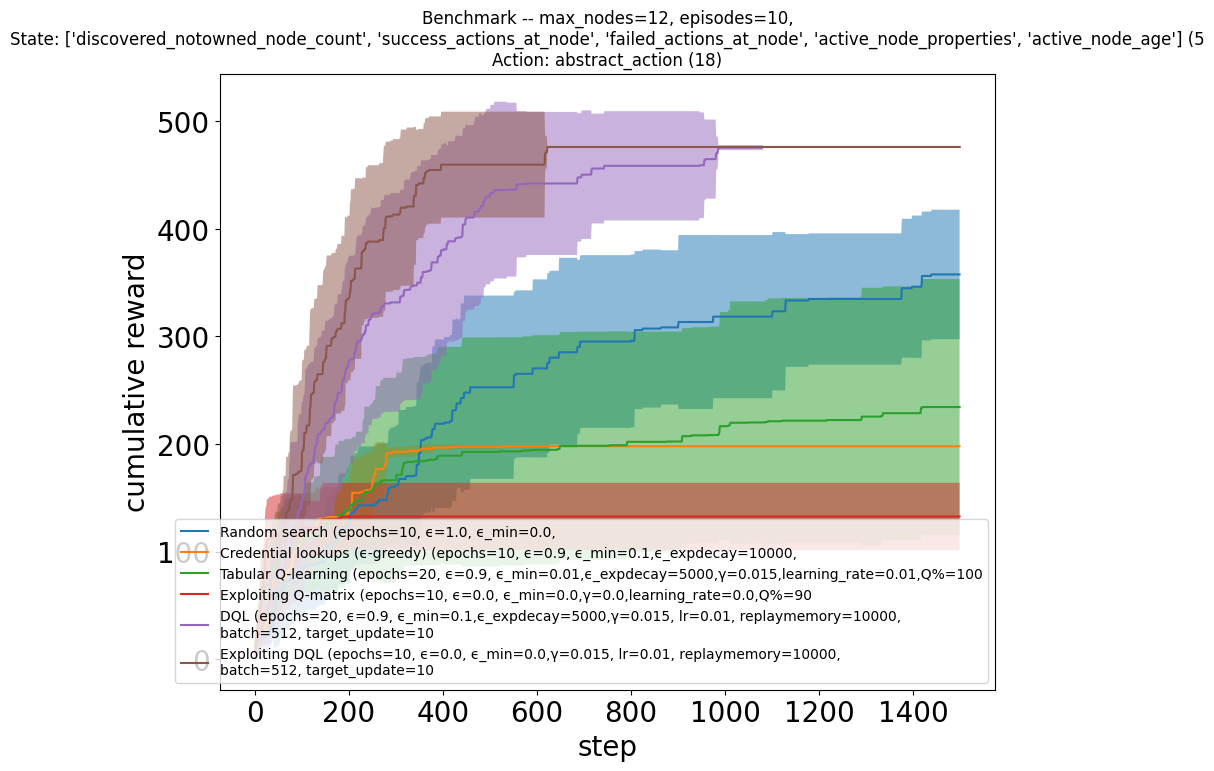

In [14]:
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

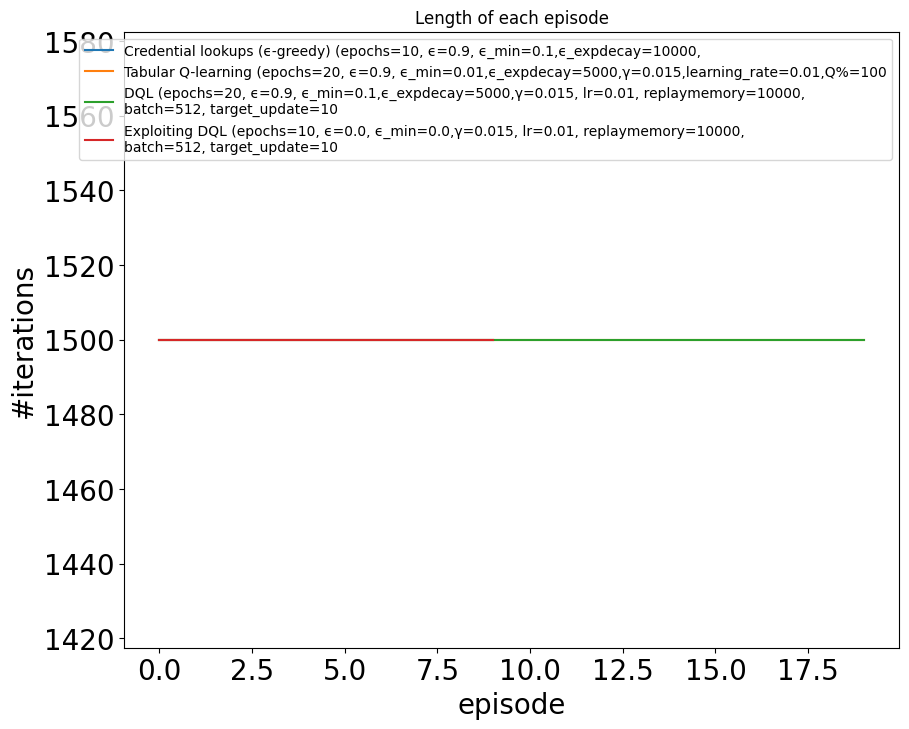

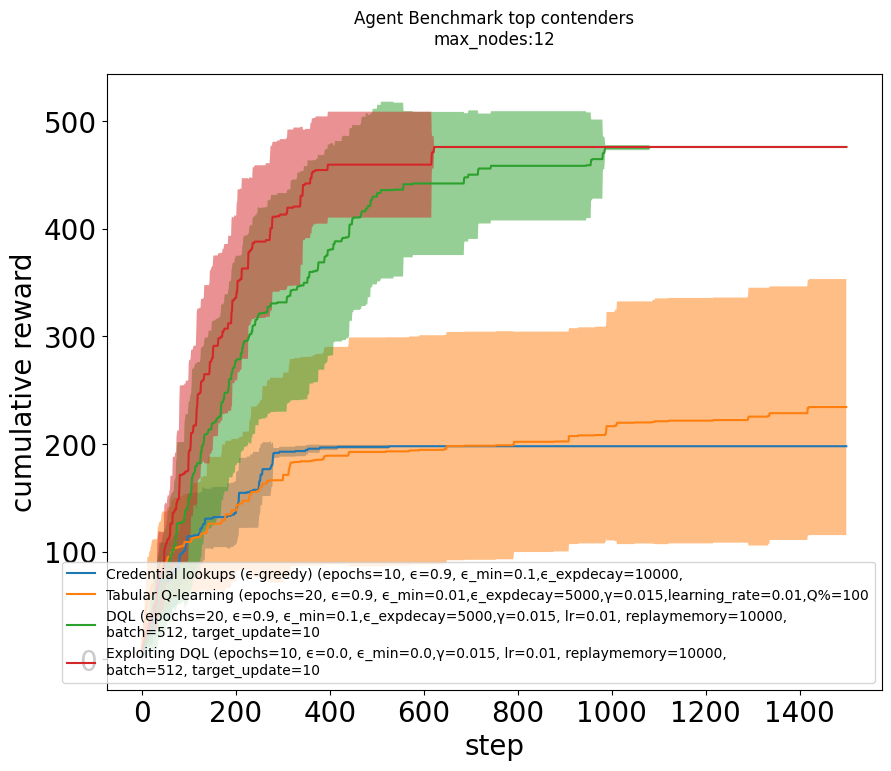

In [15]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders,
                                    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"))

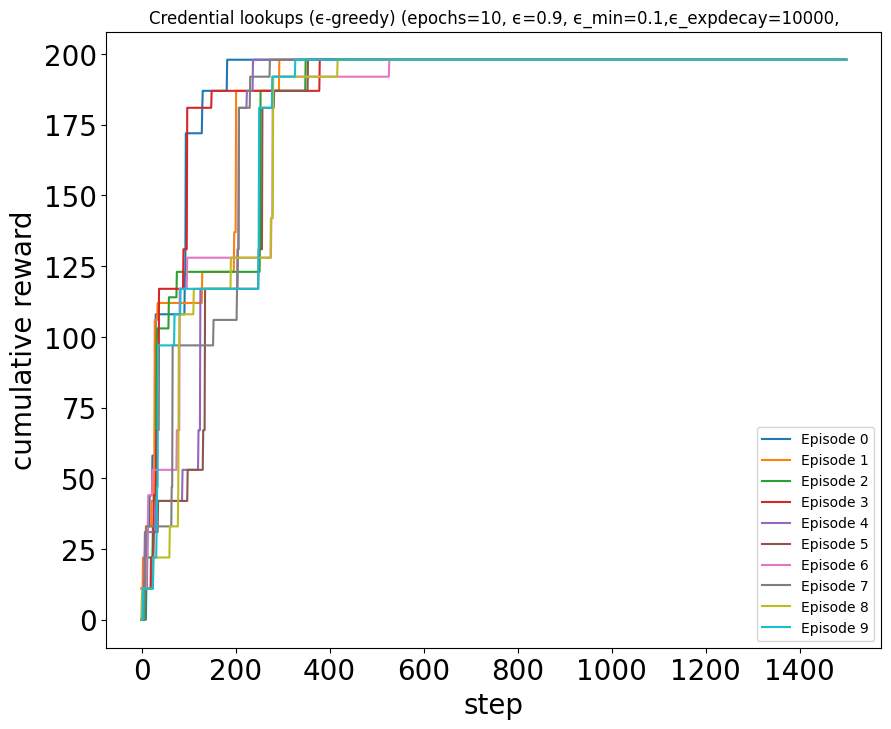

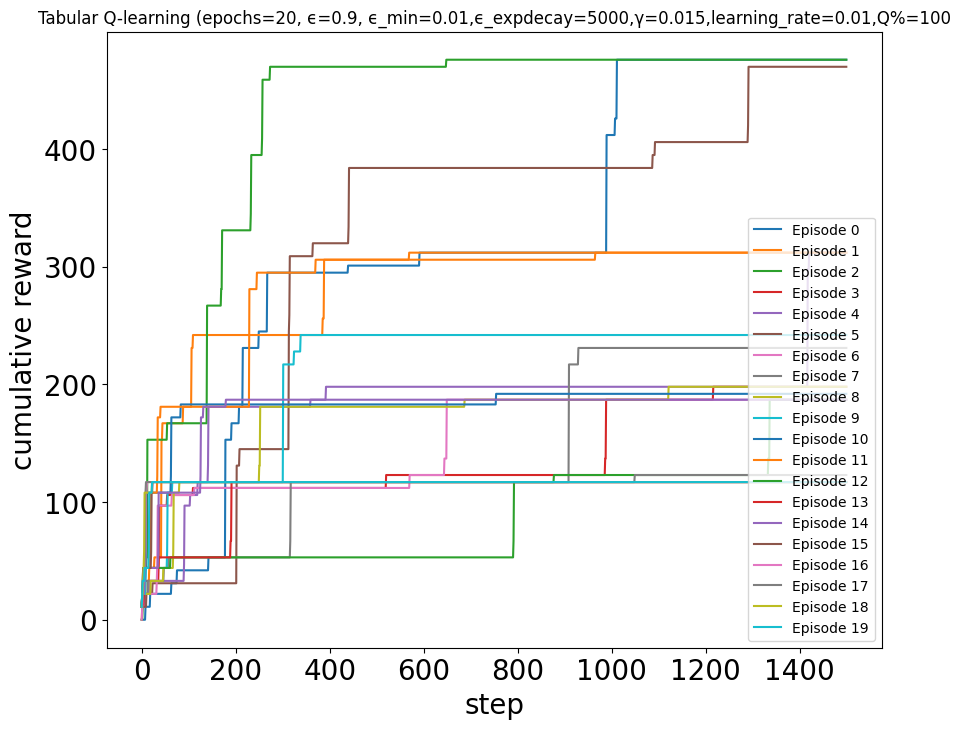

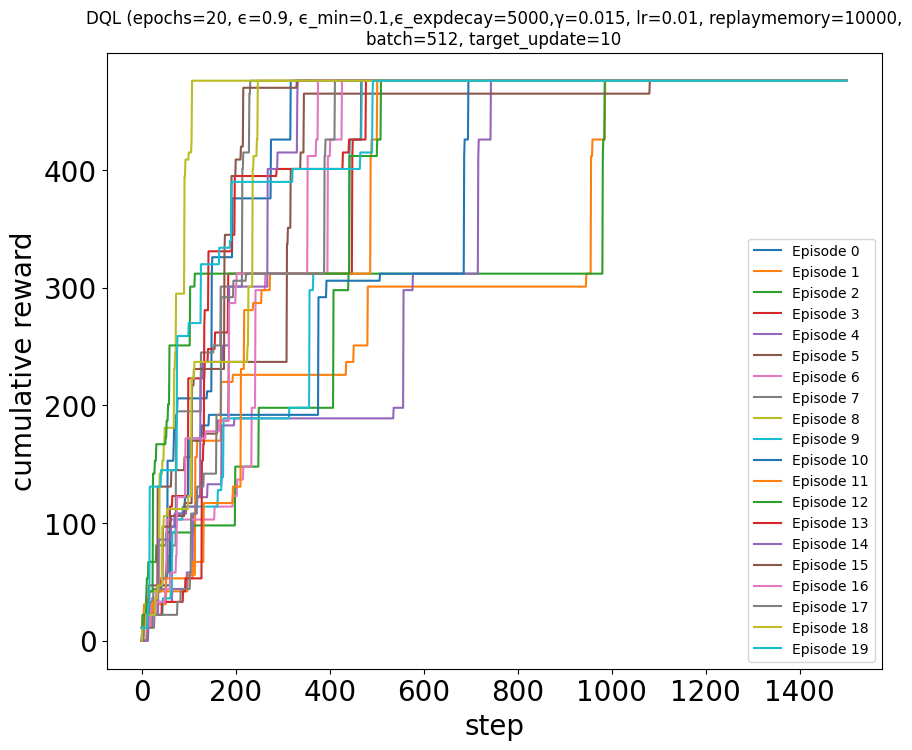

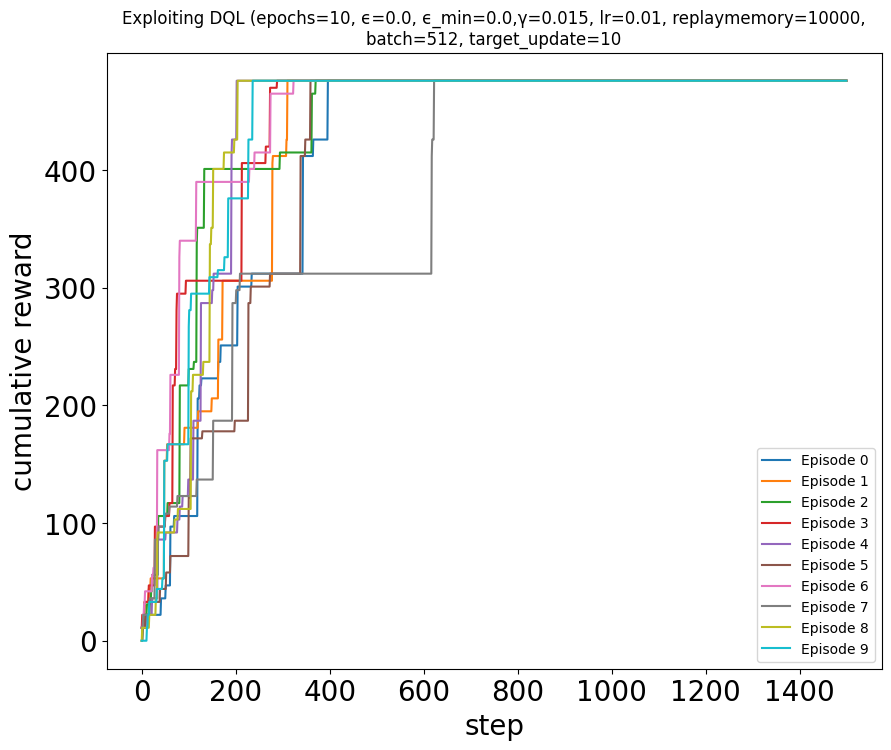

In [16]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)